# KOSMA-$\tau^3$

This is a working notebook to run and debug the application of the PDR synthetic observation software KOSMA-$\tau^3$ on the Milky Way.

#### Model arguments

The first arguments are specify the type of model being created and where the history files will be stored:
 - `history_path`: The history directory for the PDR models.
 - `directory`: The folder name for the model in `history_path`. It must be the same as the folder name in the `input` directory.
 - `x`, `y`, `z`: The cartesian dimensions of the model in kpc.
 - `modelType`: The shape of the model being created. It can be a basic block, sphere, shell, or disk.
   - [x] block
   - [x] disk
   - [x] ellipsoid
   - [ ] shell
 
There are also arguments similar to the arguments for the single-voxel model:
 - `resolution`: The resolution of the model. This equivalent to the `voxel_size` argument of the single-voxel model.
 - `molecules`: The species transitions included in the model. This is equivalent to the single-voxel model analogue.
 - `dust`: The amount of the dust continuum included in the model. This is equivalent to the single-voxel model analogue. This parameter is also copied to the history file headers.
   - `molecular`
     - $ \lambda_\mathrm{dust} > 10^{-4}m $
     - *22 points*
   - `PAH`
     - $ \lambda_\mathrm{dust} > 5 * 10^{-6}m $
     - *201 points*
   - `all`
     - *333 points*
 - `clumpMassRange`: The range of masses that are simulated in $dex \left( M_\odot \right)$. It is a list with length of the number of clump sets. This is equivalent to the single-voxel model analogue.
 - `clumpMassNumber`: The number of clump masses in each clump set. It is a list with length of the number of clump sets. This is equivalent to the single-voxel model analogue.
 - `clumpNmax`: The number of the largest clump to which the voxel is normalised. This is equivalent to the single-voxel model analogue.
 - `velocityRange`: The range of observed velocities in the model. This is equivalent to the single-voxel model analogue.
 - `velocityNumber`: The number of observed velocities in the model. This is equivalent to the single-voxel model analogue.
 
Finally there are factors to adjust modify the input properties that ultimately form the parameter space of the analysis:
 - `clumpMassFactor`: The mass factor used to modify the simulated ensemble mass. This is a list with the length of the number of clump sets.
 - `FUVfactor`: The FUV factor used to modify the FUV field in which the model is embedded. This is a list with the length of the number of clump sets.
 - `densityFactor`: The density factor used to modify the simulated ensemble-averaged density. This is a list with the length of the number of clump sets.
 - `globalUV`: The average interstellar FUV value ($1 \chi_0$).

In [3]:
# Limit dust calculation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from kosmatau3d import models

print('KOSMA-tau^3')

parameters = {
                # Model information
#               'history_path' : r'\Users\cyani\projects\KT3_history',
              'history_path' : r'/media/hpc_backup/yanitski/projects/pdr/KT3_history',
                 'directory' : r'/MilkyWay',
                         'x' : 36,
                         'y' : 36,
                         'z' : 2,
                 'modelType' : 'disk',
              
                # Model parameters
                'resolution' : 1000,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, 2], [-2]],
           'clumpMassNumber' : [3, 1],
                 'clumpNmax' : [1, 100],
             'velocityRange' : [-300, 300],
            'velocityNumber' : 1000,
              
               # Property factors
           'clumpMassFactor' : [1, 1],
                 'FUVfactor' : 1,
             'densityFactor' : 1,
                  'globalUV' : 10
             }

kosma = models.Model(**parameters)

KOSMA-tau^3


## 1. Setup

There are two arguments that can be used when calculating the transition emission in the model: `timed` and `debug`. Obviously `debug` is used when debugging the calculation, and `timed` is used to print the time-of-evaluation for each voxel. This can be quite verbose for larger models.

In [2]:
debug = False
timed = False

kosma.calculateModel(timed=timed, debug=debug)
kosma.writeEmission(debug=debug)

modelFolder = models.constants.history

Voxels initialised:   0%|                                                                     | 0/3015 [00:00<?, ?it/s]


Calculating Grid Emission...



Voxels initialised: 100%|██████████████████████████████████████████████████████████| 3015/3015 [11:01<00:00,  4.56it/s]



Emission calculated successfully.

Streaming to fits files...


Voxel emissions: 100%|█████████████████████████████████████████████████████████████| 3015/3015 [12:46<00:00,  3.94it/s]



Data files have been written successfully.



### Debugging

These cells can be used for debugging if there is some `NaN`s in the model emissivity/absorption matrices.

(3015, 1000, 171)
False


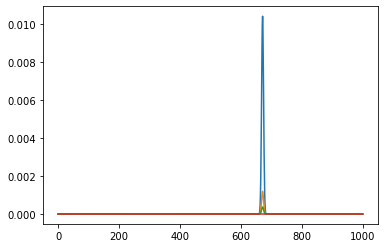

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

eps = fits.open(r'C:\Users\cyani\projects\KT3_history\MilkyWay\r1000_cm1-1_d1_uv10\species_emissivity_clump.fits')[0]
print(eps.data.shape)
print(np.isnan(eps.data).any())
plt.plot(range(1000), eps.data[0,:,:4]*1000)

Density: [2355.412921490178, 1911]
FUV: [166.3503142751308, 1]
Mass: [57139.64626142692, 57139.64626142692]
Velocity: (102.96950531845856, [1.818350711744642, 1.818350711744642])


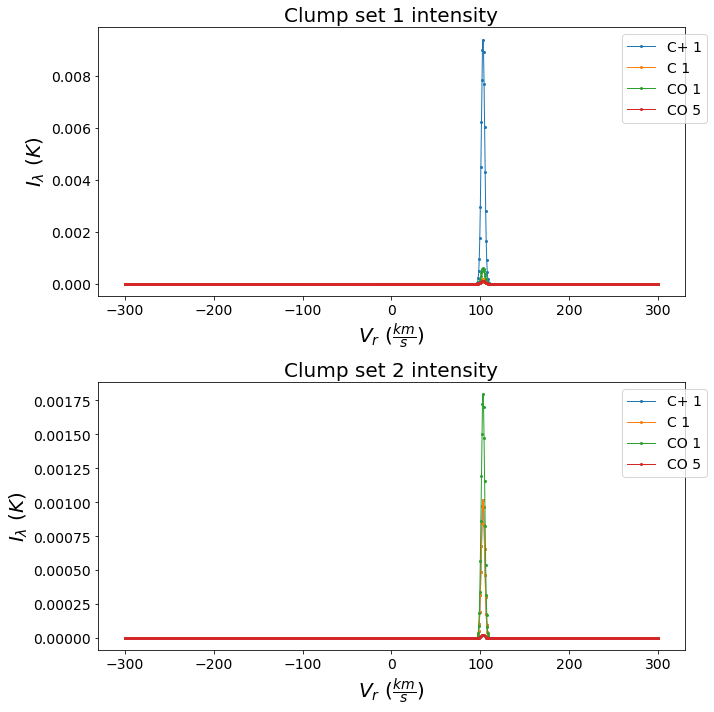

In [4]:
print('Density:', kosma.getGrid().allVoxels()[0].getDensity())
print('FUV:', kosma.getGrid().allVoxels()[0].getFUV())
print('Mass:', kosma.getGrid().allVoxels()[0].getEnsembleMass())
print('Velocity:', kosma.getGrid().allVoxels()[0].getVelocity())
kosma.getGrid().allVoxels()[0].plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1', 'CO 5'])

The plotting module is not yet functional.

In [3]:
from kosmatau3d.models import plotting

plotting.plotModel(plot='FUV',grid=kosma.getGrid())
# plotting.plotModel(plot='mass',directory=r'r1000_cm1-1_d1_uv10'+chr(92))

AttributeError: 'Voxel' object has no attribute 'getEmissivity'

This cell can be used to verify the history file shapes.

In [8]:
from astropy.io import fits

directory = r'C:\Users\cyani\projects\KT3_history\MilkyWay\r1000_cm1-1_d1_uv10'+chr(92)

print(fits.open(directory+'emissivity_clump.fits')[0].shape)
print(fits.open(directory+'absorption_clump.fits')[0].shape)
print(fits.open(directory+'voxel_fuv.fits')[0].shape)
print(fits.open(directory+'voxel_FUVabsorption.fits')[0].shape)
print(fits.open(directory+'voxel_position.fits')[0].shape)
print(fits.open(directory+'voxel_velocity.fits')[0].shape)

(25, 1000, 38)
(25, 1000, 38)
(25, 2)
(25, 2)
(25, 3)
(25, 1)


This is another plotting example.

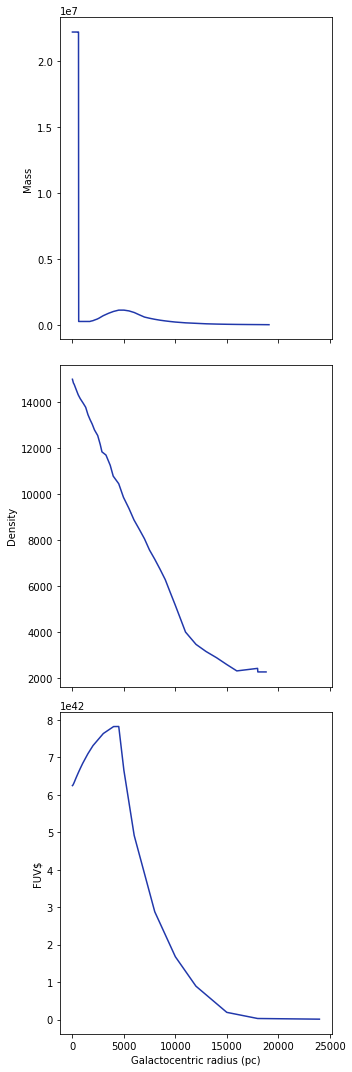

In [9]:
fig,ax = plt.subplots(3, 1, sharex=True, figsize=(5,15))

r,fuv,fuv_all = observations.FUVfield
ax[2].plot(r[r[:,1]==0,0], fuv[r[:,1]==0], color='xkcd:sapphire')
r,density = observations.densityProfile
ax[1].plot(r, density, color='xkcd:sapphire')
r,mass = observations.clumpMassProfile
ax[0].plot(r, mass, color='xkcd:sapphire')

ax[2].set_xlabel('Galactocentric radius (pc)')
ax[0].set_ylabel(r'Mass')
ax[1].set_ylabel(r'Density')
ax[2].set_ylabel(r'FUV$')

fig.tight_layout()

fig.savefig('/home/craig/Desktop/Presentations/Student_Seminar_2020/Milky_Way_parameters.png')

## 

## 2. Radiative transfer

The radiative transfer module takes a few arguments at the moment, but this is subject to change.
 
 - `dim`: This specifies how the radiative transfer is calculated. For the Milky Way, this should be `spherical` (since it is observed in the entire sky). Alternatives are `xy`, `xz`, and `yz`.
 - `sl`: The number of sightlines calculated. It is a list of $[n_{longitude}, n_{lattitude}]$.
 - `terminal`: Set this to True to print the progress bars of each sightline. This does not show up well in `jupyterlab`.
 - `debug`: Of course set this to True when debugging.

In [1]:
from kosmatau3d import models

directory = r'C:\Users\cyani\projects\KT3_history\MilkyWay\r1000_cm1-1_d1_uv10'

# Calculate integrated intensity maps
models.radiativeTransfer.calculateObservation(directory=directory, dim='spherical', sl=[25,10], terminal=False, debug=False)

C:\Users\cyani\Anaconda3\lib\importlib\__init__.py:127: MatplotlibDeprecationWarning: 
The matplotlib.backends.backend_qt4agg backend was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return _bootstrap._gcd_import(name[level:], package, level)
Observing velocity:  99%|████████████████████████████████████████████████████████▋| 994/1000 [1:30:00<00:34,  5.78s/it]

(720, 10, 25, 171) (171,)
(720, 10, 25, 201) (201,)
Intensity map written successfully :-)


### Number of voxels in each sightline

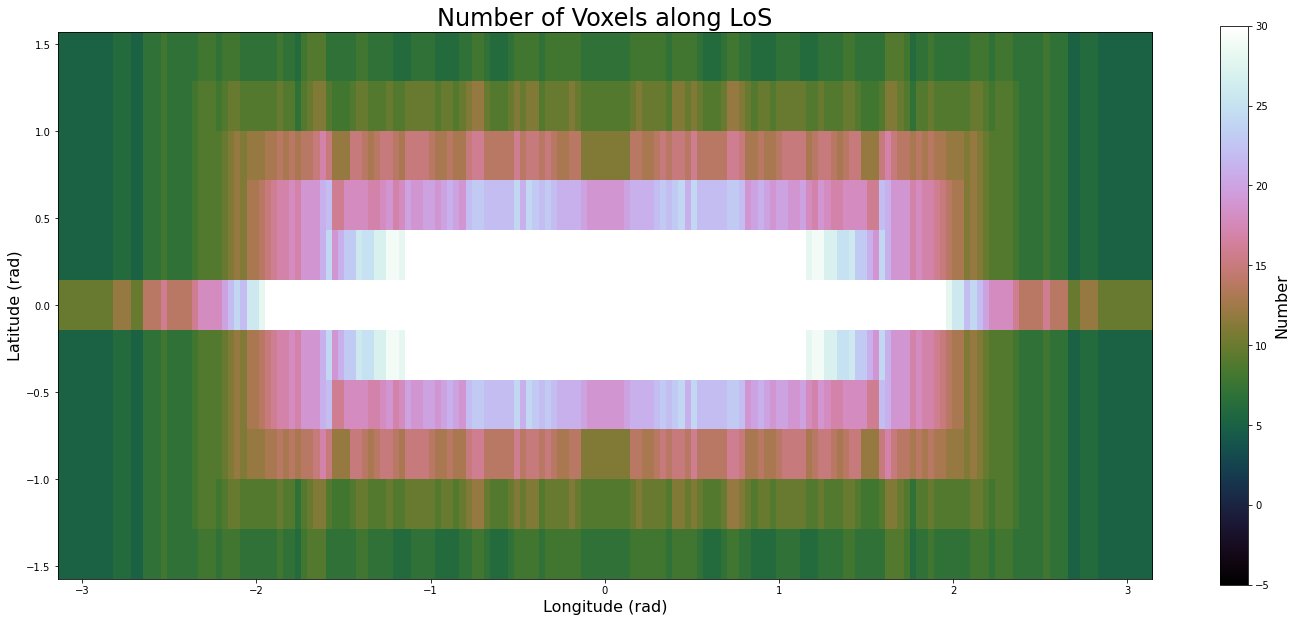

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

directory = r'C:\Users\cyani\projects\pdr\KT3_history\MilkyWay\r500_cm1-1_d1_uv10'

sightlines = np.loadtxt(directory+'/sightlines.csv',delimiter=',')
lon = np.linspace(-np.pi,np.pi,num=50)
lat = np.linspace(-np.pi/2,np.pi/2,num=50)
longrid = np.meshgrid(lon,lat)[0].flatten()
latgrid = np.meshgrid(lon,lat)[1].flatten()

plt.figure(figsize=(20,10))
cm = plt.imshow((sightlines.T), extent=(-np.pi,np.pi,-np.pi/2,np.pi/2), vmin=-5, vmax=30, cmap='cubehelix')
plt.colorbar(cm, shrink=0.8).set_label('Number', fontsize=16)
plt.xlabel('Longitude (rad)', fontsize=16)
plt.ylabel('Latitude (rad)', fontsize=16)
plt.title('Number of Voxels along LoS', fontsize=24)
plt.tight_layout()
plt.savefig('losnumber.png')

In [16]:
sightlines.max()

26.185466149714824

### Debugging

In [2]:
import numpy as np
from astropy.io import fits

directory = r'C:\Users\cyani\projects\pdr\KT3_history\MilkyWay\r1000_cm1-1_d1_uv10'

speciesEmissivity = fits.open(directory+'/species_emissivity.fits')
speciesAbsorption = fits.open(directory+'/species_absorption.fits')
dustEmissivity = fits.open(directory+'/dust_emissivity.fits')
dustAbsorption = fits.open(directory+'/dust_absorption.fits')
map = fits.open(directory+'/channel_intensity.fits')

In [14]:
speciesEmissivity[0].data[500,0,:]

array([6.92791357e-08, 6.92791357e-08, 6.92791357e-08, 6.92791357e-08,
       6.92791357e-08, 6.92791357e-08, 6.92791357e-08, 6.92791357e-08,
       6.92791357e-08, 6.92791357e-08, 6.92791357e-08, 6.92791357e-08,
       6.92791357e-08, 6.92791357e-08, 6.92791357e-08, 6.92791357e-08,
       6.92791357e-08, 6.92791357e-08])

In [15]:
speciesAbsorption[0].data[500,0,:]

array([2.72295954e-09, 2.72295954e-09, 2.72295954e-09, 2.72295954e-09,
       2.72295954e-09, 2.72295954e-09, 2.72295954e-09, 2.72295954e-09,
       2.72295954e-09, 2.72295954e-09, 2.72295954e-09, 2.72295954e-09,
       2.72295954e-09, 2.72295954e-09, 2.72295954e-09, 2.72295954e-09,
       2.72295954e-09, 2.72295954e-09])

In [16]:
dustEmissivity[0].data[500,0,0]

6.927913573280544e-08

In [17]:
dustAbsorption[0].data[500,0,0]

2.7229595373833733e-09

In [35]:
speciesEmissivity[0].shape

(1005, 701, 18)

In [7]:
(map[2].data==0).all()

True

## 

### Property distribution

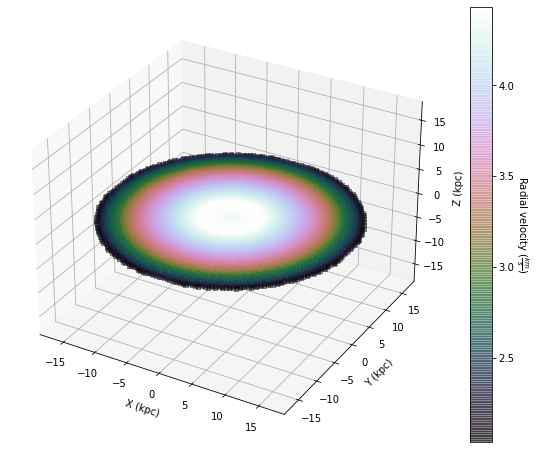

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

%matplotlib inline

directory = r'/media/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_cm1.0-1.0_d1.0_uv10'

positions = fits.open(directory+r'/voxel_position.fits')[0].data/1000.
vel = fits.open(directory+r'/voxel_fuv.fits')[0].data

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
cm = ax.scatter(positions.T[0], positions.T[1], positions.T[2], c=np.log10(vel[:,0]), cmap='cubehelix', marker='s', s=27, alpha=0.5, linewidth=0)
cb = fig.colorbar(cm)
cb.ax.set_ylabel(r'Radial velocity ($\frac{km}{s}$)', labelpad=16, rotation=270)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])
ax.set_zlim([-18, 18])
plt.show()

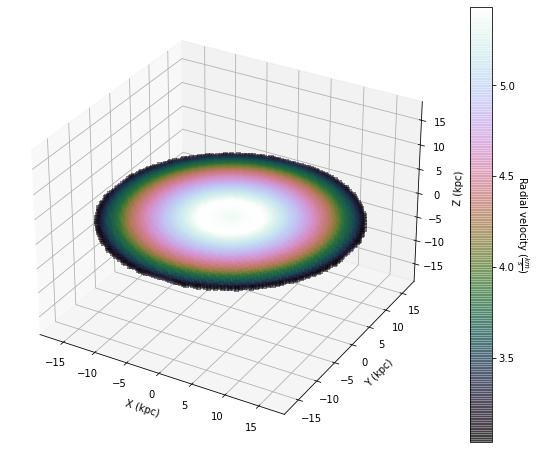

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

%matplotlib inline

directory = r'/media/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_cm1.0-1.0_d1.0_uv100'

positions = fits.open(directory+r'/voxel_position.fits')[0].data/1000.
vel = fits.open(directory+r'/voxel_fuv.fits')[0].data

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
cm = ax.scatter(positions.T[0], positions.T[1], positions.T[2], c=np.log10(vel[:,0]), cmap='cubehelix', marker='s', s=27, alpha=0.5, linewidth=0)
cb = fig.colorbar(cm)
cb.ax.set_ylabel(r'Radial velocity ($\frac{km}{s}$)', labelpad=16, rotation=270)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])
ax.set_zlim([-18, 18])
plt.show()

## 

## 3. Cygrid

In [5]:
# %matplotlib widget
# Create cygrid image
plt.close()

if cyplotFlag:

  constants.mapShape = (500, 300)

  import cyplot
  
  modelFolder = 'r1000_im1_cm1_d1_uv10/'

  grid = cyplot.convertMap(modelFolder, input_coord='spherical')
  
  images = grid.get_datacube()
  wcs = grid.get_wcs()
  print(images.size, np.where(np.isnan(images))[0].size)

#   images = np.nan_to_num(images, nan=0)
  
  i = 22

  print(np.nanmin(images[i,:,:]), np.nanmax(images[i,:,:]))
  vmin = np.nanmin(images[i,:,:])
  vmax = np.nanmax(images[i,:,:])
  
  plt.close()

  fig = plt.figure(figsize=(15,10), facecolor='w')
  ax1 = fig.add_subplot(111, projection=wcs.celestial)
#   ax2 = fig.add_subplot(312, projection=wcs.celestial)
#   ax3 = fig.add_subplot(313, projection=wcs.celestial)
  cm1 = ax1.imshow(np.log10(images[i,:,:]), alpha=1, vmin=-1, vmax=2, cmap='cubehelix')
#   cm2 = ax2.imshow(images[i,:,:], alpha=1, vmin=vmin, vmax=0.01*vmax, cmap='cubehelix')
#   cm3 = ax3.imshow(images[i,:,:], alpha=1, vmin=vmin, vmax=0.0001*vmax, cmap='cubehelix')
  cb1 = plt.colorbar(cm1, ax=ax1, shrink=0.8, extend='both')
#   cb2 = plt.colorbar(cm2, ax=ax2, shrink=0.8, extend='both')
#   cb3 = plt.colorbar(cm3, ax=ax3, shrink=0.8, extend='both')
  cb1.ax.set_ylabel('Intensity log(K km/s)', labelpad=10, rotation=270)
#   cb2.ax.set_ylabel('Intensity (K km/s)', labelpad=10, rotation=270)
#   cb3.ax.set_ylabel('Intensity (K km/s)', labelpad=10, rotation=270)
#   i = 23
#   mol1 = ax1.imshow(image[i,:,:], alpha=0.5, cmap='magma')
#   cbar2 = plt.colorbar(mol1, ax=ax1, shrink=1)
#   cbar2.ax.set_ylabel('{} Intensity (K km/s)'.format(species[i-333]), rotation=270)
#   i = 44
#   mol2 = ax1.imshow(image[i,:,:], alpha=0.5, cmap='hot')
#   cbar3 = plt.colorbar(mol2, ax=ax1, shrink=1)
#   cbar3.ax.set_ylabel('{} Intensity (K km/s)'.format(species[i-333]), rotation=270)
  
#   plt.grid(b=False)
  ax1.set_title(r'${species}$ Integrated Intensity'.format(species=species[i-22]), fontsize=24)
  
#   plt.savefig('C+regridded.png')

AttributeError: 'list' object has no attribute 'size'

### Debug radiativeTransfer

In [22]:
len(radiativeTransfer.allIntensity)

286

In [21]:
np.max(radiativeTransfer.allIntensity)

1.5088581584660765e+88

In [ ]:
np.where(radiativeTransfer.allIntensity==np.min(radiativeTransfer.allIntensity))

In [9]:
import radiativeTransfer
radiativeTransfer.debugEmission(20, 23)  #maximum at (30,23)

option 3
E imaginary input: [0.-56.09497672j]
x greater than grid
E imaginary input: [0.-55.87478009j]
x greater than grid
option 2
E real input: [56.02733203+0.j]
x greater than grid
E real input: [56.24692911+0.j]
x greater than grid


,kappa,dk,epsilon,de,A,B,I,dI
0,8.005972e-21,-1.018475e-44,3.845557e-25,5.791318e-44,0.000000-56.094977j,0.000000-55.874780j,8.979649e-08,0.022457
1,7.974546e-21,1.012936e-44,1.790859e-22,-5.760979e-44,56.027332+0.000000j,56.246929+0.000000j,8.979649e-08,0.000165


In [7]:
df = radiativeTransfer.debugEmission(75, 23)

option 1
option 3
E imaginary input: [0.-67.99828089j]
x greater than grid
E imaginary input: [0.-67.89185057j]
x greater than grid


In [10]:
i = 1
scale = constants.resolution*constants.pc*100
try:
  intensity = df['dI'][i-1]
except:
  intensity = 0
k = df['kappa'][i]
kstep = df['dk'][i]
e = df['epsilon'][i]
estep = df['de'][i]
a = df['A'][i]
b = df['B'][i]

In [35]:
intensity + e*scale + 0.5*estep*scale**2

1.955704988849456e-08

In [34]:
np.exp(-k*scale)*intensity + \
(e*k+estep*(k*scale-1))/k**2 - \
(e*k-estep)/k**2*np.exp(-k*scale)

0.022716929883138698

In [11]:
a

-67.9982808901824j

In [12]:
radiativeTransfer.Eimag(a)

array(0.00829712+0.j)

In [30]:
df['dI']

0      0.000040
1   -129.934618
Name: dI, dtype: float64

In [11]:
intensity*np.exp(-k*scale-0.5*kstep*scale**2) + \
estep/kstep*(1-np.exp(-k*scale-0.5*kstep*scale**2)) - \
(e*kstep-estep*k)/kstep*np.sqrt(np.pi/2/abs(kstep))*\
(np.exp(a**2-b**2)*radiativeTransfer.Ereal(np.array([a]))-radiativeTransfer.Ereal(np.array([b]))).real

array([-0.01005932])

In [93]:
intensity*np.exp(-k*scale-0.5*kstep*scale**2) + \
estep/kstep*(1-np.exp(-k*scale-0.5*kstep*scale**2)) - \
(e*kstep-estep*k)/kstep*np.sqrt(np.pi/2/abs(kstep))*\
(np.exp(a**2-b**2)*radiativeTransfer.Eimag(np.array([a]))-radiativeTransfer.Eimag(np.array([b]))).real

AttributeError: module 'numpy' has no attribute 'pai'

In [94]:
a

-112.10460082066169j

In [20]:
len(radiativeTransfer.allK)

160

In [19]:
radiativeTransfer.allK[30].shape

(34, 45)

In [29]:
np.shape(radiativeTransfer.allIntensity)

(160, 45)

In [27]:
np.min(radiativeTransfer.allIntensity)

-227175.54464109443

In [28]:
np.where(radiativeTransfer.allIntensity==np.min(radiativeTransfer.allIntensity))

(array([83]), array([23]))

In [9]:
for i in radiativeTransfer.allIndeces:
  print(i.size)

1
1
2
3
3
4
4
4
5
4
5
4
4
4
4
3
1
4
1
1
3
1
1
25
3
1
1
3
1
1
34
3
1
3
1
1
1
1
3
1
1
34
2
1
3
1
1
1
1
3
1
1
34
2
1
3
1
1
1
1
1
3
1
1
1
34
1
1
1
3
1
1
1
1
1
3
1
1
1
34
1
1
1
3
1
1
1
1
1
3
1
1
1
34
1
1
1
3
1
1
1
1
1
3
1
2
34
1
1
3
1
1
1
1
3
1
2
34
1
1
3
1
1
1
1
3
1
3
34
1
1
3
1
1
1
3
25
1
1
3
1
1
4
1
3
4
4
4
4
5
4
5
4
4
4
3
3
2
1
1


In [7]:
i = 25
k = radiativeTransfer.allK[30][:,i]
e = radiativeTransfer.allE[30][:,i]
kstep = radiativeTransfer.allKstep[30][:,i]
estep = radiativeTransfer.allEstep[30][:,i]
a = radiativeTransfer.allAreal[30][:,i]
b = radiativeTransfer.allBreal[30][:,i]
intensity = radiativeTransfer.allIntensity[30][i]

In [21]:
import pandas as pd

d = {'kappa':k[:-1],'dk':kstep,'epsilon':e[:-1],'de':estep,'A':a,'B':b,'I':intensity,'dI':0}
df = pd.DataFrame(data=d)

scale = resolution*3.086*10**18

for i in range(a.size):
  if kstep[i]==0 and (k[i]*scale)<10**-10:
    df.loc[[i:],['dI']] = df.loc[[i],['dI']] + e[i]*scale + 0.5*estep[i]*scale**2
  elif k>10**3*kstep*scale:
    df.loc[[i:],['dI']] = np.exp(-k[i]*scale)*df.loc[[i],['dI']] + \
                          (e[i]*k[i]+estep[i]*(k[i]*scale-1))/k[i]**2 - \
                          (e[i]-estep[i])/k[i]**2*np.exp(-k[i]*scale)
  elif kstep>0:
    df.loc[[i:],['dI']] = df.loc[[i],['dI']]*np.exp(-k[i]*scale-0.5*kstep[i]*scale**2) + \
                          estep[i]/kstep[i]*(1-np.exp(-k[i]*scale-0.5*kstep[i]*scale**2)) - \
                          (e[i]*kstep[i]-estep[i]*k[i])/kstep[i]*np.sqrt(np.pi/2/abs(kstep[i]))*\
                          (np.exp(a[i]**2-b[i]**2)*radiativeTransfer.Ereal([a[i]])-radiativeTransfer.Ereal([b[i]]))
  elif kstep<0:
    df.loc[[i:],['dI']] = df.loc[[i],['dI']]*np.exp(-k[i]*scale-0.5*kstep[i]*scale**2) + \
                          estep[i]/kstep[i]*(1-np.exp(-k[i]*scale-0.5*kstep[i]*scale**2)) - \
                          (e[i]*kstep[i]-estep[i]*k[i])/kstep[i]*np.sqrt(np.pi/2/abs(kstep[i]))*\
                          (np.exp(a[i]**2-b[i]**2)*radiativeTransfer.Eimag(a[[i]])-radiativeTransfer.Eimag(b[[i]]))

In [24]:
df['dI'][23]

1.1825578092231414e-07

In [ ]:
radiativeTransfer.eTildeReal(1+9j)

## Debug cyplot

In [23]:
int = fits.open('history/MilkyWay/r1000_n3015/intensity_clump.fits')[0].datadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAwkAAAHBCAYAAAAiv/d8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9CZgcV3X3faqq9+7ZN2kk2bJky7JkG+MttllsQ1gcAybLA+QLwYEQh+VNCIEkfBjyBj4gCw4QIISQEAIhhLxPgPCyJiRhBwM2Nl5l2bJkaxnNvk+vVfWd/626PTU9PXvvc35yuXuqu2u5devW+d9zzr2Gy5AgCIIgCIIgCIKP6b8KgiAIgiAIgiCISBAEQRAEQRAEYTniSRAEQRAEQRAEQUSCIAiCIAiCIAgrI54EQRAEQRAEQRBEJAiCIAiCIAhCtbjzzjup2QcQFU+CIAiCIAiCIFSIn/zkJ/T0pz+d/uu//qupy1REgiAIgiAIgiBUiHe84x30mc98ht71rnc1tTdBRIIgCIIgCIIgVMiLYFkWveQlL6Hzzjuvqb0Jhsy4LAiCIAiCIAhb5wUveAG9853vpMsvv5wee+wx+s3f/E361re+RYZhNF3xiidBEARBEARBECrkRbicBQI4//zzm9qbIJ4EQRAEQRAEQaigF0HTzN4E8SQIgiAIgiAIQgW9CJpm9iaIJ0EQBEEQBEEQKuxFaHZvgngSBEEQBEEQBKHCXoRm9yaIJ0EQBEEQBEEQquBFaGZvgngSBEEQBEEQBKEKXoRm9iaIJ0EQBEEQBEEQquRFaFZvgngSBEEQBEEQBKFKXoRm9SaIJ0EQBEEQBEEQquhFaEZvglnvAxAEQRAEQRCEVvYiNKM3QTwJgiAIgiAIglBlL0KzeRPEkyAIgiAIgiAIVfYibNab8KpXvYr6+/vp4osvXtf3K4V4EgRBEARBEAShBl6EzXgTvvOd71AqlaJXvOIV9MADD6z63UoingRBEARBEARBqIEXYTPehGc+85nU3d295vcqjYgEQRAEQRAEQVgHd9xxB73tbW+rSFlhO9heoxKq9wEIgiAIgiAIQjMwPDxMBw8erMi24E04cuQIXXnllcV1t912m1oaAREJgiAIgiAIglAHent76a677mrIspdwI0FoEH7jN36DbrjhhnofhiAIgiAIq+C4bsWWRkZEgiAIgiAIgiCsE6eC/9bDr/7qr9K1115LjzzyCO3evZs+/vGP1+RaiUgQBEFoIjBUHpYTJ07U+1BakhvYm4fy/cd//Md6H4ogCILiX/7lX2hoaIjy+TydOnVKDZ1aC0QkCMIWcRyHvvKVr6ibFhOdIL4wEonQwMAAPec5z6H3ve99NDY2VtOwJRg5MHYqDQynP/mTP6F777234ttuBpr5/KtVL5q5TDbKdjpXQRBWxuUwoUotjYwkLgvCFrj77rvpt3/7t9WrBgIhFovRyMiIGv8YCwyLj3zkI/Tyl79cfQe9AdPT00u2lc1m1fpSQdHR0UHhcLhhjKRvf/vbtHfvXrrsssvqfTg1Z7uf/3Yok3POOYcuvPBCdd+1+rkKgrA5HHLV0uqISBCETfLVr36VfumXfkkZ97t27aLf/d3fpZe97GUqXtA0TZqYmFDf+fM//3M1Q+LRo0eLv/3+979PN954Y9nt9vX1Lfn7m9/8piQ0C0KN+NSnPiVlLQiCwIhIEIRNgCnStUDATIhf+MIXls2GiL/hOUDC0e23305PfepTi5895SlPoW984xtLvv/e976Xzp49S3/5l3+5ZD2+KwiCIAhCY+C4jlpaHo6HEgRhA3CYkHvuuefCz+hecsklbiaTWdfvbNte9fNbb73Vvf7667d8LbAdHFu5benjZu+EOz4+7r7xjW90OXTC5RApd3Bw0H31q1/tnjlzZtnvPvGJT6jfrbRgu6Xcf//97itf+Uq1/Wg06nL4hnvddde5f/M3f+PmcrkVj79QKLjvf//7Vdly2Jbb29vr3nzzze73vvc99bne5/Hjx1c8t1OnTrmvfe1r3fPOO0+dGwut4vdw3hw24rLIczmsxE2lUm4ikXAvuugiVR6nT5+u6/mjnnzwgx90L7300uL5v+AFL3B/8IMfrHr+ta4XtSqTzdZZwCLe/cAHPuBee+21al+hUMjt7+9XZfu6172uWKZBUD7YH85vI+eK62EYhvob57kSs7OzbjKZVN/7j//4jxW/JwhCY3I9txFDkyPuXCFdkeXyyy+v9ymtiIgEQdggf/AHf6Ae8DBSVjMGNkotRcI//dM/Fd/DQIbBpg0eGGAcKrXkd5/97GfdgYEBNxwOq++0t7erv/Vy5ZVXLvn+hz70IZdDrorbhFFkWVbx7xtuuMGdn59fdnwwFG+66abi92DUdXZ2Ft//27/925oi4W//9m+VYa3PDfsOioQ3velNSww8nEvw2Djcy/3Zz35Wl/PP5/PuLbfcsuL5f+5zn6uqSNhIvahVmWy2zqIsca76OzDgUZbBfb70pS9dtr9yImG95/qc5zxHff77v//7K16Hv//7v1ff2bNnz5odB4IgNB7Xi0gQBGElLwIMBDzkb7vttooWUi1FAoylyy67rNiTCoPqi1/8YtEghRAqRzkDqpR///d/LxqB73nPe9zh4eGiAPjP//xP1Xu/Uvn98R//sfoMhhx6gBcWFtT6EydOqN50fXyriQR4BuCF+P73v1/87NFHHy2+f9/73ue+5S1vcX/605+qXl3tvbjrrrvc5z3veWobhw8fdh3Hqfn5v+td71KfwZjm8LOi0fz444+7z3/+81VveDVFwmbqRbXLZLPH9slPfrIoKCAw0ul08Vo/8cQT7oc//GF1LBs5n7XO9V//9V/V5/BWrOQZedrTnqa+8/a3v33F8hIEoXG5ntuB0xPD7kx+oSKLeBIEoUX4h3/4h6KRVtrb3EwiAb2fY2Njyz6/44471OcI0ynHWkYSDDC9j89//vNlvwODF8YiesaDYSLBMIx3v/vdy34HowsegbVEAozGs2fPlt33WiB07NChQ2o73/rWt2p6/nNzc0UB+r//9/9e9diqJRI2Uy+qWSZbOTaEm2H9a17zmrL7XInVzmetc0V4EzxR+A6EUSmPPPJI0auBcxYEofm4fhuJBJknQRA2gE42ZoOEOK65omWH4RXZMK3J9eAeW+rp6Vm2/sUvfrF6ZQOUuBd7w9vF8XMvrRoi8hd/8RfLfgdld8011xAbj0vOl+Oz1T4xfCxGiioFw8ByGMeax/CKV7xCzVGxGTiERc1toUegquX5c486zczMqGN44xvfWPbY3vzmN2/4mOpdL7ZSJls5NhZc6hUTENUKDH/867/+6+o9dygs+5zFhXrFXBU4Z0EQmnsIVKcCSyMjoxsJwga455571OtVV13V1OW20vFjKFfN1NQUce/uhrbLoSDqlXuDaceOHSt+T88RcfLkyWVli/HnOWSo7O+e8YxnrHkMmLp+LY4cOUIcbqJGqcLMxdyLv2xSG5zDRtnK+XP4U/H8y43RD7gHa8PHVO96sZUy2cqx3XTTTWr4YQ5Johe96EVqMjmUXzmhUUle/epXqwkUMfwxh1UVBatt28XhVWs1W6ogCNXBbYKJ0CqBiARB2AB46IM9e/Y0dbm1tbWVXY9efA0mdtsouteWQ4OKZbUaCwsLxfd6ErmdO3eu+P3BwcE1t1k6z0Qpn/3sZ5W3QZ8f5rSAUY6eegDBgB7pzXhStnL+o6Oja55j0CBulnqxlTLZyrFBELzzne9Uy5e+9CW1gIMHD9LNN9+sJkG84IIL1n0e6+Wiiy6i6667TomjT3/60/SmN71Jrf/617+uhBLqGoZPFgRBaHQk3EgQNgAMHaANSmEpjuONG42wEt3TstqCmag16+mV4VjuNb9jWdaKn8EQ/63f+i1lTL70pS+lu+66izKZDE1OTqo5KrDoUJ/N9BJt5fxblXqWydvf/nY1ieGf/umf0vOe9zwVggQvEuYiOXToUNUmTkMdC4YXBd9j3pR4PF6V/QqCUBucCi6NjIgEQdgAupd6M6Eo2wEdWvHQQw9tumxXiyHfarl/7WtfU54CGIif+cxn6IorrlC5DkHW09tdzfNf7Rybsd5tpUwqAWL/3/KWt6iefMyCjhnMMQEi8h9e97rX0cjISMX3+ZKXvEQJkgcffJB+8pOfKC+Z9mS86lWvqvj+BEGoLS53aDgVWhoZEQmCsAF0vPt///d/KyNju4HQHN1ArlY+jzzyiDKQNoKekfree+9Vhnw5vvvd725om6WcOnVKvSLpXJ9LEJzX//zP/9Tl/C+//PLi+SOBuRzf/va3N7TNWlDNMqk08DIhafjLX/6yEocIKYM3qVLnqkkkEspjoBOY//mf/1l5IS+++OKmz2cSBGH7ICJBEDbAK1/5ymJy5Xvf+941wyw+8pGP0A9/+MOWKWM9YgwSRMvx7Gc/m8455xz1HmE7SNZcCYT4BHnuc5+rkk4R/vPXf/3Xy74PUfb+979/s4eu0AnBDzzwQFlD7+/+7u/o2LFjdTl/HQ6TzWbpr/7qr5Z9H0YmwmQajWqWSSVCA1cahUiHpaG8K3Wu5UKOkAODegUkYVkQWgNHPAmCIJSC4TERSgDe+ta3qmEZg2EUEAb3338/3XHHHXTgwAF6/etfT+eff37LFOThw4fV6+c///niaDRB0Dv7oQ99SOUOYLhYGP4/+tGPigY5DP27775bhX/s27dvWWKqzgd429vepraTTqfV308++ST9yq/8ihrmciv8/M//vDo2iAQMs6qNPfTcQ/Theq02+k01zx+9z3/4h3+o3r/jHe9QI+To88cITIjpX2nkn3pSzTLZCkhOh6jH0Lqzs7PF9SjLW2+9VYlR5AasZ8Ss9Z5rEISyYaQq1DF4UCBMXv7yl2/uZARBaCicbTIEKhpqQRA2AGYB/rVf+7XipFZY2Nhwu7u71Uy5wfWY/KrWrGfSLI7LXvH3q03W9fDDD7ts7KjPMfHV4OCg2iZmkS2ddE5/D0ssFnPZ+FYzKQfLp9xkVGxEFj9nA9Pt6uoqvsdkXPqzlSbdWu3cAAuRJceA7evjwozLt99+u3qPcqz1+WMW4VtuuaX4OfahZxTG+8997nNVnUxtM/Wi2mWy2WMLliMmL0M5YvZlvQ77/dSnPrVsWyiflSZMW++5ajCrs97fL//yL694/IIgNA/Xcxvx6OgpdygzXZFFJlMThBYCvY8Y2hBj7KNHEsMoIlYZvdFscNLVV19Nv/M7v6PGSb/vvvvqfbgVBcNHojf4+c9/vgrdwWhAmChLx/pr0IOLGPTf+73fU72vbFCpnlf00t94443K04Ie3VLQ2/qVr3xFhdUgfhvlirCQF77whaq88VsNG32bOgf00H/sYx9TORAYpQo92ejx/cAHPqD2jWOt1/njeywE6IMf/KDKm8DfOH8M2Yl8hEYcOrPaZbJZ/uzP/oz+4i/+Qh0XPBQIP0Ko0/79+9WxYF4KPfFZpc9VE7xekrAsCK2Dw9K/UksjY0AV1fsgBEEQ1gMSxhEyxL23FTUoBaEaIGEZIUaY3wJiYrXheQVBaA5uuOEG+uj/+TSlVpi7ZaPc8vRnqZDLRkQSlwVBaBp0sjhyQwSh0fnoRz9a9CKIQBAEodkQkSAIQsOAcBAkKGNM+2BiKBI/sR5JqEiERdKxIDQyH//4x+l73/ueCml7zWteU+/DEQShgrgVXBqZlYNvBUEQagyiHxGTj0UPOYmcgYWFBfU3chQ+/OEP0yWXXCLXRmg4kJvw9Kc/XY2mhInbAEasGhwcrPORCYJQSRy27rG0OiISBEFoGBCSgbkl4DHAULKYDRfeBeQgYJZcJL3qSccEodGAoEXuAcQsZnrGXAl/9Ed/VO/DEgRB2BQiEgRBaBgwlv5rX/tatQhCs7F37941Z2MWBKF1JlNrdSQnQRAEQRAEQRCE9XsSent7Vc+IIAiCIAiCIFQTDG09NjbW8IXsSE6C5zq966676n0tBEEQBEEQhBbnyiuvrPchrAvXX1odCTcSBEEQBEEQBGEJkrgsCIIgCIIgCOvEYTcCllZHRIIgCIIgCIIgrBN3m4gECTcSBEEQBEEQBGEJ4kkQBEEQBEEQhA14Etxt4EkQkSAIgiAIgiAI68SRcCNBEARBEARBELYj4kkQBEEQBEEQhHXiSriRIAiCIAiCIAhBJNxIEARBEARBEIRtiYQbCYIgCIIgCMI6cSXcSBAEQRAEQRCEJSKBtscQqDKZmiAIgiAIgiAIS5BwI0EQBEEQBEFYJ47MkyAIgiAIgiAIwnZEPAmCIAgbZOCaF26pzIbv/JKUuSAIQpPiSuKyIAhCcxvjjUojnpcIF0EQhPXhuoZaWh3xJAiCUHMa0Uje7qz3moiYEARB2B6ISBAEoeLsuHp1g7P1+1+277UFZ38s4VSCILQuroQbCYIgbM1YFLYnK9UNEQ+CILQCruMtrY54EgRBWJEdV71ASkeoSX06+5MvS0kLgiA0ECISBGEbseOKm+t9CIJQkbp59u6vSEkKglAXXAk3EgShmRFBIGy3+i3CQRCEWuDK6EaCIDQL/+/tV1KBXHYNLqYE//rzXbL51eIluL70e1tdV7oe73P+AvCK45jjrpc8N6yW4a3X2Otct5HvVnpdq+2nEvsO87oIv48bBr/yd/i9pV4Nigbqwlr1pVLrwB/cfsWSeoj3f/ruu5btXxAEQVgbCTcShCbjztvfvmzdLXSTenXZNAJGjW5tvT9HyQBMVW/zuxyv5cXN8Xp8Yqv/473/o3IbWt+6rf6+GfZdq/1UaN8hN8zCwCKT/4WMCP/fojDFyTSwDtKBalon13O/XPPu/68ORyIIQqvgSuKyIAiNwIN3/A+3SJ4RDto6n1nHoynByXvH5tjcaOa8/lt+VYsvIITtQVEEQBxYcTKMqHrPf3ivajFX+PGimCjWdazDe/1a+r31fjdw72gefO83lnzn8JuftZFTFQRhu+P6S4sjngRBqDM//acnVv/CwP7aHMhKOJ4HwOBXg7tPDJuNf35v2iwQ+L3BAqFoiOFzfLd+Rys0CK4WBGyIu0oomOSEWTiYJrlWSH3u8nv83ej34OW/fm6NjkQQBKFxEJEgCDXm7n8+uXRFAxhJ5YAoCL43C7lFcYDPIAiCAkF9sTHPRagvqp5wyJnp13cHgtMXCw4eQ/49oERDM9yzzBW/tqcORyIIQiPgSuKyIAjVMjAaHaNQKHoOIAjgPTDz2UVhoCkTyiFsY0rDgUo/Vt4n1gTwRsGTYIWJwhHPuwCB6XsWGlUsrHRfi2AQhG2GI5OpCYKwTUTBEs8BvAX5nBdaBLEAIaDDioAIA2El1lM3WEhozwJEp8W/cRGSFPJDkNi7QPxeba4JxEK5e15EgyAIrYCEGwlChWOamy4eH56CoNeAX5XXYKWQIkHYCoG6ZNhe0juSm5WXQXkULHLYu6DEghYJDR6OVIp4GQShxXH9pUZ8/etfpze84Q1kc5v56le/mt7ylrfUZL8iEgRhE9zziWNL/m46YcAoUYBXPxFZCQUYao0gDPxj0ywJcSp+p0GFS3CEnbU+K/d3OfTIPev9ewOopOLi/utghPOxK7Gg9o9ZFrywJIQi6cRm7WEwWqCteOor6zwQgSAITYXN7ePrX/96+sY3vkG7d++mq666il70ohfRoUOHqr5vEQmCsAoPvuffy67HJFJNiR6OEughKTdpXFYFGLvKo5Hzh1VdUMOpFuxZctwcua43rKo3PZuwGbxpz/jVCJGJeQ2MKJmhFFeFhFc/zEjd64XBWrVsvSi+969/OfHY4Dz4nvtX/OzwW19cwyMRBKEZ5kn48Y9/TOeffz7t27dP/f2yl72MvvjFL4pIEIR68N23vmnZOkwMhYnCNst6f1/ue1gHNrpevcc0VzAC2Ri0jASFwz1sgUXZBmRD0GogqRMwAN38nBIHDi95e4ryzixNOmcoSxl/YrYatcwtDCY+C/O/KMUoYsSp3d5NYauTO+0TSiyo+hGKN86IVeqJjNwYbw4OcrOsD9KUs8eUeLTxd0A44p7Q91LwfljP+tJ7q/Q+W8/3VvpNufVBvn/7D9Rnz3jPX265yARBqCIu+zWx1IDTp0/Tnj2Lo6nBm/CjH/2oJvsWT4IgMO++/drFcuD7Pk0F9haU9KTyepioAHPJahAgwWbKsvUa/EatN8qvL37ub8s2Vgh09PeP42JT2vsuXg1v/3o95ryNu2Ha5fZRO3VS0uymGBuCJht+qrcY4kBPbgVq1R2yGrp3mI1Ap8DCwJ6kjDNO084wTdIEPWAO0RSfXVr5EFzKcRFFVmifV/psrfWrbbNS29ro+s38Zj3ngboT56WT3/W5cTpYmKcOZ4BiZg+LhS5vMrSg16kRwLFw3VXHZXt3jMGveXeB5p0JmuEaMmXMcH1ZoLRR8O5Lw7svNLi3yq3X9+ZK65d9FlyPe88os631rtfHhnrN/4+zh+c7gfbo9nf/cD2lIwhCkzI2NkZXXnll8e/bbrtNLRrXXW4TGPzcrwUiEoRtS9/NLwr+VbfjqARWR4G6+6ZpT3yBDloGXcB9xL3GThYI/RQJ9ZBltXkCodg73CDGn/aC+D3E8CBkC8Ns9I3QmDtEp41ROsKG3zem2mjmdAcZZ+t7uK2Eu4Oofdc0nZOa4/pxgnY589TrpinJPfNht5NCQY9To9SX4szNbOq7Ea7lXKXtNooU2ijmpMjiOnO/OUZHbJdOphM0MdpF9nRzP+Y+EGinRr/yf+t4JIIgaGC3V6p/rbe3l+66664VP4fn4OTJxRHUTp06RYODg5XZ+Ro0d+spCFsSBq1Bx94pOtg+Q/tNkw66XbTD6aMeFggdkQOL4qDUe9BIBASCbc/SrDPEAuEsPWGMsECYo8cKpgiEKgDBNUMddLQnQvftGFO92A4/9Xodm1L8HnVHfQ//06FpjVJ/tFAIs5jh+o1jjdg9lLD76VlcXw6aw3QkNUXHEvN0ZKadpk901vuIK95+iWAQhO0xutFVV11Fjz76KB0/fpx27dpFn/3sZ+kzn/lMTfYtIkFoWVpREGh69o/TuQnPa3CDcwGLgsspwV4DxJU3rNegTHiRW0hzbPmsEgdZe5xmWCDcaT5ARziw6Eg2RiNTvZR/EIExQrWEQv5snP6Deumezlk6GD1GB40ztN/uo/1Zm6KW54UynbbG8yoAHBPC6FjWhNweXmzan99De7k+XWVP0YI7QuPtQ/Styx5V3oUnFhI0fqyn3kddtfZNhIMgtB6hUIg+/OEP0/Oe9zw10tGrXvUqOnz4cG32XZO9CEKNaGVhAFJ7ZulA5xTtYzvtoNtO5zg7aLd18dKQokb2GgTzD7jHWguEjD1M085ZGmHvwYMc8nLvLIcXTaXIOQYjsN4H3PrkH07Q0P4QzXfOkd3G14R74vtYsLXzZwjpASahfgVGxmo0/GMKehfCdqfyLtxQILrAZM9U2xQ9eskCHZ3qpPRcjOzJcJ0Purrtn4gGQagSjr/UiF/4hV9QS60RkSA0Pa0uDDSJXfP0nJ5JusBN0blOP/UaO6jN2knx6F5PHPiJnQ1rxJUIBIQYlQqEY8YoPcy9vdPj7eSc5OapQU+jFbFPRGh6Tzs9HLLJji/QfmOIHL5OHVSgmP8dS/XcU+PWMX1M7EVDzoIWC7u5znU5IxyKN0T7WACdy/fRA20henSyNnG99W4bRSwIQnOLhHohIkFoSvpfuCgMGmGExmqS3DVLfak5OhTN043OudTH4qCdxUHEDwUxEDve6OKgjEBwAgJhiA3SY8Y4PeTmaPjsLnLPcg+vtE41xxkK07DbReZOl47GR9SQs/pBCKFgor5RkwgFLRZsi2KRPb5XoYc6nR7ayXXu3MgIffGiIRqdS9H8aS//Yju0lyNfkuRnQRDWhzyGhaZ92LU6kb40pVIL9BQWCBcYETrg7qK95iGKWQNenLgKLwrMd9CIBtsqAgFehEUPwjgdYYHwIIcZuaMsEBr4VFodlP9wqJOO7BniOjWOmTaUUDD4cWHZbV7YUaMLheBx8f1hUqfytqkQpEInpTgEqYe9Cunoz+jRyATdH83RzGyCcqN+Hs82aENFLAjCFkc3clu/BEUkCA1N/y0loqDFvQagY88k7Ugs0C+GEnSeu5u6qJ9S5k6VlBwKDyxPHm1UIy04xKmfpIwRjAqFqWKS8g/NB+l+N0uPp+M0NMQehPHwtrjGjY49HKXv2bvosR0TtC92ii4xR2m/O0IHcqSSmUMsIoqTrjW6SMVx+eFHSHCORHooYu+hlHOAXpzbRwv2CI0nhuh48gw9unOM/ms6RdMnu+p91DVvW0e+KB4GQVg3jr+0OCIShMYXBtuESE+a+rtm6GA0Q4eNBF3qHloaVhRMSg6yhZmgq0JxkrZFgeB5ELwhTvPOFM2xwTlKw/QoBEImTiPjHZ5AEBoGZyxMI+EOoh4ONYqlKWJM0CBfN9OxVAiProWGFgm4zo0qFACOTR+jH4YUDQ9SyGyjGIcitTmdKgxpuv0EHTk/RyOT7ZQbb33PQrl2VwSDIAhARILQMGxXcQDad0/R/rZZutQy6QK3j3Y7u6g7fIBC7D3wZr9lgdBoM+CuRKloYYGAdRAIOfYgzDksENyzdNLkEKNMjEYn2qkwpFNjhUYC12XUcOlID/vVowu0j68bREKbLxFCyvCOLxWGzSAUSsKQTF4wKVvS7qYb3HnaFZuk+/rH6Fi8jWZOtcYcC5tpi0UsCMIKiCdBEKrPdhYGmtTgDF3fOUOH3TY6xxmgfmM3JUL9FAn3r+w9aBb0fAjsRchj3Hpn3JsojcNXHqR5Gp/tpfyZ7dNb24zg+kxEC/SY4dCpyDhZrqWEQpI/M7hehkrraKN5tlaDjxvDulp87CaHTsGrcDCXpm7nFO00h+lBvi8f5tC/x4629ihIKyHeBUFYAeQjSE6CIFSP7S4QQp1Z6u2eofM4lON6dxftcHdSu7lzMeYboxY1i/egHDAWMZsyhxQ5dprSLBAmOVzllDFKj9ICPZoLU/pEqtwvhQZj4Xgbndlt0ZGdo+xDMCjshhfDjlBXoQuaVcz6QwdD8JhGlNrd/RQptFE7hx/10hDtjozS3L5RGmgefUUAACAASURBVIPHa0rPGrH9EO+CIGw/JNxIqAnbXRAEGdw/QvtYGFzCBskB9hwMGIPUG764mAyqjJZmFgcA4sAfxajAHoS0PUxH6AF60JygBzHz7VwbTR/trvdRChsgdypB30m00ROpOTpsPcqer3HaXWBxy/VYhcWxJ0wlMjdj3VVCgUUPi4Uwn0M4MqgSm/sLU3SQQ+QOxO6mY7tH6d5daZVDc+ZYf72PuG5IwrMgMBJuJAhbR8TBUqJ983RtPMsGVjftcXZQNwuEhNVPoXAP92RGm7c3NogKL8oVE5VzLBJmnVE6bk7RUYdDVhaSIhCaFAi7Mxc5FE7MU4KvZ5j7mbr5+hrwL+gZjzE8KhvcTQvuQa7DKpRKhSElaK+7wKIhxffrWRqIT9FDB0/Rw0d21/tIGwLxMAjbEYNFApZWRzwJQlUQcbA8tKi9Y44OcS/ste5uGqTdxZGLih6EZuyBLcUfyYg4xCg4ktE4jdEjbp4ehwdhsrUnrmp1JsbbyXYMirfNqhGP9gRGPPISmQOjCDUrypsHwZMgi8V70sFkbAl+bacu5wz1h4Zp+NxxmplObesQpCAiFgSh9RCRIFQUEQflvQd7u6foorDNHoROOo8OKu9B2OoiM5Ra9CA0O4EhTyEQCs6sSlSecEfVSEZPZqI0O5MkZ6QFznUbg+s3ayXpyUiOwlF4xUYp5ETINCJejgIb2Mqb0Oz4IUioz/D0waNgFeIUtVPKqzDU9jA9HMvQiXAnZUeRxi0AEQvCtsDxlxZHRIJQER6843/U6zef8Xt84+S5Fy68dJQTxCpzCErxdb3rNfn5Yoz7Qu4E/Qt9Ra1+oXsVpYx+SkT2ejMQR7s2tt3gerDSZ+vdxkrr/Z5Vl70FTqxDrXZDIdIl5BrcbWnywuE4hstLoUBmdpaNrry3TTvjfbHcCDKhpFrvRPBqckdu+fkGXN6+wdtfDyt9N7gex6aWQsY/Rn8+BD42h//Os0jIuHOU53+Wa9LTYgWyd49QbrfLJqRBHJBU3K7+e6X1NzkXUpLaqNPazUZonIVVSImQMfs4TdKEEiHv+0nfus5tO/H7V41yWFsPdVE39VrnqbIDtpumKfsUzdMsfc18ZFm5a1a7TpACCQ44yrOHKMfbw/W2jATXiTRZyjO2WDfdUEzVfTcUXVKPSuvZeurdaujvqftG3UcZfh+4f8qBtorvUdw3biRBTji65H4EuCdBmO9L3L2dhSy9ITfvhdbt5NIopMtsd53tRLXaKm4z7fy4ai/hzfuqcZda/RL6hcX2Et8PJzd/bOXWo6ytWPGZcPjNz1p+nIIgNAUiEoRN8Z375xb/wPPzOVd7RkG557ieQVd/FvzeSu9hlxT44Zx1KTyWpfBcmkJzM+qjSOLn6SU730xOnA3iCBstbDdjWbavRp25t9xx8bkqxZDlj7MOhWbzlDx5koz0tHrouoXZ4leNaB+fdw8V2ropn0pRtj9JbthgA8zwts0vVUNfl7xLZs6h6Ng8Xxc2DjPzvG6BjNyM2j0mf0uwwRDDkK58YgddnODG8DwtHIoVH+Bz3EuFeJQNuBA5Ju/BYUN1apb2zE7SuXOn6cDcvXThFQ/Qb/94FWNwm/G3V8dot3ETJTouIye1i/JtXVRIxsmOw6h1qDNfoN50lv4X31fm+MPkFKYob09ueD+GFVKSAUOIwiuGeT3gGXMj7VwvE2Qn2qiQSPL1i1C+O+rV01Cgnur7vrT9KG0bwHq+5/j1lF+NgqvqanRkntuQOb6vJlQddbOji8cfwihiON4EZTt7KTPYTk6UNwQ9Y/nbXKktafSeRL8sIqyZfjHH92zaocjQFLkLc2SzCMon+dokY9yWRMhpNxevi1mlZwXzzEtkRDOhBXD9pcURkSBsiB+dYaOVieqBaUoNUrdkXenfK+HfbOiwczje2cnzkmXD1/V+XEjEKNvTRnaSeyPb2SRpZ0PaYgPA4N7C9RjG6z2OSv1ug/so5Ph8eXHZAHbznhFsskBw08NUyA8Xvxpuv5TyXYOU6+igXFeMnDbuOW13vRBqE1ZRdY/Ttfn4VMqBwdqFvRfTIe6BxQLPUYx7cW3Vi2gFZ+HdDLwNl3s47WSXMmQyO9qVKCy2WNAcEAts6ES4tziaGaA25xQ99aofL9nMaD5CfeGlPa6m4XLxGqt+D0cdDnwPnxcck9L5EE3/zPdWbYGOp0xSPFygEF8zvV8cV573F4zkx34HItklx7ue41f7MK6laGiAL0sP5Tt6KNeZYmMwTE7SLJahmeYQmjQLOvZqWfOTFOPe51V73VcDlVAtpmd0w3uA3nn+G+LOTobVvWtEub7ydTRMt+r3lldfDUpzHcrOJik83UnRySkKT3L9zIxRPneGe9zHKWwPKrvYirepe5BdJGTE+B6MuGSFvPurafHbVofLActcXw8ZM918vW2+9vD6+heBtZ3J18YM88LXZl3t6haeIT836HlUBaEpcV31nG51RCQI6+L+Sa+HMRGv3v2GJZfzjGRlW7IH30iz4dTLvY8pg8wk9x7HWRzwQzvMDzJgVNuArzI4ZySBKnHE5w7DzVqwVS+5PfsITeceUd9DDkM0uofSuy6gbC8bz90c7MHlEYo5FI44KjKi2iDywi6wOMDCx8xxJ9458M5VmAeMQYQ8MYZTEqMdFAt61tsVXl30QnNYSiHBRm0qyT3g3MvZzSeIgZ/YeHGxb7Zt7CiLlHBYGaPI7Ujl++ll5gB/VFCj7ihWyCnNG4Hv4O/o0r+D38uxZJjm2PMpfnfcXaDR6+bpyLd3bbocu66eoItTc3QeW8qdfFIdLv5vefsvqc/ecbEoKa3ngb/V+UYD5+Kff8LoUeWC8kE5qfKC0EouliP+dtIRymZ6KBSJUYh7mA0OpVFibwsgtEiFvvl1Q4lfGKNhzxCF4a2Mb6P69zDqbT5mks0CJdsZV73mUfZsxIZjZI89Rgv2CH/hBHXkL6QI1z9rJ3vpElyeMVLHGOK2JsJiodnbGt3e5BMOFXoNyqctKsyzF2jO8zDAi+miCvJ9hnNm7c9hY9U7b/1MuaRr66JbEITqICJBWJOjM5PE9kVV0ELcRm862yX5nMkPLjZkZr1QATduUKifXeRRWwmDEHIJ0YHcAg9sPj02tv33WTak5rkXeaLAxguX99AD9OPc59VnB4xLKRoZJKfnEkrv4Z7OTv4eP+hDbGzBm6IFU7WNiwKLA8fye/FdvyeaQ1ZM2wslQq+x4YsBeBc2i8PbcdhgRWhMIckCgb1H6NVVvbmGV1nQOxwEYS7x8E46XLjG2wYfhxno/i39u+x+y/wG5NxZyjhzNMMyYZ8xQUdCUzR+zTiNfX/j8zz0Pm2C9sYX6NnUQ31ON7WzTIgZKa7TkAnRTR3jSn9HQ/2qXEprhwEPHGx4vqgu32r8lypnFcPPFrWZ8+P6tzhzsusfB+qHlc2TneVQMexQHYMX8g8tAUO02liWQ3kOyStweCLEUpo9BnZ0HyVnjlImM07H3Af5Qh+hi6au4fvvPEqbXRyOw94P/o3hH2OrtDsRvv42X/sCdzDkufMl14k2l++xSe++ysP7wkKS7zzi27Dq543ny4F2EQpCc2HAcd/o4YYVQESCUJZjc1PF91aVnhCOch+wMEBPH3sPsBTGTdWjhR5Ht40FQtKhVJutxAFCmdGrZTZ5lx7OG6eu3vO5F5CbPMPnOpynxOkRCg8/QKfnvkY/NM/SrzhXUkfiSrL7DtPC7p3EtiWFE573QPf0WVX2Imghpy6X7Xs82MvjhSukOeY7x4ZgfpUN8EkGXR3675Ve0fPM4S+uhURXL9eC/6+8Leo4Cp4nwcqyQZz39xvtYg9TnEIcNlIxfCNZTQhXmKJ2e5zanSHuYD5FR2LDNAaVt0F2xdJ0gC3j/c6+pbNr+/H8FY1rQcgXh20BlBPKy8lZXvkFpQP/qcpZlTdXqsJiwu5WgMgwbN4nDiVt8nmyMZpmAaiuqSdQEDpV7fqrgOeCjeM8t2V5LuICH0OW60ts5HLqHEvQjrkJ+jfzLvqe+zl6w6lDXF4Xs4ehX/lkqJN73nFpuGhUBE6Tt0GoYRbfzGGkXXC55CI2e1ocmoc5sMAfcjRQgYWik+TOiBB7Nfk76ndm9c47+LzZn+qsyj4EoaI4/tLiiEgQihyfX2yoq6ELtLEJIxnCYCHND2o2Huw503s48Tqzz1VGcCzKhnDIEwYQKa3Qg6fPH+eeZUGUy/LC5+5OGNT94wdpbuTLdPMn/rP4/f943VupsOMpNLOLjZW+MJkdLiXaWTDxQ1vZ0jUI1dBhYAgvUtdqgXuZJzj8YiJDsfFJCk+crPxOo+3qxYHR6icpOwXfeEYd4QI02eANzXojyhSSHWQkqjD3gj/SlJlNUyQ7y8skxbInKZKP07nWWZp89gid/Mb6R1Ta85xR2senccjtof7IUzhEaI8SN06Ue7Uxog5UXxXixtRIPQzKCwnL+Tzvi3vIdXKqwZ4Za55FRDpLVmaBTCSh2zlv1KoKoM8ojOFvw/tV8nKOw+Vsvs9deC8QfmRWty6jkwH1GLH2ETaKCzFD9aJPW+dSaHSQ+k9fTL979md0bP4L9Ny//gv1m8+98rnU3f8Cmj9nH80cilEkBY+mS1F4NFnchNHF3qQEjX1EqjmsJ+OxPLFjUIV8Ztmz4LBnc3YipPIzLD73KId6IuwqHvZ+X602OfgcOi8pgkEQ6omIBGFJo1xNAxniAOE1MJLxIFrAA2iejYMc9ypGube40zOCoxGvl0v32LWKQNAeBAiELAuk3Cy7+Mf5oTs0S9Mjn6OXfOLbxe9/9NYLlEBYCAgE5UFgA8Url9oIBEeLBDYekEhOc9xozORVzkRoZnTzSa4rgTH22UA18yHu+WbLRQ1p6dUbfVAmG7pmbjEURnkdKnsUiyIBPer+kJpGAXMBRLknNkJxNn1Lk4fX3Bx/H0OHRrh3GttRIwCpfAEY7RzcUSWREARhPy6H8zncq68rkMGFG0rn+LMsl3vWEwg5jvfbYrhRKdgb6o3L+85HcL7sOWR1AKMd9Uz30lcLdd/wK6oShDbI830Fb8EC9bMt/BTafxahc3+lPvtlFuz/55VZ6sw/nyZ6r6KszaKVvZoAnhDtAWmF9kmli2BcABYACGEMhW3Kcahndojvxxm+/zImLST5urFYMLgMwr4Hs9rts342iVgQGg2DGy0srY6IhG1OtQVCMeeA3yhxUPAM5Dx6pNlAVmEOnRxqg54qdnkn/F5F3dPVCg/goEBC7kWGzz0/a5I5yud7EvkHR+jFAYHwV7fu4Yfii5Z4EOolEFQ4FBKVEac8x+EH0wU29OYpPDtZFUMS20MPNpKXzUKOXBYLypvgoxplFTvvVSwkxVYNHQKF8JsSbJYlC4Xy81GsBL7PgR28lJQZwquQ5ItQnxpgslBA3oEuV5QlwpFQ3koQaQ9Cpa9twas3OE+HLVKbRRHb3RzKY3hGO+77GgsF3Fd85kWhkHSfqu6/N3zS85BBuH/81lHqP7Gfw4+6KOeyUOD652LAgGJSb2t0ZIT4JHBbGQgB4wViwe5jIQdPL3cOoL1Gu73A6+FRQRgSygDjCOC31UTEgtBwuP7S4ohI2KbUShxogYCR9jJZUz1kHDY2jVlX5RyYqaXhRdqF3woP3ZU8KPlpTyAknxilyPBDdHT608Xv/8Wt/XQw+UsqB6HQuygQQn5MdS0EgkZ5EFgcFLCwF8GcYyE3scBhI1NqojcOMK/8TtWoOIG4fGW0snAIGLTB3hu3SoWBpN5yoN+Z+1jVhGKT39rYEI74fu4F82r0IWxnJap1TgokJvOuXSQL+54QVZ46BwGJH6r8kShTYZHAoN6EZ8JqSNRsBOFHbKAnuT1Q9dr18iPc2gkFlfQfEArztIMODr+E78N/oj/85Ij6/m9+8iH6z9+9j+vhIZp3+vg+ZoHFPwtzbzt630klXreGUPDOgc/F8ofaTdmU4TLKRxfb7eyoxR4FrsFJW4Ufod3W517tMsBzS7wKglA7RCRsY3FQbU+ZNo4RGTI3wzHIukcq74UXRXps1SOFBzUetq3kvi8nELJZL67fGipQ8tQomU9+kx7LfpP+1ydPqO+jB/PC+AtYIDxFJSlj/gMMcQqBoPMQaiEQtBcBeQhq2FMOj0K4QWQ6wz3B02QtTPDJTFZv/2rIm9DirLe+t2CJa7cCibXrpmhA+7NJs0wY3uTu8TvbQCw+Jpuwa38uAVCeRS+N781Q5c7lb7AhXBW43kCCRDDbeDRMeQ61sjFaFxvaqG8QCrW4/7VQwH2l8m74PitAKLhhJdAvdX6Z78cvFz0Kj01/hs7L3Egp90aaL/SxcA5Rjn9DbCQrWk4oeG/iakQ5h7JIcOY2G0PJGiMsHtgbnM6GVPhRhDt4zLgOv6p+J494FYSGwJFwI6FFCI4cUW10UjIS4Iqegxl+eM443vjs3V7PeJQfKkl/7PHSETP43msJUBbwoEAc5JD0O8GG9lCWkvd8iZ7/0b9Z8t2v/fZtZPRdQQs7d1F2ME4GkpQ7lyYpV5viiEuuP9oUhxkVMiwQZtjzMcGej9On2JswXB0PAlDdlxE1Sy/i9B0Vp+8lL2uBsKTXuxYU8xIwMUOODdkFmndnVDjGZsDvpo2M2k6Yt4ftesON1vic2CDW5YpXlDNxeatEbXXOLGDMTFW8CRAKockMJfNZFs39tJBsJ7edDfYYwg89w73aicwA21f74XYI+yzwaz5m0PRl51L0TD9dOHQZ35d3001/+zF63Scf519g+Th9/TWvJZfv1amrzqNMN7dl3J6hRx1Di7aSJ1SdA/8PZYRzc/n65NscmmszvQEXZrnejBKl+b7NDBJFA54FPeBEcTtVEgv6WSEjIgk1x/F701qcWgw+J2wjgYBe8zQblvNzFtsCFj9E2ByZcsjp4R70XofiHTYlkvyKyXrUqEUt8DRdRSwp78G8tSgQTp5cJhCA0f0UTyDs8ARCKLHoPQg+ZPVoQ9VYlhy/9iCwuDHm+cE/nSUjy26gPC+6F7ySS7EgTG+WXvRoI0Z/lZwDhARVa1m2LzaW0fvPNZx7nPN0Jr+xfAQNfpdjXwS2g+2Vm7Ss9DhWCn2qKMVhZ73Zs9UM2tWEhSbqEzxTqF+oZ6hvqt4hyJ2pxWnT4sTdXo4COi74/sN9iPsR9+VXb7t1yffV/Tv8Q3U/477OoK1DRwCGB/YPulVsB1U2fkcO2usIa8l43GvHrR6vXYdrCO18eiKk2n20/9mSsqjWUo/nnCBsJyTcqEWptThQM3n6ickLU9z7C+/BrNc76nDPU7TbDiS7Nf9MyauBHIyCPzmcGkpwkh+uZz2BkB366rLvY6jF9M7dlOuNEXWQEgh6FuVa90iqhy9ydVWIkaGGprVmOFp7Zo6M3Ex1dqpzENQMX/Ac+Im8XEmWJS3X0IugPAh4LYqYApePP830FphlkeFtp7C4fd9jUZqIXWmhEMx3CIYbeUPNcnnrWZItzNuA62JXJ4kZ++f6ZLHmtGZ2cC8+h/lw93MB3g3EwquY+NrkJ6ihUVWvuScUcP/luSxyhRiX0TmUUELuk0t+d9PH2KPwtqv53R7KuVHKqiAqzOfiJfPCqG4FoRDMNcD54LxiytODGZkdyrGoykXY03gavUPQfiz22vg6chiSmVxM7q5FZ5B+5olXQagFBt8QWFod8SS0ILUUCHrUogzbO+hBWpjlKsURKda0rcZid/p8D0Lc8x6gJ6qVPQhaICDcCr2LEAjRU2lKnjhO86c/R7d8/ItLvv8vv3EttXX/PGX7k+R2e5PH6YnS6iEQdLIyenXdjCf0IpPzFJ6frl6YUSBhGcZp0YvgExQKdcP3eGBG4wz+cUz6ZtC/c8p5UWpAUWwExFbxQRfwJsCj402LXKWp1rU3IT+v6hfqGeob6h0S5XVeTLW9Z0HtpT0KuP9wH+J+zPbFKTOwR92npaTP/Lu6r3F/4z5Hh4CaNV55Q1rDeCjXa1/0KHB7rr0KaOfR3ltTtmr/s2OeRwHPBXiXtVehFohXQajpZGpOBZYGRjwJLUStG8diSE3OmxgsP88PimlDjWNvt1lq3oNoyvMgxELNP1PpRgSCysfg8oABkTj1BNljP6TXpL9Bu/4fr0XIcVfpxxLPp2TH0yizYx+5XfyALZlJuS4CQScrZzjMaM4LMwotzHuhRtVGGab+jMuBhGX1UYnRVZMQHA0KxE9atrnPOG8UaPi/uze1Kfwu94Kzajsq3Mj3ItQLlGtQhHleBC/kSF2LasPha6hf4eko5aIxstnNaFjcfkS8ZGaUTK01Iu6/MIY5TeB+4HAiJ0U9J2+mL7yqk25b+DpFTFvdv3j/j2M9lFDltIeyTpyyST5Ybu/gWEAdbdX2Tp0XX5+Yyj3gcDH2FMOjYLMX2Zx31HCp6SiLJhZbdnxxuFSdp1BtxKsgCJVBREILUA9xABsNBjFmTVZJuUhunfImubIHQmS1LSb0YbbTVhcIKBMtENQwp5iwaspQAiEz/DX6tPsFuj4O24F7Szki/Rb3Kkq2Xc0hRvso09emRgcJcVl5IUa1j2vWAgGTpiHUCJPc6TCj0PwUGQvcPVhNjEVPAiYVC4YaFQVCMfzHrW3IkestamQjXnIYHnQLTSf3O6vteCMc6XOqnVBA+amwI5xbQIgVQ458j4K+JirkCK9V8nqgfiFJ3eaeBBV2ZHE9jOKDRaFQS3D/WXwMITb2XZv332mq+zTp5Ol9zgh90biTv+WVxScKn6CXn52ihHsT/3UuZXti3mcQCuoUamcY1xrVnvtD18KjgCGasxHvWWBM8/mPcFvYYXGHEQsFfhbY3L55oUq1Kw8RC0K1MLZJuJGIhCamHnkHxVh7f8Qe90kMgsLiIELqYWq2G9TRlS+OcLEdxIEul/kFL+QA4iByOkOJM0M0PvRJjumz6FfoxuJvuhJXkNtxgOZVHkJClVso7JlCsNswslAtUaEdbBwWWNw4vGDUksSxGQ4DGSdrfrSqw50WQ1rMsJp92A1Fyycs10EgFA8RMenKqM9y//8cBxttTSTM8TlgO9iemjzOxvZYQdaQoFDQIx0pfIHgON5s0MrTobwd1QuLMuZOUZTDjkILfZSb7qFsb5KFlEVWDHHvEM5+XkYNbwtVzRCDj3kUknxvn9dH+bYk9Q31029NP50mF+4ufjftjtM83+fdE5dxOd5C6V0xysKLmrQpymIBYTmt3Abi3HCOEACFuE35dhbS/Qalh0JkjnP9GnIoEzNpocukxECh2HGk5pjwf19tRCwIwuYQkdCEPDpbRaNtBfRY/zBgi6FFHIcb4qBTO2GpcJlQuzdrclAgBNFxqV5Sn07uW3yABuNW9Wf6/XpYaZul+wtS7lhWOs7gsei/tUBQOQhaIAxlKT4yyj3xJ6k9tFd9j/tE1Yg26n18Fz9M29SEUl7vLf8HA53L1oBBVEt7AmFGiAGHLZj1EpVDmFUZAqHK8yGU8yKomPiShOV6oJOWi8CL4OQ8TwKHG20FpCw7/vZK50ool7xcS5Z4E5C8jNmXgwnM1QLzJ/B+In5ZLCQ7qZCAR4F761SKRO3vC/Vi6/uS1P1qJzsonNtFXfxZPudNtqbv63xhTN33ZPbzNV6azAyPQit3mKg2kksCBoWpND6HovY4VAh7zwlrgcXwsFMMQUIIqstiQY0Y6yd61wKIBbTdF7ThCgrC5jFWGAmv1RCR0GQcnam9QIBHLeuH0QRDi6x0gQqdYTUiT9ifVEf1Evntvb5/7JIbSf+tX/FwKb3X8Jl+bpQTC6XGfum+gvsst26lz9b6XfA9ysX2PSvIQdACITY8RqHxx6iQOckGQueyfaKHFj22cFWaGTYW2ThCT743jIDu0VUFszi0QOn70u8E123k+4A7so2cq65naD5PkamZ6nsQyiQsq+FP9QRqAbRLt+YNsp6/wO9JhzGIidRyxtYM5lGbrzfHtSvj0vdS6P2tNuRrpUF5lp3dWeeDqNwEFgqYIwLXya6BUOCyiLJnxY5H2ZgMkxPnsoog8N2o3dMqeG/gvZoyAsPV+h0D8LCEO8mySxL5+dgtvu9jKkehtygUIpECl6N3Cq4fSlhPrbBaO1qZ7XvzT8Q4BCkHsYBZtSdDqvPBOOtSrpNDkLhDyebPF70K7rIRp4KvoHRd6aGv53fB5+iBdhEKwpZd8NTqiEhoIh6arq1A0COMYLSRNHsOCnNs2E5xoz6TJwsehHiYjC5vyEAIBAwfCNCzvrEdlV+tnxt6JubgAw2eDbVug7uqbAw/n2vB8LwrXDYIMUJPYmjySbIzQ/xgQmD1UtSwkggxyec4vCLDoSZseGbZGGIvhNoucndhl9bIVsS+TFaAJrtCQuksheZm+O9ZVoRVGu50lYRlPT9Cw+ELBdfFDAl5DoXZmifBcbnO8D9sz3Ph+BO21QslTpaOYuQNQ2txffWTyUEV8xK8ndqq3pn8GhuJsocyxR43TKrH4U8RCMkKWdZ6PM913h+42UPzbO5n8+q+1WWAe1nllRS/bKn7PjzhTUpHDodP2THKxE01q/ySSeLq0AFZbFLKDIoQHE2qUjVRz2aNLeYxmzW7GKJn0mSn2SMzH6J05+KMzQ57FnBZlpRN6etK61b6rNzvSp6nhzpEKAjCqvfxah8KjcM9Y8g/qF33k3rGYZQb24tVt8/yg24ipx6WoJDknr6OEFncwJu+OMB3vaHsXWUILSbg6pk31/9kVDlxfo+UGegJUtvH/m39d+275JaVjS+ekiefJHPmScplTvjnsHz4SKwL5Wa5x5TLjXtMMbMwDGMkbgI1861mrV5l3fMc7IFeT290yfetbJbMXIaXNC/z7FmYqd3QnKWhRmpko+XXtN5uXS9pOacmUoMPYCvM2yEqWN5cCUuMzDpQzptQDDnC9SjUMORI7RxjiM6zWB1T9dFaiLNAQK4K7pHwpuv4svtkvzbEjQAAIABJREFULfi7pvac4B7B/ZH3JhTEsK0YvtW2Z5cfPkbAmnuYIvw5ZpS2sgOUTrSpeQMwMAGSe3EItRg4Kohue3GpVUiQWre0XbX9jo9K3Wq6bVZpRywCMH8CxB6eIVjsqQjluyNUaGfvdBd7Yczalw2eq0/tXe7tFYS1MCRxWagn3/npXH30HCxwRBdk+SGZ5nja+QwlZ9iozcyzARvmh1075dsT7EXwjgehR3iUcrTN1sDv8QDz5wkIsT2AYfOw2ht33B81KMf7w/wDC3i6bXGfmy2frFc+1nyBYlPzFB07QzT7BB2f/7/KiCwHB2ipBOYw/0vmjlHUbKOQv1ghfkildnuJu+hNLxn+s3rn4vVgw3OgDEGElSBOvopJqssIJiyXzI+gG+K6unRRRjaMeTZq2KjHHAmzWzSWcxxuhO1ge8TbxfYXJ2yrPUqAlQyFqhKY1fXg62IHEpirHXJUFArsUbDZMM/q+hFTgrqW9wUSynFfQBTY88e5HZqlAi95d4GXNC24M3y3Y/7s5fXTzP+IzFmLdpy5kLqHnkvZ3kEOs0lSPsliJ4rJGOrURYeoRvb8Wmy0o53V4T66VFEVdDur8qR4qYhrwQ/bwnMD93R4ZoGi4+NkPuG1l+n+HZTjjicVXobyQdlUcYqOIN95cumz9pmXp2qzY6GpMUQkCPUkcpKNtpIKuVYyZ/A7K71f6/dYrAz3gKUXlDAw8gtqZlQ31sONdtgzKnPo9WFPAR4k6Qo8tNHJhwcDhgjtQG8bPyO4x00NvkLeLM5IlkZIjztveOP3z2595tvNgPIJzaYplOFlZpSM+SHKZB6jo4Uf0JAxQWk/qbW0tznuhiiC+GRedrCR0eZ0UgoxzGZceRccxOTr+QFqgTaE9Og6Ku7eFwi1NFgDsyzroU/rTbnQH/QQu5hxmf+NbrF80MOK7WB7aq6EMvuvZ/IyQHuB62Gorl1/KNQynrGqoYRqTnUrq/qJ0CcIaHxW7bLBfcgvhruYvI1rlbOnaM4doVl3ihb435gxw0doF+95DG9ces8POWfpirEIxebOp2hyJ/ea91Ehxt6RqDfkqy5rtCtBSteVtuXl2vfga3AbpetsFir5lDczMoYmRRIxOmRUYjXs87DvDYZAmPE6RBSlt0VpjlNpPlTJOhyDmbXV86M4m7nyzkxRIreghKDNXhc7CkEYWhzYYb0hY+tdF0CVT6gYz6pe7uRn7zW39K74G0HYTki4UYPxwAd+oB6KKRjk3IPlhuLegxIPKiTM+a9gPetUDzGjPw9+Jwj26XJcshrukXvwlKGIGXZVQqlnHCiBwDG5VoZ7xTGcD7brN+KlD6T1PtTsaNjzSrBIMGKuit3FovMQ4EHILJiUnzXVBD3R8TSF51jALHi9PypkBxM/Bd6vtg6vQUo/W2tbKgxh/iy5+SnucRui0/l72FgYozPmNN3Hxv9owSurqMlxuGwMxtjNj9ceM00pDBXIT80k/z/uJvgcI/xQTiDr20sS1UZYtY2g4nCiuNZ+XDy8CLWmGGrk5yKUS1iu60Rj/r79OQ3Qe5wz+N7copCZ/FYH5W7Oq+15cyV4E6rVVRyUDoUKAhOrGX69rv1xeQJB5fEoobbBsKEtoHIysGtuKy2LPX6FcfYk5GjWmKMzxiQ9zkIBw9lOcmhWMBgL9zvo4Tagg+tK2P4m9c7dT7uyT6XI3E5u3zrJjfISSWyq7VqpzdKstQ65HvlUgnI9Mcr2cAdFG9e7mEOxqG53uX3mr2JdDs+EnDdIBXIyNtq+lwoUTLSJPCw8R4IYmXH17DE5vEwfuRtOqnVqYr9VnnfF6xV43um/V/vdknXIC+LnHfYJHvjAUbr4965bo4YI2xonkMjTwohIaCAGrnnhip997MYU3fbNueJrcN1WuOFZT9JTjSRd5JxLveYeilsD7ILe6SXdaqNVP6T5QWNyqI1K3vMf0mo0mk1SSHCDHI8oFzMSoMMINQoIBOQdICk4P2lSaKhA8aFxiow9TrnZB4udWqUDkay1Dq/hcA9vd1y9OvwaXLfatjDfrkpedeYo587StDtGw8YIHWMPwkNOgX74yDlEoyUGZB+fV3uWBnqm1UytHZZNV3OZJYwO7r3rIZNDjfBggkFSEwMxMNSmZ5j6AkGPhV/jsBcIUz2azkphVvXMR/BGN/ISlzGyUR49yhXYLraD7enE5UakeD3UtUEScw2FgqqPukeaw344RMtFfTVqJKR8b4I6BjYiTTbsI3YPJZ0psvi+t1n835cLqZmXh8c7ODqK20v2dFLaXXLv9+6ZoP6U365wh0JH4SRFDIQZcncBt7GevFhf22UF2qhy3y/93Urr0EKl2i+l3NS5lF7gbe5kIcgRj+EwPJv+QBGYHwKHzJ5dhwWixR4AGPvhma0NaKAnDTQKhUUPphXzvJhqh5g/hNtZZ4Fmph+iMeckHTVO0j0c5HffQpJG72SP9iYp9+xc9Rn6WaLhO7+06f0JrY0BYdmgbXclEZHQ4OJAoxuyYIO2VYHQd8043UA9dB4LhE5zN8VC/arHrCgQlAEXUY14MV6+NGZ8CzdJoS2uEtf4EJRAiMaXCgTExmbTnkBInBqm8NhRyi0c28opK/SDNigKgu/L4foCAa+ISV5wp2mSexPPcMjB426ejqWTywVChE2AZI7iSY6t5l+mWCBcwEXa5wxQ0trJzgN2aUfavbLVhk+NepK9GHNnTYFQrcRaIzCJGno4S8VmafiFt66GDXLJvrxQIw4tYfN+WI0+tTVvAraD7WG73g50SIfXS77SuaKe1MrjoOar4OuC62Pxdap5tq0WChhyVo8CVUtvQiDsiEJJdb8m7FnqK0zTjDvP93OGphxT3d+OzeE7eW7LgqOicnswHu2gR5OnuSlgcYGcJO6ihzAwXV64nUV7ooXCWqzVRm2E3Mx9FClwOKl9gP0hA1Tg0Kgc5rjBKEwYrhXaMMJeUPYy5Li8c2bU8wTk0VG0NBR2I6A+4ZmhBykwcQ0RcgTvNa4z8nPwRfawJkN72HsTpagTY+/dE9SRnKTPb+Gcyz0713qG6meziAVhuxKq9wFsd9YjECpJ6GCWLt05QlfwQ/+wM0gHrOsobHVxjzaStRCDDFGA+HgIgrjnilWj7ywfznOz5JNt3EOVoML5YYqklsbEFsUBhxjZUyaFh3LU/sCdlJtngVCxI1g/eqIkCASMRgMPwrD7BJ02RulBY5oezlv05FQvpR9OLv1dkt3sKZu6umepM5KljlCBrjVjdAELhIHo5dw5uYdDDrq4XBNFd/pGRl7ZLDoPAWFGKikTIWX8YC4VCNUcdUcJBB1q5I/upIwGy1pqfKtj9UdlqVfYkfK45NTEZzkVbmR7E35t0T5FLDu2pyZU40V5dNZBMZa7guWhhAdGOVph9mXX5gX3vxP3Rvbxw6+qxRKPhaqr3p1vFCJ8P3KvPlaj7vjHWFWQK4MAmFgnV9cId6TEaSDTRvFcB41a36cfGhn2EDo0FbJpJhKnbJ5DZOYDuQSnQnRnWy+d6Zyii8Kn6TDN0S5uQzqdHuqAWDAQzumfd60ydX1Uh8uTx6hj4iLKn9pLM5fvIqsLnTWLCc0p7rzJcfucazMo1x2m/EQPJY5PUWiB68Em0R0CaoI6Fh/IdTPhqdLtETxHfN3DxiCF2HuSKOyhPvsgHbaHqOfZ36e7+fP7hvqpcKRyz6T1PKdFKAhBJHFZaClxALqunqCLU3McXpSgQ8451GvspjD3jplWvMR7UCIQSuJbKyEQ4EGIshEdFAigVCAkzgwrgVBPtEAosAch685xB+EEPW7M0uO2Qadn25YJBIqyQOBeuVCS49fDfA7sQbiIy3WHm2KnSZ/nQeCeST2pWrFXuAaGsBII/og9yjAt4wmqybCcehI1VeeWJmyX8yLUg6KXrDiRGvf9c7jL6SxE9NY8CdiOgx5VPaGavz9vPK/aUuqZCMaX65Cj4pwJtZhUrRwId1T5UjnPyNRDBW/1nlmnyFBC3uUYdtvzKCSdNO0opOhiM0/38P1d4Ps8H+ce91icezp4m9nFOoz24fTFNkU7pjmcc1YNXgCPQpLbk5Ae2M0IbcirUElyGLIVRvlQH/u3Ihi8jeFy9YUC2mcPz6uQn0iov8Lzy4eA3RRKjPoGv59/p/LiUOcoqmZwDvP7FJfRFfl9FDefpOTgMD3QnqLJH3dX5hjWgXgVhCX4IbutjngStolAAFe1sUBw27k328s/iFkDywWC6t1NVmU4TjuWKAoEo9tdJhDgRVgiEE4NUWjsSEN4EDBcJRJN590ZOm3O0gluHE7Op2hutGS4vBCHaCABMMFGQTynQozOtVza6XIPpNtHndZuMiIdRQFWTFauMsWeZ39oRy/UyOvFLvUi1Cz2HBOoKQO0TP1qBC9CANQD5KRgIrUQ9xxvdcpcbEfnuHg7qO98CUB7E0rvd1wf1Q4E6kVd8hNQV9HjXBx8wG+ftsJGwpaUxyum7t+ww0E6+T6apgzf33N0nI8xF8nTLN/3dp47CbgDITirJNqJk+xNTHInTRu3HzE2xrvcATaC2Xurcr48oVAv0BGTOHOeCj1SQsFPyAhxCCiqelAoZHu9OV0wj4SVWajI/tV1hFDQXobAdVdCgcseQmGHvY9CTpjiHH6UapulH15l0NRPajshmngVhO2EiIRtIhB6fm6CrnN76Dx3lfwDvAbzDyosELLdbYsCAWFGJQIBXoSgByE0/ijlsicrsv/NCAT9PpiHMMNmwaMsGI5nEjQ11s7BqmaJQEA4LQcoJLKUjGWpj0XCbn7I7eay72b3eZTLvSjCNpGsHDSYNzO2vjKw4M733fo1nROheBDLh9RUvdlcGRDu0kio8lZx8F7iMkbFL3Ac+lZnxPZG1/e224jJy3pkqWUCTV+3WosafwQulcCMw9CHs4ELUSrIN+LBU9/1k5hxrUwOF+rODPJ9vUBzRo7mrCy3EXka5/vezXOIEh8nanNRKHA7MRVup+MclhSLL7CRO007nelAfgIb3v6J1cObAEKjjxB8BPPmDpawYcpCHERs5U0ICoVcp0t5B0KhjaITVBmhoBPFi2MboQ5CDKIjg4p5CvHQIA3YUQrbLBToCYq0T9AXqfazJotXQTDKtY8tiIiEbSAQ9j9jiC7nxn6/cxF1WeeqUXUgEKg0QVlPbFWFCb1ynamlAiG6XCAgSRkCIT40SqGJ45TNbD1JeStoLwIEQpZjiSEQho0peiIfpomZpIo3XgIephxmZCXyFIux0AnlaRf3DiLMqIu6Oeyo3ws1QhLoJspWNUolQ7hu2LhUhhYevPmyuQhVp8RQ886p4MXFw1AoDs9aRy/CCvMkRLn/t489QudEZ+icZz2p1s+zYLj3W7vX3ORlN5yiJDwQzAD3lvZxncD26j3jsgblHMxNUMnTapI17/osuw71EgochoJmQwsFlw1s73jWvp8wO0URnB/3hG8klNIrH4TGeGFHuJ+7ChN8f8/SrGHTFF9f3Pd2nj0O7E1QYUeFwO+5vZhIJOkJbhfikTRdwO0JZk+BSMBRQCjAs1C3sKPMCYpMRCjBZZl2vNCjPHd4oLSDQgHttwo7Utk5bRSetioTelQiFBbbukWhEAp1Ks8LP8HYo8CBW+4xeoCfb8e+u3Pr+xeEDWBw+4il1RGR0KLCIHwoQwf7x+gadtMednZxuMs51B29ZDFBWfcIYh6GoPegzAhGW8GOxCjX3U75CyIUSSIEZzHESM+inM2YVMAwp2cL1P6z7yhx4MXF1l8gZJyp4lCnJ8xJup+N68eP717qQdB02hTpyFB7Kl1MVr7M3UXn0D7++wCFo3uIVLJydN3GiTKi/TwCbyxvNpI22vuvjTk9H0I5cVDL8BGIUsDHYuYWeyFhnBbrXhUSdDc8vB2MY5RTOEVxdz8N2oO0w7mcbuR1mHkXOSrz5gSdedYpOmGM01//d9+y7TyDxcSL2Jc0SFdT0uhmZxPmx0gogxBzZCDcT82ToSYNK3hJuSw86oIvXNUEamxAe8NU8jHlc+o6Fcegx/VDHaxVndF11U9gViPg+PO3GGrUJWtzQ+9ymZt+u+etW7vccd+qyQ+pnT0CF9KObIJi+RQl3ce5HT1Ls/E0hS2HZrhdzcHrMGMtGRY1dzRBjw/EaHLnFO1uP0n7uQ4NOAOUMrrU0KhhNdSsJxTqQXb+YVa+D1P72AHKDx2gGXMXhZDMHPOSmTHqUTGZOWVQritMhfEOMh/Lk5Xb/KhHRfz8JN1JZeRjizkKSPDnr1jcuRVnsRAtDFAXhx+1uT+gB599hu7kunpkpJfyDy2dA6hWz3dJbBZaEREJLSgQwGElEDCC0W7aYZyjhtxcJhDwoNQCAaPMVHisfgiEfDt7EDojaohTeA/0TMqgKBA4xMgaKXCI0WjdvQdAD3WKRYcYDSNR2Q8zKisQMNxpvEDxeLaYrLyHv9br9FIqtFON0kGBMKMNoQUCjKPN9v5rj0Pg92q233Iz6Wojvhb4828owxQLDFOVL6E9CnV05/rH4Eba1LWz2DC2/MnPImy0uByyFc8PU5SNxJhznL0Fx5d4FeA9OMhi4Dz3ILWF93Id4Bh0iHLfa+fNNI3kbW9mX29CMz7/OpyqGpoS1UIJhMWhKpVQ0uPZB+tdLeqIFsOlXgs94pEqM3y+ibA7V0/kF/Emktzo4AyY/I/rRIjDjlLOTuotzNC57G28z5opJjFjfoEChx4tGRY1EHr0eNtpFXYUccMU8odGDWHa+TrnJ4DswlGKjvFpjgxQAcfSiWPiwvbnsdGhRxD2mCsC7TxmZ66IUADKq8jXyB9VzwjUCc+DROp5hjyFXfZ5fG9a7B0/ReGBUXrA7KHcA15ydS2RXIXthSHhRkKzAi/C06woHWKBMGCcS0mO4wxZncsFAhsrywRCJZOU/Vk93W5DCYTSmZRzWRYIMywQRm0OMZqk8MTJhvAgqPhzP8xojmZpDHMh8JP+BIcZTc6Wefj4uQjRRI6SEQ4lYIGAmZZ3czhJm9FLEauXjcM2b8QoHcq13kZIjw+vBII21jZhOK93iNNaCQR//+qcuO5hvHTlScDY6f7M1t736iQSdPgKH4+d7FqWXK1718OZFHWk+f7J2bTbfJzuDXxnNwvivW4XdUQuZAG5m9xYDwvnhDesaGB7WhSZ+WzDnLMWsoYWceWEQrXRHosARWGr/vC9GRstL5xnsf7lPKHgJ8mu597U+Qm4nw2nkyKFXmqzx6nfneL7fprylpfEnI/lyU5wuzoTXpLErEOPTuwOU4rDjlLcvkS5AeGWkGKY1cyPp2oEoRAfupjSZjdHTlkqRwEnbvmhoujwQbvncvmjnVfMmRVNZsZoX/qKeLsP5CggnwPDtIb20E4WZCZ74CzzFEX6xulOlV1Re0QoCK2GeBJazIvQedUkHW6bpUucg9RvnqtmUIZA8EYxWioQlBehGgKBPQiFRJzyXbztLoPCbc4ygaBmUp7lB8Coww+iKe61epKyM/dUZP+bRY80A0PEdpGImKYJ5CAYc3TKNmhkIUHZR0qGOwXoFGZ3fCyaZQ8Ce0Q4NvmAP+QpBBpmVQ4Oebrh4Ur1UKVbFQi+kVd3gaBR58fiB8UO489f7Y3F759v8LtB43Ct+PjgOv1+mXFZZp3+PvJzuKfYsRJcl1PL5nAw8wWysjGu09yDyb9N2pPUjZ7PAN1sxPSwSLBiO8lJ9LPY6CA7GluyLTXWNof2mLkcG1dz3rnrCe7Klddq57KVsgh+V3s5/N51L9ndz2OpF+W8CUEvwka8c8F7CAIcQ9z6w6pCmK9XxHu5CXzd2EuYdAapJz/N9/0pehgDHXA7kOH2oBC3KBeGSFj+e7QnT1izlLLm2H8QZqEQoxR3TljEoqWW4X+rgHYZojZtdlAe4T/c+RGNeCJhcWZmh9v6EOWdaDHhvVKhR9iWEqzao4CwIz9HQbUZHHqE5xta5Z225XkUzCfpCD8Haz3qkbDNcGQIVKHJQowSl80pgXC1kaR+9iAkrEGVoKzinqEHy82iXGGBAApJjsftipHTZVKoHWFG/NDwNw83cYENbogEY9yl2FnuRTt7lLKz91Vs/1tBD3daQD6CO0dnzTl6ksXDyXSKZkfay4YZuRBACRYHYV64F3GAz7WfotTn9lA41LM45CnCSjb68PeNZU8obCbMKJiPUKehTldDGcTwlPhGBRujdnaE60lWiRktaILJnPr9etaB9X4X71EmyBWA4YdwFtwbThiTCYaWiISikY+Y/SyHnfB9ligRCbwVNv4SSiA6saQSCHY0vEwkmLgX1AOHyyI3Q3Z+nJ8/C975b+C89blutIz0e5y7Pn8DC9fbxRNujATrJd4E7dnYbD0OCgQOP1KzOa9zWyqJGfczhILDYS92D7XbO/m+f4gmzAXPmxDOUy6apyy3D2pI1NxSbwLak5Mhm9qSc9TJHRExmqROd0B91gjDooLs9F0cSgdvy2FKszc0x8eVC+SVaaGAdh6jfuUcb/Qn1GezkKtcMjNEAQsFo6DzDRaFAp5vCDtCPe7HT/g4Drc9RPdcFqaFe0uGqK4BMvLR9sDgCljXcNgaIZ6EFhAHGN70En7QXEltdMA9xAJhL6WiF3qzJ6+UpFwFDwIetoVUG2X2psjqZg9BvEBRlYegxYGfhzBnkTNmUNd9Ryk/8s26hxiVmzDNS1Yepe/YWXp8uovmHigjEKL8lEziAZmjVMc89XEs8k52wV/qttF+dze/v5DM+C6OaW8vlvd6UAYjUPHg6GnPbM6LUCoQ1poptx7DofpDgEIUOIU5ytljdKLwU+XBmTAWVGYIZifGBFR4xd9xrtPBdUC/xyvmIIDJEHyP35WuK7fNA84A7eL7p9u9hMMqOMyIY8+VYR/yZyIOzI+gJh3TY+dzj2bK9caP1+DviOFNSojvabHhRPyhYjA6hj9xmTd7Jx9LboQmcvfTafcEPWyeVcdVej5AH6/tHzvWl64rV0b6e6XbxDr83e0meOnkNmQ3dRYOqbjv4jDJ9fI4rSYUUGeDzdeG8328ZFi1Tf3z9YYdwdPizx9hctuX4teLFh7ja36KO2dmuTzzZCbnKd3N4nCG68a8sWSSNfesSWNne+inF4dpqmOaxq0h6nDaqYN6KeoUVJI7aq6J8q8j6MAxH7qPOsdupPTO3TQfjnM7z3WLPQpcnb1k5jabshEOO2ozKdOeosJYTOWYQURXLJkZCf3xjuXJzEonRinMz7t2Dv9KFAbpVtbb13afpLue9STdP5+i8R/VbtI1jYgFoRUQkdACaIFw0N1bnCRtmUAIJikjLj6YpAyj1HftKvT7DYqHQiJJ+bYYmR1sOMfc4mgYwRCjXJp7ZqfYOBnJkDH5YOUKoQJhRnrCNHgQpjlO+DQvZ9IJmhtuK/875J/G7GIuQljlIYT5Ec8PeqPXmxMBeQgBo2ot40MLBBULjiS9zeYhrLfnt97eBF8guPAgcO951pnich+lH9AUTdkmDeeidOYnO2jwqpHiK8y54LodV46yIbW4znFDdPan/TR4xXDx/Y7LR4rrEMt85u4B9f7MPTtp8KlY56r3v3/dKPU4vfwXhmX1ZoNWh1kiEPSMy8HcAsyivHxWZd8TUoz3D2yDt4dh/lUIOq9XScy8X9S/k+Y4fTmNa+N6x3vPgH+c+nrx8d69U50Xzh3nqcogsG6xPCw6e1efX3aBbf6kf8m6gUiGOs15us7Iq9CXNr4eBsbDV8cYEAp1EZMeaM+K3qVgfoJmo54F7anDJtUM4IHZnNfzczW3DIsF5CeEO9V930sz3A5kuZMhp/KT0D6kc9wxkuf2uEyPCNqXs9EctSfmVbuDskd+AoZDRehRXTLZy4D2Osbnmpk6j3LcsCORGeFH6ARSyczc3jsYQpfb/wLXx8JEvHKzMq+RzOy1d1y+mJONwzv77b3sUcCz7wR35MzS/T9HdREKQPIUWhTHC61rdUQkNLkXIfnUWd+DsKcoENBIFgUCCCYp62FOS43VYGXX7zdwAyBRuZCMqbkQogmvl0mPrQ0gEDAPAiZLC43lKX52mHJ5GCjUGHkIqgc2y72uaTWa0Rj//xT/NTHOYSejRlkvgsE9Z6F4XuUixDgGeZCLtI97Yntdb0QjC9cB8d2bmVlZh5+UGvsbDfsIeBEaLtSIKRp8LBIcFgsQatNsSc04Bj001l3MAYFBG3wNvocBvGSdb4hDCGggEErXwfAOvoIhytClcCOvs2lU7mZfwI2U+MTwN8LWVPjFOkUe9otp1nAcZ+7Zs+Sz4nEGNqXPK8iy8ijzvty68Qvn6eK+cZo2s5RmjxquB66L1+HQoKj6U5JnsaltkHe/+YJ+PbkJKuRId6ao+zxGKcsb6WiS5rg9yNFJvlhoH/LxEOWz/L2oucSboOD2ZSzRQYkdeRqLzHDYUVTNnwCBALGANqreYUcA7XV04ii337upwM8QJDJroQCRgPYe7T7qe457/fE8MPMVGhq1dFK7oFAIJDPDYw2hgOdgL/99ACOSsWfHTs7Qd6k+IkFoTQx04tWxw6RW1L/laWLqKQ50DsJlXZNeiJG5VzWMahZlfqgXjUAME6gnSltJIGwRB4nKKfYidHPDzWHMSFIODnUKLwKGOrUxktFYgRJDYxSafLxOI4GXFwgwVuFFmHdnaIp7805xqAuSlZ0nwiuMZoQ8BBZDsbyXi2A61MO3Uz+HagRHNArOh7ARL4L3d8lsvFuMC2+UibuWoWLvvVGlCizMZjlMY87mntdC7YWMCsExYiXhNUb5XqQgK5QtjLxVf1e6fd4v9o/j2DTYXrn9rAHKG+U+a+Ypw0LNGwaY75FiboR3fA2HCjmyVr8Wqx23f3+p+02H5SHGfR1CodSbgPtej3R01pinYS4/tA+5OHvKchy6hvwT5CeUjHaEdmYo1k6nBqYoxR0Uce5sUBOt0eJszI0gFLLZE6r9nrfqV23EAAAgAElEQVT6yOZYI3aQKKEQHPEITieMVIbngQqjm6pQfkKpUCgm1i8mM2uhgI4yZC8oCczrbeMk/ZQ71ObvKe8VrjYSeiQ0K3Wataf5qbdAiFy8QFd0T6gkZe1BWJKkDIqhRiUzKVcQNxzhEKOkSlR2Ow0Kp5aOZKQTlQvzJpnjDsWHp72hTheOVvQ4toI3mpGXqIx/Zw0vWfl0BmXp07P4UDd62WDih2KsLUNt8QzFTA4pYJGwy20rzqysRzQKDie52jjLxTwEgPflRvfZ8ImV9yI0GjpB2csJYU8CfDrcE5k/VsVJkVa4DXrULLI+KtH8/2fvzWIky46zsbg396X2rfee6WGTQ3I45nAocijKJmUKsiHJkAU/2A+yDBmwBAigpDc9yAYIWHoRIL1IepEAC7AN2IYM0ZD/X5tFUCR/idSIQ47EdTgz3dPTS3V37VW5Z957/X1xzrl5MyszK2vJ6mUqGtmVlXXzrufEiS/iiwh/rN3RmJ7qAwT8PRwTChs6kz/4PE5JeL953ys46waiIHweyeTxRy4HAZRR5+mSnAe9ktswmpCYiz3zcpTYaALnvXZihh6gPriA50r9UM43VV9Qb1B/xPokoVc6zYzqHeofRjOpjzgfuvSqE+D3n4Bktu5Jfm1PK9O1K760EFJwjWdNRAFUU1wn1wNWuGtPT2lOzolITP/zY6cXIzjGEWbWO03Ax+8KFLAu0oHGSPvH4FDLv3gy5VmfVLvhTE5OPBshPonX4yyP3jXxBMqjnOgEB/8RKAGf8gvygfC6rMhVmcp9oAcceP1Jyrb05kkDBErt/KJ0FrE4zkVSKHXiPAQuGhpBwALSrKYk90ZdindvK6+1OQGa0VEWUBdBcMnKq96qvO1tyC14paqRJ+fydXnmJ94d+F32QSjArkPMRsBGVqPu/eFzspC+LrncZRgDc+a+JyMDwWAjJv7cgoO4JwI9ZEc10FwYdICRF0eZHrVXWM+rEwOEZrgH42hbHuA2PNx7NB6/CpNN6b2l0TFOc0EFeub+rtKbmRD+3sY/46EeYyHQykLGe8zzeBTyYHda7i1syCW/qs8j7cPxoOVp+ZweD5paf16C5hTY5miaCH/YxOpEeVidq1rtiG5pGv5sMjcm0IPB6mPe53CvSPjyEZkpgbSYyj6QehbRhGJN6ri3DeiWQdLG5/zbm15dAv+BPBO1QV3kCwavvW5T6mc8mVTkgRWPcrV3Jbv1YantXJbmhYLUrkRxkQrqfx/rQLDYkWYhJY0yqKjrWcluViSzt3Ni52E6M1vaUSfTTWam/mQ4w09LJgvaVjAll4NF+W9AfXpp6a58/Sc35F/XHk3DNcpZVOEpkfCsBOqZPGYAIfPhunxgcVNehiFxPTyvFUi0Dr9NUqZ0E5XpZcmaTq4jvNnHEc1DmIVyno4kUwglzYh7qi9RGTSjcBeG9P37CDu/Jc3WvRM/j6OIAwiu3GkLVKNdLM7wnyLc78sMFjpT/cUYiWljJulPiqsMw5+FKC3TgAolf15LYbJ8ZGyAs7pH0ujYdyL2c1uOUQ0eLnb0aB6xu/J+z2/n8fULWCNP8xGsUb1HPnP70RijfN6keRxWhnnbOwOMfVMVaTidiMd34+60Jej4ev/rfkefh4LvuNToYzZ24rGdjsECRQHDUcSWVY1zMBSMUJ+O8SycN1C92EXVA6VwXhbDhlyTqrQ83k3ElUDNafUluHevJJK6xp48YV2vXfxWwjvqp2QSsytZO67jZBJggfkJ2e2cFACMgvwlaS0T4HbzE0g9MonMuN6A8zktfrtwoiAhFo0qZHscMtKpWzBJzMjaXVi7O1dh1+H++vekjXX0ex9GpON7iWjxmZzJmeyTx1HrP7byqEOFzyOC8GOplDwPgHDOuyKl1Hn19MFtrX9PVjLSqjr0ZNuk2UnQjJiHoDkIxbAnD4EAodMBQGj6ErAD52aA14+k0bx5oucw8LzGpXdYnjWTldtYjOtYyOteW2axEC/DMDBpgwQB+++b6wHKv3GLDEBCEf9yqVlTLlIP4CoTjR9KZATB0B1gnGGRi8JuaNxVcnHGaPJ9/H37mfP2PjYRgwNE8xEY0WEEB0CtwXrrbz6axXs+ssfVOTP6vmnjqES0Bk+s5+/8XcdKnGMy2g3M47lnFp/HKQpt1/YbBWks+IjndPR5KOVoUCewRyWDmsXZvInuvD7G7rXePueiyePSnK6eDfx94L5H7Hmw10TOn5USIpTno3noGIIu8zdAYv3JBHWnS/ieUseWLFlLUEF9tIuY0iI+JXBkEV9Tp3XMa3G9MCYEFlqt25LbykoBzqK9SytxfgL7Jmg0Aa9MGoAY60MrSEm7k5Xcel78E0xkpmj+iAuy0NnCy/WMgyUGCgB+pIGdQ1QogDOmnrorAdbT78ilEz2Xw8hZ1aMnXKJu0YpHLX/+538uX/jCF+QHP/iBvPrqq/Lxj3/8xPZ9BhKeEIBAeRGa94PRipwHQKDCy6TmLM1IBlYymhhAwH7b5bK0Z3KSLgEgsF52Ig/BNUvr1DzNQ8g93JNG460TPYee87GL72G40woQbDUdRhFq+FeOcpKXDCIDOQSrcwoAksIFPbmwm88AEvAv7WW7izIrwtCBnALVZOwTwrkDJGi/gAD+RAAElgQdF/Q4cefA2uqaxG6NHgcUHge6iErSqLOAjeVCQxgZ8+lOXNaUUm1ltMRsCCqG+8y95886vJSdThpRq4y0bx7PuCbw6/HUDpo7joDddy1LfeqUv6vxN864THirvSHg9FDie5J5tq6J9Wncz0KmE9+v/nuYFH7G+0+AzOfhIm4GfNprfQzGUA9IdmPIltPtBKbs5qi5k2wql2xER0M6jflrOtTncKmGdmY2SFRRSj7T5O88B4J8pWiBZumVZY4gAbQhyqgcFY4V47ZoAhY0paFxtY7qJxfdStEJMSYK0utz895WSRpXxgUUzcbbiCgsgka6LJ0MxhMiZMrSshEFAgZOlxDrRKfNikdFyWj/l86JJzIboGApntpDIUkly+l6WcQ9OQ+g0Ma96KTuAyQ8WjkDCk+ueI9RdaMXXnhB/uIv/kJ+9Vd/9cT3fQYSnhCA8Ox/vCofiZbkAjwfJZ8AYdYABJuopeJ1uym77r6TAAiuH0Iwm5ICuLYECK5AiyYqYz1s13D8LTBD16uS27jfx9Y+gfNILLbOyBxXjPGDRYIAQaMINa3mMs14ADy4BiqAX3xAWN+3953buUWcxj3FC/Fc4D0b+5xYAtQCg3ZYgWGwp+d2WDGghR1Ii1LQKlfFJ2q6A27JZQymxWI9boAmhV7Po/tcnzrGG/PL1wASdgpZuX9MkNAVdig/eO4kk87u9xlh/N15j8dKTtPjndwzWpjbk5lMS5Zg9NN0IsMp2Vhu0P1U+hxe/UnYRnh9jx4gDBMChCDEbA4eanRw3KTxpHAe54NZyfhlGLlF0306qWPHTcK3egAwQRvqJSlsrnfGIOE5U//koobUEFUjAY/6id93NCpSj5zuOfiE7M9kAa0xnuFhAEVz8x/hCHqfNDJwHKXhQvEDm8Bs8hO4PkQY/xGC3lw3vE4g6Vp1YkBBQja54/3GqgNA4AAl18ss4jLswXwBDpkAn3Fdvfm18yd2HkeRM6BwJseVD37wg8fdxVB5/K2GRyyPA0BgR+WXsoFcDC/JNChG2fSCLl5GIyYqGWn+QbeS0SQkJM1oqmByEaZAMWJE3nJQKaQaaR7CHjyZmy3Jr62Jt3PjUMfoN/iHRQjcds7oP4yw3KkChKiqUQRSAKaicg9AGHchdmAiwD65UJGiMS5v2Ekn3NME6nq0I3vRlp4TqTejxFEUkgZ2KSpiEZzCv0UYewfIY1C1xhlgvF+MxvAZPI/n4igZo4RPXWkZePYb8JTfTtVl833gf79leiscRSoAi2qQ0bA4xPc4FvvTDPi78yCPKzwu70PlmH3Is7gPV/J1BVxMqlczFUbmOKVVGcUosVa/jY51jeT0ox03A6lG+43barSp1YGqHgB3n15IRgGHXft8OIdxOCeFcAZgYUqjcu4+DGzgpsftGqMm+mI6uFMvOf3gQMsovaJ6x+VUWGoRdUE6gqLVJt0FjCtEisfMu3D9PkxzNudMGud7h9Nf1PMBQHo7l9VGa8xP0HKo0gUKQT6SJtYNv1Mw/RNOECT0l0b16CijuDwvnc8pBQoZkEpnCOQAIF7KPpBdrK+PqtGakzOg8ARK9PjQjSYpZyDhEQOE9PNNpQQUcsbXXm9m9T1/XpnZkfelQ3kxmpFnwudlKfOCKXNqK6/Ej4/gQCsZdfMQKCcdRWjPzElzHgHbxbSk5kAjKoQALCYPgRGEluYheBLe8aR4d1fyqzfUyzSuaJ18eAK5sLoFdZjXzdXUP2i7QcLvMJjvDHGG9bmEMszPAH9MMzrASnQGB0EFwQWjBz4ME3oPh18jQu1MtEwYLzyfnfCBbMmmvOOvyx2vIQ+gfDZsJKIKLzmlBI/wXiejJRWpmipt8GzT4C23svJsqSrPwSC8jnjINdZYp4FH48blqQw7n1M2+PrzJJjkyXf0+03jeovhgpyXa2PtyyWdNwD0eO/e9tfkzkxFHlxJS/Du8GcwShYBUmIjylYE0/Kkw6pb6E9SoZryd1+60vNn/v5f/GTK5Jkkt+8T020Zx0jMVz2PI0rqSlMWcR8+4efluXBJy3HmvZIBP2OCXxqVWX9WE3BT/cn4ycpCpyhDbVuXR4Dx7oOLzjm86m3Im96uvB1GcrNakulsS2qYO2VEVniX2eyL3ZBZ8pXC95Q6xuDLuQeI1+ahcxe1+3YelCHShrrncfCy6SKVjAMQ9Dsq0SBwP4jSyG3dT+oo0o9KAAjMfcpotaPxnUD6vNk7wPZd6FISu+OA+jMZGSWtyYyV8ZL42/f+SqYan5bG3jWpX5yS2hK+uxjE6wOjCoU8KEfnsEYUchKwCtQmKEA7W2Nfxzhi1ryMhNkSIhYEdn5c8chEB7F24WTyGM9LnSn5mXZDni/dlu997ra81fHl5s6Mrr8NUBzzoDhS+D5kMv+/Ht35MI6cVT16ssTTqmonowPX19d78gh+5Vd+RV9J+amf+im5f//+vu/+7u/+rvz8z//8iZzHIDkDCY8AIHjXAinO1GQWlIpSqiMrMP4oqo6hh6jOymUPnOaUXIVH63J0TnshMPzda/SZyh6mRrRNtEtym4cYJUeRTnnaUIxm0uKVEEFgM7F0N3rAQynNqO5Ldr0BmtF9ifbGy0PoRgSwqMKbbuuA7Nsu+ZlZgGGc2cX0MMKFl6F81oJ3iYIUJgoehgtO3rbx3sMzFnObUwpB+qlKvdcT9CzOvN6K7Mk6jBp22r2BP99tlGSn0o0FRK5sIn6GAQwJvCS09cnxc+kqFkJ47+gBLsAgVO7yCHlUte97PLGaGGy8w6Qo0OxJgR41LnWMhjnHTDrcxrgBrQZgIe1VsNujEE2k1wik53GEMR0nIXPg2+1e+cnb8o0vd7sk8/dArpq/27molY2G7FOPpwbv8dQyrz/thbgfZUSV8M+bg1EEemIcGRhv/ykf45o6hwDBcfPV2Ho04yeZtN8VXksXcPNvHP+cBxQ2h9tamwGINNHOdT/S+8MXVnitxtMvNxY3AYwauG+7MMjh+dYIDAzs+Li91z6IlsgRqHk21DXWGaH5BYcYmclomn6PkSnsIx/BuD4MSIj8fflT5vO+87a3gmCC+pWURRflG0eo73O5MgBARppZRJtnTF8/V/FOwQLWjbAQ6TrSbsOxEkxLZnd77GsZWzQxgrQj24wy7hfjkrjxTDGu5/0LmJqIArKiXXpXrixsgeqJG2HxgI72kilPe/vTVdmuFaS2Ax114/Gl3Z3JkyeLi4vyzW9+c+Q2f//3f39KZ9MrZyDhlAECuySvTO3JhUxbLkCRwVeHZXy/h6KAxWkOf5kDSJj1VrRShjNGNDE29sga7rRplMachMmUTuzQ+1PCsWgvIGyc4mKLBZYAIYCRSoDQqptyp3mgYn/npjTaD8ZOOHaJxE2Yy1yghhn+xsMWKEAwIMGUFTyMcB8NqH8uvAQGpKvwiHuJBdyY+8N/pixvez7Kg3OMxWiI5dcf6eg3gPl3U361IpswJNawoG11slJDJCkJDFRo1AAIZBBd8hIGDhu6zcMTugzv5zQMQ3KgU3jtN6YOKo96iirHJtgnS06mlNYyZvaKjpmCctCzeF+IKgrYcGe6922YjJgiVQI8WyFMD+N4dAecCyXTZ3Dy922MqkPRc3BcHr+KufCpVx7K179xdcA2eI0Y8rx+3gfejwJ0S9ab0ipoNPodABrrVDRiCWPbOSbcfYn7BjyasTOQ8mMpUaQGkVzFebAMI38exv7KuS3Zq+fje6P3J7TvbSSBc8vJFiJ3a35LFjAfS9BHucjss5/i00/f6QcL6onHq+11tJzpJiKE1DEug2qcp0Df/yyepJbExSkq0IDOyg4BCSkAAqcP+b4/SqFRT+gs/fuAM+A21IYEEsrjj7rRhIPAQgv6Pr/1tuQzOXjyV6S1xOcFDa2UVEc9inT96BQ9XU+CekZSubz4zZOteKRRQD4vUo+wXuq4DW338ERfDK6r8/Y6mZO2C0CH+KQ+Iye8nwHGxzP5ptzNNeROGdHKaURLXj96tG+UnFGPnqQ+CcGjPouJyxlIOEWAkPpAS16a35TnYNhfimaxkBWGeoU0eQ2vgjcDRTZlq1M048IqbrH3U3YRd+I8lof0ro+SEEqffNMw54sHbmmcfxAYTzbLnbYtQEg/7Eh686bUG2+Mte8kQGCeAHMEBkUHXKhezwf/yDc2Wx3+Ovk9LTNIkIAFgeUed/DZKqsyWQPT/XQVYZwByM/ZXXkaHqoL+GyGTFcsxobt3Q3Xm/M0FXucR9G94usgL1bPoQZPZ02bb92H53OnmZNGrTcSoKAAHN98viW5dACjD95QfIalUGYJOOGyY9lM5iNkABD8MahGp2/kWUmeF719/Ij/qUGS60bI4p9Okp9bsExggLGTxbWzKtUs6Ff3jtFjgcA8rlLVD7j7qxr1CcdGEq/y9xKexUAZsC93PB6f5yEYlUeRENfP+8D7oUmzAAcECQRjBpCNp/bj8WNzncyH9rNHnM8yKJKhvHO8OP7L0ZTOhwt+U6ow7LL0KEM6mKsdAIMmqCjtdkbaTfZY6AWCnH/3Abpn0i08hZo6AWhY9+cp6e8aCTNRBs7lfqCgmkENdwLGjtyDE2AXx6dOSY6TpH7he60OhN9Lfkcu4z2dSS7KSY0yVO8lL8XbDwAQI9DeBd0yzoOBQiZq44iIJthSvDonxsDL1PuFTcxFOK52z19UT3yIsc5ogls3+JPrSFjwzbpSR0y2ZipSjRTNOUhc90G/O7FjVqtOETBAHN2T+obr6yy+RkA9Z9cfRzvVdcdO1csAjdcAGu9kK3IT6/hbP16X1X9i27yTlzOgcCaHkS9+8Yvy+c9/XtbW1uRnf/Zn5aMf/aj87d/+7WF2MVTOQMIpAQR2Sr48tyM/AX/FJfCEp2FecgHn4jIoXO24w47fTlpFq7Nh/mY9ZvQMUrXF31FUO4HFOwcvmparoGFGugtUbNto/AAAIWwCLDBR+WFLCg82pLb32ti7TgKEBrzBNJgdHzeZZOgWRfXq2EiA/n7EqugmitDRo23itQr6zm1wlyt74Pzm9hvPNCbc59OgiaVgePCxkXLEcqn9HGEHBlzuBKMF/fQoXgc/IxXhlleVWwApaw2Es+sAZSw6boXgQCkk+DmTAzcZ9DQaEs6wuIDbtIwzmYP3VLnnoAmYBnuP+TQnJUC90xIbnofheLKvRMQckJB5Ddluzfm7R0za9/d7X0ceH8aPUvpsx+h//lKXakTh7//VT5m/cztuH1OOhuU5WOF5fP3VAVGEMUSvH6fC+6HdPjgeWNLT5RWM25E4jiDY56TyaDpBG+kHjU66wNEkfhd1HnA+nGeFIEQTMjZCRSOcryq4khUAbZbNJXUvwtxzwvm3gfl2C9/Npqo6Y9kLhc6clI0m8N46+o4CsWh/vgff05tN/UA9QakCIDxs5mVja0r1SVKvJIWfl6dqWvq3lAfI4d7ZAABDyNbtOZSY6lWh6dfgkV5jwMuwRG7AJ722vM2NOUzpVer/IsHa6pK0A4CAKawXSk+1pXfdFGdwBOtKmOLcH8PZw7D1mL/3lKa0z8RUj6urU6EfbJJaRZpVTsH5fnF6fBl6/Hy0g3G1JkuFivw7rOuT6tx8BhQec4ken8TlX/iFX9DXJOQxtR6eHoBAcHANPMdPpD35SHROrnsvSobJgJbv2S9OaTWDDRjN27ITPVC+Oo1JGsgs0TkNv9K0f14KChLS3S69ExAmQnsdRAcq2D88k+EePGZpQ2egsZPeATDY3pPs9kORvVtSqX9nrMRIV5HIVRmqRgz01mQPxnKSj0sIleTmOlAwTvWbYcLvEiCAya5lKm+DXnB3b0oqb4NE2xxuBrnP5z9elfMw2K+S0oCIEL33DvAlAQITa3eida20wnyDHY85EB0cwlwDKU5M096C8fi93SnZ2y1J+4GtymGFHjfJh5KaaclMqSZXCBLYzdT6u7n4n8fSdhnnsSQrWJwXtDyuNnVLJrcPlFF/6zNcTsJz7Krk0EhNUliOWnffb2g/ipRfV3oEDbiao48M3P6A3/s9r0EbL84tjPY+o97Tz1nv3XTGJtB96XO35dt/323O9NJP3ZF1jA3+nduZ7YP9h8Y84uc8XlJ+8pPvyJf/+Zn91xEmdjBkGvA+ZOD91/vi8goyZZu3dAw+tX1+LMcZl8k87tjYdz5HWZYYWTWPkOO/qDkqBOe4p942Igns6K11h3TeVREp2AbYrtbyEoBnHjUAFKzjo7GVgROiLJsrDXlnuioLMNI/mL2lpWFdJ2yeMcx8jVYQjNDpU/KmY4cPf5reySnVD8s4DzomKqkKqEz4Sysd9/QYpm+24JzZKodSet89Cdg7RLOzJQYKh5HkE2LOlKZ62yE9LA+LdDUeq4SrY6SOEZpxy69Wd78u069XJCpfktbsMl5TiBog6pe3BQs6AA2tQNcVVjoi4J/UGpYcn61gG5GcVejkbS1UQSGIK+IqmbtDap4rfztwV9jXEub6lbAiL2A/syuvyz9hfb+xMTcRsHCWzPwYS8Qo0xnd6D0hkwII/vW2AoSXYVR/KFqScxHMufSiSSAckKColW8YtkZIlHXyaWA+gMdiDYZzBUtJGWr7sswDIiwohSCuXjNBNEvjxm8h5L69I2nwetXr464Phk124654jQ0Jmg+l1nrnUJWGmHtA74wrQ0qPen9iX5Jm1P3s+NerCzZeu/Aq7rSz0kTIe9yqk0uZFp5CCmZBXv/RENuXqJygEhEg3PEqclfLM3oAf11KUy1MyW4rJ9vr0xLdB3+271j0OPsZdrQOJJ/qKEAwxkp3y3KU0dKnjlpymLrupyuJ8W4T7A/qajxM1FPY4+E20sL9HJl7Puxv9nZyDBLcaYIumz7BsPfbnX09E/wWPzeGDTtjE+wqhSTRVZm/k2bCv3M7bu+zUkq2r/sy5i/3x+MZwGE6T8fn1e/BTQKEIdfD+9BDSUlEBI59z4ckDT96sUCB0QTMAxq2piRwFXOjq1n06vFcWr6ZV23Mr7CKOdM3/zvv5mX7XEoaU3COzOxIkdtbPhnpQHNwNFzUronsGQa/O1+Ynf3RBHqoiziPGZzHPDQC9cfWNBwjB0W8cD5RxuinGdKf6CTCVWS10/PR57fRn/5IHWsiDy3VyyYvwQDDdO8QHyl7tdel2NmWXB1xzu1lCfJlaU/NxLQgrh/MRdB5pN3pJ2Rw2fWR6yXHBa+nhudw29uM19WlqCQrmHdzvHZWjwJYGFhAgOMrMsn/0/j1/dEdaabXRLDOv/mBtARvHBa+ncmZPN5yFkmYoFxe2ZAPIcT6fDSPEOV59f4PTR6EgnT86iACRx0RhNvefXnT25Hb+Nt98Gd/FvqHOQwFf0Y5xtpMjXxh/f4EgAKVdgBvLUBLprnd5SUrgg4lau3ArlmXSvsdW1pv/OFEQBRYGg7LkbKZmYbCTzCXYpAY0z3CIhFKBR78nQC0g0ZOOvUxKSpLgczCWJiF94lVjZg34kpLJsXlITAheQ2UmHcBEG7hGa7XGEFicyFPms2MJk52QHmI7vDe7V99mRPtw5DJZsAxh6HAI9kaNfE2rPxNb1ici4Az6qlr/7hJXxnUowgNXbXXrGHhojc0wNIv31MjmYYcq/zQWH/3ddswaRjLx9pMJIUxgkfjJtWcA0Uih2hael9+QgrGTapRFa+1J632BsbSlvzr/3ehZxv+/sp/viZt/D3bWsb2iBJhPyEoGMn9kYqkAKK5i/m0rcc35DR7XsOmROKUnnnpnvLtKbzmOVsxLc6BOQEDLL7nEwegw2hF44kphWrmA5OOOT8obs5QY/Ju5DE+OK8amF9hBscbQIvnvGS/4zvXfS0akMvB621pfgsFAEp8P4c5bjq1u8pcJorghPqBqcfUFwtw+Mz6NS02UFUz84BrqXiqn3YwrqcBSgp4AAWrXY7TlTupZwftx0VsqZcdAHLUWMKecaXaekvC1htSbjyjpXTTO8u94J7lgV2Z0h6K5MmL9khAxLUQbiM4C8Mew+Er8AWcy4AKjOtUGInLZilrbqdVwAaMdR+6lvqVZ3u+fV7XrXp6Q+pLm3LrjXMTvYYzeYwkxHjh6ymXx9SKeDryED6QawEgzAIgnJMpf0nDmKOqi2h/AJb2DPfknvdAvu1tybexQNx59ZKUPrwnS/MpmfeWJO8vmNrlB5S5PJFQGj2biBK0Og/kq8FfA7TQ/x7Jfxt9TlajmwiBX9HmPofate2DwCgCAYLpT9BbUWKSQtoW+7G6KEKLxnpjPMMnN1vHM/BlBsaHy0UYFkVgpGQXHmH2fyVAuMOQ9DYMxQ0sinNYpDeM0ULDy3g9/tAAACAASURBVCTu8hf7kz9ybJELYyDTkXwakQSbzOjEpUrnlUub1+wIk2B4HCNuiGfYJasOALePQtSrbYGxS0JkFfn/JJWXOiIuNNMobGe1gfuf/dhdeevbF0dGGWhjs8LUTrgupfY9KTRM32HmSSTLoWp97HYTnudtCep3pBbcQ7Ro3dR77BMmo/PvqbrdFzymWoks0ezQ7S9qrEsTx2UEcRMUqq99+xkzLoadMy7xfS/d1Upp14EmAT30Yz6RAosehIb+EPfkUA6tMWJPXU45ssV5YLIBGOvLKrA2GVumqzQLFlNrcV5VMb86dLakAQRaUe88tI+09aahBjUX8OGWeSD152rqQZ7JtjVCMA3Xw0xfz4FuR3YD5GeiPPRHQzth7694Plion/YKGdm10QRSFtkc76RklGOGepn6WUunkmzlogrjJr+TnoSfu623tVFkoT4j/5v3JX0Gz0fT8hOpn9E1r1j4kP3CcfXXsBPBEbWDdkvXz8WoItuguK7uBfL2d6bk4iug9ea39LzYh6IUXRhe/tV+zjS9Gf+cnAfQIaiv5Lal9sqGrH1j4cRP/yw/4fETj3TCM7rR0y2TTlR+HkbLRdCMZrxFLbWmPMdRAAEee3beZcdQRhB+AN7q6sM5yX2gKh+e2wLYeEE7LmdSc721y09a3MCHIUaqRAc8zu8H/wjKTA3h2VCuYrF4S74nK/hHgHCYKIIzWLiQtiIDEOrw4rjaP6cRReCL17EHj1G9DW5wFfexPkbpjoVQqwuB7AWDwEYRXM3xvudgQFBb8xA2EbHYbuaktZszAIGSAAgqDh8lcRLXywTVyICEbhSB1wGfqUaXTNlTPAtWsIkX2hOmggwaa8nPxlGYfdvz+sehv/QkIrpj2eNx7JFLzHn2Ep6pK5NLug398YzmBNmHkvrYHXnj9UsKBobJLRj15wDQC0EJIADewmAP3OndbsTOHjvq7EkHXn9G0VbDG/KOz6ICi/v3F3iy6t3QTNMyooSp1qzplp7cHxOwMfcbzbdkK7ilDgKehx5qyLnyvn0A1/N+jI1r0DPXQ+gFBawmoZb/HMc6npt6z2AID/B+HfoZjFvh6Mj66ehjVws7YB6kwOvivOD8SHtc0ruTi3Moi2nEecX51cI80+IM/fPQAgUzTu28tc+E83m7nJPNjJnni9BldHyQctRzPgQJmJuskMT+DdQf86m26pNYH4yQNqKc1SKAAoBFxQ9AjzF6TI4ZTRi7EhwoVU2M3Qz0tdN3hxXqR5aR5bqxjDvE8X0L83Iu+Ko8I9cBaEHJ00paEwSTLC8M51oG47bMBORgV16c+65864O+3HswL/nzawB8OwoqF7EOGyAw3KnHecWO3LPRCtb5hlRAadsq1GQNT3gScgYUzuRRyHsykjDpTsqXP/1APgZj8uXwJYSWL0k2NdulGQ0QU3WhJo1wQ9bD2/K2d0f+ppKX9W8tyPSL2/KZ2V35ZLQoF1IfQXh8RRVdDBAmBRJguIQwkFj7eiu4Ia968HBiwYA61y6u8MVoJ9KjAATXiXRHtuOOx6cFEFpegKO25G4nJfeqJdnbnJJoKz1WPkJpuSKXS1UsCLNYGGa0aVM/1cg1RyONitd3Azu+0czL1oNZkTUXYh8zYlIGQCg3pZxvKie5ZEFCUvg7u7CyI6wmqCYNwmONDUdZOlhMsn1nPMPRGfehC6EYoHCgkJag39ufLJbKLEgRrwI+X9CKMu7vAN5BXUFuqf1VWc7clcxLt+U7/2qrEA2wr/7961fkr/D5f/niN+Vq+D2ZwbNbbszFnbUtCQi2oqEErQI43wQN5Gv/cJUb7JPXv3pZ/s/PvinPyk053ypKoZWRBYyf/v1x1NzwH8otRBD+n3+7AtDAzs8YJ4OqIOF+vYDr+CQ83y+GV+Wi96zM5j9i6If2+Q98dh3mOeCVbGbnGriNSvge9BwOBRD6xlIyKtW3n+SzO6p41tPN+ZCLypoP4Kr7OOHZ0NzlvKphfrXKaXjsmbwMENU+YH6G9rlgPm9Bt99AJKKQb0AfbMlyuGw7HCebrxnKEfXFbNQWFgat+Tvyb9An1Y2DKUfRBgACwN59zv9iDRQ4UB4xb7KalzBZoEAKDhOdtaqcPnfeO3L2zd/H0f0umkD613mA2SyoS1l/Td7EWOS6UoWu/ETrvFnbogmubdxfms6UlBQBIi+2p+RnO/dlcWVdvrI9LW//0wXZ/viG3C+tynzwBqINlwEwAekYtR/EAGAFJzx/UtsuBUWo6ylZ8m7Lfaz/t/9x5WTP3cpZIvNjJNFZ4vKZHEHmPrEpz+Wach3KzlGMTKfTIR4JDDRDMarAs72micqk9Kx/yxgyH57ehWFeVMrSwAgCB+pJCyMIzI0ASCBwWYvuw1MWIpTuyxIWXP5Tz/UhamzEEQTry1egAOOK4eyD5OQWQVd6FOHvDoyCVlZC0oya4+UilGBMsGlZSYP9g2lGUYJGRQC0G3rSwLGiGradNsYHyy2yrKl+h3Yyq6qQmtuM9lU2opeTNd5Z7jSVsBcdbYJiWi3Z0PgJLaw0tMYql4mxoswMPfWDnmVHt2MlEx3DHLsHna8d3xENXHZYZp1z+5mfLpv5gIWf+TI8Z+cRN3SkQFLgOvvtgsy02TRpQ2ZTlnh+wJCiof6JF94FD7wGYLmpnxVwoQHOfwnHYdncKt7/B1Yf4unYZlGD5Ktff0a+itP6iU+8o4nnAQhQFD7Puv0a972FsfLqd6+MPjErsxiH85oMOyslRBdT+fPschgnJqsD3AEqGva4f4wKEjS5++6apWnvhGRkY5To/lxDqnEM+fSQseTepwaMpROqpGX7GHB+JKNv7r1SS5iXwPmlCcwRC7j1lBsylD/+ZCND2Td/Oa85vznPd0BlIejLar8E6vXeCCPPhdFH6o9ZsXkJS6Wu82CYQD9RTzUQjdzNtkCnwwd6WsxPOhk/30FOGupp6usmPOZl63IZVLp7lGhBXu1hUdbu6A8Rfangedz1zDqTgqGtvTzCCUUUHCjV6lxFGP+gArdZcbAm61hnv4GnsvHNBXnrUy15kF1DdKOkT4wggClEg6hHBowy16EjgAiyEjaw/q9J7ZObsvHP8yd/DVbOogqPXiKu95Owvx4zeU9GEiYl6eebchWenufpWQgXsPhMGQUzLHfADjCNIkTbMB3W5V3QjN604+7Cjz2U56DQrsJzz67LxiiaEMWo77xoTLThgd0JH0CZb9tSm3l4wqaU+638VHseMef5AHHNxZwRzSXVtRobJlzmXY1xJyRUJPsoHPReuzLj/F1tcS2+Cu5AC2F8lj7UxX/YKbAKIDzEuemmzGUBEkBbyIf7G+AlAQIBEGlU7N67Bw9tA97j9Dw45zAk4lvsmimx70QLJ7BLw87rAQqkGqXTHZOwTGMmYegk+dUELKxjrsZYUo6iwFzCc7JU6Shx927sYyWAwphCRcyoFkEr6Xis/sOxV0w9p8ZtlClpqV59kDYhONL+BaF4Hdw1fL/okSA2qG3hcBllsGs6BI1F/sJDatmXIRtb4/Jr3wKggHHZVyjpSMLr4PXwuujpjLLTI+5Bw3Bnef8wp3kPlQLDLsz4rs96WYcYK2ZhPET50/6xNGyc2rFkgILpjnsc4XzgvHA9TJifYg8Yb8N5pfMLlKE6qxylu7E6BQj8Kmv8T3UUCLqkZS8BCjm/q0B5e7aaWTfJd3/QkPqI9CdW1JnJ1GQTeqVZgXFMYDJMjZIF1TD6KpzyYgyT1I3D+h0cJN2eLdSPwchqSNTXDfyjjmOFH+0DwYp8Y0YTuK3pRWDWEfawuIE7tkpaJtaZbICxCNBvejIcNxI66mTMWGTkjevqVcyHh/4dufXJh7L6z8tyd31O3r24JVPRmlbIIm0t4zGRefC+OCQ0aoU7NYOoCNf/bdCOdp4vSeeHE8wbPJMzOQV5z4GEiVGNngXVYW5PrkP/sGb9ArwKVBxxU6shCo/VjFy503sIV78JA+jGzpzSjD6UryMigT1552AQLZtE5SOWLxxbaOyS/gSDok76k7eu5TtZ8pNl4lwUwXnpDiuk4pjSp+0Dqxm5RZC9p12Tq6MshgoSEAlJwWhv6eKD9RjGe1CHl9PZqsndJk4pysMwKIRSLtdMGUI9q2STt24DO5esbKIIWCRYsQlgoJgDTxnGfrLLqu4bv3fghey0U6A6wBueaOjE0oeZfFu7K2vjNL0fRgJr8BjKhOE7a6aCHWP7wMJRJNnLYJQcxpCLF34Chc74vRrwPY5H9g6pIRpAKhevuRA9Y/su4O6k0hIyGdhVDWLzMn0F6mFn1IsVaE7c78PDaSRhjO1OULQ6D8EhoaPqBQBeVmLi9SfugfZeCE1vBBr3dEhsBrd0DrOXgDNhjFoZZznonAAIHfFZDDoPv+t9u6UhiHHCsWKMafYqACiIIwkGA+j8YrNCzDfMtt5zYQSh3JH8VEMBuwMJrJzlhHO0CX1SgX7gvGdFJSb4DiqNbHZLWAaQgO2pV1plPLc6nBVNE1GMj528FuipsIHoZwBdAb3B6+E+nG48DkhwDSqVVjREH7tGbIwmUMfx2lw0YVygoNdhowmkgHE92cCFsTQ015lyOCdpBQour2oCQKEnmpDTdXUpqGCd3ZP7+Q2pfHRb9l6flTcvtGTG29DzZNdpH0BBnX1Dxq/mL3hYHf0FuRzOynZqXR7M78rqs4gm3HwEhQLOZPISuUIQT7e8p0DCJHMRFpZ35AV4D65F07ISLUvJnz+QZuSqGSVpRjebWal8d1pe+vRteCQKciFckbK/rFSjiSUq94lGEcJtA1z8LbmP8/wwguRTUOpsXZ+MIoy9TxtF4E8teYp/wxqjOXDAehoF9bqZLphHASXu2G1wgbnfOlx2VOmmpr1NQjQ5gPsNFdqcZdCL5qsyDwrZHLyHZDdTCHFoCOjm7G1hr42fa88HRhHwnrXVgwxW+D4XNndPoNKyydOtHBagZq+xlEqHkoUhkcM+Bl25K4VqnkeXLkJj8NhAIQkQhrm+qSQPK/1KVd3GwUi+ukvoJ0DYjB6Cnw3QGpk8ATWOAQ4cQIjsuWopee4anyehmfaoOCmD3Y2TQb0Mktu4EzjB4+p1OF44AQArJvH6AZZiYTdbbk6wZMsXMwqz6q1iLttOujR+6MiIbGHQkwSF/eJ6NQzcL0MISRh8dHHjXyNWWlnI0I2Se3fvmbzM+cV5xvnm5d0DtRvlAB5yHe2yTlpSGtsOugLO8zoOyHmfZ28B1tfCefCn0w9Jzz11EfUJ9UprqSLVzZJmFyj1cFDTP45nOBGco4FXZEowm6jmUXWjnhPOzTXrJBAYHlFgI7q26m/NxbLRhHHFNGLDPcRY4zoyFdVkGaBqDcDjnmzJXLiOKO2s0o60lLOjJE5CNEk6q+tqOVzGOrsrz/s12QLt6FugHd0EFXU+V4VTqEs70twE5fENph0Rm6fwTLj+cxys5belBbtg4+ZkaEdnlKNHLNFZTsJTJZNOVv4MPEIvRytyJbqi/RCYrDzQ88CBBdF+CDZZ+fveW/LPsivfqZQ1WZnVjP4zvyzPh9dkKfU+yWUumGTlSQMEW2Wl1r4tq+GP5Dv+LfkhvLbkTl8Lz0F1zmuysqtodPiFyHRWZgdpdlYeVNGIHFt6SLkAslMpk/0K3syxQILr6rwHSlcW6puLHSkCcIsN/xJdrMVQFs5tyzlEdM6RA641Y3zZBP2KAIa/xYJdsVaTNmlDBGED71lBaRkeSr6SQl67iz/Q2GuA1lB5tq6gISkLoEBMwfggxclkgJjzZflWekNZVHMRxh4r2PT2RziejLWPJEDQMX1Eekj/d9zvSb4nfjLathdtyU3vviafk7IRU++s9zzqodrwkSQ7dbd04R7ZkRkWQGzDDtqMFoI10v7Tj9ySi14aEUN4qWEssYP3a+Ajf/3VqzFo+NQnbsll35OrANc8Z8RA1GtKA+SdN8/37K9HeO7+aAzG66iCm87r4pzt2UsikuDujSkBaYDkPVAa4YpQWgwTe1MhI562A/xRnuFI4bjgeErs+yC+FcMax6hjYACC6TvDecH5wXlSsZwew+XX2aLZPAUY/6VcQ3ts7M3sSOvZ7vkRFDDSwFwkzQsyV9KTH+SE+7wL3cb5X4aeM5EeU2vKPSD667WuPv6nPmGfhSKOeS/blt29orTaxREt3z3VW7U8nCgp0O3wbwo0GJrcR9HJTjSOwKgSnELUzcOKSfB3fs5ttBOzHeeOWjWO6DniXPPQ7qwmm4KTJOU9lH/z9qTlvyUfQeTrPJ4di/emmGs0yTWPdDQWPcDPC23QoAKcFdbi0mduyde+clUqH4dTorQmn8TzvI65fSEwxSHYJ2FQEjOnM4HESvQ+3VfJe1dmymvy2k+05NZ/mEz/hDOgcCaTlvdEJGHSAKH00h4iCCWETxc0guCSlVUGLLoughDAeK2Gm3LLr8ob9YJs2koXKzN7cim6JDP+iqmeAO6kW+AnjYpJNarAW7uGUOuqGr1gUtGjzzwES2s5Ns0IBtWwkqdmAQfXGv8IEJS9izDucUTD4rzfehbkDcNjBoqPMSQHS4SZkSoGMp1tqqFegKHuKqRUNNO52ZNQbUoFct8d+BHNMQhGkp2R420THxXUNRVJgGP0bIPXjAUHBAP0HJrjR3garF0eKa+ZkZZUT9nTCcgwa7UniXVCh+aY1PlivJ28x+ySarIL2OQsGX3xh4SETVZK7CFNUEWGe//tNvt2aT5/EWPycjQPDvK0zocOIlUt/4YIgMHXX7sqn3r5lnwE3vtnEPGgZ5Hnv+PtyoK3CQdmTd6xia89IQh3m1k5JwYKw8+V12NGGegeg54R70dge0nofaLRnML8bsMYInhum1waS/06kQhUUjgunMFO2pfeV4KFyVYy6zHcNC8BZnSYw1xLaxNFwmmWHuB8YmMymn1leNFJF2ql4Ek3Wfg9QlDQTXjujUYkhXkJnJ0t7C9LHRHtz6lyukKPjznOqmXUM60CCJFpm58wRKi3KqQc4VwpCkFwfSbB9mjPzgAfNp1j13BGfDFfbC+ZQTraUI7aMe3osH03NMpiaZJsQDeHJ1CHE2AVxvg5rDsziBhmaJAHC5OPntvchAwiGFPRklwKd+Q6e5TgT5trM/IG7vO5AtvePcQ8rmMdATUM1z8wouDyE8AAoB2wFFblOqv4ZXfl1uSu4AwoPCqJziIJT4VMGiCkPtCSZxCivBBd1DrtsVd3iGLjgq6JmIgkNEDp2ZZN+RE8fhu7CDffykj5hV15P0LQUDG9TdMmmYvAwW4rGrEc6zaU9F1/F9QOGsfwaNumREehGVHMUtOlGbmE5X6h0U0PPb3EPB49ZAQISb79oS6L15U4BxqZrGW9AyOguQngoZSjAV9UZ5fhKJNGoJ1ZrbXYIkjoW8WTXZz5d/Keu5kKg8UsrQYE0GjJDvCu0pChl9rAMlO/iB5IbsvjlBG2551SWlvf/TmM4T7w3o7z/VNUkia9nfeWdeLpoTVjgtGDuNGZ85wP85aSToFnPtKR7QCCUjyYqLp/k1fedweexWugSlwEp3lBxyc9sc9FO1Lz12T6x97B7E3jd/CT5Sq455f0/GcQNWTSe+Dfky/FICFxjUpf4pjslj4dBmJ5HbweY+SPfga8Px4u2nH0y4ggGIAR2pFqxkucPzUxHSOGZ37gdic3ptw1c55wvgR2LhdwDxzIdw4LGu6cV7yvSRk8txOd1hJStyOVfeR5nBwGkPHx9w46Z3zTiZDH8VTPZDqyC70DtLlfeSj92VO91Zquqh5rRA04ECxYsNd5FOGzZ1lQRpVMUYkmztY4QQaBBJfATB2dTGI+jHB70o64j2kct+A/0PXmLoD0EuZJIZzB+VhwOeHeCcxN4DqbDxdAY9wBG2BbSi/uSvXfpmW9UJa3c+uygPXw/VivVdfierUbM8fqgOt20SvaAytRRa75DfkH2AnBG5ObX2cRhdOXaAzd+zjJ9PQ0zpdr2n69xc/39ga0nH+vRBImKecWt+VZcFkXQvYNMA3TNPFqyK3loHJdlSugTzz0tmS1kZfmGyX9+zWEnq9DyZQAE5QDeRrVjPTEGEWApz/YQxRhU7sEkwpzEcdmqUUXRTiqJKMIoxKWGUXggs7kNtbV1u6eR7x+RztwjdsYRmePBHZa1sO7U+g/FbIzwEXOZDu6eNPbF18HjABGC9x7ZzDQeCC9KEkl6hd3GIbpuQCzqRI7N5sExP11dxxVwSVtUzLwtjXotdauq7xXeV2wxk0cHCS8R8l7rL+roWYS/AaKNeSMkjx+JZqDxIE8GmoET5qoOWxcECz0NQAjwCVl7jOZ2/LKi3f1ef0f37togGIyspAEB6xgMwAoXIABvwynwHT6GcmkF3SOMo/nfOMOSIN1GIZVOYfI4vnovAKEQv45nVvpzpTeql0YDqxcNTDE5DmwYF/uEt154ud/98JdbaLH69F5yTmSNKwdWErcB3MzzM4INnkfeT9dSeJB4+BERA0p7tua1KxqdcCYGhh9PWB8DTpvQ58iBS+t84TzJaDjQ+ebic1l8Pc4edceo1838e87MIpZiGBDqUIACzrPB0d5mMprKEmMJngAtX5Mbxok1C8KEhDFoN6Jan0gwY0DOyaqoByxeg712Rz0qhZPGKMX5EH3ziR4F2CcNzQKMqg8dTKBmeVQ0wBbR2mw1h9NIKh+G/f/IRww9701ePVnpewarA0xxk9EbASWpZS53jI/gSDl2szb8h3ED9o/LMqdmbysFBq6XmfCQuwEHKhzbWlhksHyLGASLcrFqKp2wt03lidzDWdyJmPI7u7uGFvtlzOQcAzJfKghlxEmvoolp+jNgL9KBTJaYXKxYy4CW9RvIYpwC56T+w+N8mAU4So8jBdBYcilFy1P2EYRJkYl6Y0itOAtue9V1KtDY3YZyysTlrVSh3JPj5awbKoZtUeWPeXeXRQhHS+rx79u+gfblpO+g992OmlTvnJYFRVWNIERx7KI3S7Hbl9d48CBA3oPK+yqDJ44EwtHmTPkNedhEJTh2Z2P8gi1l/Sa8/g3THpKutKCtNQHVjZRkGDP7uQMPMCf0O4vGH41gwBC0pg7qfNRoGcjAaRZmWouowEC6TesbuRkCsY6F/jF6BwiSRvqCU19+I787z+40Pt9BwqYxEq7PMWk3+4g+dD5hwruSv4yxscyIk6gRIBWxH4MU60lGG0PtYLWHDNq/CXNJ/JySzgXRoBSUsIcWwgeygtXfiTfX+01Gmg0RTx+B9ERBSj8MC7IKb/4wXtaGOFi+D54KRHfA62R0Ubt4MxrVnAAI9MbABCsaBUW3L8mxqFGIjiKJwDwegDHPqBwQOTjCOcz6ju8ZjPDWKQyjKOVpKy5orik2AwT0hQz0IkpzO0mq5ZhWzoaXH7LsFHOCkic7yt0NNg8iP3NEM0rb0uxUu+wJ8O+fCneO1t2d/fBjOyAkkp9xuhsnpCPkSDFmEebc9TI1LeuRGmeVfdgsDNyOSyB2dSnM6nOJEQeum9CIprAdeY+wDW703P9oaG+RJDg+iY4qtrEogmYFwAJ2bAOvbwM7/9bcsNGE+4/nJObFx/Ilr+J+4K1MDTR7VG9E7SqFuyBEiiJS6BSXc7C8QZ7of394Xr+uHIWTThliZ4sutFXvvKVgZ9/5jOfee+ChElSjYofrcin5jfl4/A2PBdeklL6vOl4O8zDYKlGrBq0G67KbbAUvwNqwj+1PKUZLX5sQ36iXJVPwYh5FkxGNUD6G6dNQkJb8rSzrQnL98Mb8hqUPgHCh8m7Rgh2DlGNoyw+DiBwqWGy2y6UPxPf6AXvF1fRiLkPTI5mFIFc2+MYmgrI4GmrRbuaY3ELx38LBti9XYTdsAgr86HfNmC1yDy8eqWmTGVbMOYHL+5cKOlRJDjYgLGw0c7Kg50p3MvRKXyFYkOuz1TgZS4iFD2L0TOji6QL17sqScZ8CwZ432r2NNNSjAqm6/WIaNOh71+s9Gg8jvmVIYpyoGd6rKToYGAkqgFPLqlZpFoozYYJu+wBgDni6vwrtSbxfa36U1ySbOFzkrPNxVbwHWntykrl7+T68z+UL7yZyHlx0QOAdR8Aga9kpIHG3DnQI3KZFRj/yzDoZpXvz/PIVxdksbMIOy4AGEFkEVQkJkaG+Tn19PNe5BBxmAsf4om/IX56/3WGAQACnrKntCOiQXPsL1yvyQeiT8p85oOSmfqw7YnQbR5HYMDr9toD7kPQ0fPj/aIxyPvH+8hEe95XF0k49HMa8KyiYYDxkGPqOOO4Zzxazy7nCecLDV8njshHcT/NZwaEJik0uciADEoFeuQ+jPW31xZGnDDALJ5dHtRRKVdkjs0o8YwczbB7DtQv2ISFDwASqHfqTTxXVjpL2udWT1Fv0TqlHiunK3AxbCAaQs2JFytUHSOiQH2bBYHJ6G0TWalizg1LYE4BMGniMkBnBpqbxz4MUEgmMXOdCTDv/i2qyWsYpyn/jlxqr3KvkkqbFPOJAQVb6Yi3juvuHM7rU50bIvP35asvt2XrtQX5vqzIa1fvyUcQxb2MuTwt53HNZA4MXusZbUjjfFkN7zxAzmeiB1I691C+kZuT6rcRUTyTMzll+f3f//34fbPZlFdffVU++tGPype//OX3JkiYJEDwrgVyBbQgVjdZYcKTNzc6BJnIRWiCZkTO/z1/R96JOnJ3a1H/fq1YlWtQKTQuyHNmJ9TTaJqWpBkxukFjmpSZeSxoM1gYmUB8lCiC6R/guOSGKmIM38EeO7c002A2dXxOZmjyvtPbRhoIu+RWgozUwevtox13t8/AOMyxA2tbPXvO05cUEwkxphUTu+lRrLTB897LY3EfVuLRrN6lUh0Ln6mTHpcvtPfW5W44Ggh/JoX3jxQD8slNiVg2URseuTpx6kjyck7Rg+IiCbxuRhJ4xSwzS3DrsaNyyxrLNJT5Ba/7e5jJ4ZmCS28hBQAAIABJREFUDoSX8677bRghdcCz+lW50NmSX3r/j+R//dF5c7AEvShunJUACcwFSJkQg+7fHUePTZ4yxFW90t/t3zUApNuZZ625EYn9smdG93ikHNm/ASj80vtX5UL4fplJX5VM4Rlpz14016Pna6IGqUYN1wWDVCMoAAtJA529EnCfeL868JRSeB8dFHXlOScpbrxMckyOEs4TVnNyeS1MzKUhzDnYs52NOlBcJhDFRR04bzl/cz7G42afV7iPuuYVAPNhzNeKNSkxKdrSkMxxul2fHT2Jjd2odxrQP2EG42lA9TXVW3gxeXkn3Va9tgD9VoxbRR5PqIsINtiATvXLgLwE97uJI5iSqMWhqdwHC+8A15l5gLh5D7RQIEkWzWDJ4yxLoiKqEVfImqTonGYhCLMOX0OU/16pKv+COxzdzMg7Vzqy4O3ILBx9uZBV/phRVjwgH8bkJ9BOuOjXNH/x+9eKEt2YzLWcRRNOUaInK5Lwl3/5lz2/r66uyq//+q8f+L2nEiRMOll5cXlbrsALeMl6glmi86DFz+Ui0BBnCc07UKx3WlnNRbjyiftaKnEFVAICjozP7o4MsaZOJ/kGIKEdVpSGcd+vSBbr3DIWiGkoQEf9OYo4rzi9lfTgDau/7ZJymY9AQOJAybGvyxrdrKtPPvEuFp9ax9AL1GgbABQ8gIQUG5jBg6z1020UwVGOgr6GZszbqGPBbjRhjG5hOjm73jQpNeJ+zsCY014LJkE7Wd+8G3Vh3KVmfuKcnTiAtYNFlFfGRkTddOb90/gkqT4nKofdn91e67jHCeKBAUvtBzoy/c5U73whRSGVlzCHyA6M6U6+IEGBjcZIMQMIbHe0n0B2a0WmgjlNzNcIQkKSBnxS3NnH1aRc2VV7v130pycKpIY8v9TNr+m/CzyepsLqz4RxiPPi+VEvZBG9iArL0p6ehhHJyk5mO7/DpmmIzgEk+K2qAgLBnFax0RN2rOb9YuWyGiIdhjKSAKK8z8kx0//7GM9ynLEybJtJggelfyQMfs4hVwSARn+yERm3KsFbzIim9kGx3nG+jNmMCB5BvscOzNyZKzeLF992un0OmFvQnvOkOpe2FdJMtbMuUHBVkkw0AS4G1TvUP3y++8ICNl+Fn1KPbSHSSb1Wg/e9FNWNoU5a0jFzuFQHUxtrcrepZzfIuWOSvdumShbpSjpmjlaqmusMu/AsI+b8ANdE2hHXo2KwoJ3B1Qk3ySRm1R88/axWO+J843r8jF+X+6/cl9vfOKfr9QpL5cKRVoqmQF80eQzDHFqmJHWgoGMumIe9gIh2ekfWV7bkwQ3jHJyEnAGF00xc7pzS0U5ezp07J9/97nffmyBh0sK6+VehTJYBEqhM0qzAM0YUgRWNWM2InMvbMFZWt03J03NQ9lcTUQQqlX0L9mHloIQvt0+cExtVNaJt2YaXhB6cFShLenUYns96+SPlIeiutRxgl706rOxpXNkoAifWNqDrr2h0WGOVxw5wbeyRUIU5sI3j78LjX2tmlW/ORlMx39vtWqtqYqHOdaQILx1LE5JpmyxjyjMyBA0YWZGJInDBbjdxzlUmlvYt6uzWZN/7edAJ0kw41iU4vleu8RI9cgQI2/Bgscwqqyi5++WiFyyxyJKoKy7qwojTBMU9g8eligOTw3lG65hDe8EdjNG6GhFuvKj3jsUDQAUSgAR63MNcFiAhEwPDCDwAgoVselb9wqx0M1Rch12/SzcauqlJM1eAYArWDqGA4XPuJ9nOYJTw/NR/jfPt5Mu4FkZGUvH1hED16ZottNmpSth8qPlFrvqGzkM2owPPezNag2HZS2Sjfhoop/DMJwEOnLGbfM95orQ+/GMJXc6jFMAC51LXq28g94qWEurSjPhnp9M4bzl/mQfA+Rzu2q59FCiEnuJNwGlRAQ6EII1734E+YV5Nb1Uk4x/34gTmcgb0yFxO2mnoKQ7LdmJDjhfSz/CiHtvFOrSdgl7zqjIdNVTfqT6Ijn7/XXtGo6E4plxL8V4xutyPown87ShP0lCOeF8RtWYkAXd3EXS423gEXI/m2NsGXvgs/maiCacguIfsnLwYbGFdrsg7WazX+Pje1owsL6/LJb+K9XFb8qAd5iPoGc0FGQIUlPaHeIM3rfbCVTg37gBorE+42tGZnEm/MGrAKkaUIAjk9ddfl49//OP9mz39IGHSUQQKk4vJS54BJzFHTvgIyocDCGahrqsBSEP8Rq0UVzR6JhFFUK8JPBnHjiLEIGDEQg/PDKuy0IBgo6oH/q6Cl4+AZ8kOBWZRdb6k1JGiCC5peRRAoHDxpik0yLBy98/tdxzR/A82UcNrx2/IDo69S2O+DaMgi/3RyCLFg/aRu1VYD9OFjuQA2kow5g1I8LSSjJMkzYhRBIKEVgeGYYsl8foAQtoDZx3vMV7ocM4Um5IHTcHRURgd4D9GWlwEgeNjDYs+G2+tEVjZfbqKSbyDH8DCwyVcKz+deNLyYDkOYDuuuGfPUchKMcwFYbO6u9E7Mo2FnI2LHGVLjX4A7QIMalrhITyPYZYvevyxk06EMUQaEhthZBEtAj/4ACM9WVXVGHX+cGCKf6SALCaqBg2S5NMaVIioX/Q8cb6MgIQAOTq2+GLKBCIJvE7TF6ElzfY9RLc2dES5OWgod/BiYnxReB/Hb4F18nLatCPtvKycewMI7+HGtTB/abjHnn01VrudrN18djSlbrdk09+A87lZQETHJhR7jOw0Eo4C/qx70mgDJIA+1NBogql+VOjTKxyE/KwMWtJujvtFBKySyF4gFkmbSCdpTNRju5207KTaGhmZjfbwMtGjcamanDOaN9TnkFHKEdtaKjhND0xephid7tm+CaZngrb1OEI0wSVMT+MuLMCtswkHyQOM1cVwS4ohogmBjSaME+E6bjQBRj2j+TPhIgDjFtbnqtz4+IZsfHNBbpRLcrlcQzRhW8qIJpRx3aQdDd2ljSaw8uFcVIHdsAf7YVPuzFSw58l0YqacRRMmL9EBOv5xkyQgSKfT8ou/+Ivy4z/+4+8tkPAv/+P/LH/905+V9fYPlAJUTC1rtR5KLrUo1c49VWR83wzWVcUVUitYUB/oT0ryc77ntsnPi6kLGhGgwmJCXADDX2snj7iVpBm1ApOw/EN/S+5Bk1KZMln5erEqn4guyhW5piUV44TlSYsmLMOg6DyQ9eCmvOndkh+S5oKF8woACxvDsZmZoxo5T9pYu3agSPscV5U/PopqVLAdlouAJuyL4Hj2DhwwjyNp8Djv+6jzclxZGt28rlXbwWymjCUv8GUHr7DCBR5eZbtWp+bbUp6pyjlwiFnWlqlprEDkmpi5Zmms/MRKRmvtrGxWSlLfLki4A0qDs/RgbTCCQOdXegHevQwXtkimSg0sPqyhDu8f7wkWQme0MNrBxX4V53wb17gGA+Bh3SS4kaLE8dIBremjMzvaJ4BetxigDlg0j13OMv5uclwDUdn9jgsUjl3tyAKhjKW/XUV4lxQLFn581b+Lu3Zbk8dptLkj/ffBZyUfvk+Td6N0Kjaq48txESR7PjRMLl9aY7qw3L23PxmVFCD3msazYBnN/RfavU7ub5RwTHM/KRiEBKp8+TAw+/e6dH5Ly2JOO2PCRXVSFiDQKNWxy+tjzwg2CIQnOngo/4v3D7otv8HqW0zAB4taE5bPY9Sx9C7vpwHmtD6PVyDgMBKPA/3ZN750h8dbePedD41e6FRWt+K8KXukGLXlnXpRq5FRAjsmCpmObOVrchlj7DyiVczLcuVSTX8AaiJGRUXnc7RMbwDGHoz2sAF9so7xqvVRbX5JRWRvfUo6s2lplavSQKRgATqAgMR1607ql0q6jpOo43x8RMqgox4k6JFZ0MrKcGIUWzJVNLklqtdSNan7q7g+dtBmMWXznYMM9SSwNjRPWyXLZWZAv7AKFEEAgcKg3ATCkhQ0LfU898USqg4oHEb43RK87dTvzzKPzNtSvZ3FupSC3lsmwNPnOMEEZicA45nMAqJMIlc6hsJVKN+Xfw+gwGt7gPn/Q5wfHVvz4VXzFZ8Qb3gSczY1K+cz5wESPiafQJTvf5iqSPQ5M977bQz33JKfO5sl+bmzW5Kf08ZBDFoW0h9Ue+jHfud/msw9OhN50nISfumXfmnfZ3/4h38on//85987IKGw9NP680L0KU3WY2WTXIJ2o6anfahUOAe+53/29/hzGi1t8H5DeFc6dUlhwoedymClZfdD3hp9eSbBy5cLWCRWpqqqYC9BRS+Hy0ozYhThVBKWY2F30T2tPLRGjjeMrfM49HQIY72vpN1hkhsdQGBvAtMlt8snT4qLUbgoAln6/cLjMo+DixDvYH/Fn33b24WMx+Q36JWnEUmPF0sS0ujisB/EOWfztKkcFnEYbzM4M+1obM/JRUJ4DVUYBRvtjGzXCtLYywNs4ErqlspCj5/frZKUzrWB2llOE5QQPHcaJfTxgptkur7aHgisOMPP6eEkQNhqYXFmqVYI/Xg0JCn0RJomanlbI3/4FD6qx79rzKf7KEf8hW+Ott9xz8cdz4ER/uS10mCZZrIg7lkdz3cDRgRpCbfrJdnDs2hWcvJfP3t/NKCl5z3sz3foyMfypsle/tJD2WzmZHenrKVPkwDBx/PbhTGZYiKyWyAIGFzlGcxzU5PKlRbFWCOPmuBROz93y41yP9xfaKthaVSLx8M5zMztyDwbKiKadQF/bmM/GjFyFBq7u2GBAB57Bn/8v26ek1y5qQbl5QIMX0SxCAtIJWSkkPczmf9znIZ8h5YEQOgZXwQKVtee9PHVQQQjmvOn4NV0Pu5g3PQkpmPOrYFq6OPeB5jUdRjIbp6yZCwBAucpdQq/n8127LNDRBDfDxih5CVwqVDWUqT6oZHKyza28YugMyJSyfwEk4tg6ilRCBhmAE5moX+2oYfq0EetIu5RrWtx81wJLqnHqM94h3gupr/Ahj7XbNSbZzFMGCExRDacD0aMAwnJaAK3sbWehucl2NwWRhO0rCm+Z/oBHn4d47pDh9EC9OP9qIaIAvsT7MGrvw2WKMlhFsRP2jizCcykHS0HFbmOteRT5fU4ksgzoZDilVY44b43+Jqz2fPG+ZfGiuLDLklUJ/PYO4T2Ccc8qyzRgdf3ubNfkp9n+B7bJj/PWbtH/47Pv/OH35SPfP5gSsmZPP3yR3/0R/Knf/qncb8ENlW7e/eu/MEf/IH85m/+pvzGb/zG0w8SaheB6ukWtp4+8o5dct9JCfeZqjfAAa6I39gRr7mFz1oDvaQhkwcTiS1UyFeiGTkX0ycQ7oZ6Zj11hjdJMzqVMLxNZqTXkQY4ve3sKEpv7DKGhHbxjWvz07NxOCFAMBQa071zUFMeJy5hWUFCX8Iyy5cSXFUBYshPpdHvyqfSWO8vS+o+52JOT7NZ0DtKC6JxzprlrCPvq6trv7B5WomeW9wHLgIFxPct0zuuHcIGajusLAJDsl7JS4AIgodF3GsmFlCMOVcliQAhnTYLOoWRmjWMzzpAQUHBgvmK0qFgOG6Cv7wHWlSHxiiMgWTlG+5jnudlm6iRf3wSfSQGS68B96jFJY5yrNAEp9FWgAEBcwReuq7BQBBuBIY1AQaetb5AM6LwPa1Rj7X6LdViJVqSFzFy6C1NZfZwXyMFCU4cQOBPjiE1lixAcAu2OiWssUS60Sx+qgnHY7C6kAMUNhLG/bj9EigkDdWlfEMuY8ywetpVRPV4fiq6L0ZzzDW5aRVfoxpOnb77IHp/aEiYqlppHT9uzg3zNp8WpWz/+OK4MxTNEz0OjXGbl8Dr5zyaAhiog3bmoglOOP8obdy3Hb8JZwF7XBhvv+uJsmfBXQbPid83gNaTTgZGXlORtDkuQSn0AzSB1AEUdrBPVk2bBvhwndSdjuFopN6Zxpeoh6iPWpnBbnkCFBZW4LGp3zYxqu56e7i2unZk5/wYph/d50xPJqiYxbjk1jkcPalPknNulA7niKae1/Fkk72pOV1zunHEAXtT4S6nQLYAkMbcEZbOZidkdkTOcJ8KkCdPr+R6nAlBOwIQuASgnwRJJsEdURObhKK0IhZMGFaKOj0F6umchPkZ6RTLEuZyGuGMw9jKGzyB90kZ9vmZvCc7Lv/xH/+x/PVf/7V2XnYg4bOf/ayWQC0Wh7NXnhqQ8LV/3BM5bzj+KklP2zjvk+I+7/+7bb6V2coo/5cKy0M0YRg9yCcfGmPIh0FIGg0brl2Jut5uKkR2FmbIkI1c4ijCqVQ1Ms3TqtEuvNhN5eISICxB8dGH5LjyR/EG8XuMmpBmxAo9NPWHdyc1CctcipJVlAzfz+QVECCQn7qjoCPat9j1v3dMQSa51tmXiM23aJDpjs12EUL5fJ+scMRcBO2wTM6xno3p7Ouel9ik5b1OVuq1vHQ2ciaCUGfZSb2phhdO9garX1qAkCIwset1K0zJWgBAQMpB4p7s4XOtkgSQ0MK5kVrU4z1kR9Z0AOMTCzuekeuAPTkj3kRc9n/26MS3Y4V9CLhgayQqWaaUFB7W/wf3lwBY+wMADJCzz5duBxqI3+Jn1ijBfZzzVrTWPGaDVHyM1jRMnqVNTVTk43QAwQG9ijavAo2Mcx+GX4S/s5oQc45MFabIeFbxO8uOMuqolVmwPb9HEG2OzY4IZv8aKcLvl3DcCxgz7Lp+OZpFVPQ86DEssWzmhg/AwfPXqyFnxV6Tgh5cL6+b169lWm0kxGxqPdfkWzNmh/uY9DY/KjA4kS7PfRIntCtlhQ2uCjLL8tV4zmtWL5De46TRYSEBDzTHjmzDoKdOyMbd1UH/wFxtuEZqNvpDScPoU6Oe1DaWL8U8Zz1b6geO3g4iN3VQD/eyiHJivwHHjfbM6x6beqeMEcJjUh/VmRy9w0R73iw4H0hBSpwrxxAdDw28X9Wohy3bbOv4OirTIF1JF8N8ZBwVzD8oa4J3qieBWSECxgqjZ6OiCdTz2uiR+yUQ7sng7oor9TxIXLSa64+pdJRWpwydQ/WoKuWwovs+lbFqy6Gm07Pagm8OH6VB50qeO3Uw13WlGxMgkAqlUeoB55cuASTgyZanpTXL4gMApzmbJ3UmT6REOjqfnOpGFy5ckGeeeabns8XFRZmfH50b89SAhGjOm/AB7E+MiaCVkaAJ/08DahbhQ3ZT3b89PR69XngqE7Zqd+KMvHTq9KMI6tEkf1kLSkayzEpG9GLpMmMSHRkJOEyljN58gKYuHMOap1H6qUbdQqP2VC1taQvLBBNV2eegnujGNKwyt/P6czljcmL3eEY6WGQjcHkdLcAJjfCSgoR0zBXu3S+jE6FU8fzbdZwvWGc9EQSKZw+UMY24FJx43eNSNtvW4Et4jxugOZAX3Wz1JsErTQlGYxb7KsK7OKO5GySNmO7ezgCalOG2z1PymHhPkkm3bD+mn+H5Afrq2A2CPcm0qoj61RB+T3hHWS60DeDWbOpcYAlDuhayoDJMkd4Qbcse+MYbuOer1tuv37PvaZDVfYDXAPSHYBbUQ3v/AQBY130b3lxSVLAX/T3f2cZ57Jr7hnPi9/ZwDMAGAzyw78BGijTnwUYQ2HWdAGHev4IoY1nPk+frtUFvqGMkYryoJ9JeE6+T5U/bOAavn/eB9yN5fx61sd5zLL7R/9J948nkvZy0mOpzhkLD+cOcjHk4bziv6m3MPYByR+nr4N7S6G7CSK8ABNBrzxfFRR34081nzu/IRoVYHU3nf5z8bCIBChSwPfVGtYhX1uTV6L7wz2hCX/UOIwEljDHqoxSiCewRrUEpvTUmh4WS6tN5LPEMeGwpMfulX18yctyBl4OdpEtaQBWGfp8Odv0SHOVoUG6ZAnMbFWXvCep/Q1MygGBQtKr/c2d8uyaSBCYXEdlwuRCkxM6AdiSn1TOB9B3rtEoD0GkH5aC4L1FVGQBsoqogoWj7ogzIEQONiD1bOoWcAoRgBtvQtzhhs+VMzsTJl770JVlfX5dvfOMbGkV45ZVX9LOD5KkACf+yui0FQv0JChcFrl2dJpbcLZs0SK4x+IVR1oRv+kWjDCFMbyY5Y5HPJBfAhCLxTiuC4GhGULQ0ohrBA+1iuwjfFfnJXAyo4O96a8r55iI22HM0mOrjxIXPdbmx3qVh2xVwXCYs08NHzwylp3wpIh2rfk3uYoXc0sXx6FqVBh49+axGxKZnPc2KZkKlH5BqRKqGuz7XfInRFpp261iIq3tYLDYyMUBw0Ygw75ukgSIMtEJH0lkaXglQAxDQApWhXs1rNSQu+HESbVISNfvTBVBgSvBm4tyeybRBPTkvUx68W/6U7fDdWwL1uAZ8DA6UQje6Dv6oY41rcI6T2MxtXAUoJlEmK2WRGELDml1tW8WU/L97eVku35Zc61uyvAOObuMZyWzPgf4FT57l8KpnH3OTks4gikdvIY7BOXGpua6GyX1/W3Znd2WzXlAjIY1nQqBws1GQ6WJNng++LYv1VSk0ZtTj2gbA+L78QL7nbctfrc3LzyAiEEQ/kKsACEudh+pxIrVvPbovb/qrcrNWUAPVUFVIiwxlsVSVZfwkxehSdFEWU89KMfecoTPZ5+w1ADxW20bvuOuh0V1dlWbzHXnY/q78yLut92Fhbk+yfqD3x2X7kIrHxGveR9a3533lXDttcTkd/WMs/tuA94eRfaU9lWMe4DkDDIJCsoLnxRLDnFc1gP5WA9oZBnwsmJfsPNAjjBpkDPji3GY3ZUYSkrkCnPdBB+sDoRnCUF6bVDCTp0R9Qb1RzRZlHdGEbcxtAoIydKBzDVDvUP8o5ZHN0goc9yYRnvqKeovllqnHSFnLJfRLvY82dZBs4asEtOBD4QjbcBTVVfM5GiOjyNTLRYyTJvWxUqRMZCIphobFhG7oR7+SiOYeULKrTwz1CpQ4AAw6q85FCzrnuUbxtROtywzmKKMdOmxgeJ8GUEj5C1jHEMPF+ewXQzPSc0FUMdnIsR8kxO8ZacKm2enALPsjyiqflH30Y+e7zskzeW/Sjb4MWtEv//Ivy6c//Wn5u7/7O/nQhz4kv/3bvy0//dMml/epBQmvPdjuKVE4MWFFIusS9lrw/LRAZXDVbLBg90gSCHCFsMlI6gEZpMdPiWIUnx4MQFZlaoKWQCFAYA0PCiMA97UEZ8cm/O6XYR58fkburvJ91Wdnrn8YUFCqUeyl6q0Q5aIIGpHAb/TsHUdojAXW+0evIUsWJoWLf1JZu2ZTfKcggcmK5Mfy+zUAhEqiWy4vj2Mjh1fBlChkRSP1LOqxTV4BKQ30UnawyEdNnAMX/SHrqK4xoC4wEZLi23vLkD6JUIOoRiehsEZGEQ5xnKOcizt28qeC2hgWGC8j+dHOo0lvKBM9yc8mCGQn2jsYczNyGxGDlMyGe5JrLyudrychW+emeXmgDBhQ1LIEC4BX3mtGcSxAoCfZjY8fIIL4Yu6h+uunQpO70MC/G7aEMI1F/izgd0rHRhrZ1O8BqHNspJhWaoLzTPs20dNUaaI3medhKlfBYLPbqjAHonqPezWqxC5UtdY7sh3ckXcBEO7A6JsFlYHlNGlIFux+9etKhTJ8eFPU09xbt5/+ylVHrU41LoActd1xxvOgyIijHJkeAKY0Q8w8BY0navsHzskog+04zyEB3lNTJaNNnPdhgYntxgGgfwFQiPcBvUH9UZ3KSKXAPg3mWThxBnjK7S+Rb2M28PRcVY+xIpZ2AGf1MzNeDyvUq9SvdTurECOPdbuLvLhoAuO9hjo6+LmwOhP/zjwC7nMHN/Kw6wercC17GV0zZrV8BJPYRUGCRghZTTCEcyQF0Kxc3slHFFTIHOvrzt2zdjudyff99gA3YxSw0zF2A/OjmIvsW7raEGynndftI+1/r8eKRm+TCLqrnfTyyhlQOEmJMCiepBKov/Vbv6WRg+eee04+9rGPyd/8zd/I5z73uacfJHBODlPqJyXxZLT5iukmDMB22yQkDpJEhaR9nw+S0wQINmE5AFeaPQS6CYx+3OV3FcvFHSxG26DFsCxkMsTuFiLlUyc+pxHFHgBTWNTKqfHSnV3X4WTCshqEpEJZ7zEXByYL0sAfV/oTEd2T4DDh4trpYBF3VW7cptYjyEWaVA162Fw1Iy58bMbGLqC8J1ELHsLkAZiozNMvQeEXEUHIYeFPh3GJS41CEaAQIMBwjep4NbAPOvEGrevJncPQIAeZp2qC7JOvRJNsRDWpY4x7DvTAk8dPA6EK49clr9MgUaNC8xIQTSAFHHdpHTf0XxClyWa39LktB5tSAE1g1luJyzyyihi5xmxO5uYea6MbI9JUmyEM4wgmQGDiLyk7hjpmKEI3WDWLVWFATTLVljryLqJdN2qIysFLzD4o+RK2QGRBKRO2Ms5DvGfiOj38HBecX34KV4lnrEDQVfyy9JieTtI2atBu3dPeJh14wzUSgPN4GN2VhziXW94urt+XOUQPFm2Ohtb1tyQS5/VVY5S4lpE87IP3mV7TUV78k3r+40aPTuI4o4ANnxvnFeeX5igxsti0eUpD5qWJ/hkfQyeH5dPmHMW5H5j3EeY/CZaAluZLvJREsQTqj3o9J5vTu6Zzsx27FEZvqX/4RMw1JPo2uCJZADMcLyex7FGv1nHuHL8drAsONLrchLhMqnZfdr019j8bju/4PYs74ETfaWekgYiHju2+dSO5frjPOcdmES1tpRhhqYNy1+2f42hMXLfS8OqfJj3OnCCONeiGD6EXxYAhISwsQLvBh/0QwEmkdgu/7ioy+6OXgv4V0DtgmzMm05kkpQmKLQEChU3VCoWCtFqOnP2UgoRvr5seCJNM4HcAhEAhpGeoBQXXxERvk68f7lcEXMjjLwd9SiZ4pADB5CJgCcKLpU9NbWujhCn0K5JbSoBwr16UjYegUtiF0YMhw3tAA5ie8P7P81NNGGYtrfGdAkgYRUeiOIawYeLa5ScGCp24Ugy9tVww4ecdGxQvCWbIAAAgAElEQVQMErNO05tPT+HgAdPE51XcI3ak5TFpsPF79IqxN8IDGPnbjbw2SIqtCAcQ4F30im29P6QiECDQcNBjwrvNV6dlmq4pQCC+VAtlwInYpHmthQ+DgN8lvYCxFfPn0+OOn7b0RzLci7kzrBrEUrEuisC+3FqFKk5mp7ECUIF7/2XQRyqYo78w9a7mmFyIHqpReDG8BA/lJUnBG3mQtDAeWGpSowj4nR5beuZp0LwDo6/lg9NuudgEsu+2skpfccLf77EaUrZq9odt7pGajvMo2sgHjTQOgTQrcum4HH3PSRVsh9saNbjr3VGT7oG3p9SZL+7lpIzI0wIMrTkcd4mlO+33eK/MOXB8MxGX1EeyHmog++HsE5GE05RJj7H+a0o2htQqaJxXzEfAPIsAEnReSt+8TBSxgM9C9Qd/bWeZT4HnR5qR8tat598GfhxQIJsLe+4CBeiPdi2r+iQFkNFipMd68DlGNO8pMvoomaQcX1Ng9JjqFnt6R31qLXtMRkr5z3lGTdFoc68YeTFaen+elhNTIrb7LPluDVS9FuZAA+Ny3HWktrwDylZNZlKGXsgMrIxdm7ScNtatDICCNhyl4j2FSkexHOI4/XaBSoBIAnRSqg43RxPAh2uRdfefRhEi2ksvLZ5FE96rdCMPk61erys4aAOs/t7v/V4MGp5akHCawgkdqqcJN60OLmrLcJoPlH6g8KiEtZftoGZzN/L9NcEs0ZuAv5N7z8TajftQJne69Xe6edtmyPR/3riARWSRHqhuvsJBOQmDqho5MVSjhno92ZtoHCAwSjTRkAsZF156DfvoRoLoQoXXDeONVUfy1lPtOitvdjKyAYBQqxS6VCNSjLgbGvO4BIIDvkgzclQjGiDsjhowOZLNlpgL0UwYIX6fIZIQD5ZClIdBgcW0mstIPTeYdPUkKapxJaYaMVcA47UKz+ImXqxRz6slgIspbVY0wRHPrWp7UvDx/N87gBB4fs9NrckrKTbtK+I1D0oP5vCwCivaFVfU2GZHbTX+8LtvQYKh1UXK6VZzirkueEd6Dw1/Jw5QsHmiq8LElBU17Pg3G2VyAJbAIdXXkHCQMP9hWzblHW9TvoFo5jvVErbHXAI414ge9k3aBu9PkspiCgozCZTHYf+SACAhI3OMJMTUrkdX6WhS0hMdSdxT7XnCIgSk/xEg0DKnkDOenJdOLKhXpzkjkpiTChKcCiVQsPM+Bgod0+jO8sn0M+qPCFGINeiTINeUKoBCHuCWXwmsvtkGeKE+ou7oEZvHpNRFRkI0JGrO2+nIw9KOqF9ruKhOTDkivOkvhWqqHI3y/bi+N8rk5zhntbYtGPP3/LHXkY1wVvKXOnI+xdLZba0sZJxI5kFw3eL6pfRAUo4eB3HjC8/D9DjYTzdyQrsh1SxKqgZtxQZ8GVJIEYE+pVM9k5OT0FE1nxD5nd/5Hblz545cv35dOy0zivBnf/ZnTy9IcFGE0xCNIrhqOE0s+I2aegX6JY4ixDXRJ8yDOrR0eqhGVMLMRaAS7liqET1KW9WyMWbH3GtUwgKLMHsWRhW54bk+42SYcKtuVSMzFF1HZZeoygTqBKX3RPIRFCRQEqdIb1YVXHNuW8+Am05j0JUXDNJSaWYVIHR2aJ4mvkeDImO7oaZN9MBRDyIXRSBAAA+ZNAONQrjSumSlpXtL8qoBkuBH8Tv8rkyzegkpMHwuiQokttHO0yRJqpEmsWuvjKYCBFJ1KF0jOPk0bG0W3ESTJmLLllrjnqLFU12EgoaGhoGMh56/c+w51Z+3fTV0zwlwYGhBXQm4f/wk7cQZ/G77lN1Pqm979ze+V+OOjf60B4OXaMZmigyog9Z2U9aqZAROdpAoaCFVjjUU7LkZoO7ic2a0OK47v8WomArm1rxt8uhKDnPrpxF0xo3oYlM2kQdg56ZmELgu1pybOogSc1O7pZn3DCBFDUb3jLi8OOcg0N4m4MF5OdxXNliDYc8kZifeBubzPEtipqSWa2nESntwqDPDkxqcEtRH9DjvU6WkO1GPuUiUzUuI/9znUDkINLRtNIF5NSXoXZYvJTVGE4Q1BpXqyUvo1o8bLEx7ppbkelDLYCyXUl0AdoBw3dmqFmUXDhE2xCQIcjEMCtctpRyFU3g+px/5GimOjwxxDdH2CewGViJL1QEQWWqXSe6Yv6fV0uAsmvDelZ/7uZ+L3//Jn/zJ2N97YkHCaYg2U8WrAy9TAK5qtAPFtwkPZG33wC9qkyXrnRtIM3oEQiODXOZq+FA9kaxWUVRerqFzbOF1h+VL61Dxa4fwbZRDpRtNg240qzXFyV+1yX3JRgRWtMyfbdpmeOLJnATTG4FUKJaTZOnT6hB60LjCu8+Fl/0H6JnTpGHXGZnCUwQFqLZRklq6AI81bTKbdNyxCY1YvGTXUgY8Cw4we0DVhSEAYJALe4CBHicytIKohg2rjEKZplcEVZrgnIeXDGF2lw+h5Q1Je6gz2kDSM/60g7/t4NjnREo0RllaUJNtn/KpG0e9mhpJ2AGAJUB4u5nTZlTzzH3xjWfcUWkIKUj7aVmjibkELuGYo4t5JRxTM9G6pINst3wpJLRzYwvzgrkGNHKm8d3pRCUvY9j3F+rtjjHSRhy8cduLbWLWLzTK6BTukjvMd0js4PF5HvmwLOnWFIxOW/WL4AAG0h7On9fB6+ExSHGiV1mv0zPXT575HuZy8t7wmGzadw80F/bkEHixl3Ffa4hMsDu0KU369IHOpHDecP4Yjr3VcfB009ft9EGUZ/EBjBsYuKTBaPUpJjZzfgIYKNBnA5ZN0YhAB0ZwUIQZS5phBpSSxONWhwHmulbDo86go8k29uu8k5fd6RwMYhwHx6Kwt4oei5tA94RVHK9/qlOvYOyynwNzWw6iHB0UhWUH+Qr0HcdUOZqSvO2Po1DTdlDOsgVdVI11+/C+NwQIvpRZoYl9HspNqfOeUf+NIVx3mjNZuQOa0nq2oscr4x9BCtcLrlvZsKB0wUzompelHqtognPcDAMKqTooU7tZae6BZKYpR4a+ymd41vvsyZFIdeZjMPbGlGvXrsX0tqTcvHlz5PeeckvjeML76XIRwha76kaajzD6S0NyEh619CUs00vvqEBa5hNeGyavsdZ2v7f8IOECl7FRhHGK0rkSqqa+SGpgCE/5p5qSefzycJogaqsLaYIiz5nGOV8JIeVArHFvT8bQEGIPojXmnYeRSWeZ7n64b9ujy1RL4auSNkYFAYJbR9iNmZEHNSq4oHCgmaol5BrrrCSPOew1NnhvnX/4vSQcDxwLnHk0htsACzRsaPDyniQbRbGPBk1demXZtdaJGs/KvQbggKmRjfJ4rsZgNNSejlb7Iq2JNBzOABo6+l23DwsQkp/1VmwJhxhN+2eToZZ0wYHtHKDb8vhVwB2WfMwFZYyb7nkSFvH8eR28Hl5XyXb9pZiO0LRhAQiUMte9N/T/smIZo2N6H/G7y+94kqp0HFfcHGKpTU8nt5G4VKkWv8K9JXWQzgI7PwPSQ7gWwHhnOVKuBxFe9BpEIaKFeV/pgfyOp95h+9wJNJRYb6KIegylLOG7FQIO7JeUJPLy3YrsmgRCT/QIkaUFLUqdtLptcAWEw1GODB2toZSjXiLffsrRIOdPUjjuuB5wXWgoABpfZ3H9qcxmQa/kmXSjCRTOgDia4BKYT6PK0biSZBCMAArMTfAANMMixhW4WX6i7PWk5Sya8N6Ub37zmz1JzF/84hfl4cOHB37vDCSM2R+BRpvfwKJ7EEiAuNrlZgePz+JLQ4gVUbSUXKI0KRUvgrvqeaTX/jBRBHrF6Q0n1YIGCst0Jo2fQeJUpktaToqrauSoRscFCZrM6vIRXMMklp0rcmEZXH7OefEMaOgrlWoTil0kQj0/rjISPHvJiIDwVYMx0WDJuyj+rhohrLcOgOApPYFAlH8359Z7Mjyo6QjLMpb0gCZLxb5XxBm7jjpBQ3crdDkC3XvWtgZ41uWE6He7jA0mPrPRGe8jx5ozvglEOC8aNnM1nQAJ7vfkefQncHK8k2bhvPZuewqhcL8k5wi37z8OCwjseLuSC+/HSf06N/A5Pb68Dr0feC0gYqLRk8T+eRU7OpC7NCPeEReVc/eR15HsKP60S7eTsCl1G7gy1naexcnFtlt1cn6mYOjTOPfYxM63EQGbp6C5Capf8KuNQKi4Oc0CB7G+SCQxJ8/Nt6AA0YShekmBhgV+LIagOjzYRzk6rDAPou63494ZrPLq5oejHDmK1ij9nvzcUOHMvQhJSR2TcsT1Z28xL3tldqZhlTlEBDWCkVJynK5fmkfD5K6CmfGPep3VMosJqlFqdPSbIIH2BKmoSjYgRVEHz1k04UmRyM6EJ0X6Oyv/2q/9mrz88svyhS98YeT3nkhr4zTyEdQhQAeS9l4yCcupJkHCiIr9cS6C/fkYiVI3EEkglUeVLP4ZfqlJWDa9AELZY/zzMPtVTr3hRdPwcAvIoM6cFMMZJ18nZpDvM3ppsLH0qelw7Fbv44krQ6oLPxbxdLYTGwA926kjyDdeQyh+zSPQxdl6//S9PaeYrmQSmJUqpLURWQULxgTsOHqL1JiIw3zW69cHBnhucW11Vxo1kdXHpFRTltMYjPsJL0+n6LjV0WpoNC4Fks+Tho1jR2tEgbx+vmf9cft5sq6No/0wjrbpbZukT3uPg3jMmYZRNOy7Da66zfXM7/vH4zDDKRl96N++/70rg8nteR6s7EXakasVT1HwrBDA0JjmnWEYU5cs9QkfU1O5pGp3z1xitW/vJ3Mi3H1+r0hc1pOmZ4rliuwfyCQkxZTzTyvPuO7GiefKeat5LpzwNjro9ALnPS19/GSPk3iOu4hCrC9slMA5nV1kktgj3+lxHgzSTS6nypVX5jN2OTfHEepbUlBdCWplwSTvm80N0KpQQ/R7t5GaWQ80X4ZRldE5z/uEuRhcj0zM2xTYIEjhsTsAMkzez2E9Sz2O41bX/25p1J6Kh04CRPK1FGpa7QtGlxVEnmUwPzES2nnypMhrr70Wvw+CQH/vdPbn1j4VIOG0JC572jFJZyxd5g1IWN7/xccrF8F5OALWVdcALhSU/RfahYFee9a2rgWHrBhhE3W57nHBonGyl6A59IurAx8v1n38ZxJLzLKAc1Iv0vFBQpgECWyMlWtLocBuqS4p1W6ntryhJTX9TLdSjeMRIxqglwxNros7F20tc+4aMGkc3lCUSBcixQgLQeyoZQSCotEpQy9SPyANE7xntQuNQCjQsCdkT2462/z/2XvzYNmysk70y8yd85nufKuKYigmG20LhbYl6FZxQokAUZ5gPxwaQuK9ZxiiAq2E0YTytHnEwyBA/wB9YCmDjYoDhQGGCg8fPDREBOxqeFA0VUVNdzj3niHHnbn3fr/ft9bauXKfzDyZZ8ibeet8t7JO5s69d6699l5rfcPv+32iRsJjyEDwhc8BE3tdhIDC++Ow2C55eB1KGpXn8hjPP+lQzflirbswOL8pLcZcGT5yfuK9S3Wd3D4XuRgoa4Pf3v/Y7HFsh2lje+h4jgv/Opi8PTAyzN8uYVdU5PBQ0kDwGZQcfp39aBKlk32hIzeLGGcEyZQLmgfFfuW42nQ7uPFmI4FxwZED2Pwkm5cwJJpfYIyFHHMI8rbYGucKzTfigcMvQ05g5xJzNLN9dX/OTWW8XO0Ff26iuIKMvdARPRgKXd7X8Zw6+4uhejaGqaNCZeTZmdnOsGIxRxoTrTR1Pnse5yTimmChnZY8YKb2tANdj5S4wtL1OmGCNU1l5ivR8eVu0w0VB3nKwo3H5PewxhKhy7luSfULR4eqNZnm1OQTeWzJ6173uvR9EATyxCc+Uf74j//45jMSGEWYh5OegzXC4I06GLINTMDboQTNFgb2GOpTGz0wCcsDloOFEeVX35Xd5Lp6TEuAW/Afp2Diny+z0jKiCFvN/fnjh4TKbieQZqsirAPbKIVyxasS6hfN4fuNfCSPx8fTmqg1AmqE5aWNJWgbC8EWlpsd54U7gDjFiKxGPcIEqGRiAWaxqw0oB0WrcJoiU0Z62JcFgJp5g3uPFEycaYN6Dbm0kyvTRJlMKAF/YCXle3gO+FLDQmln7GGmDUkTygQW+gQD1S2ehqPdnCsPg5THukTK/JNDpcc0lJ9VTdbTlxu+83jWbkAyq7L7eDRz9OyzWN+bvvHPpX3LhkS3QmmhxzZtIw+yf/UE9g8PhyZYvNqV2sOPyOe+/ssKtXv6q98ja7VEakUm/eLWQXF7+GpevvaOl6eK8xP/wwfk7ON7soJ9StiJBuJwG6FK4dUIY7nySCBf+4MfS7970k/+V6mdiuTCGu5UbnCs0xt5bAjtr4FnpQlY2hd/6+X6Pdv2pP/1fbK+HsmZCiElUPr7sWw3c9K6Esh9f/gyeebj/g9p3XqL9M6WDeSvPogopNeecYJrRLQpsvKlTXn9PS/W/kyvw7Ip3ewaihs7TMYlHS5pazm+4q/CBFdtGx78HUMeEJfhuS4CaqM10UxegmG4MzlGOgdwfFPIXETvPw0JVmUu5kxIy+tPjTpoVHFUw0yEswbnRR3zEwtT+vOTP5+xfsLVZt0UaIzN/Ka5KBkWrVmEBjfn24ZWuG9hlmmneQmaxKxVwPkZawTWDBYO3BpDKGEiVnnZ7AIy1Kzo+mAop6c3FHKP5OXRJxfkYtCVdbSlxsRp/kNIgk4trmPVeF0TmAvJxmIk2ztDIYbyj49JwY6wMW0r7jbxjBUlLJclggMpz/mFEYU5QI5O8hIee3Cjj33sYwc6bumMhHmieNIogk1Yzoed8VWW/VyERTIQvIJUrjYCZYAvjTSk2yDcIg6k25om9XggzPsjtKbXKlP/kD4MjUYw+vorTLAMenJbYBKXRyXhunwEJm9OymvYT/wWsKqtExY7YjsqNofCSdEdg+1kQiqkmGTzpbKTKB544N0fgnIrRaLNPfANBCdOuaT1yQhDWknVbCcUPj3eaJDpd4Qf0Eggx8hobp05yA2mWjUwNZE3/as/ldbtpyQ+n5eVs4BmKPvMcPf67ylMBm8GBQlLFfTtRak9UJXzL7lLzq9FcrZclZrlW+9j/HY2diR51fvkkd99pZz/0bukdq4vt9XKshpUcNvHr9y7xba0z3bVqHj0/T8pF//nP9D2nYMC/7jq+tjjCHnaLXbkegDj+H/6gFz+4/8ot7zq3XJ6A8ZFrSSninXdrxV1pVzowJgnIxlUuIsXJbwVbTqFCEu9D++zi3KN7gd1ekBRC1dhaDRPyZviP5W3fvnFlqlmAearOc6ZPg2q0tMCesjRpXAPjQhoWNTAhiyLmevMnHUEpHXDLOxIhXlFGlmwGCIvf8l8L2luQmo9OAIEm9vEeYeF9WgguJoc/hylsze/wxzWo6PBVu2epSL9ONHEf0zozEtQKIUyXQ3vw9wA7neNDqU+FNwR8FSTTC3qOOK6oNDLKQLwWenACGmnpAV7a/pwPSvbGh8LQ4WqhsJ0u1KfyIeRSYD3ognzkAVDQy+lJJaqelnk537u5+Tnf/7nleXozW9+s3zqU5+S1772tfId3/EdN5eRMPd1qzdIWM5PMBAWe9QZekP66J2R4Kod0ytDhZzY/1YUGK/PDKIMDVgISUQZQgkhlrRt6UN9hg8uZrWVtpxeJXOGK48zCGXrPminY1oyzEb71Z+dThwDCJV+hvF1EXYc+r7Y0L3brphg66nW22tzBgwziW2cZSnhNuVBt8lnqeLgDAq/z7ifct+73x3QIg5yF/wDLEc/++xGLoazKnJH1FbFfaKv/tPFd8nu+Q01EGqn+3Ia+nPJJgiOq+oR86nSxzGSFm5o2KnIHd/wf0r7TCznYSBUnLcPEsALeK5alO56Tw2E4tlYzqwCwlTcP7q2GlTlTC2U8HQkt/zU70tpFVGAWg6/MflYGh48fxG//QiMDP7uCn6f7XAGAoWGzHnAWHoriGai/c2zFSngGmprsazAQKgzGjKhDyiMlHTKsVw+X5ROe0P+08675AOP/m/7Xtuxyw1wqnAcFeAd3/OEZnINOFZVqXcAfZuTtAeh5ZKRdfxjjiCcyOYqKEuiV38hpV9WzkvniEjSZGe/xsYgwXwYUuRqsaTsRkcgpvpypPMvcf9ZL6nLSVAHDzpgp1OWNiIFToYYnSD9dlHrHiSIvORJGTujcD1i3R5CjjR/CMJfd5Co0EKOFq5ejDoK8/smMFOfyHdDGAqIJBBqahOYfSKGI2/aIqspJ3Ks8vGPf1ze/va3yz333KPMRm9961s1efmf//mfbx4j4bOX51NAzXneFH+q8A96hvtYMLr7HOglLi9CPkIGHxkmHTUK/KWRfntOxCSeIO82OcNnlfyuWRziHowMhvMZMrWsQEoRyp/nZxgJbvFj0qDziPvJP5z6ybRE3GuodI2ztSfb6y5E72hNA5tg7RbiIbGQgvQj96uYiZ5bS+ttYPnMLMtCQZ2u8UBHwCITxhQCJ1yCV1LrTMBQUiYUazD52/me+/L8RUQJdDvapeeAkcWkxRj3ov8lc/56rWO8iurqZLuWZNjOsHD7nsBRSbQEOnTPXJT+2aKUAcNZqSby+Nr6Hu8+lYmQmafus1ZEjgEj6+I+AUu9AbjC2orUVuMhA8HJmdKKNKvbEtwByAD6+mx5oATtJ6dKJdnGveIUUKvF+FwB4mQ6pDiNgPX1liSIbqwCpsJ2ZIXtPY1n5Cran2zkpFyLZA3NWwMkph7QhPQYlfLByL7pAAqxvQ41C/3YvX5RSo8WDnQ/Jkp2/3HPwA0wDgzcKEjdFEqVi3u2BUCLNunJkZTqXZ0v3Dil8L2rfaLbWeSM2+24d/voe+5jtyu8EB7xgp03KuWuhL2iRjS7OEe4TXYey3aWicBm5yh9bwvmcR7r26JtLi/BZ/M6iHC+DaH8O0YhpaNOi9ANGI78ygThFUTn1Pih48PkZqXzPx0zrPUyJatRVrge8VBGNwaF1YypwnWMUWdWXzYJXAtiIGS1cY8ONSvUJ/I9GgqRNRIGUal5KPPUp74VTpcTeWxUXA4Ib4b85V/+pbz85S+X5zznOXvgsyOPO+6GLauoQ0g58llhua+UZeN3XtwHRRd4W5TK+OexCLIgl42J0nPPglSkRuTidWAhi0/6QdH66fvB/w0tXtlO9HvpWS3USOkoJ6P9pulx52FLcyJsYa1pzA7dj/tDiU+g2K9tNBQrTO594pj1vPVmuigPtWd9UHXX/XXb/X3T7zJolAZC+GFckEefviHRV8oKQVBaTw+etTDh9SPEiacLaRwO8hHs2Hpx6VXSXIciB+f67WdELpb3GggUbssq/1Qu6oC5tcqAE1XwpN0JhZz1KcYIDYNygVW3cxohmFaq+ZLUihhn8OzXgEnn51nkAqIHzD9YhcI/Tuq4tv6dEbyQGEeMIABGRQPBQaYmCfuG+91+piP3bsMgR3+yXzu9rw8Z6no/XNtd9etp57hR+y3o/EgSVGXFsixEhaeHUl9tyZlqW8e4G6scp67+hO5nt/vvR473zLF+ZIDbr1RKMEi7srO1ok4COhD2q47sJPsbRxFNMEzfLEjYUwa8ujermSRmE02okRnK4q1yO6PmeTf/H84jzvWI61IL98IZLhrJYPK0JjT34AAgO9WC5dI454g+95Pn6XzUN5AjQNiMbxGGFuC4JyxHiy/xkrEbPeMZz5Af/uEf1noJf//3fy+tVuvESDhsATVyCBZ2Iwla8ICH7eHFLp0E7EdGDuClG4oiLMQDBAiPLaLGf7R9nTeGBgIThK9h62avJK3tGZOWZ5DcRcPWUVLvmJnRyVDhlA9a5Exa3sKqcy3Xlitk2rBsLIcRk7hMvCeu2VbgdQmBo/Z1Cz6FRsIGjINzlbY8Hl6+x0GtOJfUZE25uXlR9jjbpxPbMWYff7tBOMbKV84Kwx+7cFW+XllXFMMKVg0t/rTMdr1TOC38jZLP11QhzQXA9RSM1z4X7pCMF2OKzD1dubX2ndJ58vOkd0tJ7nwq4Tl7vez7Kcek3WXkP4cFmLmFxSy/oydUpKdRurNCuBJPyzwJ/h4/zyKjogdZYWQiHwBmodA5omCYFD1btO1WPFP1p7bk852ShE99vtSuPCTblz+o3/Fe5Au4F+xjnjfCJNjfxa3jWO2m+O/0OVxSY7WQKyu+nuOK46v6rxty+/q2PBnG4zcnq5oma/zm+anH7zgZtQ894Q9UduTBSkceqLXkSqcqLcB3ss6NUbUP2OOcxwidZF6Czm/WUDA01Ptc+5jtnG+vQflfxfxblx1T3d1zTHB+Zp0ObtF5nAxMmNeTR48ny5br0Sb65hoMdiZU1/Fi9WXXl0ywZgHEFesIyy3S8+hDjvLj21XoNKXYgOFfL0pURSS+BGMBluuJkXAiRy133XWXfOQjH9F8hNtuuw06USx/93d/t+9xS6NxzAtq5ETDfcxH6GHyIZdslvo0awAki2QYZEQt3lAel3uK3Cv3pPkIBv8faXVWeq7jDiayErxA5DHlYRPeU9T7wfcOT2+3Kw8q34fD27mAkZudIW3iSjtJk5kM+p0rZrWDBWqLy5GF7R9WmNDn+M5NFGF/75bvmSNF4kUYF3cg/nFbsiankw140gZY8f3E9fNUbbXhS5YLWsEifS64IpuVrtTgBTeJ3vmlpkB1xgGfRZa0T40EKGwS1CWxGPwcWcJg1FLdWS0+RXKVi4DHrMjjn96HgTB7eJwJyazSrHnk1gnQsxSURykhnATE/ff7Of3Lz9PCjWb5DVcjjdfD6+rh+mb9HeZBPP7pW/LQVShd0UVZvf4U9BMMMyozMBD0XuCcOcAglLGN+G84GxiRVLhODoYdn0XNry+MdZ4sorjxo3kJLJoH6CBTBs4FfTgCSvL45AJGeyWNdvpjeNx43m+7b2xQXJ2aUm5LogJGPOYZGglu3nH5B+N80W4ec3ObT86wn5hr55cAACAASURBVESTaFDxcG3BgCGjUBWqeTmpeEYConHSNHkLfuQiO9dn3quSzCKSbr2AjFtL/O0J1iOuS2wTIUdKM6z0xKY9t+SeJJW8rbq8SJAjl7ycTBFNYPELvLRmQsTCai6Hbz6Gwgnk6LHDbvTwww/LnXfeqe/vv//+dHu9XpdHHnlEbrnlluU2EuYhLmfURBPMhKWhQBgIZqGcURYkybRQPCPVYEMqULy+JXqiKgMP9f9Fv+OEz6JLujixqAud5CveKVLnJiZx79RMsksysHO3nfDehMl97li816Jk1ltFqj1GMOqIYaQYU2U06skjOdKfwoiwxbIOKmlUwHKLUwzv+GzK4ToMhIu4wIvJilxIzsHLdkrK6YUdrTB0yUmHCXnkI1/LX1Umpjperr7EUhkIGYWRizkjWjQSWDGVUkxO4QEtIcRegRetBoUiL0GvmT5U+UJV4sopiVYDGAyzN4GsQMxJaMOQDUPmzeCZegiwimO4hU3MEW04FsJuXtqIPPHzURsJPGf0AK7hvOj1tIH/LmLcEFs6a/RjtRigXzHsmzUpoZ8F84L2O9qcwIhICvAkUwHrw7UJZ4nWWYkRVYWBkDC3CQaeqw24x1BwsqAGgxtHHFdrZF3jX/ThaSjFG7kzSjXM6zxuqAJhNFTKNzHPNKqdqaFDnMeyycva0xm40yzC+Za9sg0nzhU4a/R3MA85pVwL+SHCuWmjvPpznNdrDHWacySkhc2+d4zgup2wGuanuV+1RsGI9YbrkRZNxCcDlDXP0h3BsxEJ3BhEIeFkMNWXly8/S+slAMqc68eqb2hhtTkZCCfy2MpJeOELX6jsWX4eAj//y7/8i7z61a+WP/qjPxp53ImRkBGFGnHS5ZiGNzDf2ycfQQ9yVZajhVPQcuVzUMCqxiuIzUUoYEHnKjxmBfla/x81QdjR5+XXqWywoIv17njvh06d2ceXcdudtKKCXAOcpmoXIQc9YkSDbbmCQXcd3dk5JM7WwYb0leHzLux3DNqkxeFwXB0hdZhYsgEIQj0HoFFuHXAlaFbHIA6HT5hNDUsjkMqaA2ESBbmAL7GBQNibGgdAPEPZJH2hwTdD8sZIYN0IrVjr2K4QbchBEYgq8GrjEa7kZ5+uunFfulEkrR49/KYYVo6eyRawzhvdA8GKxgnZiL7URPTjg1+Q3Zd8s5w6M33EaVqDZyskpNEkOTJi0eoRx04YXX/ma9H+rMJDWwm0n110h/zuNBD0fkRMTDXKMg2ETrIFDzfBOFDQEiYAU0kLBvc6qwgtcGSBz58pUBibXCNGFRBDKPP/GONKlXpMjh6O9VX05wbGwhk4Rur5Ngw1PqeBnX9MNexpgDwR5lRGy3S+zJAvzCpUyHc0+xjjBu3ijOTmaEeRek2Lbhrjt7DGqKBhjptG3L7T/B26Rlsx5fbis6VUuh3RxbMSl9fMfNEDtrqP9QQwxYWQDMwwZTkaYyhQv6CeoUxarDvkVZY/kRM5KvnCF76wZ5uruDzOQKCcGAmjxIbzc6EJBeamXeTcBHDMhVCmluIpTKSrEtVWpV+hoQAvbQtGwk4FYeSu3BY/Vf5J7lPcKzGuqxsNPcyf9Me99z+PWySyxxYLpgbBJoubQalp5BqWp90E7Vil8yrwtT1bMOgwQsOHUYQ+PGFuwVEWwjGLWeQf57Eh0bu4AmxuDf+oPAS5Gs7Ber5HrzwkUPYI52A12AC/meZuoC36ixmmJyreC5mjMMJAcFEEGgjEERuoWTFNiNT9Mth6fSpYyEkNBxqesys/sS121oOHjsUReco8xnW4W5DLnbZcrORGshwdVO68rSxfhReef49SOoggsL3XGqb9VAx5PbyuHqJ3vM5ZRfuThCpMpGA/21Gg+VWZ+8H7RCBcK9kBEMfmkxA8refJFPZbgkiCMxLI2ePmGl4FIUAcf4RTHdc4d2O9GFd1XuH8spbrKDWzk3F1D9gaR9Ps2JVdUTXOE1TdZyXG8Qte8hwKO8K2Rm4wR2ubtJKy6Pzdt/P5ynpz/2udcn0Y9Z7rkvttrYheRAht5XESrl+QqFrV+jUscho0t7G8MeK1IIbCDIxe1C9yfb4GGNuTaMLiS+RFt5ZBrl+/rjSou7uIGFt5wxveIG984xvlmc98ZgpFysoCahiT8xGOu9aIQo1oG2DxLbb78Lq3YSy09j/QsbOoIne0EIODCCEa/ZVT0j29Lr3TCMdWqQ2QrnRFKpfrWOjpRNySAhSNU1AWnlKBl7BMP9LxibJnYIHh675eST7bqEvAokCWEpAvpf2zNKWHEVfQhwwZvRAL/wg2m+wWRyXoIhBcrNahSjBRuQpwVBEGAiEWDo99lGJwteachZyJXJlicjlbSM1UyPZ/dyENhBEJyhpBgIHQjC+rkklcM/MueD2n+ptSCAkdKGroPaEXrntd+r1Nk7uA45Q0AEOwje9n9ZYrpWm/I9cCjGOnVAEfXfliSx7o1eTaLS05vwpjobwyc6LxKGH7/vXPfuuhz+OEHuJHuw25vAul7ZFA6v/tuiS3GTosXk8QJLIyhjJ1P2F/sl8LmOfYz+xv9nuRzzj6ItcHHr27A0jJpoS4T834mlwHRLAMA6+mr7ZC78pyNlWqF90wcMJxZCIJeYyvniVJMN5qJjXzWnhNbt/jGOucT6pJXeeXdYwJMipdpwKOV5w3kQFVkcfMhZwj1UDoFTRKtp8jxD9unKTRV7sL508apMUigFH9QClcz1U62tYz2HbcsU0Wu1sn6YDLuVh7mnQu3C6d8ysSr+Z1qc1hTStubUjp2o4UdzYl37l+zK2aUqxOoHPapN2gXxS6XYzDqkRtUy+BNttJXsJiS7xkxdSe//znK8PR2tpauq3T6Sjb0fnz55fbSKDMoxBhCjVi5UOE/fKswsTEomnELSTDAP3xjEjjwvBu+7hj/fP7v5eRuFSVfr0m/XVAB+rwzNQMd3WMxSQqE0rACrJlpdXEnqS4BpTm+DqZeaJscQcK765dCFtX6pJ0TGXSXAURm2okldWusgrppU3wPo2CQWX30wU0LAA6NuApd+JTFfrJgr6BwFdam5VKhe3r44Ag8Jwp05P9y8jKgC99wLSSXqPnhT/Ubx/jNOAiCGGymxoILUDNSHbbZqp6DPgKFFOYcfBgA+6GYyJ8Zt4M6Q3jfgOKKryZu33ZgU575gBO/zIMkAqMhLYtVkXJAYK0+tlLsvvsCzBOAX8rtA+kaB+3bANGsdmKpXGpqO2NS4MOyON6gBSCsnmwqNsOIA4FOJWKjbb2M/ub/Z5H//MJzwGmmITbajjwPrVx74hJdwmkfHGRDGJiwxnxWdDIVma86PhlpNhRONCTjvnIVXj3aQ2Pc6y7OcWYKwb2lNY9sB59V3PNSRaCyf2VYx/QrzYDbl6uwuD3RkeCx4m2gf2BtSK8VjFzdN7M0dHpnNxabcsq5mgq8I6r4rikgH6p4sV1StsGGFy/WpK4ylwIw1ZG8u0+4E+FdkUKHewNwzoHx8AiyH4GghPmPWr+I/P39B6fwI1O5GiF0CIyHPnyyU9+Un7rt35r4nGLO6N7MqdK5YPfs9V0qUjsm49AwSK9t+aXmxyyk8Se8jgj5DDHGkmKJYRjMZmW0TCEDfIlhmuNFzUJ8gZzjEWTkzC9adXjtolJdGFaJh0vgZjFdlTnYEIpJtQuoB+60Fnu8knCAm5uP/fer/DMyqeaJIftztbzF99sSL+nYXQaMGaRpNfMAA4GNIDHLQ4X7u4Goy6Gs/34chKmNTZmVQBdjgWTlAkx2pYt3HvW67BMJZBmck2Cfkkq2LcQmTBo2L+Ee7GrdTOava/JWvcWKW21ZQuets1iY2ZlPg9PpEYR7O1mWJ+LMaX4QCjh2bzsQmGuF8IjhR4dhbBdTFBmOyk5wh8dm5hCsAjJmN1I2Awb6E9c/04Hry3tZ/a3Ji/jcSiSxahXhhd5F1CnS3qfSKHMe6f+M8Blegl56iNEFM7gyYwsPeoxGpxHZBT7wnHlxhmhA7y2eYqrYsx5hsJ5Z+DNN5EE2MZ7ZJBvhffMtekxQouzeNXus3PkLELHCudOzss6R9tHjI8a6z7QQCB97GClOjprwc+DoHB94mc6SbhuabgkMCQZ+SJmGOL4YTRwvUsaeMExlM0LuKEyhRGvegYVj2jgrGTulB6eu7n0q5srcTl/o5sxtbz+9a/fs+2Xf/mX9z1uKYyEuYr1kKl3mzjBJQidj5KoXJG4iIkSCABOpOoQ8yYbXlcUG8WDXzGB7zivlOfG9K0RC1fxmMq7Cr16ZHXA25iP5LhFjQYAv7OGwERRiwjnZMXPGjx0VAJwHI2AHhXETK0Eraeg2F6Tw+AiFaqcJ8dPPZpkk3ytmcB2acGntEzRjVv8Rilp4wwHty+NHmLZQ0BTdnOGPtHWclXTawemA+8VFdRiRCgXDEVGEUxKvaoHrcbnpHT9Dgk/dlouPb8C7HZLKTxnarsb15E1EuAAcNIL89LBWCdz0CIZCYQaddDWHpSeQU1d0359OFxNlxlX+e1eSy61oe5/rCPl69ek0HhU+5qxHRp0ffQDjTTeW+aQ0EDgfdrM7ShTPu8b7yO5/tmG0yzBxYFG1qMD5Mkch/K/n2h80FKgljznAZ9LA5Mz13PsbSDsCFEA1rug8q2RATtPdTFPMXm5OHKuojFhnSGEGnXxGYaCQpOyeoubT/15cz/DgfsyyV8rJw8fk7cRBLduHLX4BoI/63JOTNdja/QbMi44gYo5Xe+47hVau8PKuSZiL7Yyx+vKh30d2/Ootkw5MQ4eG/LmN79ZfumXfkl+9Ed/NN324IMPyu/93u/Je97zHnnpS1+63EbCP13amj8Fqk6QrIY4g9q8YJNQgkWHUQODG8h4Iwx1DxSB4b6lx8YXF37nRJ317rjPbp8pWmQakt3fc5OxTqcueqNC4ul2LloTFiZvgmUeoP4iYVbwjLHwUGg9bTQIhg5j/Ya4ICH2izKGgg/zmZeh4OBGpD+l8uC3Y5GqLacQjhFTiV81mTUwSHvr+M61IBNeD8oVuQCPdDfppJzsRmHtKVc9ENFqMATbD8KLGMjuxwJ58Hki7Upf1orYg8XF9hl7HcCYOmhmHx55NGRQ+wQSl6FYNKH0ruI3MSaomDM3gVWa+2x33J+p6vJBhZ791aAMA4jKK6NZ/G3WXUC70b4C2klhu9l+6QZ6PbyuriveOEF4PewH0sE+2OxK4+N9Ke/smH7tXtZ7REON94m5Im6Y8nMD/y6Rz9+y27j7VyW7EdrqqHtdobVFMgamEY4vjjOONxo/2fE4j/HmlGFjJOB5jMxvxpjEsnMVhd8zXyDuA2rUsx5/RmRdNnPeZTiP+UE3x06abzl/Oh5pF4n15le3HkwbRZhmHXHf+duZXJ6Khk5oHZklN40QorviEiMNGLuYFwo+3GjB1uZRkmjNEVKuwxTivfc0+Hko89SznnVh9ho0j2WJlySS8I53vEO+53u+R5OTP/ShD8m73vUuuXTpkvzET/yEfPrTn973+IU3EuYlbiBqWfTIFVIL9xZRWxKJS6zemE/Dsir8Q886aV27u7q4c6E3UCBCWhhyN6vANO8p9PfC72a9cONnMzfhMzfBVEFG28g2kzbY/DEEH2MWnSmNg6HPxHgiRs5KAy1gd8NKEWsGhvaYsc01yBkHlXICGBY5eEzl0bQZxxhdMqmTVJJDaaOvdvtFLeZWSgaQp/2UsRsh4xRAzUnAtTBR+UFEAK4QVpQbKEXruA5ystNgIO6Y13kKYONqUsb/4e2GAaE1rltflWIB0TF4Crc+syGbp/OSq0Oti3r6fJdWYlnH64krdSnl8exjQFPJ3u2HsgNNe/tKIMk1eI2vdqX66GXTNioPrOcBDym9t50o1mP46sA4aCK60OjF8oz14zcSCKF6oLUNZbWQUr2GGu2zcBG2k/VaoOSb9p+HUVuWbRgKvQ1GXHZgZJQ0/4LwqhDtv6/RlO0GFM6GpX7lPEBH84OA0rVgDGw/Kn30a6v3ddlNrqpBQEgR8w466PvtXMcUzsITiViB/m24EkI4zzmL7eceOiZyi20MZCVvnzc+h004ENoFBziaT5EklzzN+UWffSjrTEDuA37XZbR1gv7BfIF+B0ZCq6A5A7hlRqk3FzYsI8/jsHfe+6zYiHoqmK8ZkTV5EclUhoJWhzZksml+14HyEpRuN6/rFtcvPmKa4Etjgc+1wmjhDAKUdmLHLajk+l0YCKRCxTMII0FZ1Z0RdCILnLgc3+hm7Cvvf//75TWveY18/vOf18Jp733ve+V5z4OnbUo5MRJGJYU5uJEzEA4a/7uRHgxLG+nP3YpPRThTE7J7O7qYk/GccBpf8Z9FGjmqs/QU8/jxkQXra7TvbV/b6pIq03TVpHwu5zkb8RlNVEOBH3s2RyGdfL2wu8uFGJfcNy/F3E+cJF+2hva9okbLIC6K4Iwe/mORvOtK22GUB+KaiW0vWdhCFfvU0MfVhJQlppAT/xGqpEJ4nMPka1kSE/FLdqEUY99tfLxcbCMSYHZnAbVmCO93O68GQrDVk2C3nUYRJID6MqLysgJOaGTAaOh057dK8/fKBT6n5Mcf/l22kwaCXj9evA4qRIgz4RoDXHdPmqWOVANTVIpDfJsRkl1cOzuGBQ41CmfhVuwDCzdkBIGjuKORHmMgNPB3S8v6xdbDTqMlkR2F5Zi2lWDRn1faXsdmtX80YdFEI1peVyvV5jFDTH0nQ8popph7PtPm4TWOlEE0MxWXc0VnFiBGLGbG+S2d+6YyENIf31/8eZW/id9XhxCHIMevbfskMZAujuvAMypMw1xUatJ7ihpRjHBh3WI+kcsp0svID6IJ+mFaspEFkzwcGi5K4pKXT6hQT+Sw8pznPEc+8YlPyJe//GVNXP7pn/5p+bZv+zZ55StfKd/7vd+7L7X4iZEwkgLVKNOUQ7EkzAtcOOqnlQsvY6u4+g+EUeVLcjm+T+q5asp7Pqs4lpNGbtgImHzMIOkuXQNmsaVmMRR0mw2bMy+MKjfD8qz9lDUEaFMVY+OVsobCgN3oePMRRonzUTiecH/BdOwoy6SMOf9sIwo0YZy1Och0FeNFwmAy9Jp8BRZdJbUiPOSAtjA5tojPsRoIPUAADdwmF6IPqN3RgQ1DIPgqIgCPxzOdx/d5M45ZbKxHSsGHoWRsd1WxLl8zUQTuRK8oawS4ZHfTTlNzgJUoEUSQcE5Gwt/9S0POP57ttjUPMsa91jKA8pMnbSn+mus4D8UCplUzkJ0qPOFV9CXw2XodaHt3M9CE5/4aKyibcaCRBPQf+5H9yX5NLLxL+xtmR1uzE/ow6hgjgLHFvsDfEPdtm/UZ7P07i7528Jx5eN6PQ9y44jhj90SK2Rne56gjhz6TmWlDYThh2CNdUEPYj7i6NmmuAOYy3iA2XPOsckdrILi51oMuOfalaYRXVVZSjEANBDqkKuoSmE00tRtOAIXBYd3SSAKdA+wjjQR6idroA8ISl01yEcZhblUdeHpdOg+YcXYiiymxrlfLE7V62tOeJv/lv/wX+Y3f+A35yEc+Ir/zO78jP/MzPyNf+cpXJh63fKNpHuKSHJdYdLLM72W2MF4YLoSRYr5XD2jIuMA8MbMRJjQurkQrj1t9BphTy44BDHD9ll3pbhg2I118AAeKrnEhwE6jmmW3G+ytgya567WfB1lug/PQ4FMly3yvOYnsHxdp4CjQaINZnGkkJHixWNCNEvW9s4galJesp275DARcC24OdHllkWHuB6Vnq0nzeeDzQUNBMxLsM0X/dgVPKfuiG21KCQtpodOUQntFojaMDUBzNDLWRR91+lL+7LY07jxnngELGax+bdcWXGorh3oq8Nr703t2GNBYwC5KhzwXgS+CRgl/V8a0yxkIbmN581EoTGcAwSprpKT9pFXp0uKy17/y+SvSB/yKeRcxjSLmKOHQQtv0o6A/2a9U9TmW2d9q7PNe4XObOQhoDmsIsMgW/xL+RinlYUDYFCHe32UWji+OM443esePW8YZHVoojUnIfOZUURRjIFgChtTZ4/66Z8OxXXEe4+PqPdjj5kll4/Pn2THvixc66fxcruK5ASRL5yQ7LByMaGIUAZAuVtOoJ1WtZ32QiKiJKdq8HI2m7aXBdmveMsKNKBop1NeNbsmJ3Exwo6wwcvCCF7xAX9euXct+vUdOjARfNIrgFFGT3LuUAlyy+ZvZbq/NKBqRVhatJofxDEfQbbrqTaTnEUjwsT5FxyJC52+dC3IxlMpqBCXGeKZaUD46YVEardXRP+gS7OzCkF2W9LO/GGpTHH2fjVogSqAGgc3RSM/hGVK6MCuMBUpRD+HxOUaDHFzD9aDquVoNdkmfw4xoVW0YCJ2+Tcpk1Vaytygji3l2iMt2ICX3jPH/yjgT7QJ73YCSuy6FZtEYwfC8sRiY5tnAO37qk18eGcFzVYSHK0EPK1DD0QT7nh7bOUiu4zj6JYUb+axF2k7mJPA6vBoppa3LKRd75ZJ/wrxWWme/FAA7AjZJqY9Nf3W0H9mfLn9ggMZPezs1EFqskG6roLt7x5VjvzykRZSsgu4UXI6zyEbt3Dg8BuKekaLqr+XQJpVp5ksdG7nCMLObkjyI/WzxUglr2Slkcjzi1V2SSUWw8+kYw6h0uiMba02pwJgno1FgmZbqZDfS+dxnIdpbnNLkIjCSUFQDgdWl+f+DSJoTxvuiyct474/djHG0lGKNHw3Q3xxT/oksuJw+ffrmNRKOGquXrsceTWK+Z/C9yyZUGqgQ6KQ5xGrE6yJkASpAbwuTPALBh6D5oweSrDQhQLErcHWRxs9nBxklAEhomwome1WVDB6zCzPj0aQh95RD2W5Uh5xBs9pq6mGyRYZiwlKw8OYrMIoqPS2qxmJt2bwDHtPj/lCCIvJsw6NXsF589WIds+c+q7xQYaNiFkJ5cRSo2WJqyyA+vrtnE9b7gKxosSYovPRIUzkzBeNgROCvSZY1ifSEwJCZR80FKLVBrylBqyFx0RjCXFQLXcCQul2TQ4R9U4NgqCG9YQVbsx6xL8MFlkpUU5Es3MfQS3K/Y+8ilX//71flC9euGyOBv5/Cnkwb2E5CHwlLSMVWc1VayMzzqR5jQrPQL+pg1gR+MuAk2n859GMf/cl+1ZwE9LPrd/NK0uhBR6M/MBAAFSOjDsdPP2++d/PLceP4j0McIxfHF6+P1+MbPTQWjhtmqPOK5uhY5Z9/MEcVSgAyBJiz7HyVFSa3psnLoYk+BHXMb6wsP6Kg2tjfzw/mWP/9+kpbzpQ78kx00armAxjQpf52mls2eWJ2eQjkKGMEgQZCJXfwgoU0FFj929QKoaFA/NPQDqYGEC2jJdSyGSkk7bqDBbp56SR5eTElWjK40UFlaYyEUTRgx0ENluKTFeN5kz0AnHBsJCGXNx6dgxYJo3LhCgEZOktizQ2WehTVnUm8pfcp0MWj6D16xEGTHrOUa8vDJSg1a/HAY+k336sY6kLNo6ovu4rJ/WKAV0H6YSBBGdCVSiglLrxWKfX3p7QDKEGhgT9FBSxwRXpZbVRmjuLDN0qMuozZbxqKxlHQhnlAlfzfpQLJBGXzHs+GpXfUz7YCgFLQ0kDAbQkJd2FCM2AKZiI2ybG5HFylpNwslgx7V5mJx8b7lu9lSk5lrlsNBOY1aDjf9hshHM5zZwiEUuWcLzILzUvX+OTHdqT+zSZ6oK/0OR9ENnP9tho7pvHoQ/QRR9SeQo7+/WXCPsZBXIKCVchrf7H/CuhH9if7NR70svZ76CUru4JevE+mPeb+xRhHQ4m+ueWBw2XHhNZwsXOCi6fciGvRvNsyjGPOUTASSqVQyna+GkmBijmShSn7NnJcroUwKuCsyezvGwzTVF2u4DfXEeklq9oTkjWFCnG+djAhwtKY3M6aGQ6eNvJ68GByvjccTgN2tsMUpswVVg3Ll1OkRwhJKpZRHA3q3pyYE0NhESVeILjR6173Orn77rsxZ5TkyU9+stZA2NjYeGwYCfMs+JEqBBb3vqwy0pPqdahiHw8pjs+e3u1SUjSFlSCFMUltzjhwuFRHKxrbpMkKDAROjuuFhu4fTLgBVFjI+uMUF9Oe4c/0WIdY5LqMlDAHAgZCrdTT0DnD5tmEMOKRB4ZDad82HLdQZXOy35I6a2LlcVK4Dv/OXipMB+PxDTsqovTiFi0mnHSb1ZQXyUzExVwN+i4U4iIx9hWtrhrVmJMAZRcnjbumvsBQtCBtSDwwEDQB2u6D58NaBmlRMuPFt468CYrIUYt6+i0c2RhNth2DDXgoOqbtFEKM0B+8HjUUYAAMrheKLc9Fg4q88TAQoirhRoRn5bX/2I/sT/ZrnFxN+5pKn6E7TdL74ieqOiXT3UfCknxZdAMhK34tdVNQbf7wKdcCBleDEpR8RA9Y7Z1OCkbamAPAuYntc3+72N6xVLlKrYFtPKZUiFOjgnPiQaSKcbGBc5zG83MWRkINc7ZPA03+K1IaOyYs1t4YJcZ5RJpZHmuez0NXrs+MbSUZIYyUwQMGkLPJ20skaaE4hRtNYug4kRMZlu/7vu+TN73pTXASBFo4je9ZRM2X3//93x8+KCM/9VM/tZxGwg2VJa2RoHAjTpb8z3eqpEYQ1C5ADY5KTFKZUflpDIwShpwN931NE6ZZfYBQJwd34Hy4AkOBeNfeCM+ZL45dhX/HSV8VfCa3snoq1Ch4x2ggcAEk9WY2ksDpWSsuI1wdRVCXAoOf50J36IVtBvEzOvzl8CD84osmWiR4zD2LrEKqkA8LOYIPNc1LUFgG4TUBDIRySZNxlbGHOZ6IFjGyAK1p+KRWeTGGgzUQyCKSAEZIZRbfKR2wGgiOUcQwGzm4kc98dJyilVZtNEN/n81Pqzvadrq2c38FoIsxFBQ6ZZ9Rf8AzisCIS9H0lSuuyP5jPypPP14mhmAMBNPvxkhgD00aY7yffqErGoXOEY/pbAAAIABJREFUQJiXIXqUMg2d53GJG9+s4VIs9pQ0gfMVDYTsfEVxBRZ1vgLEiPA9RgBoVNAJouc8YBJ2zf7mBu4uDYQVAI44V6fGjNaWMDApdhcjweOuyf07KuG6lVKT32xi6Y2Hpq85TPsnlZcPJpFdmxZBvv/7vz99/+3f/u3yJ3/yJ3v2+ad/+qexx3OtOTESphXnubvJZGgiOIJwbBYEwwUhnqBO83t6o2gclHI0Esyio+fBQlNMDD1eFQDMHZfMOkbcd6P2SVtFLD8ZWHCtxLzTu+YWXB431E7L993F9yHzEApm0R0V5p8HTjm9BBotU9INLoMohn2MoaB5ufZlFFQDY3BeSgc3igtFraqqCq8WBrbKb85ikTOSRhY8AyEh7Se2UUEudKB0x7W9drQOGFNX4HPv/oo885VPPdrO8ITnz104g3csVGUTmPVlvMbKSIR2uraraM6Bu0gTQXEJzE60P9gvttCU9hdpNdl/6Me8hRulCx772xkI1nAaNRW6auSaY3ITeDtpGHCc+ZGEG0HpykTgAr3iTBKmscAIqH1lhXA0zmcdO1/pMbh/Lrn4MDMUf5fzMGdodejAQHDztbYTD16E54bzOZ8bbc+IJ8W4V4ahRkcijuN43Dq9pHCjGyEnBsJhjYT4yO7FUcm73/1uednLXrZn+9vf/vYDne9kND0WBd6KVNk4AhlkJox/nAY+ebNgmAwFfjKLj6k5alCvBPvQc3aQlzMACuk2JklHQ/u474demd/koksj40aKYxS5WSRr1GW9oxS/x53CRgVEWXg0UTfvUR3yJAZiMA3MQL3bZI+yf/mKytCcOc9bL775veF8AMrn33nPjFc7nbjz6jVkfl/bY9ug7bRtH7oOPXj8QpXtK3UA67a86U/0qzP4faiNM9h8GefNXnbhdTtIz41jWWJBS5M/kJ3T9sxVme/1GJf8P2Ium/Xl5mA3IxugKPNY1IxJc9HcfO9HDPx/5rvC0ffbJCYLZvkuKyuhG8cjmq9RzWN4nchiyNWrV+XZz352+mINg6yw8Nk3fdM37Xn9xV/8RboPayAQcvTyl798z/H333+/vPjFL5bz58/LuXPn5EUvepE88MAD+7btBG5kZU+BmJtkBM0j8dKlPe4no7xNA7rP6c6x72+M8FKPg7g4mQSpGCXHBaUYheG/WWSUx2XaokwncoRyxNPaYgTbDy+T5oB55FksmkfSv680IrWGw5h5j20fF0k4ctmTbyQ35bp9EwTobnqJjzBx+ezZs/KZz3xm4j5/8zd/M/F75hx8+MMflr/9278dWUWZFZZf8YpXyAc/+EH9/Id/+Ie6bb/znhgJh0kCXtb5xXoRj1o4YMYtds4IiGwOAqEepgKAC9oZZLSBm0yvQBoc8eB9ut3CB0y5C8I4AI/gX0KLvHoL7jhXk8BVg6ZhQcrHG0BulHp2lfFH6yQsnhIxrTgefh9uNEn8p9Lhw6lsKF2lJuQaNiNN9GU9C3SL+zxVpVueVf9yQ0HpUyfqMva7O/+Xb9z3/AcRnlfhRtr+4f5JgyNog7aT7Cdu3A69H38Bad/Ertz5cEFF9muKNc/w3mclOyZ5P5cnRXnys+ngRkPfz5BjcVRGhKto7F7s41Ek1f4+ZJtyxzkCBs3bOmAbyDJm5mGSSoT4/YqS4rrnxLFhkXDC5bOMXw8cb1Y0xIp3UMmRvMCHE534GU7kBkm8QHCjj370o5qo/IlPfEJqtdG1SDY3N+XHf/zH0898/5a3vGXfc58YCePkZiAnHqc3HXE41g0W8xr9o0xuK2AhZV0Fl/Tmag+E2MYFh/u04QnqJXnlZp9WMuSXA0rNuCARFX9y8/Nled99w8JJmrhM/n5ykEfDSsON4IHnYk9qxptFJsFTLBLGQh1MFVdDmzt4DojJz5FLPIJyG6JfyiwORmrQxGwbETbTOgKxTfAVi+OnjWxzHKJKOa0n4pRymiR5jH+dAvA6znwECs///350S3+Pv8vfzxaJYjuVAtZ2h74vlMx12XoJWWF/aL/YPmL+hhoI3IZ+dEnQFAWRsL8Vi05iAHMvJpXy8++nr3Avk7hFnrC+w8CNjiK6qHk4mHfyuJd9OKdYvI5tUvaijHAe4/d9O78ldr5T9iMeN2JezMq4xGayjLXx7JCKmLMy52cdHzaHjJ/Ja7TfvG9qu3Cv+PjgRi6339vkJ/8upWTrG53IiewjP/uzPyvdbldZjlzy8jve8Y6hfQgxuuuuu1JD4T3veY9u209OjIRJMsFDt+jRj4meVXhi8oXVIa+O8/QMqE0nb3eiC4UuJqYY02TLumsTnGOTxJwUUwrU3VxDtnMdacY5aUFJ72DB29PsDM3pOHEetjDCItoPpN8rSBgUUsrA3hgKVC6yXRZTIw88/jJ50PjJbmw0yf26v9guE9Wk33/jONp5P1z1ZVNPwxRvcnksKrzmPozMbohXSeIKniYYC/ket4/AKtvxq4XFaHQ6Q4HPllKg4hwsOggx2G6rFFsHwTz9BNpG+3sMFbMdVOrzloZX24n2att9ClRNTi6Mnqu06FSk/ZN0OSaMUcX+Yz866MYgX8j1O1nKTDVsjpVRyfPZ++gKky2juKfzRo0mF0XV95x/cCs5DznihHiEo6DritthP85vFM53XNJdbsF+Mokilfd+CxY152Xu1mP0N0OB2sy10zl/1LzvDPxSrpgWRDyscN2KxkUStA7QEuN0Css7hh6LEi1QJOHee+/ddx/WTnj1q1+tFKlkM3ruc5+r2/aTk6cyK3559yVmSUghBkrjON7eyU7cflh40vYBRMj842LRzjH8PHqS1gq6UFK4j2Hd3ltM7TIWnm0o6I1+0S54s+UW7CmmBgOh1w0kskWHHGXg2GJqPVNMrR+ymim9eUwmpGESD7xYx6Q4jmJTURxwCoe6cawrh5UBnEXGFsArekmT8JnbtHYTSeC/XtKCzgvjoNeUfBeGQruk1J4sDpZnxWUbSUgjB75nlw+/rSlgFGtXawBYMkcV7KIIfIMJVDcrOdCclA5WQ8ZvpTnGaAcvw0UzTAZ+Be/9YmrmuvZEEdJKzKyuHmn/aLVljbiwvzpacTlCf7BfByw0xlBg/9NIcEQA3cw4cQbCcpio03n84xvUlgG7lGGU4rxjxBi0YYHOjb3zldaB4bzW4XyFuRTOlU6xjPmNEKnJRoI//vzilO49nSWcseu5vlyVhtbAyc7Xpio3/pLpaMycz2KIlEom3+wwxsKQY2TEmuaMhOOCCZv5Ze+53Rh0LGNun1ERvsnnH7Xu3RzAhptNIrLBLVFBrcc97nFpPsIssjRGwlzzkbS8+xKzJFCckZC9LuAIEnosADVwiv7BTm+OVY8SXo1cyOVkJCWi+wXmAgw42C3VZWJyEJpYpLahpD+0vS7dhuWAP+gzQG57VsslZr1n/sbFovRKFckV4V0tsOK0XRw9Hvy4nx8cx4hGWJSo1jeGlr0KH6d83Ep1lC7Y/ZE0rPtVXL5R1ZZHCRVQ3ucA/e5qV7AyLGkbySxjaBcN9WIV01I1sZwqiDapSZkrpfCYfA9ezV4fyi4rryamhsCeKEKGDlSxTGQIYk6DvZdBxYyTwCzCARRpNRK4K735aNu8uuu537sun9+8rpWQFXLEFwsf5uwszRyM0hr+9gZ0p87yn9RI9Av7Jwl5jHnP/qOwPx29Jfu5hDHMfk8L2kE5dFSbnEtKBSiGVgnlfdT76Soxe8/ooke5LMGudXLYuYjQRFzfvOskpDWele4X3dwKEDmAg6KAe1AgvMywF1H8OSuBEyXp4RXyr2lzq4PW4zgeo699ZJLiub3Slc1qR3ZqDRgLu2qyGAiayZGgEUleOiej7nYZzyfHMo2FCtYGRiDyeO9gpgeRJG7p+sV1bLCN/8OLj6DC6Y4P+jbO+PC3j3u/nyRkHXThTCuugN6JnMhB5ZOf/KQ861nPkoceekh+4Rd+QT796U/r9uc85znytre9Te64447lNhLmTVagEzEGqtIEUqlYRtEET5vc6VdudB5JvkXYlgnE/X2Rq6PFBZlDeDbVo8SEZLvgjvIsOeOgjVcTX28hYtCyicJ95iDA69+BUt6+VNe6BXuvaYrF24eq6sJB76l1HPdhKLA6r8I2JkGxPI9dmjQ8f+89QR9UnKlE+yrNYfHQx1nkaj/FsOqiBRY+weqwzkDQSEKalzAcRXBSwDNLz3lUqSlGn1WEU0dObJVf1gUY6WEcvHfVialosxrxIsj/83e7sublRg/lJUDYTvVQ4n1aD8Il1Y7yVtq6ETSOSZ8aVYvaL7Sl2H+FVsn0p+ZtO7iRT05sdBV3b8Tes4BVqvmdNerSn1v8pWSkmHFl6I4N1C0/97ooblz7M7HWs4ARMP4gfM+5DQaCC4xxBCWEzfmHTThFevdGzLftFsbY6bzcj/e1oJfSMRMWeA6G4hoexCr6zo3XcfEZlurTBGhMxL2kB3MfV4m/BxElMMAzq8+/jQCm12KdPcsMN0r1DY1iJvr2xEBYXIkWCG60X77C5z73Oc1F+MVf/MWUMpUF10iV6oyGcbKcM/uJTBRN7vTgRlmdPWYkAYqFwZaatLiDJJdxcetgCWDIOUyZicaxG1nPONqyA+X7Wq8k262qdAEbceHvGNhaYqd1ARh1GptFSYXP4MwHX2U/G8iJ2R9WCN1aZmHltoyjKaeeWryK1nNLQcShUuoNw43maCywbxV6w7wItHkZJiPfAHF95SuPvH2u9gQXP7+iLF/VnJe0bA0EV1eD58nlaxKXgUkuA1ZRh7Gwim28t/wdVsnGM7XzzNvMrMZ7DF2kdv+Ofl9otyVoXOe7QYM5DjLuVCrnrk4Bv1LP7BwkwfM5EVLAL+lBpYLkqitD+iunYEAgygJYSusJiDRQz7DXv3LPFa243K8DE141BejYX1G1qv2Y79TS+zPIS0h7W++HYRiINVGW9ywM0M9k3MF9nBaMucjVl3WhxyXuKbB4zJKdS5xjhZFOjYTqPhDr7PDZkfURsMxe+uKkyu0ON+fdmHHzpBrSaVa6S8axO9n33YdrsnUhL9t2fi5XQ52ry+vbpmCbHa/jGDK0YjcdQ3AklZK2/gxzEw5KjcqIItctH5KTwgHxR+F0y2wksAZMUJh7SuTNwhp7IqOF+QdOXvrSlw69/83f/M3RB3lyYiRMgBuNwgcudYEEW3jKeSEZRWBi2kEUUKc4N2AWtHEmE0WYPNukVKNkGQKetvkQPJmN4UVtKuwlF4SM3pF+9i8lXfR8thjrafNvLT1pBasQBoCYaMQFChGTCMfkaBy3uGRdJigOLs0W0FpCfKopmwfvIzzRZGyiR5IGwhojCdheUs8koUaWZUfhDMXUUCgXzphE43IVSi9QzjX0T9mM04gQhl5RGk9ZkfI5GFe4j5wX+/DEtk+tSu5heMO3i6pMl65fMQ3C2Gb15nGiKQB0WM5rhiRZkXWQjhO2N0/Lxz7X4alz0q9VNEoQPRGRpxrgW4TT0R6GEtkIzknp611N8E4qhq4oKSJyV0XPoh/zQVX7tdPf0n5mfysLGfq/pFARKp1UnuFpp4FAQx5eZaXXJPMW2jAJnrPIxgFlkA9gxplYuNGRVgeeIC4+6OZS9qszEhSHrqnFqlnDkZHpZ58yV50qfOD53l6Qbh8/T04Lpe4/WLG/R4O0LIWNUHprO1PNhlwPCGrlSlPQeAKeIZdTM6PQeK0kZRM9U2XaWzf8ZYdwwnkUB7oJ2I1OjIPHRiTh1KlT8oEPfEBe8IIXaJG2H/uxH1NyjPe///3yAz/wA/sef2IkeKLKo0tc5vpIjCAWZnrml00M1aGBG/FlsKr4gpADQBCk35bz+SfIA8k/6PR9ECGOlgZCS0PK+xsJ2aVXE6r5Rikqp/zRST8xarxy8YQGCqi15Mp0Gca2L4ZP5AwDesqcd8rBYuYNN3LwDypmhGKZNiyvu8dhkOl5XLFwFaU6xfWtKeWm8UjSQAAQJk1sL+Km2XcGygSoURzAaw7IGJVdtS5o+AJKFt5RluJqLGfXYRBAaYqxAoaILjRrMEhreQnvr0iyxb48J8WdLduwvCby7m0vveamvcXSfBaB73jminxp+7pJXB5hKWs7adhoX8RQ1DbwqklvA/2xmpPVs32pl6C4o9E8vofn/jKOCYtQrBhMYV/xxRQb9B/70dVaoPmmmR+EgyCsVrXq6zr+jx5X3nzmH3CMU5FO2YDUk3w4jPmNEmfAuHHFccbn8UYJ26GVlAHBU2OO8zbmqZw1GPYIoUjMSWD8QKOjI7TKSfOqZ2OMFfe7dggYAozZIi4uusycNSW3OADUyDgMmCtDS6UNY5nRhGHnUho1h+R7A2rfZRHVM1Tf4Dw34vvlnf5vWomm0HkWQd797nfLa17zGi3Wtr29La997WuHogy/9mu/NvH4EyMhI4ZRMFFPRVyuSL67O8yUsp9wwXT7++/H7XPYY93nzHZSHyoUg5vwR50rJG6BcsWQZlK7IHEzQii5q4p+d8QD77yE3D7uvfu7Xw+5fbnAKNaeCnnRW6lGLWjuc1ZPyy5uDlaU3d+GzZMKFl96WeuhlCo9eJrhMRxBK8iaCmREoheW4XV+Zt/Q08esC3oe83DFHSfsyOGfDfxDpAJYB5dVQrqI6dXLVTDyYN9FkjQvgc+cxXXR6KEX8HG5oqzjegycyLR+FcopEyBPJzU1B5hASwOJSmtN6oAh1YEUW0HfQ0Utb2g0IC7mdeY6czu82riNO9cCue2WSDZKRTlVBOTGk2a/o0mYD1DR3SpLdCnA8TA7Gg39Xs9lHwXNYbYx/hjP5wYgQBVEluYh/x0GwukyogEwBEq2D/vO3RubdirhAL4KV1YkPA3M+AWo9xuRrK3F8oR6VepMxPbkdLkpW2d68tAjBVk7DW8uL5Vwv0t5A1FifzZCRHRWZTU+BSMBxgL6n5TEdcwIF3AORhau5Vqq6PEZbKU5MgnuXSArer9GP4datG6Bowm8CjOuzDgzOTEW2z6HseXIH9jfnGfahHQFJhKmyeFjmIpix9wW4tXEeGig1Z0MRNOfC0ddyijdJlsUg13hLzVFY8Q4FjIno+rOmO2OqILfK+5TCQHcd6OiUKPWGrJtMQH6NOcUrFsKyeEP2sMVeoVGKB1yuJz1OijUN5h7RP1jSdnXT2QBhYnJf/Znf3bg40+MhFFiGUWI/03ITU5O8WnFXxTHLZDTbJ/2WPc5s10pIWkk9D2PvTuE3gpcG5lNuEy1qADohDzMGa6ew8FRY7YfTHThyybY0YjhEzlqghxlREzQ31S/0gUSnrYAk245AsSiL+USDAUsdI6DPD2V1lWgZ5ULNHDcZDqCKIxqzjRnA0PBCGEeZJyhsbJsFKhaWZtwIPxbJ4uONRwc9p1sOmdlTVYTQIUERrmto0F/tYkjVAk2knLtadKvrGgS7sqzEjlVjWQdXvIy8EDBBr3Z9KDvfXCoOLPXSuUuYDbovTogZM2iFNpMeh7cV+b+MgLh2IX4NyIUKj8fpeNMBQo3vInu9xkJocHi5yS7hGVNRMZ15HE9JUTHVmBAZA0EyqliHS+R2+9glXMW5wIskHz1z+pJ9+M4B/qT/Rp0L0sXzhAawrwHNM5OJeY+MGepgq1XEY4I8fslL8SuLFQKCRuOJiw8s5EH8Fcl1pIiaBIua0lkVN6jHHPKSpahA+X8wnmGc5AaBXjuSkVEdaxCPmquIi0qhfSnOV9pVkip/S06SLKIulFz6Lj5ludwDhh3bLa+jFXkp3ESubXD9a5zt2TXHX+7WWvMc2faUNT1K4XNinWA0W+C9Y7rXsp05jvcsuIcawsi1DNU3/ApmZcQVvpYkmhJ4Ea+tFot+fKXvyztdltuueUWeeITn7j8RsK/uWVD/vERCw+Yg2iyIidaKqyEIxwT3/JxS64PLxTdrJFlynC2hJ1cOSkV4UF0z3jWPz7uqg/aGy4fYc/xnKe5DjAQQkiQg3dMWLgmis+CFJtrJ863AA8dPXM0EJh0qbUSMqc2HrtAvZ+ON9y0GVMBt5EqaU5isPgY1FEgqxais+gyTjnklVD5XE8qUCoHhaNoKJxPNmA8bEgtt4YIk2YkwLNLv6qh6aTyWYAxG6/dLr3VdSk/rywXVwI5V6qPNApGSRHnqECZ7sATGiOSpkxBAZSrkEXZcF+rBQngvStD+aiwirEn1Tnhm8ddT1DoqjHAdlLYbmVkYg4nrofXVdondyqApRHI4Nr6K7ty6buhgH10HUrV7VLYZVG6/0+pUN2Lfc570U0aUsZ9Y5TnsmylyhrvHaFGdZNFottoXC+LuHwASmTHWQGK+XFToPqzLCNtnFcimyigijGeQxPpJHQM8xQ0fbIK+RK7aAL3YyJ5Ec8zmdssnNQvdLfv1UyaZy0V9LgT+VcyjaRU2GPPs/e9MUAG5yeT17CBYCmrqfNzvWMBQcKDD+OsOw6ZwiDh2Cbz2o2IIlDPOpHZJMZrGeBGFDIa/fZv/7Z89atfVcOgUqnIlStX5Nq1a/KSl7xEWY8uXrw48tjlmdVvQCSB2H1HO7ivLFhYPR92pNCB5zAsDowEJsN57A+FXG2obsFxXoEaIZZwyVVETr1YsTUQyC4ED/HUjDJcwFxugXvv1T0wi4fJx1AsLXn57Uu53/1TsU1ckLG9583Sxniaf9VlTde1l2LuzXgK1EUVKo05RBGocFLRpEJJMIvpTdP/KwCtrObOSq1wHvenpoZG2N+Ed3fXwLvQD7XqM6S9cVaS563IhXpeLpRh3M4gGmXgXz4fga0V4uH+g3IsNRgPtREVT6c1RA4ro36HSn2t2JIm2ueLcsSToIzF1/CZSWizCPsvSXbk6+jP7sdFyqSP3QHUiQo/+r+UA5AIDgTei1LckkJ0GWOXhnIsO7lmyjzFTAZGgAp5w0m1jMLnkEQKCqFhHsoo/tw5VFvmHMx2UMFP5ylrIJBJaOgY7MfvuR/nNZ0vYSyaGjAOmJ+ZF2dumKFgjRld9eZp9/sEPhYQ7Srh2TvOWYlxFxdd8EXpvdWTp1/C4MdYCGE0Yd3TxW5R1uMUfrlP5IJ0xYyQBC6SsBzK54nIUuQk3HffffLOd75zT02EXq8nH/3oR+VVr3qV3H333SOPPzESfLGD0yQw5yyLQpl16PeXBWNUYPJWoQMvZJu88vBQ8OKcJUAGiMh4ap2R0Gai5wzn3xsinvyewh4i7rZj6yOklHz4q4p8BZCgmqHZOwyxVBptJjMQaVVZvdlOukz1c3z8Q9eD73s2tM/Ft4/3rGYarjdUqTX/5ssuRPOUNKEKhXJtwO97dYQWXjQxNilDmagikrAGaFtLOdNDayys5k6pgVAu3aoc6KkgaBPKrlSDW6EAnZLeek3O1BM5XarO3AaF2OBvWuVZkx7hscP28Pay1Et9wHUA2WHxqgUTtmsL0bUm2lm5YslZXTSQhq3+nV2hYD/u1BuyiX7N905J9cqt0ux/XQ2EUnAGHuoNpZwNol2tdhhhvugmHZgFXZPmDKu+hn+MEDFOtMgQo0n5AJz/HKVrSr07h2sh5MkxG/Ef5+DYGiimWN3AQNjTGq0pYu851yvOnYw6VHq4ZzD4jsDOYV6WRig6hnLLzdOM1NKY4TzO3w7x7B1nbykETJcuR3WM9YGQIqXJ45qCL2EX5Nu4/lZH1z0TSVis9XhsjqFfI8GyNs2tyvuJHEoiHcGLvxi/8pWvHPtdEY7wF77whfoaJ0tlJDjF8tiFP0MCoCpC7w2E3YH3nZiX4DwXVvFeBC9GvgXdCpNloXtawp1V6deNAhQ0u1Le3JRcZ1N68ZbmI1zFfHoN4fYmXgf+Pa0nYEj7nLjPOpE7D5jF97NAzx1PfWSwr40ucN8+lPvDFpFx5+vBQGg2q6lnhuenQaBt9n6D+zKhmthgZbbBostiaiz+1tC60h14U7GUM3HZJy0/hkqwTggO4XpPo6pr6QNNCzk10fCb/Tk7To9vtgK0qly5MhQdGgoAp8QlwHe2oWCwRndXMw5WglukXH4SIkgXlLufEjRwPIZb1AslKJ6RqH5OemdLcq5KZW62AofbvZbs9nvSasPjGeLGWnKVGMp35/vOyy0bPTlbKSl+/6jk87/7RbnzVf/qSM51sbIGGFRTrsJ43jxzXsIt9OWlSK+D18PrIklutdCS9WJt6vOyH89hfnv0PBl01mTl6zAM+pfVQAgqt0tSOYM+MsQNZdzDBHCnPuY3RhPK+FdlXCi3jjFTw/1dMVGjLJZ/AeZBX9Kq6fYvi0kyEZvjS2t44EVDwUAL7Vg8Jn2N5+Z8wnmF8wvnGSrfnHcMcY9hO9Kidtm50FsH1aCAcRAUI1mpdvbkL/jC8+xXwdfNmwaOiXOf33s+0sW2EWFw87o/5488p7cuzPqelMmn8aqyXgy/wbpVvn5Kv+s38VzCgijuhlLc2cXrquS6gCb3DCnBDRNnZGpVdO81Rlj5PS6WVN+Iy3lADBkhmlNbT+SmZzdy8olPfMK9HSnf+Z3fubxGAvFy//Dw9vzYjfRFhiPLKDLJs+QnDiuWfUEWxhCGANoSsPpy1JegbRSIQqclwe4liTqPYHHEhIp5nqbN9bAsra7BLDs8/qT3/ufs9uz37j2T8arFvqzCQCAV5ikb4jfFwszrGhYfLtr9QxqEzuCgOO+aMzLJR56FG+nCaRdQt4iy7YywtG21UK0rnXQnKto+o4t775TmUc9GlgFGFRRP+Xf9YLwWgzbTUDkIBvygSZizGBf+9ehxlq2QCqVTvEz1A2NE5ABXoSctrThK+Aq2D3l0lRlw9meijWefdKCps71gEhw7T12Ri+s9OV8pz6Rc7ye7/TYU67b+XQ1mj3qMEhowvPZkvSvX0ZHRQ6auB4XXxfHD61yfsUC89ifHr41MsL/Z7+x/TaS094T3h/eJuQpVGz2o5Fb0fhJKljUQFmYOnPDMO+YtjjZHM+w+K8CQ49aqAUcdJdEnYFBxAAAgAElEQVScJ5zXxNN6Or9wnulYJ40/B40Tzm2q8Cs5V2zzrUwOw0TJjTce3PeuCjr/ujmawueMa8WlfoDnu6i1bsLe/g/dtOvDqPe1cgjjBx4vK1H3sgQ7hsGMaxohOsXmrhSa1wE52pUknI+eMFHcnO9gWvs9P/ieRgL1jXlrZLzv//bW9fn+6IncEPELpz366KNy7733ynOf+1yFqzIavdRGwrzFVFplCJDhv4N00QLQsDGcjgk1D+9f0AOO2CosuXBHt3f6D8vXk6/qouA87q3tgbKkxXy8BSX7eaT4OQEj3ufWE1kthbKOxexWzIfwIRuiTzVUIi28A3em7BLqwzaxwNEBJPYWvpiMNVpcaxDNcH/HLcTc7hapHezXgAe/mWvJCjzgVJSylYSHZC8h1GRvZDKsuNC7SeWBhe6cakPYgcIRPMjTvOEdiadozRqNcIYCFUpy8lPVHNT29Vhx1IPrkmDtd7xWjdLxvs7mtelb0gHSLvIZYKIvnweG9AtrsXrSj9JAoHz+vr5sIHrBv//uKUd3XraT108q2E0qE/wP10OiMqfE8XqZpDytaH8SPddnUhCVYlM3wbkxtd+t8DsmllfxJHIM8L0mN9NIOKLoVPYZ8z8flfhRQI4ljiuOLxrjLveH4y+XtHQ86jg/BmchZ7sO5hPOKw2Mdc4zjKCOojzde+xwVF2TnW0OgxoYB2iP+03Cm1j9fAN/1zFu0jmav4vzsyZOB/M3IwlhrzK0ZkxcA8bIfutK6exwXYVu72GpNAuAwXWkwOgfntUc1jd4vSTp0em1GLA3UwyPMkXCMscsa6CQjpnDL3cToTJuYomWLJLwoQ99SP/SOGBhtXPnzsnznvc8TVqeJCdGwjih8lziwGWlVnjMOBFNJeQcXRxPWhTSUKiqYhnHmOLjtoTRlnwt/oJ+rxVGrfcp2sbjwGRfl/zmvx866Zh9LE7VvXdJdKYID96sm/DxKSweXHxuA0bdBPqNN0yL7eQw0dPLjwVTk+PIMOQoCr33kyRdJO2C66IdqaEw7rgRC3QL7djM9+W6NAGwYM0MeLeOKVXPxApYcKip2P0GVpoWPHYrRRYioqGwGM+VU95mUQ6dAsrqBxpFgLLrIgVJHCqcT+mG7fhx3ug4ome+ARgBIjrAIpPSc5aEZTIWFfB8V8owu3pQ+2h3wFCoVOM9NRUOKw93tqWyksjWC+/E30g/31o5Oi8dIwrdciRXbVJNITDsRiuYp3ido4qwTRJGH3Jd3I1uT/uZov0eA9sO54JWMeF9wf2hKBWtrCh1coERII08HG4JGWcIHIeBkJ7b5iOkuQDYxnHWgAODRb+a8Q6gVKyfYAzZ4xAaIg3MJ5xXNlmQktFTT6EeF03wlTs3n5lkZ7O/m/scpHJWoYGwivn3HCbs87jbt2KOdkYCY6lt/P9Kflu2LeNavBsM5ne2yRJF+O81PWDWdcVd4xlzjcYUzcvXon+Wx3dDKfU3cc1VE3FkkUU8v4x4LYTqO6OhwrxHJUkJnJEwDIM9kcWUaMmMBAoLqv3Ij/yIvPWtb5XnP//58oM/+INKh/orv/IrY485MRJGiEtejllQjZAjJhRRgXE5B0sgfsg/7F2WbnQVyue2/Hf5IpRdAgZMjgIL1ZTcNfNpQGQX66Q5B4uypu9zyiDhtlPt42d93/efJkxqrM/A7fbYHI6VdaOaM4y9Ts78pCynkw1bNMxwsnfw73yuDUMB77BfhUxDxOl6k+a0i58zJrQmqctH8BKms+Jv9xdohtUv5buykm+hpZtyFrCjFpR4tvuoxfCcoB9ygJVAhaB3sQutNp8rSlhiZMEkLi/GSmgUuVkMBUJWKDyGSubgRF31BKKbzQILqI4ztCOy63SvAyLXk0YIE6I0vbecjEHVfFE9oNUAHlB43kMW8LsdxgOrbx+xrAYlnLcjURTr+VdJenDEUg9Y+ID0xokUcS1VzFFVGAi8zlmYmJhb0Ajhfd6NgOXe0X5WYb+j/3M4n+Zh4b7o/YEEUMpY88IZfAoVO8A4OE4DYFpR6lEbSaCBwHHG8baJCe967jrmypalIT4eI4G//UhuE6+WXIrNPNNsVaRW7U6Vj6VRUhtpzUYfDmogcG6mkcAIAg2Ei8mKnElOpY4cQqNamJ/XYdykcE0y0m3je7s25Px5n+uBqfuoawPXEq4j+p23rpjPZi0Z2r5m5m6eEqaApUON5IvJPyISHsrT5Rs0L6ZSuIBoymyMZ4tiMCisLzAFHrWKvNPIFmSOP5GbR/76r/9ak5jf8573yHd913fptr/6q7/SpGUaCr/+67++3EYCcXPzykugKNyoltOE36C9IoVOwygvkw7Qg9ilNkFuESIKupiX4P2ryYPJF1KPEBlKOPkDWQzPfl/W4EXbWu1JcnXgqnVGwTTvFdZL48CJt4++v4IJ/iwhC5z0+btlWZMN9Uo6qSZtLExNrYIa5oHXhSedRsJhRBV+Jr0hPJ7YkP40kCMnj17dkOZaUx4pd+XLxW301ZYaOb4c9i5nq4wyifE6vIpfAfZ299qK9NcR/QEut83EZYtnNgr6jR+++yl8Q3AiNQ5qmhTqSxTtSq6DyAI8gRR6BZ3Sutu/T65v/4M85UtrcqX8TIn/zY7cPqK68Dgp5QMtJKaF0gp0eWpDtPrwJAW6A286i5nNkijNegxlVkSGh59/+XkWCfGbZGKqTFD4WWwtvQZ4XbVCM4wmXue0wirUX2+2ZfMf87Lxpc9J1LhXttDP1fwZ0+8I4eV4T4iVRhQhsUYCjQLf0FtE5X8aceOHkD5OTbttwmaq8hXMB9drLblWekioo7ox6VjaBkXAjIzb7kt2Hyc0Th7G43i1F8j1zors7tS1mrGTSeZebOcxF0kwyc4Hgxn5wrl5TaO8JY0g0EBYz51R9ZyRF0IhCzASSXuqYDDMqZzXh/BY/rxv1wMNVDsjwv8+8zn7Pof1iOvSKVwY16mKVumA4wh3jnfwQbkf7XwcDIVbD3nlxyRu/E8y3unEqNSgZ8BYqNrCn3NMWj7JRzi4REQ2LBFVLWlOP/zhD8udd96ZbqvVavKRj3xEfuiHfmjscTdey1hA0XXY1NWCdW/5i4vwmoVHQ3c2bzGwACjoWozAJsESvwrNvoRJv0pYBmsH1EL48mfMfpxRqPSbJdosiH44nwYDIxys5FrCUsBF6yAyiCIYaJGfEMcyEVxk3cKdjSz487PuH+Vle3NNeusAAJVDuWyTrvV37PFDiX9eGxw8yvfs+ftmv3NClilWf25sA3N7fyCFb4EXPK26bJIqmWt60OTlGx1tGM2C00VfWwgDlNIspKm38wV4vZ8hl79WlfJTO3IBz2xtAmUp8fmG+NRQoPZx40nrmPS146Q/YXhuwxmw2+vDcy5yvrQydeQi4u/gdvbxO338Bj/PIlfDFtqJiESxP5ZtieckrJ5QDl4Pr0uvj8+Ezc7er72Xux30Y1HKu23t193efWk/68hE/9NRzLMpm5ZLxJ/gVV8GA4HjxbWT44iecY4rKtkcZ41CXRXfsN6SesGryjxhDLv348Y7PxPn7+aJgUGBqEW3omQRiutnvYMRrGu++HMM5zE/wfewbHAUzrcA8Nj5l+XzbDXtzH33azocp3A94rrENnGd4j+uW2l7sZ5xzVhE+l1tk2M3miDUK6hfENqs0ZbFu5QTmZDTtUxwo49//OPypCc9ac/2UqmU5iuMksXWMG6E+I6Rgs1LKCEcWOCEOek4MymweNRxUWQeRjTx0BoARkmHd9XUVlW8Z4183Iep7FtmQqhjc2BCpKG0SfGpPbPA9Sznv4+vd4sQ/3Li1zZZb9U0sl+egp+XEDGSMEUs14Tz2W547PBqtFalu9GVbcBWKMUioh1d0580JEoVeCU76OEy0MZtMsIkut15B912fg4AmemH5pr5vtsq6Xbu0+sG2lYem9zLilliFBfsyz6bd1G3eeQwOCXU7WcqXg+PoT/p/4G8ZOsFEu5W5OHLedmF0fa0dSpehhbVJSlTWe7GfnIq1FzcyBa097CLzkQwsPI/GtL+d6MTljuAFF7r9mSH3OvkqQcc5NyUxdsaEZTOLhT3Tk46gAE18ExMG/GgXG3h7iKC1MNxVUTSstWfKc1+TypfaEr7jlVcTw6GKwtvmetN2Z/QFWVEFgKrcdBoYJQiJlMX/rL/cruI6G3taL/eJqvyTfItniJNz/GgOMx+EdFlMBBG10gg3MiMLwrHW+v2uo5jzhX+eHTv07HMfXCvStXe0Ha+97e7ecfNA6Uytveg7mJe5Pe9HRuZKcKQcGQLmfnM/6zJ1XYec3IUBgKFvVCyCjnnYa4XWQPBQbR6cDBpnteqhQsx90ArNPNaknS+1yL17QPCn4o9XZdcPgIL3ZEGmnePUR62z6xe7Ofl1K5jGgllQo7QX1hOTmoknMhxySgDwa+XcFMYCWMhR5phd7S/pV4SBgSAE4zLWBCUogw+jUmQowUVM4kGmolABZzKpvGzcgIuaCppBbM5KUobF6BQX5qtMxkmTVjx01X9xGuoArLHcmGMBBNJyCq8aiTgnzNcmHBK79YoyNE0Cczp9WdoW1PIUWZxNbSp3nUxpA/FMgmVZ1B6D1dNaAKHdbV0tB6k4fR2gkgTFNEuogD8S0oxrQpqKxuF5JqH+z+CwtbHwmAuWNN09RwxMOasHDAkdt3rthFX2XAF1WjiLZ4RetgcBl8RHaV0kvmqdO1BKV1dk+5qVVoIyz8QNKVoqX3GPQ28w/S2N1tQvpt4wrYiKW1vyc7uitZQyLIbXeu15TqQha2vBZI/l8hm0IeRMN31bXf70m7C27mbBzQMnyt9RDumo0K93mvKzjU4IwjLe1JfqkFbzkPx8aMCbO+1rml/uFWT3kpemuiHBJGEHpONh844CHu6p7yHZ6yDRyfaRhThalv7UxnF9vTZ9PUBls1AoHD8uMRlzi0cX05y9zMqYD6n4xGGaN8Ze4zcMJOL3daDs4PKuo3ghDELYnFewTm5P9nxNMkcx2vJb4xh/ctzmr/me86PmJO8IlquMj3nKB/O5OYoR8RAKOU0jEjTCCMgnHtZF32UgWDaZWaglExiw7IPZQuAYb6PO3DzwJDV/LUDGAoBnFZ1XF/NrglO+PsVbON65sNVFwHia4wVq1b5hsuIdiWIFpJiPS6hn+BkU4faHHMRTqBGj73E5YPIUhkJQ5K9N8dwr9Q7UjSVJ8ljTPyguiJnyEu40ZJy9VsFnNED45E2ygE9NAwv1+GhqQHmcL0czfRYJBVjIORr8O7UeupNU4ysV4eACXb8zEmfwv8z74DYby45/mLEkLIzEooHMAiyYpKQjaFAeAa9hvQ6UznI2s78HefJ00UYCx09Yjk6VfsDg0Cv2znybDVSjf9zMXTl41SPV2xTWiHX7U+lQT1H7hw0oIhT4RqhfzMMH/QuU5lRCkyTuOxoUJcBcnRYZiT3fPzG5s/JL639V4mqtygR53Uy/ChMY0Ab6FMqum6M0X/t6zDeNhMox035yv/4z3LhGb8nl2/tKlSnDo89IxI9PBf05re3Arn8of8o5190l2yV83KpsqtJySX0M/dz+QL6/BK6hHux2+/CuMhLtJmXRz/4k3LxJX8AI4HVu6FqVqHsa27Q3mND3L/dfqgGRnylqL974ad+T66W+rjuplZGdhGAq51Qdnby8iDa/8TVt0sbEY52HEgfymoHEQXt1zH9oPUUyKCDKEfwaF8qV69qf942x1obiyApaxb+0ivd4xj3aTrdQ5OzY5RjLTNW1QlAQgT/xHHmOKXP9o53+9DT7s0hOc4H+F5nD0Bbfapm18txZo6ik4PzGCOd9EH404vb5yAJzJwPTSq6Zg+NZF5z0Re2qVoBOBWOpVHCOb8DZ0iECDzLsinbXWe29nA9omnG9Ynrll6bt25pJMEnQFgkmSKywaTlqFzBiwlMPMamL5wkLZ/IAsnyaBd+NOGh409gzlke8ghe8mi1IL02/O3dDVOcbBIdKj1/8YLlJVBByZeklluXerItTWi9NBSKWCQ5+a4kRTmNbRtBT66vt6UF+MG0gkPVQKicgse01pZTpa5i9sdNkXXFveZTyJNbfJwiyOWgjj1W0YoVGBI7MC5YXO0w4sONeiHgAHYRHVWdlAswa0b0eljc8FdhU2To6OEcNhFPjQK7uJuSqNxKZcPS/mllXwO5ykGBGzSEu2G/Or4nuw6ZdqwHjlh5Y5Bgpy5+i8dbib9akuZ5YKYDUz9BEwgZmbCe+XnB247SGJlV0TQUsCK/cO/LRe4Vedvt/5d0zt+iVUpdMbBCG081Po96v7azK8H2Jfm/r/xnrZuw9ZcvwXF/Ko+egqe22sH4QItwD+753R+1Fyty5e4Xmd9++YckXzaAr2J1+JnhPe/jnsW45/e894dVeSFueutPX6xP9jf+0IfkkTNdCaDEu4TEXjuv5+FfSgxvaw6GyT1/+SJNTL72Bz+s27/hP/y5lDZaauRECE0k14vy5bt/RHqwQB/9wsvlux7536W/fkH6NUBkVisT+4BRLX6udkN57X8z5z/NJOsx3rBFNQRGPevuuRxnMLtj/HwEjqMOrr7ZD3R8pfvSgCfLDDy7UmU0Ga+A3noztjmmE4aJ4CvC9DnQ4G0EIYHCx+OVncf3QjgaUM4hiOiooWCjCmpu8LzMMUF72piXQqwjE+cnzGMaZUiTlvfew3HOlXHGwwrav2LnX1XLrZfezdGaw4F1gjkCT4BxcAFRtj2/af/SqfFIpSLb5Rr6GYYujJocIHyzCNejc1i7uD45og0mLVPqSU3Xs0IOUboFgxoN5SNMyEKOqqsYuxWJ69gPwzdfIsnGHDzT+Il/e9tJAbXFiiTkjug84+W7v/u7FeEwKWfhpjAS5io5G03AhB9VSFNmKpGONRKsYeA8vIsmLH5UBizGhxxx8i3hMaDiXssDyoDJf1DfckrJm8WqZpN6z/LzmIdeMa/2O5eE6+9KDxbxsJo8R7z5EQxCx3BEiYAHpvKvlK/edt8DptGGEPspRsBKbjh6YF4ynIehP2C+Uy9hzx7g/QS3a/44lUZCszxOcc2UpWuQUQye0jMUwtjkJfQ8GMm85bDP9KxGRlZRpeLhDMafeeBVkv+6gWKY3AEYn3hdIO0pbgg9opQBQ435W8LY1GR9nP1Ld794qE4Hx4MbF/7k/5n3/WDKFT9OnIfTP46/+Zm/mO7Y7HE85gt/+EIdq9k2NtBKRuL++Oovilwd/Kb7y4hTG/tdggXTpmFso2MOrhLZB7nHZx/dMm6sHrcc1Rzpn2e/c5rEbCq8rD1Cxp7Mvcl7BkJmjKoizxwlzAs5i7k3BqqZC3hszGNdfhaOo46YYvV5gMIv2Q4XefB+m5BGm9/AeWnU3KRwSfw+57ECok0OajQL3GiU8cDkaj8fYRT1q4OHcnyt63gbc34a9FBGrhf60mD0+ACKbwKoH/MRapo3FwxBnQwkalDteyFlCsOF+kRULaZQo2NnNbr5kTFzlci+lkXe8pa36N93vetd8qlPfUre+c53TsxFcLKgI2yBWI40LwEDGh6iuIzQJjCEkw/yIUfhQuUlmGJIRHPCW4VlkpMuk8GoOGHKhZe/L/VST7ZmOa+CZ81qwYWKvid6moZr6Q6E200iGrG1ZhH0cxMcN7mfl3BY8SsoK2MRgMFdnl3rYeyF9ug+WISpEKho0VVCibgDvY3DuGJVIpyhwH31EbCwA26OMrAjbY85jgmNmqiMhy12vw9PZI4sPN6i0eiUlQbVLJRhynC0TOIrcAdZ3MlEQwy4elgJF7PKkXvOQmy7RsMXz4x7/vxnkMrNKtNy1S1M590AqkDTwJS4Mgq4n1jvakMPPuem9irZqgIj98++d4aGPvtqyBBSMaywhazEDZdsG23dxRE0BgbncS8qaaY/TBvss2nx7LH1SLM/DyOL6AiZRlxGFO/xTttLLNdogDXiyf8PAyHPKIKdIxQ2Q2Ypf39+olOAuTF8MT+Lx/LxtnOO2cv2NQ0ELUDufovOAdcwGHA20jlxbmKEk+c9gIEwTviM8Hnjs+dq1+xN9jZG6mDf0b/LVY9d4bdr1mk8V41kTaPOhsiC6xQjdPx9ZiOYpOWD1ek4dpkmsoHIflStGFYjJizbSstqKJwo8ydyDPKt3/qtWkTtK1/5irzsZS+Tt73tbfK+970Pz13u5jMSGCqbC+TIKnLQRtTaj8qAoABnOUca4yMVel5KCM9WEE1wkCMSLXJB4GS8kgulgmjCTOLwtR4rhzMCRilHJq3L0KAyfD0peZkJ1cUjstVTQ0HzDIDNxkvHxigvF/ex3j8VawxodGDcYsfzF23CMlfIwCoA9Hx7UCUVzXngudSNOziFRiuswWELEbmkfMX44q3fZy4vYRnFKZjj4CGj4C5KN0nj0tJJkh4xawhQ8W1mbmnBFfHDzeMzRQWcBQXXk0HFZVfMbxsKOMcFk8TZCiORPrPmXMN/pwk9sy5IVvz9B79jxoY5xhjKGwmrcgyO5/3fgWkQYaw20MZtPEiGht5vz8BAcgaCGg/6/MNAtgxfRokbHDdglxqf57KshkGW2Yj9qHlRMSt44QvbFQZKyJcx5CkOqpiKe88drDNAIUp0yiECoV5hFyHkH84lWfF/y37NrtVkXzonxnjfzbyEe1dz4+dojAQKVW4/adlBQP18BI4TswJyyzjlwnj8XW6XOpFmNBIKpUjhTxw7/vPPVnH94jpmIgmG3nsRRNvhoEb7SIJ9qE9Qr1Dq03nAjE7kMQ03+tVf/VX57Gc/K3fffbeU4fB+05veJK94xSvkrrvuuvmMhBsJOYpKFQn24z93VKgLwrjgRIuqKcCIXhijqLuJl4rTCtwYNYSH4w3sO2U4gawVyZoJgTN07650XCTBfUcZcCwNJy9zUTD0rIxyHPBiPVFvs0KiYJg4piXABbJIgz2Gz4jbnB7jMMX865oOr6OpX8DtVBqYp8BFIzeU3KhJzcxBgIIRA17klJD0OF88RUWhI9ZIMAxHpZmrHi+aTKN0+p50esCJ2y2S+cRGrizBEaHeMBAASfIgNk7Wsf86PvKZWoMqdFoLRZ1Nv2eflpOmbEIFJ5zHQXbM77t2DAzfbI/zuadhsbftZLAagRfPLDJu3BgPLf8WZTWpp8WsnIRJG+3fkW1LUcpr3fUKBDroFfuGL79vNK4Jw2qnH2g/Dto4eD/qeVp2w8CJKUTY9xJwPYKF7DyjXnseZDz3Oj6VDtkqvAxmWYgRFT3orYbdrRKlBoY6AjAv6h22rGgTlWXew56Y35g0N9nvOJ+5qeWwhoIrcsl5V9Xy3LCBYIqYGfpRJ6NmHX+l43rAdUHztGZgN0pOI8pXY+6DWZe4YrkoGsdTRaPh+HZBaySo7FcfIUAUoRwYqFFgWI2Ou+7EiRytRCa9aGmEEYQ///M/x5xnJpDXv/718oY3vGHf406MhAmiXhqusiUsnTUo1WuBhOGqlK7VJ+cl2L+OWWghRNlVADbKb8ha1JAWVKDrVIdynHhhIMA/dAaT8C2FtnzxXEf6W9Pzu0sjL70KohPVruwGWEgyXhHnHXWicAj8n0lwlaQDowsRGnj1qAwxWa6Y9KSeVGUdbVxncjUW8t4hkpe5TBOiEgR9oMUwMbN4TQvKeWbBzp3pKbyAWF8uwNrWyEAA4k6gx6TGE+lNlanEesqgJPBYhQ/x+i28owfMX9LG73Xwe6QDZESB+h0UD8KeUqgSlQ5VJJj4bD/bS2aiM7nVW+iDdoGMPKH217IbCPuJIvP53KIjGAGo4prXi6EqRKu4n+dYEdlT3LUCJp8r9OFOhP7qs34CPeYiNUC1qHyfg+J9ITkvp/O3wiC+NR2jLCBWixtyPb6m0QQaCvTSa7EtW83WeeZNDY+9Cr/Tgzw9Tn9z1P7EbDt4kHsMqQoR630GR51KVuRC7jYYN0/QcevaGSUt6fYZ8+jJZbLz4Devh4Ci4XkK8NwxL6iC57yC8zDp0+8bJilX8dC38H0V52IOh4nWkbVp2Ky/WQwDJ37SMg0tzj2Ea4Uc26sYcy78lDfjT1OBmVDuVkhHStA1Rr4yHFXzxjioYNwDHkPvd97WUUk4vvni3MDzMMkZx/hzDgNZ+RqOqfT3zDlxH57msKBzh2DeSY+xlKkF/A7nM85ro5KWZxHOr6QaXcfFMCGYkNShKAJrjzDOhosnTJXPenZOpzhjmD3QxvPdDIvSa5V1fZgFQ1M805HTtZacR0u4LjmoEZOW1zB+V3MbiCKumnGxcCrM/hXRSKWuScvr2Jd19BCBnrJe45HISdLyY1Pe+9737oEWvfGNb9z3uEUbYYsptPLJRw6rn9a/oULdR5TlaIEYjiBUNPIe5KiQa1mMqcGgVgHGZTRBC4HNEE3gqkCFN+wVFcpA7hAuJE5ByXpSB3CjfuoZ96MJJpJAX5H6i8jfQwfbkcCNcixqNCq0C5hAsdrTYkeVUs8svtifHtcuFuxOuSRhUEY7oVBdN4dAZzUJiPQmMqkxhSFYaBM9uVAcWCCLQsVDKQ8JGEckQbdy0FodIOd7G50yAYwzlZAgMIZSjPbrv0zC980sfALo5aTZ6qpdUwl2nv3B+jp471PZqscnTZovpHhmMn6pksHxrZG/SIqxibLRTmNUQmt0eNVyS1S2oQD57OxO2deq2Pa33f58bs1YGJaOhQi5/Skm+dpEHwxZMVqbhxpvaR4TaKdJHA3VElHfuE1oddXEJTVosn1j+owJodqH2icmB2gUJ/7NJgNDwSicFI6rEONLYYHOyuPQ6tqx6SYeOgSSARWyQoxIrFOCU8AzEHxokkYflBGJx2FOyCwF+bW+lOowTuFcKbLIoq3MrPkiULDDApRsRjQ8I2GQKzeoj3DYKILC8fDifGvAPXvpT/mPfbYfvMJFx/T5JkMcC0PMsAQyisD1Zw0GUCkxdZ/NefkPEEP8K2WiCGe3jksAACAASURBVDfSEefa4KBGU0U2oD9EVVgHNDAVmmYckseeuHwij+k6Cevr6wYOTbrvXk+63a7U63XZ3d29OY2EbF7Cfgigg4oZvLk0gTmqwcNTWZEA3jyJ9ud0W4SJzIniN6kkwUhwLEd+vQR+XsHfer0tYZEqxHRaKPmvGYqnt7sTsQ4DJvgJfm5T05WKmFt8oJR7apfLS+ACwYRqUrXOwp6XfRR0ESWboS08lLKV+DtiWwWL9VoFA6fQT/HuvGsteKUbxb7sYJ92DM2ABP16vElnTqD0a6IyDQX8zdkiSEpUhMU8gQLhforF1TQpmRodNdEULzCi4dyfXiYoIVQ4Vv9/9t40RrbsKhdcJ+Yp5+nmHWu0XS6XH27KZhC46QYspm7635P4B2pZSPxAQkJYWAgZsKCFkJh+8A/E77YQ0DwhhDDwzJN52NiuiSpuDXfOm/MU83BOf9/ae0ecOBkRGZEZkffeurFuRWVkZMQZduy99hq+9a14K1Rk++EWY9Iax5FR7gIMhkVmvVi8yO/SwWgsmNwp7E503hjNrjNtuCGfO6YX4lg3WQuirTs7NY1+Or1q8FvDn8fmt8/uuGG2GH6VfG/4PK6wOko76d4fZR3inHMRV16HukBh4wOOTMxm3JzwGHRCeZ8eMfY6Fh34k3Ok3GbGVbZgYUisduC4ks2mDWv7kDsL6lxb4ZhokTDWl0/64Uqn30mH2tR90P2Nr1kcOR2EtCludg6CiuuzQgeB9QXUD+ZLbq93HxDN/GxVZnMVzY6F9Q2/02MYyaR/Zjai6Ye2aVvHwKwD9dk4RKFGREfaLsvmNJ1MAvWzgxqxjqOXdLIIhqqYDjD3Aw2GjNIfAfqO+w8zhXRa6MC6LALPzywHaxFcdu3xoj+1WYSuJmqR7yieUfuhhcy7K1i+SJlmEcYnPh5P0k58dHTU9fvf/d3fyT/8wz+c+rkn1kmYpGMQFcM60Clg9lMZxRR6pzoJj09TNSdUrmGWI1Omyb4GplByBq/OpWtSv1SUUqxgPsRxdtHuNLaBWvzE64mZumHpoQFEKMUpFfNmM0EmAdFRLSbkwxpABmJisKga+VX8TX/xR2iq1q5LOPEGOAlwBGYA11iCMa5RVtyDwkiwYR04Ax0bfy1b6GBs6SiQH51YYoyLvot99/SYhB5h8+dmQB5+Zpf4B0bXLIVi2/Do5ZAxi5Ak/AnXg++Em3kYE9xL+vHbP4nGnzq1MFzoQBbwWMKMSREiYjEbhM84o9oZxoz+01jXhlN4/K/zR+r4rrPbOObUPDAehLS58WhH/pSNrFP/wO/9oGEcVwPpMIY+nQPnLNDY1jmi2QWRD9jgKuQk1Gxx9TrmlTrFpIW0jgENQTXwHeMQflbw+XXAydx1GAgQu6V3f3fMBPI+bgAEsg7jdGO2rEXM/3wICIMtTC5ZSliTPegIj7hoC0JnNCiQUow3+248tvjuMYsrwVV8O9YV6Y4bSdw74EO21KMjbrmF2cmwnrWBpMsgIBDQhgo1DcxIoULQB4QsxUyKp6tDvZfz1UFYTVdlngaxzSBx3hH5xG+ijmuqWvhSWyyLmskinL8WQW9HWYQ8JFPpJJt5d6LQG3ra7BT9zxdm12oAIsQxScxByyNjZw6GB/H3bEjn9hHqYgZN7Ov51aLuP7OsIbNryX1fFN23vJx1fR+9+TIqeYTWIsB+YH0jv2TNJERUv8JYHdR0iOd9z2Xfc1F20lSeLPnc5z4nv/qrv3rq+x79KjuHfO+1Ofn63W6WI0cf18VGYSVMgxl9vd/72wWlroAZjkIrnZZEEpsqjT3/dCBMO4vQL5twQZuzMTiwscFIyngFxZ8eIXwWt6l3Og2EHK0mq+LnS5K60ugwVLhjhDal8OuMajFlnkEU3omL8sYHOgomSpWOGLfd/RKCE3UJ/jn6JXBTtyyCXZKCI0Aoxqw2FTKGFKUCozTFqF4KzlMOUIA0nYTwjUDRw49h3QEvzDkK3MwJZwiUj95s7Io+IEaZE4pv5E4fcrbMhZofGuDF5skoJceW42Du3cXMh2+ANUpzrNMcitOONS6HpFOTEKeJr5jpOLIJNFZqGIUKfhL77DrAtmwRL43t/wUG2A185hLwC2wOtRAsqIFBAzuNuU+4Atdjm1zArgEnzFZwvrCugY4Jcd/8vWHrE54HJG3OGtqUMhuoIfp7twIYgZVrWeCq8b1dtdHZY117vhzhYg+tQ6EPFjfjurl2tBCu7T/aAnXl3OVFGoOE178qV+AoLEotqMpHsX4eettyda4otzEab1QZaaVzAOPVXq8WQ6tzIDJvaSXZpIrjyvixG2+yGj2p9QjhedlvDrr3OIAV15VCEAkn5XrrV2Bs+6IoKxELlLOAB6Wb+lkaw26v6HIQtA5JTlQ3so4hnmvKMvTJKmsBbG8PcdkfOp3sWwB91LOYVdupGDhkuB4hqkaGEe2PoE6Cg+F1Q8/aTFD6MMZ6r0J8SrsI3/6ZzTUbaYxHwShLB49yjrTbP9zr/DmbqsOpNmvLQY0czEmz3d4jLlgO7+H9rkGhoPGeMKOAXaizWaVUb2e03cdCc27U530v1++2l6YyPmnh8SQhxL70pS+1n/u+L6+//rosLgLf92F2EihaGBaRXgb/uV8nxNxyXPvApysVKiMkUSehnyPgNvwe0t4HLkjxUck6yBEVv6lIMNOdxsManqYQzTmCsu4lDnPdLyrloCCDhBsNU9eNwNUldFiOzKNTl0AThiMTDfKNIs7Ic05CW9xt2HmkhaZ4mIZcZkwMjSTgJ9i0OSZ77JQcFToK7IprP6M9k+x5uPnFOW9sqp4bhB7BUiO6YsYo25KLMrlNVJsgOQPyMctQjatbbyfCb4xV/q5OrZ+GkYvZGpg+B8zZbOPBzIHLHmizNcDdXslW5EUA1Z7zV2XFuyQFbxXGYEGP6SA8nQyCuVZXvGxgFdbxUHw4B9x0v9U5ZDtW0vBfASidTEkUFhIfxvelkanIraNZeWb2CFmBAI5KWq4F8/oeUpduw7u8DUeHToGjc9XnNDBhiPK8jh5YAVR0DLqMXzjOicuSUX1i5xOue6Z1W+b9h3BmtxClLMvrlazU4HQkbTZDmaAsu5M63tqHAU4CdABXWFf1QshROGtx/KA5MOzxzjOPBl23wdj73bVK+jUbFruwg3BibXJNpl0PBbIjdQdOtL+KcxDYlZkppoiQKjmdq8s89AkdBGa6CKuksJGl0cldN2M/aH8QaoTPOh0c1sVhu3EYA4bnYdaUBezuX1hsBZQx1LVPQf9MgqlBM/qfcKErWAutHvtGdP8I1/CwgHoZX8ZSiNHIUBI3tYiZ+1YbhneR0mv/Vv2EtYKnJ66nlx3gIYtAJ4FU6nCe2lmBwAU3J3LlJsg5FXnanYSZmZn2c9YjlMtl+fKXv/zhdxK+/8as/PNbxYubFXho9+UEuy9jc21AeTTDYWUnLDIEIAKPll9WVhJDwRfe8I1iSZCpgUWUF+AsUJmxGDIV1C0F5F0YLiUbWTT9XV8OZkysOmxMDykdbLiLd1O19tZSVP5kkUliN00iqkkWG5fqJiQkHWSUzWIxti9VZhJ6OHPuNRpDen7LRtOFQQ9tpglsrokkNh32NGDa2/pB3NSrTcCvgA927B2mOJS1GixX5iYJ6BEiXfdn8Z4SMklFS2nqhqnim9Q5NgC+1ETKnOdy3Z0JS4rF8Pt8Vc/ddN1VkW1gd+deewT/RmHx9B6iz3vJCsakiIxPHuNTa2+Y5zGoeskgnnxXLzAJCRt3xqiHMRR0alTYKdlx2vN7OvYxJoAFFWspYKCT8unlHfkUoDiflI/LUvIlSeWelyCzBOPPRvgRQfFaDRhvR/gOP4CBfmzXJ8wRrNED70i24I4esHgUDketjnUOx9CxJHEOvZovy2f8j8qStw6EypKOfwPHyQTflNcTO3JpYV+ZhV4JVuV6cF0WE8/p2q/4u7LrbwDuc19ea5kiVaJQtLja1j4cIOiwBcjRCq6jEOxLqrmlThLXrOqJxLzEZm6o7lEL1d7TevG+LFduyUrjDYzRW1LJHMm/7SxLEtdeSMP1QNR61jbCajsIlg5Z4VfqOJnvPOwghH+OW9z53Pcd7tMw7rlkmKFqUsXa4b896Jw9ZqSwrihkGPIT/deg677usgf63K5Nc3zPsBKVDRsR4YjsmB51MoIcrmi2plF2GsPzCvkyxfIuk9Cy9TDUR61GZx22m7wBquMKnXsFa5wupA7kc/50cLmo0JhfhLW6CF2bQ86Nc8EJr4SsRkceR6yuDfz6OQlcqeQaYmZtnWEeOvLDRIsiQiYjwoy4D5Vw9iIDA2Tlws0TYpeOz+taMIQD8QtxDEwAwezj0f2bATclFkBWnmjSwGezi5PwWC9ZUKgRKdT9lIGd+nVDxT2JHgncX/S8ODaff/bjFjo8ladWfumXfqnr91/5lV+RH/7hH5avfvWrH24ngcIF8M//FnEUzpJ7HSRW2ZP6LlbH5sM8Hh8tqPVW7+rwAJuSD4VBQ6QewBiBoqGqDadzmfjPUdnhUBqV0i5ck4sSm8hHq51NoMFAjiPt3grcKTesOWwYGssPTnKpGyxv/+ctG3VSBwAK3nSu7Z2ibvXIJoTFGIZJjbTNxmg4GHpLJ9z8HFOLOZ6JjLnNkb8TotS0sA5Xl6CRP6UeDcGokKZoACqgXX1xHeTJz0b48YlkJ4VkIo1ocwGpY6U2DNpN1rSzsjId8WI6jEcu0qgZAcKybIbGK3TGhAau0q2GjIJw11UakYcwhg/gxJRg4CwEGGXMJ2LJJ2bERSKxkzpPP4kai2E+/7DU4TzVakkdOzZgWoADlfcWJZm6DPz3qrRys3DsO05CvF7F9wBHp3RT12aND5pBgO5sx0pqPJZbSTksAoSBecKxJ5wOwDG5jCwFoWjsX5CPr8NYW1BjJeHPyFL9fTgOcD4wmUhjugSI00xsRVKJNV3TsVZKmtAXC7IvlzLbcq+cazsIbJbH883i+92LN9Rxzwd7WJ8ZOIOMoSK6HMuqsdHk/cDYCDsJKTg+CQQr8s0Hev8F71gacELxJ5yfRs7jRYUVdhAcvWt7vnnjdRTcT64XapoKvp8ifu6zdspCGONw5l3mz2WQ46wlYS8C1hXZmqRwdrmFedc+j2XB0uwgljeThqoP+DdrLGvDtYLRH4SWhel7uzKsZAeCUqE+YmaiLZb+lNfZKxLvip/DXcjD4vSjEzKELeCYNOwds1H7mDbMY8CgnSxCv4CPy1BlEewxDGLsFD76Buw653Df4Brg3kQHZBFHzzLfcVG1M66nBoN8CB4wCFCDgxnN4Ga9OUC2EKF121AfhiMPa1/hgliQaj9gbQZFA2Frd+OexG3g2J/99NRBmIS0nrBMQljIcvTGG2/I3bt3T33vh8JJoCR2id2NKDDX0WYY6ffeyOuxJpR8GUZGrQqHoWIdASaJTwqjD4QCNKFkKsEhHiVsTsdtY5hKmUWDHjabrFKmhByFiVOhMnWbQ1Saqr0E6EZTDjHtV6FWFqGMYZpoTUC4kdWw0rAbMaNC5Jzvt7m4TAM3BJPSruO8+Q4DjS2xXrIVC3FE4esWZKm/t4/T/ZwPvovNxwhRKoY2c91AifUltEBpSvn9dgx14tkrcVMca9L+jlLSbOhMgqexyTdyuOYiHAUyX9VCzo0WKRoHgY2UaKQ5bmJnbOSBZ0/hXgym2FxrGQYJue5JG0jjgw5DWJqIKlbw/iIie+QqZ4QvR3eGxucE9pgThb0UG8G/CMx6r3O4tk79YA/EgzMOqh1ZEXGkQd1CBoEOQjObbq9fXWQ+wT7IFGDzPwg2tT0Z5+w9jOsWjlNsJjv1SDy2i8ZaKJoaB3AQGNnX9eSnJF+f0bqJY6SnlHMe5lcqhsgn3kMjWGkm/QOZ9Qs4znZXl3JzLk/Pu4U5UohXMd93dXLMAqE9j58ZuWzoE3E/fjKpkW93Tz7uM477TdXmJdNkR1ozHkw4nBhHZYgyczaMQR/UaXkSEoaNRFngxu2Qcp0QtMJ1wwj1AX47wDrjuuJ0IIzNYcQTFs6TgjOfgYPFtZogTEaPgyACsldKU4rf+Xk9Pv6oTde47s0b7U3a7xfZRU4Adkqm/sji+NGu9EYXmn4bCp+DLtDuy2awTF2TrX+IOggMijBgwmL18Fc+SHuzRmUO75jDqmEH8nCXZTdmph7BdCAflEXgLlLQOY+5F7iuzcObUG5P5PkYBKGOu2dDTOs4No+b9fIXRsDgMgjalwRrtuTvYc4wfNCZl7zHxVBAkvTEWuvUQzwiBZpY09WyxCtGF7WYSZ4UxmgqE5cWY4JPEJRrdna2TYEaB/75mWeekd///d9/epyE7/+xefnWn77X9Rqj/cGQ5MP93ht9nb/HqyWJVQ4RwjxCGrqo0cheyktBN4xeMYOAKCUNkfdiRFK7DZoUhElEXxAhwcaTsZ2atUj6QhwFbA44d8GDcYzItPK8I2J/nVkBGPidQrbR/GVFtmp4nVR4BqbDQtOo0HFQWj3NYtS0RqKrXwKuMQkIFDMbPFaOxrEaiIOlvdnivPs4YpUbOq7HFYqag1teaj7sAZuWwrWEseBns/gsqVzdMTWbwOuAkV/N4judx4ePCL0hKwqMTlcfQ8YjdlRumKZI/LQL+hImsIhocc4WDLqRPYbRcEyqVfy9XE+qseYcBQNl4M+U7GH+MUNTxXwy+Ro6Y49x59Exi2NY0Z+2/4GD7NA54+/qeNPYZaFgAtF0KEQ20KP4di3H4qYdFM2fTW9LHiADgNi73MLBthtp2dmb1Yitj98Z5aeD52YwGcCUDYgbf4Jk+Tg2YIcsqmRE1hhNSf2d0AjBezyNIsJAoHNuzThHCsDju0g0z5tYZqS4JvVYWQtYL7PmAPkHc+Ep4yAkEYl0dJq4J94n75f3zftvtbsGWypY3itZd70wHNCh8zsr6kktWh7G6ON6YRs6rh+uo71G1o5/d10BM31c44VEQ2mHiZN361RhQBgjdq2uInPlPh8wGwT9od3UezkItAtn4WxAb/DYJurvsrDm/aoHqa9wTG0EyPoGkmNQqE5VX5nsYluXsc4EOpHHYy2Z6dgd7R/SkXBAhW4BM8eL2AO4D3SxGtl5wWabbq70E9WLSi7QqXFxc3wUoYNgrtHouB06xvheuD/NIJvG9WRovBOTzyLQQfBNBuHY35Zd2dG92wmvgvtSAdBcVs7FsccPWj+xFpz42j7WPwJfPHYZcw86iJTYFGYYxvE8LJ3XTU3UVJ5euX///gkK1GHlQ+MkUFJb75gnjEYhrS9xePXKL243wVGfh8W9ztR440DTkMwgtHyodSiI/k5Cpw6BCpeRyj14c46NZS1WlbVgRxLKVw6sJaP3UIaTlA7kiB0tGf3chyKuAC/NKBmN6wbgGtz5rME/YvTGbQ8AV+CBqPkAs/4E5Egj46HIP/7NqyJGpMpydZ9GA+qOSQxtKtaQA2ygdWzijACSU55GWS9pVuEs5RJSTMJYx25PaJFjXerwzAPiBOOhlkMcUaOKLPuLmfqGmoUV0aAnJSqchJbFPAek9GM9BDHA+OloKB2D0iFeO8S1btuGSuyu3EQk0YlGKXGMI0ab2TfCs52XeX0TCEY5PPeoFH9jvw67FmmisziY3yuhIoSDVS2cTCEj1vkj2xFF1yPXKi0rbJSBjbrDo1fjmhs0/87x2wQ057WgogXQG7WM1jd0X4PXdhRcrUu4h4FCDGC8u4J7Rmbduglzubs+JfxLI+IghGEsR1U4y/yeMc8OExXFdz/ndA9SA3r9fITvyXTYaushNw4cF44Px4mF9zRCOX5qXGKSOtfnUX3P4fOGa7bGWffC4yrUCA+uG94/1xE7ApP+tN0h3QqpkBdSNVnRwmI6fGadKh0ydAIdjAb+xu+OlKdc+1znGvW3UKP2ufkV0UEAzCg1W5M89Ab1BwvJO3qFgRLjvBUDU2dTgQNCfUQd0mt50w9xjFhkKJrF46q2GTNF6W6mhQNSUeFrNOzZ3Z4Z25NN1LjmEAzBDfXLBlsqANP4MuQgmBZ9w88n5it0PDC+zCIc4Gx0lpZx2XO2XkKLlrsym+PNNoXFZBEqigBwDsI3fWQCbGCH+vuGqdNW4b7lurX0kmbrwEAOYTN4yCQkXXBBocb1jn1BMhTHjhR+3d13+PWo3cLXw3aPe12endg4Pc3SeoLgRp///Odle3tbfuiHfkh+7Md+TH7wB38QwZDk0+ckvPwrPyFr3/t/TPYkN3z56Rfuy8vBnFwPLik2mZSEBMb0EqpWZWeBkpvHZ+LeptzDBnDr/qr4d83wpz57V74L0cLrCBfPBusKmVD88QS/Hs0kkFYytibXoFyomIuxY3mvlpbbmZIpILOqflSFT+H0y7kCU2yqCUSGTOagW0yGodkuYJ6D4dJhOIpr9GghWMTrJuo5LLNPA8ep4d8V4ForiV15DxvqMaJypXJGo/tBzUIDQp/xjxNyHCM9Jq4zA5MUEcWWhgaNuC1gOQHIQK4shzAmDlNNqWSy0jrAhh66LMNqwm2DsBCMBqEMC3AO03W55BnefhaKc3Ol6PhjjLYSNbkfL8kmjJRd4M7DlIF0cAid2kK2ZwWgiXkgdnEUc1WKnOr9HZ2JnQZOW5vNIxg/e9GoWHIad4Su0cneDgyv/GWM47WULzMpuAtzpmfJYkC+IVt/wI2bsBrFgnTXoOi1WCeBhcr//b2r5kVGapXumIa3FrCoMag9QLSbeOez0cLJ6L2d4HK3eGXO61YIqtKJRsPw53e8X5BjXO4Gnv8n/n7lhQ29zp7fL7NWfGiNlLk63v+rACk992wn8nlsc3QASMpNrI0VBc0TymSczU4ruhDUbEIsRG6+uvnlxigahR0Hq5JzPJgxqmC9kGFqi/oG64h1JnNzJX2fW2cZrO3n0lXojTigl7muNcpIP+dgCg8SKdTrCakfIEjAoacxz4djM1JHztQhxJYBL5qFbrON01gszAg5HTa6+RReNb+bu5gTW5WsFA/zqo+UatkVPdvmbI1KEroiqw7HbNKX64BEPYf952M+tQp0hv3AMMEd6nVS4EazCJwTZegYV7DcKxNsPm8IHkgzTEfDuAi9ITeDxMBN4bzhrPe8sryNtBf7R3wMAaJr3GexTxG6dxG9ETgvG4AYHfkbcks+kG/DQfgGnMkP/sd1ketNefbqlqykWuq8kErcjV2/dUAH4ri5IYfBrtxH1vI1b1++XUvK7a9dmuh9bH79ryd6/Kk8OfI3f/M3ymj0T//0T/LXf/3XWrR85coVdRh+/Md/XG7cuPF0OAkXIrdj8uA5kVVAARagQgkVUtbxUPfWsFCpUWXzPdy8V6FC1xKAOGDTKCGKT3mIDX7HK8pScIzjzSGrQNbqyWYTnNC5wXaDe8nBeC3j9nyAoky6d5b9Cxj9sG7C8Mc071WeduyUKTIqkQt+AL82o1VVGC8Kf9DISWeTI+MGX3N87s5J4N/7OQzcqDTljVPOQSnPYfPfo/GPjV2ZSrjhKnbYPig1T+kLq3CUWCNwRKgB+xNYV6Jlr5WQI27yDUTxqqm6NMh2leG1RmJ+TRhvOCaji4z8NnNwGAqdGgdD78rIHzdpsnrACCVHOus56IhgjjkJd+blT5N9MSXiTnpFg8+D4T3N+BvURbxn8d6I1xI+PucFjZVDRnExBsRe3wjMvDVNoMwcpaHiYAkkFvCaTRjQxpBuG9TWqDasJS3JDQFJ7EeTHBW6AIf4TtYGxJjcnB32mKSn1IykdXrcPTCDYA5kHSH+DffN+38+uCpXEXgwcCJEZzGn9mGAbcHq3MFxuMaX4ACHMdYXmU3omlsXgOvlOjG1UtQxRubTNYX9tbti48HndOJZeE4jkFj4ju7DurSun0bWYegFZDIiXIlfRaP3DpvIwElAcCAHfeFghvF2M0AjrhbhGDAj6h+/ig9Sd1B4bD7Vc5BmGU4m4GVePlC9tojfF7Fn5PCPem+U7K8zcHvVImg9AvSMc2QGQY1c/dqoWWcnnIcuEEDkP+Ghl3Bty4AZ5b1Z00DtAuplXC0Ca5WOgwPZiRV1f354ZOB+2dmqXEbwaBXzYgHXpt2fB9yz63VSR1biGHv8QzweYDg3j2Ynfi9Tmaz4eJw9XHbxkk6ntYEaH5Rbt27J3/7t38ov/uIvyr179+Qb3/jG0+Ek0HuedDbhQT0ta5kalPMRTRR1AIhLHBTl4NbCzXsFhs1lwEo2Z47l1g1EtW8nkVlIyhVEQ5dhzOYJrfEN3eGkaxNoECSQschA2ZFebhWwizXAG4gFXYnVAZuoaQHzWYqXKa7XgRrCGj01HXLDC4vPeYeOC5ugI5eu7hzHNNUKOwfhv/USdTQg3DjZPGoWTk8Ohn8xie2oZNP4zYiBgvsmBpisMJV0QsrY1NltWesRQvYczT8WCmYYEUQUr4pjNtJ0bMhMZd/EyD6PRwgSi5tZK1tG5HHOdmW2og4CC2HZYQnnYMaEP7MwZgqWUcWMU9Duxso3cON28Cw+iHXtZehNgpFokHMwDoMzfM3ue6Tw/gkT4VFpGD2LCOMsvl3F/tM4slH6BAwKQ0uIa2ghM1WvSyxp2XRgXMcaDbxOY4C5ptO6phv7u00kpE6acTD6wR0IN+p9Y8bQd8cJH/804XXyej3ACXj9ejibGfGaZE6iJ2oghDOxdQ02KDDPFuzSSJkHiCMl28hOHOo40iGdhJw2P6LzotccHVcWgeLWiCnCNYO9AuNaC8m154aRuDV6aQCy8JxQHLc+FZbldQx6Oqpcz9oszQ/VIYSHlGUmOEkS2UY2RqO+4Mxw7qNzElxtDeE1hBlR/2gtQnheUJ+QmwMH1ZYO0DkFGKuz+A6p3+jM0EGIZgUGSS/d6WoRFPxpuyzrNUbeF29DjRRUd6baNSecofxuCG06wGMf900CiVU4QqxFcM0P+xUFj1sIHyYo7cA7lA1cFffnyhsFoqQgAAAAIABJREFU8W405dLskaxBmXMfL5B3b0CNhNNdHE9msXZgL2zgPmk/VPcnGwScZhEmL759PCny2muvafZgaWlJDg4OZG9vT2FIP//zP4+sdv9atA+dk3ARsl/KyT2kjRfjZRgpcBSgMLKIuJiGnL2HlMqEdQeMPqwCAnM5icjewrHs316UXaSX7yaP1EifR/SCGzwj+Ib/3jRsmUxdQtOyHGW1AIvRqLVYRd5AtH0PG9sSdsA81CV7GFCRn8VZ4MZBF8pF4HplE/ga79RFx1m+HM0mmGONcH5Pm6jqdXPDn2OdBfG7uK+636ezKu0+rBV2TCU/fjWFrQsvKL945LLj1lEg8wkLHesp4JszsAjcWovCW3AeUqYqS5EW3narl7CjwHOlsBHNR+ovaCQfaPTXFPcxOtxk8UMPTvhxRoSHcQr6fW6c18F5Qiw3j8hI77K3LvnYqhYHh7uwepjTsbjZhI2TQKagTpFfrAlDu1qSGnDCNL7LQ6h6Z8j36tVxJmiFhRgNI7w+XmcD15tolpQhxWum2sWKMTg8XsO0GowlaFTBZYJDQQlzvKf8rK6vvEdun/5y1gZq7nyjvKff/Divcxu9Dhq9rgiXFLYFW2vAJmZhvD51FCFGyqYTylC52g1HilDzCVm0TEYUu9YDLeSyc4RlL2l2XW+a2gFtNNmhJ6VzYI5pkhB0Eqh3tGNzs7u2wTHoaOABWVDqsaytmVBIFK7VOQhnjeZ3TmUCEFXMukG0px1qaGbLz4fOpkNCaBOzCNvQkQyQLGJPYs1c0jn9E5ZOT4SaZhE2Y0dyF7/vVgzj3tzSUVcWgRn4aAam1zFJfa4OBzL19/Dd0X6Qu1NWo6lcrPzsz/6s/OM//qM2Ufv0pz8tzz77rDoNf/qnfwodlXi6nIRJZxNKDwuyka3KUrYMQ7oos4AJzQTLqqB7GfUOckQ+C0YfVoIiohENeZipyuE1QCi+syAPvrcil5FNWPOOcLxDqJ/LbSOrX6fmcYhnI6/EVrJAeB33823AM5hNWNVsAmlJabhnRnYU3PbKVDQzCXQCeomD8bjoOON9ZymYjp6bBnccqfACzs6qEW48acCDWKDa1y5kbwPgfpuAJJF/n2Ce6FUoW62lGiSrSBrZhHoaWZBCoBkKI5FNgOdjHwQ8WFRq0viILmLXJxOUG1c6VPoT1x2mHGwXIAIuQu5wc0hDG2vmR3wiBvpZHYRxG34GSmRmBKO/ZAXLxeAqJJYkHmfWLcKf7hyGButr4MBbI9pAkKraTK3c2gIE7UChN6ZFdg9jSBlkTr7e7obsxifSKLH9Hn43NusQbabY9d5+zgeui9fH61zF9SardyVeJPUqGb9inXvCfer9JmYMo1KokzSsWcy7YxieLVloASLp3dY56CLAZ3UU+kXuh5V2f4QxQ5zC1+G+AxOtNnqUfQEIEgnXGzgxNMcmNxyGWbKg1rAPNXXsSFGquoK+aCxsyId6r7DxWQ7GfNI4CK7JmR4vdE6FD9qu4dQ7WgAdoUCOhi+px6jPSGFK/aaFx+d0EFzmiTrFUZ/2m7GuYJl6irr9rLVrjl2rhJE9JCQOY8u+NqzbWArmAQVkHZ/la5ogFC7cNK3pV2QXWf17uKYHyCIcfctAjVaz2KOx5i7BQeC/cOO5fsdUZkMcZwcu0EP8vlHLSWmLburkZJpFuBhpsQfSY9Z/ZpD4iEqx6/Jf/MVfyE/8xE/IH/zBH8gnP/nJUz/3oXQSJu0oeA8FC35Zatf2pQ7YUD32QGb9OUSljELrl1GgUiGV4TVGirlRpfYkc+2hvHH3qrz/9cvS/MxDaWW21fibaa0YjnV2l7yADsw5xGbX/JZuQP8zeVujOTcRNYkju6EsGMDnMlIVxjCPAjniRua6MLMI7mQBMzfQphwhy6Kdl7nZBGbMzrPx8ZrZtXkdqroIfGkZir60UgLuF4qa4TvXqMCNB1EbFWzWqZSUkNKvpav4HgxuOXwV/BixxQoJStVM91M8okw1UWHWgd18t+Ic25IWdedh4DrnwDhipoqlF/cA3x+3EdEiRm0GLgM3InVEFZ4WP5eB347Gu+LVAXOv0yG3/3nc384zh5UK14fhpnh7RoA9ZPBg3mkPgmXth0D6zxMdWH18mYi8S+W+NBu7ynmuUXVGCv1t+ffYW/JaUJK/f+eauUZLYUsWKWEjK57bhXDdteCxS3YlYJbTvonoM3MR4Lkp/2e/EWQZFQVfUfazRKifCj9Xxj8eh7SZ7XEi65by7JPtiNduKF35/L+9c1XqH7kLR+F/ynO1O3JtB44CsyXsxAwHX52CzLphRomTbUvazCfqxGAc4g1kDH04/P6ujh9tUG16BQe+3/oaxakbFmJ0orh7QCbhvA6qY5ejtmF/Gq4XCmk/nYNgNE2HBYhifjeZTG0kpkZsTbs0b+GVXduNO3c90sCz675MPwP2WmCxMvVEmPLYiWYRLJtZCcdsVlKqf1wn+LbEursur0GPXcNr60FOgzsM4pxXOFYms1ZWPcz6gF5ZBAfL0t4I7LEAT+ksmQTnIBD0dx/7zE2szYcwypcwZt+FubwaXNGO5tppnHP7AhyEOrJ1B/49+WZsW/6tmpS7XzfFxYkXq/JpqJiPBUsY80sy4y0YtqU+JpQWPwPixw7fu4D4/Svu743jguzdWVT7YVIydRAuTlp4PDkuAnWSJ9/5znc0c/ALv/AL7deeWifhIhyFg/Sc3EM2YBEZgFegWBl/SiOy4jIKvcQUMJPpqIaofVm24yV5Yw0b1GZMNnbn5db6FiL4R/IRKJeEpURV5usJOQpKy0jKPCg8Yj8JOyLfdhkG7zYi6cTuzmHjWMSSOGt0n9ElU6DL8/TPinBDopmVQUSJTonmISKUqGcRRtm4mTHqNgN4EFlBqnjFQXt6Rfz9uonqcQMPZxNOOAp4aNfnBHZ12GpdvRh6CJ0NHpMFuFmMRRz3SsOfVLGuIDIs0Y6s7u9t6tienFHnExO1G0I1KArLZrtOMehGjRi74/G7JyyDc4HuIqO4c9FC4xAVacBeI3R23fXgOemKD5vvAUKwr9jgA2TrWMCqDsLb18O3Y2tJSC/qtx0FFj47IZWuYXspKvxHjQTPOAFslrgXgyOAg+xhba/7Je2hkmga+kO+n5+jAcbj0CnoumfnIDCa7E5pHRe9zo/dgaN7Vw6CI5n3DYsTjRVmVPL+KinR2uNhxsGNj3nixp9zqsI5x2J5W+9zHhnFQRhmXo27V4NGx4mvt1Serk8EI+Vcvy7DEO6HEha+RoP5gAxk+GIaJGOAHpnJVdprupfw9QTGXouV+Tse0ZHmN0P9onoG+pZ6p02qEBV3WeySTGYmHM2QH7h+NueFGZlaBBYQV9qZhN5ZBA1yaW8EQxAx6rmdg9Cw5yPlKfcb0rlexv0R8+9qEbprrCaTVXd9EaqAGbGfEfulcD/Wv60FsrJ4BOcgq7V7dMiMNooPzCAwTFCCc7oLfcO6hv3N+Yk6CFOZyiD5nd/5HYUcfepTn9LiZfZN+Lmf+7lBH/nwOwkXwXS0tViQu/MHijlMM9puI9/9FAgzDXQTyIpE5oYrUJCFlaIUN2el8V5GNhYzchtQJho0SSilDCJeLoY9UUeBkWtEJckkwQ6XO7Gm7CCbsA0MM2sTiGV2qeRRNgT3Xm4lpmdCs2/3Tm5IhuXIND1SjK3Gcs9nBPO6uZkRfzwLY4EFf7ukJKUB1uPQ6scg5d9qsCNvTCFFqZAxQHYjhydWjLGFEvDRcsWtpzgKxB/vKfwK8Wac0M2a7uvudGQl8xGF7zVGKmdFU3HDZjQN5Og8ePKuMThlzjmjn/jdYZ2Us0SGwzhfw5RljLawYXfiPM5A1oYV5rETbCBauS2vYZ0SoEWmyq++1XEQOkLqSjbDM30pApwzHGy5t7Es15+5D0N9V1ItNuMyXVbJqb4PiMIuI86aDarp71l/Q+LNrEYpK4ji83N7sYoe58R1q3HohTIJ3X//e3u9P/EyMwk78slgTq4EVTwKXXzpvP/O7fC5rVuxUXXH0OXmVNc1TIh73jkIpxWf6vm9819Hh0KXmQDqExq+Ta3vUN2jmZRWewxcF+/eeslXI5bfK6GKXL+sB2CGsZcol77VBxx9GvQm+s6/2WO2G9yZoAL1TI09VZqWUKGXqJeB7265rAXL7B5DveaKhsONKEcRp18do1G4N8JptQjRguVRMs3MmJteDDWlNS77SaWXXsd9EfOfiF0Qo5GtQ2gi01iGA76FdbtRzUjzpsnOFNaOZQ3Z4gXkL1kjQaKEQY61WWNseFlSu4BZkp1yTu2FSco0i3Cx4p8SEHzc5HMhZiPXgZnMRqfJ1Ek4pxS3C3I/U5PN3JF2m0woGwajmv0jDXydLeYZlVjH1rWYg3K6ltO+Cdt7s3JnrS77cTIdzZoGa1CUk25HrzwVuGZGby4hirMRO5RjbG57iO7sQnEzEpe0dKhnEa1L0IJKQkYYsaIaPRk11wZoNpvAgmmXTXASVc7ub8p+FMo6dH2GuRgcS2sTvLrkcT9dwegI5Egj5LaAmQ3YGowy2RoEHl0pUUO6QTd7sh1p4bWhKHU/e4mhPxQ5YvM6fIbj4WhWw8LX3CNhLVWa5ORXdxs4I36OkYTQEpPFGt3ACs8vnW+W0/9UPDlViO2HMW4DM3wftjWZjoWOt5aIDnE+ew+ENLyNiN6/lnKy9d7ywLOqoR4LZRUi7yAk4n5yW/8+2yrqmDNyeDe2J3cwcQgnq8DJnvf2FCbFy+R8PIKpSUflNkvXG0snzxx1DvrUzvy3167L6vM7ksofIdAwq+c+AbVyzhKbK7XvzDkJZm5xPM9b+3OauAZyTocNFegYE+mSgxoZdpkGYrqEHfE5jHKcJG3XMXNxrlOE+dkt/J0ZrGooq8jAQS9xhAZtYgP8JEQuetf0B3lMHluPSz3TsKxr0fsP6SrqrVQK2V08yVKnWval9j2fYe07XemyCIZprncgJ9ph2VGfjnxOnYeG9pQwMEK4OKZsnkbM/yzyJLGLqEVwhf22cdo+XEHSlG7vmToEMhot50tyA84Zs3cpr5NF6AU1coXKZBMjxI21CPfY/wFBwCfHnJzKhwlu9JWvfEXi8bj81E/9VM8C5Tt37sgf/dEfye/+7u8+nU7CpIuYvXue7ORn5V5uC4r72GL3odws7CgqzoFIkJ8dsKNlqMPr6Xuyy74JKwXNJtzJF2Rz7lA7ISf97MSVpTsu1LRmE5ahDK8CLrETa8ghnIS9wBSWETJ0lmxCF+RIVSwLgk2X0bC44mVGy7NQtCnlJe+OVPVikAi/3u/vhmWJRX4GchSbgTLHptxmOeo6GGsTTM8EUhKSmYR9EfhwmPhwlL9tsLO40W7+JNZ0zkLv6/UwpqKRyX7RCMIUWNjMxmFmBnQMFjVW2J0UsJkm4DSsFgnTtJ5XOhCRASpCa3onW1jvxJVGchyK1vQzsBRbGNyzgqMjzhRm7QhZZvuJ5wpP/ZCzEJF331uXt1+6p2O/CHiCdlDGnL2JNXIXc+rd71yRF/7LfcmmKkAsbeI7hlvHTr3sQ4L3vM+C116FqWHnwP7e71p5H7wfNfL7NdEj7EqPx5/EXRsYRBHXAiBHu9TU3C4dzPP11RgkTn8Nmk9K+tAHunZWSB3vi/dcgS6jc32oBduE6hlDvhXqUUBjneu115oN91II/4xKHt+Lo1YlUt8EFcKRdnMcnrNo74pZBEd9Sr3TD2rEuRiH3koiyMFju5oKvU/8U2fxjMLPsxaBep7zmo6CqRM7KdSjPLcBGnU7KWdhUGLBMseAneiv2iwCM9ouWHERWQTTF2FfNr0DeZ9QIWQRgpVA8nNluZqqI5iXNlkEjnzfOhqjB001UgkwowNtDHcHGSLaCZOUaRZhKv3kR3/0R+X3fu/35Itf/KI8//zz8pGPfEQymYxsbW3Jt771LVlcXJQvfOEL/T7+4XcSLsJRaL2Tkv+xnJLDzK68DOzqc35D5mURim6xpzHN15R2lNs0NP9nYsgaLO3J68C4bubn5ei1efnaD9zBxvaBvAic5DqigaR6THoGIzkpoTPCIrF1/5pl6ngor0ORP4SjcD9xrO+Zx77Brp7uPoYVbiZ5ZEVcHQAj7wAxnYhWcWOikmWEnZR4BShbFh6fh2LPNZOiYcnoIY39RJbb4ADDkgiNYkwOd2eltYBUfhZOEosQcf1XsVEYVo/u5aMoVFz3ITsnw2gkQxQzMW7PpzPgOrvy0cR332QRJAwEdlhVo5QGZA13m2tJulBT3PMCUt3GYTDQJjKhUFjinlX8cMlsXvw+SNt4ho21m0LVFPKdtkEbg6+um3mUUWZcopkRjDWhZzRM5tVAMYWmjAAGcJC0OFdhKrYeQS8idA0sfMY/stqwiPT+oBSx47s3/Lt9u+X8v9++Jlc+ugUH8kAjxjRybn2r07Xy3X+/Iu/i5/IndmQpvauGJ4td779zzWSx+k3nkIGoDkKfa9XOvep428ylgxjxe+vKipmx4ThxvGiYrWA0uQ44nsRX03U/rWvspDNTYVrmcTkHNHNNp+WSdtUmpIWOAKWKI/MrOMb3VkYU/7AB/Y0sUxPZw8YRRifpY9qQzhQZxExd5goV7XUAEJqu4WgdAo/FPggLcA5WcR/sldFLRxjqYgRfcF134bDswqnca3dYTvZuyBaSZA46AUYrvz8ei5F4H/c1asPLzvWYZnuEW23iqthEk+xpLlsXFrp46RBFLDPno57TuPeEGFUBxTlWKM7bmJcrGKZXPNM1et27rvtdtB5h3EKdxZqhkr8lW8F9eTv2QL7pV+WtYzgozzZkfXVfXoHefxl3+5x/qc205Pa96FzV7AjuZSd4KLe9LXkTGYnXqmnZ2DJZiUnJ1EF4NOI/IXAjwoq+9KUvya//+q9rw7Q33nhDKpWKfPd3f7f81m/9lqyurg78/FPhJFyEo7B9WJA7CUQWE1UYkjAckAZmk7JBsCPXYG0NkAEaljvpqhRny4AlpORuPS0LLIoGRKJg6xMSwczEIyu8JkKOFoJFYJ2xuQJCcQyjg6weSofKbsDssGkN7GEcBfceB/tJ4V7D0bWwmI3JMzSfeJ9jRDKR+7M267H0hTDcXXQsTgOAj36ROy1gxo9SQiqpjHZfJkNJHVkIbv4FbV5klo/bKNUEU4Jz4+wUcb4yDMMqscYRCayCYd+ERj0hrX1kNaqAGiCkqc1Vk0mpXeF1toxxAsOChknKKiUanXGbvaDhR8cqjs37PNkENcgIsRlhjkUjv8MadcNGrI3zkjBGPpzFFRt5pPHVZsChY0D4h3UUOh/u/mI5h0oY74HnYxYpTGk5QO6/vWbw4+GeGw66Zn/uvLEsO575ncw0bSzJKccelO2g8D7ibATCQ3IeujHoun9+n6R37aZfVWcJBh7Hk2uyXX8ygsE3kSZ9lmVmHMxGJzot294UfGjtUAgWSFahIoy5Wjml6xAxGwice6TwggxgbYWYlBK+1BDBj1nWoqiwqWJSKaMxtrZbs8m8hmhUtVC3aRnKDKPRUT0llVLGOAgVq4uias69Bn3F1hi8BoUdKhUb4Uz1c+lGV8h9moPQYTXqNJk7C1zNFSszCLTLWg8EUl7A+BJmNIcwAANok26cpvMMj3pw3K5DuA3HhfsuKU9nvutArmI/voHvkvszswiDuis7+ljON5dB+KAZU7vAvzk4y3kemToIj05aeDz+LkJHYlAen/nMZ/Qxijw1TsKkHYXadl5uE7e4uAc4C2BHyqazpHCMaFOwaIM1dpW8ArV/EDuQIvCP5eeysrk7Jx+s7SDCcgRAUg7wmzycjiWFBE3aUSDkKId0L3mqCTvai1cQHRFZQpYkSyPfpphHLSp20CGOTV27BDPSN9hRUGysQgPOtxwNvIl4ZNMWSSkKT4vm0gDExt3wMzASgClHJoEp8bDDE85wqEGAg7YQIaRDUmAvBGyA1VpamZK6hFSplvbSR/TyBMwAEW3ypbfweWYb2lGLkIFCcIE2dsI/Qg3ShCT06JkwqnQZaacM+8jc+JFrG0ixqjUPhO3BCFPmrQbgeU1kllgAn9RNmaxCJpsAo8IVK+uHrdMQ6Yzcr9j0XBLp2n3i5wTqFVk46w4c7sXQaww4PvzJ8aKzdQ3rms23aPhwXBMjwBnblLa2SH5YCfd8iUKOXETWGW6d10ebW9Fjuk7LXB9arB55j3MSuL64zrjevFqI8szBDqtYwyU26IMjT3rciJOQgIEbYw1Vit2PU5inzM+keuoHRuwppBso4pylckYau8jM8rytwXOG+so5KNRnRWZie+jGcDE2n7uf4dfcczMOph6jn4MQZTWi8+MYlc4OM6oDflfV7E4D3vMNuB6mLwJx/wyGTc40cfOMMCPWIex4O5rReBc6mvsuZR378DNQPHRc5oM5rUU4PXNlipUfxopyy/fl9sGi2gUnq5rGI1MHYSoXIU+VkzBJR8HbhGGYyskHgIfM5sowEI8A26mYND4NmB7dg7XYVHHyM4jc12CQV+UwUZbDxSN5+I0VuZOBmwGnYwlRjpyfRXTqqlGeI0Z7R7oPr1PAPAvleAlRll1EmN5sBbIVZ8FczRaswUjDv1FhQNxcmB5n9IvNsVwkKyou7mn2TZODP6uj4I5fc4WJhP3QWEzjUYsP7q/OU7PAGEZCMVeVElL93JidhGsm1P1QKBUw3/jOC3AUiB0n1rhZMpGxEJtmu0hVixV5o83OH5WYB6+3tKlbTBqJ7kJoB3dQ4wcRRY6pM6rGQRvrsgpDvXdIysooY9JpkWv3Pl4L5yOF845Ghhoorlia3YWZrfFCsBtLg8r+BaQ25GfIbDPOuo2ueTNoDrnsAh9jXLa8H80iKeyKPRt4/EgEloXL7NFgOzCbzCWgi2TGwZhyXF3PhWHEGPq2kdwAR6EXy1bU8Ww7DqHGb+bY56txcXVJPJbrtMx1ovoj0u/EUI9CD5HNCjC/LuF6pIeKQEHLS5IRV+FHUWrxIF+XBPQ+4YAsJqZ+dFCcsG4Id21msOKonlG9ohkEXnJXkCD03HGnQl9Rb3Hts2t7ypKIntCL4V979XaMvN11VR7kIFAMcUAnODKq7neUp4R+klKWWQQW+RNKuYYsOYuV27SnE6rBa881jfzXlW3sAVJHNxF4uHO4aBiNLvtyDVmjq4AZLQWGargN5+xzXzwei5UP5UDex05zu5aVyl5O7YKpfDglkHHCjR7fefLUOQkTlbue7M3m5T3AjgqpirwgxwbvaxO1vaLuNOaogGiQr2EjL2JD289UhHTKpTdn5N73FGU5TadjV9aRGjV9GNITdRR4/ASsVGIwF3FO9nN4PajKJqLbc7GaSTdj0zRNz4bfKPhexltMgzVTxNyrsVpYTPO18y+kML2hUhRys03h3EkXPewj1rjzjwA7msnIYRrRpxSyBDBksnBzovdH44uOD8eIsA4WPceQhfCPQxhtBn5Jr28NAcOECpUTHYgWopyAIjVdNkHhJB0jRwsvWXCpkArDR8IHEfznEWOsGdiUMwb7vnfEaG+U7WZoYdEmDK80InsutW8YreraTdhjNiGEe29HC2E8K+7Yq5iO3szsDSlXP7IpeXx/SlOJ38m+wk2B2SRCJLQO4duXzRwJOXgnhM4gTvvsJx50seIobMQ3K4j88MfNpNz7z7Whrs3072jpfRG40WweYE5jDFonx0AbuWGcCJfIOkOMJqx1DrjeR4F/jcpmpUZ/aC51ZQui3ZFZDzMGKJNbC6Z7sHE6TjAM4cF1pesL60wph0KnVkedXLlw0KVsszbW4QsXtMfmWrrOSUvqCnqdg8CfYVpQXguzjCxaZoaReuVE47STNyNBEuse+op6y3Vu5nw2HsR4DIzBlKe2YBkOQjSLMAz1aphmtcqGdJi1m9SrmMerWE9LwYLuNwlksV0Ny6ToeF0WgVCjbW8PRn1Z7gD2VX59Rv8+u3YoN7C/OZgRHet+68PVIZjKF9MT4VYjITuAGdEemMqHV/yxdlyeOglPDeyo8WZW3r2clb2re7I+c0+eQXRhOVhGdCmvpZe9Irx8fYbFlVDA7F45F9uWjU9vycbGotz613XZ+cSRHC7sySX/fRxrXZsnsfnZpKBHVIjs4prF8zWf3W6TcjPxH/If2Ej/AxGWFuBUNxC5XsAuylTsKI6C21zyWBNzNP+xxo51K+/NUS6nRLdGEW45PDsTx4vZikIMyhhvvwUYgemL1Fe8oieVrZxsYJPeWDqwjahieh9hhg91FOABsIvyIgye9SQwrwUYqHMZCR5a4x3OFoJp5rhtRpseJy3DOE0mpJpOSREbKbMSuRDnursnYnvJTJLFXFN6PhNSPtMYuQgwjUpYSCN9zkkvhik37w18KK0dVE0jsuGuM86i9wg0hdeom33jQDd84oHDDC+MInNmFfGPHVTfaXqyVSz0jviHpvBnPnFHPoKMxA04JKuAQBAn3U0z6Us5XpK9xIFsf8+Wshq9jbVx65/WT44LPvbjn70jL2I1rWCtLOJ4BKO4mh4e1kAw6nIr/UBuf/K+/CeyIP/62vUulqOo8D7emj2SVmJb9oOyfKR+pOap69PN8eYMpStO+EYiltU1TfKDE8xVIzW5Y+doM+6nGfPhjMMoc8nJWZiWwtk0Rna5Lg7pRru+JhGoURmOWbWKmDwgRVxvXq17IarjzmJ2LgfCfSIsWN4lZFexvtcBRbwE4zYPR9Z0se4uJKaj4CLoG9B7d5C5KG/mVa+cek9QxLHZpuTmyqq35qAL3JHpKJwXinma8FzsycA6Fu103oPR6DTYqYMZkT3otlfCHDdwq48kW/JJrIll76pk2EEdc3RS9QguU8XMInuWbAX35B8RfPu3vQUpvTYrch36en1Pi5U/6T8jC7Ko2TajU0/ORXVCOceQbSdk6VZsV97E7++8e128BxO5BZUpzGgqFylPbSZhot2YoSD203MklgxPAAAgAElEQVTy/swDqNRDjZpr1F03bprevRlcGLHQjsfYgG+kH0pl+Uj2a1BgBzl5DxCmh+ldbdgW91NQqLZ76YQyCq5vAusTAIZC6jUlOwmkZxF5e4idc8bWJ7go2aiOAjcNQ4caa8OOxukQ9D4vBSlzz2C604AO1dOAr6QxjjAgT2MWCeqA/lSTsgcHaQnhvwKulhSlCPJFzmP+cTudBTyhkMS4FYCMLsSNUUADo82iY6Vf92dCjljYnDVMSG4rDhs7rvNyEynzcURhz8MoM+hv8R7zdNi52+Ecct9iB7/egJFcDPY11X8MAyRcjMloOwsy38dbH1azUnwPmONeU9UGZV/5xD11ED6GyObV4Aoc9jWstaUTGOl66wAO+4Es+huYTw+llTqWW11YMiNr37crL8PZeDa4BEMIDn58qR29b98bnEk6POlWBnPmLq5jX8q4jtdftyxjPYT38fClhiSzZanHi3jlbrutlivyZx8WQjj4W8IR92q2JX227+AU+uGonJUx6bw0rA48o06i67Qc+WqM7e9Jg1AjZhEINRrU5Tgs1kEICoD8YF1zfXOdM3NIKE64ULltIOM6GEFnHQG7rR8106pPhjHvvXQgiXRTMqmG6i1lOZtEoUsPMYxGpB42FNK8v7OIKdrGvcNR2sZ8IaOUoTxNqSOetM7BJPsBGYiRySAcBjuaRXgP2Rzur6Q7XcB++xyy+M85ulPsx4McBOeImn4IR1r4fLOWmToIT4m0dPV++LNFT62TMHHGow/i8t61ODaQkom9EMcJR6Cf0jEbeco2WWvI84h8HsMxqK8mFXZ0P7Eot69vK/WcdnYOXC8GAxVoFxSOwWFoN8qCYcQIZNovyPf4L8lu7DWpkrYPxur/5V2W27hGXquTYRwFU+xsahnoPNHRqMPQPg12NE7RbAI22lwSGzc232YGCr9xetof9qc0awl1lI6xwc2x6RsejuWoq0gRTmES40dgB1mRstmaNAqAFyDKyOMEM4haHgcmOun3cRYAYSElqo+oIxst1XG9NGwIl3LCj7IBHfnGGY1WliPt03H+uoRhHYCLcECi81oRL1rvY45Zwwgw1f8tb7+DP4fUMV/3Afe5Xc7L3lvL6gh0jXfkmJfwXd1gwT4chOX4s5JOrEoiudapd7AUqylAnNKNXUm2kIlCVJTGTy9ZJUNK8Kysx56Dg3BZksklWn2IRKc6x7OQoMUq5mHL18ZfD+MH8jrvcUCd9c6by+J/fEeOCYFDxoo9PCjaURn3/yk8o97JYaa6MWT24Kw6wuiF4b/HQU0QB8l5u4ZTkxhWo06n5Z4OAh9YV1xfXGceIWNu/UWcdgcv0nVbsvdUMOuakX3mU7MMBvXQgaaktdFu6LaP8xbZo8Ue5zTxoJ+S0FM5wFiZSYzG2c8bWOGscAxy4WNFYUYsxj5rTwRHQ02K068Hd/Q+rsHZ+j7/Zf0b95lJd1emM95QytM97Yb+Prshb62I3EEG6JVjuYL99hlcA4uVuQ+HqYHNfbROzFNCjMiM9L5X1MLn3WNTOzUJmWYQpvIo5Kl2EibtKNw/nkGK+FBScZKawkFQ3uysKWTuI9qNGdv6VcAr6omipBf2ZfszJTlExOMhNrslGEL5YA8RHUQ5kP41xYOTKfJyLcPyiWvYJNbk//Zebc8YRj6fh8ItI11LjmmXHRh2E9FIO66fEbZwNmGSmYTOuU3TozJwxCxErmeSymAyTFSAGGJtMBdvyDwi1CxQ5j3wuw2LgRsgmov/L8UQQUQKO1j2cD5gbhG1orTmDKOKsqrshE5vf6qByPoF/L3pCphtrwV3H8TLl9lUDQYIWVzYhG6cjdXG5RyEjb9J0GfSECvCCPlmJSOlOkYA3xGFFLKkmz1623KVDygu5ngvAkbGZk6aQUhcBg58FXCPZUstE+pF0MhLCtFPIuaWgyIMi/2T2SHIKrvIyiV1EFJpZAZSsxIksjA6k100peyMnGkWAeko4/w7Sn387McfyK3XbM1DL8Hp9uAo7OHp9kt7XfecR9T5RRiwrVBNieoILz6Wos/wz3HMo6gTMcyxw45EFO5GTcL1wHWhBd4WuuXIENrMRk27/lg24fcv9vUu4Y8JGLMpfBJ2JSU/U5YlrOt5fMeE49CQ1ns5AcXx27UIh3h+2ExIpTqYLScs8QyyCHAEmUXI2oaO49D2YZiSex6FLlEvsxjb0Z6O2jxNezDg3yXvulxDZD6TWJP/x+vsV4Su8Tn3k0k2DOXcZVflGtYqO58/gGG/jesqzJVk7nsB5cU+8HwsphBDsiw5xq+e92RhS6xD2Mb+dxtr9T2s/fvFGam+ZmCR45apg/D4iX+S6OxDKU+9kzBJKW7MyG1gVTP5kqRjpjNrHnAiwl36FXopjhgKag2KipKKlWU5U5MSNgk9Jlu8I2pRAA6SvRMm1XDGHTMZW0DAE1GeFCKgibwEcWyE/BsUZbqF9HfpA5lpXJVya0t2gPEcRsLZBEanSBlKxiAmpE0Kr7+cP2qmd4etDpkEbO40pphNaKX4yunjSLgQccxHiaYcx1w2IdUuyHb3R+GmWvCSskI4EOZBDJGqKr5L0qJSmohws2iyWklL3YfzeNDzhmHNGEhEMxM3ToKlQnU1FmRKIWc6o6YOcjQOKtRJiBqarog10oTtrOI2c971YTkrpXeAL+4np9DestKHlMSp2IzEEgVj1KcLEmDOBySp5/mQOaBRy5maaM1LtjUnC8i2rX52R7a+hnViZfUHdvH9k1d+ThKJeXMsPpLIKHEd2WMx6xO0mhKr4rzNGZnBsbJwShLcgXp1BI9cM+XwzcWuPzU/egSIGvt+d8TUB4y2gsJF0OGf43Yiz8LI1cuRcAYca1MMk47pkeDe6ZwDFozXAXlRqBHWl9Zj95ob+Nq8QlNmFouS0LogM3p01AuI7F/Cul7Bd8XeCNketKDUc2RXMlmEBrJa0OHQH/XKkLAdIMNSGWQQkEWkvuKnxu0gDHoPsyOmCuFstKesNcjFVyWFbFwMayDIh+p2/IYkGkzPVqSFrBxJBibJaERYIusHDmDUu+zSf5k90o72l3B/6wjMEfpEqBH3YQNPihzLhrKYqSrhWHdih1pD9EEpL0cbhPZN5WkRf4yFy4/zvJk6CZOkRX0osv9wUb7+7Jy8s3IoH81vyY9iwyCtGrsWJwYo3QLbdSHSvg6jj5FqGqHahMdS0BFewahI3E9rl2TFOE9AwaqDkJiRxsqLUp+dkWYeWNokom8Wl5sofQIPpNz3d2Xx8JZUS2/Jvea3Tz+uOggZhUOQDcTUJ1Rt74TeZoxBGlsYyWndqE6RLKEZ2HRbwBP7hZKwf1KFjBS9USNdsruP8V5kJ9aKpL2K4R0ngQ3hXyErlJsqqf1g+sk6sg5FOCQw460zZEwcQmMO5wJ5ezYvB8c5aRyxsVLke8R+1qokpIyU/D6MBTKpkO/fwY5SzGTgOjiGGVgVCRvRJLTkrJCjcWYQonUJhsEGP3HdvIVw59JRnAZTuMyqg3rHqElj8x51aoQIYhgRZmExCyg574NkHg4kK0cx521jDc92OovRsG0AT93AdwzDfutr3fOWDsPq5zbhaM8YAwnH8pFJ8pMpONuJzrHodDTqeM+Mnpe1CbyOKi0Ud8h+Df/6CMfBGYLabcSO1TCdtKPwonBfA8OWZJqejVvOS91rHARA7zRafKhFsvdgDm5ijA9b5h6Yeauzyzl+L9dSuq6UcZVLJtnZqmMzgPjMVmUe2QJCxp5FFoGxZT6c5AglxP9dB2JmRqMF7tTbNEm3sT4/wIlIjUn90brTXRfSU6jS51oyny/LIvQUMxZ0OsPXMKpYbrH2rkOOsX7voz5ZCfJKpgGQ60gNNCnPzf1XZEufkfrCkhRnoNfSmE9kisK8jdXgcJUbkjo8lMTxnsSOy2e+p4FigxKc+9wvCUHj/TyDu7gmdj/1TYbEuUKUcnB44lCOYIDF8OwWfSd2JH9ZTMsuIUuAF0/K0JtmEaZymvzar/2a/OVf/qU2TGMH5T/7sz+Ty5eRhR6DTJ2EC6pP2Pfn5a2VmFyeO9B+CItQVL0a7oSFDoTymQcZy0pt4QSWXi8WgRGEKSDHJi6CCAOJTDt+lp1Icb3UpfhRn0lLs5SUZjaFlDjM/h2Ah/aJph5euAG5wmWafK7o1BXnub+lQlSm4YzDqNkFg7M1jId50lAiIlhH1LV5GZH6Iq4/Zc6nBpIjmKnH9HW+RkpTFhGXYHAcIEswB8evXxE3DQdequnSnOoU1VpsA52dY3z+GA4HhckE5iaCaphjkRfAAua4lKoYb6SiGNFkNJMPUiJmSCMIB2tBWY4Mr7dpKGUP0WNenMURcAY9DUfXGCv8mntP+O/dn+98g+Gswlk48tVBCOh2maixa8I3+EMDOtpCzPdz8jqcg+Ceu6yCuW87tlEC/ejf+dnQ59yxSLDqXud5NSCA1+59e/1MDoITjofrxs1x8hA5V+aYIZeLo6n1MMfDPSvcY1KO5CDp50S4zxmYUVVKXlnrREgycIBsHellxVGeYi3V6oAJMouA5wqFtxkCipeDg1CoqYNwBetyPR7IDYvId43IKCawEe+px11PBIPFN7UI1Bc8P/WHrLRUnzi90kvfJAuADiLLOQP9RD3FDHSH/rhb/4XrCqISft0UIpt+B+b33nuP6YcQ73IQRumsfDX5qjRWPybVlUVpzMEpZrg+zLbAOvEm7t86y9xnyHg2bjEd2cNQXrIMsuFdCJ6mq82se64Xc4kn56EpPsecwty6DcePZAi7D5Fquj25IvKpg/B0ZBLi5/z8L//yL8tv/uZv6vM//MM/lN/4jd+QP/mTPzn/hUGmTsJFOQpQJIe1eflmpioPkhW5FkOUiqVR2PSI+XTiOmJqsRi59hHJoYLWHp7AdFI6zkJHqbYdBN1Ex/+1eoBDeM7i5Ck0cREAPgETJ4XUPRwEP7WsMInLx6/IZvOtoY5rkPvIKjCiivXGrrp0FCjOkA5bdZ1+B812A6BRYzhm0zSOAguYWVgsiBayvtOfLSmGnQpAz4y/+6E6AD5PxhFVxGf4nJkApq7dNet7QhYc742OAvtKZKzx55quUfg5pvTX44hy4RrItlJk7UErEmmkEQP8dK0C46YBSBoim+3uq4jQkeVmMd6QRVwNkLE4JpvVdQz2aJT2PA5C+Hmv1/r9ve1E2IivZhOsc6CUmu3nrgeCdbr6PKc5qBzlQdWw2OhnMVfmMS4HIypv6yh0OZy2qLivcDwtyxjn8aUf2JaHX7OAdQh/17fRCmWR8mkOvC2KNvcWyNXveij3/v3SaPdBwf1zqXI8dFwwPikLumEd07DRehIjaHNFmpX2+eMoneZppsuyOgnsYI/fSbJAVqtqHXBCdjnHo4XoQKuBNYF11HYOQreWyMIoz1U1g3AVOm4d+pdBHerkEx3WtdbMhWy6x0edPa0XamrzM+oL6o2ZfFVyWZOy5Bpu0XFgB3j7PG57aTAQwPezMFqdhFAWYJh6gpN/tzUGWIddn4/grBw7FvefsIMwLNToUvKTkiq8JIfry9Kch3OWMwxNGhAgixxunZloD05CjPtKswpneYjMyshiOpGrroHzzf0yQ/1hdTV/kp2IueuqOpYVZaAi/UOvwBOdTs6pB9ir7sHJ3DwCrHHqIDy14j9GTsLsbAdiWyqVoEvGl9eaOgkXSY0K+NGd3IrsLRRlI1uRJeBZZwFDIfSla5KQohP/oxOxAqW1DKVEJU2WEkNNGu9yFlwk1mziZ2cv6SstQBeqJYlX8oAbQenbTUV9kgQchbhR+k2FSCzI7ObHZblYkZ3WBwMPG950uBlRL+cRdUs5Jc3uxT1CppplwJi5jMOomQTzfnNcBrh4omyCmF+T8h7GfGb0nkWEloxTNxbnHITvyz0nBW44auccIOYfNK0PM6ICGFEZTmSjmZBWE5uZFlNHrr2Kv8Hg5F5rD6zFl9u4/iU4nqT7rCnNHxwFRIBHif6dJtGswHmlw2lf62QFCIlRgHjXG3s+72zy3OJryKHAQKznafXo1Y4s+ErYBdYRqIYdBMKCwtmEzmda7e85ge80bG/xd0aQw++LioMusTbB3J6Z0bwO48aeQXD/jJRjJui48P8JQC2YXVJo1hDLRdnWkHWI24aBroHjpKBGY3EQ1CznXZt+BKTa3G5kpFTJSK2cMk3t+F5d/sSg2DkS6aKcztZlAetwBcb5IuY8+wMQTuQcAifOYehVh+B+MsflghIz2sCxJg1Ah8LCv4VHNB7RM7O2WNnBnfigsT+KOMNfIXkISpnn/TLYnmWeG91BWIm/IOn8S9JYfs44CLBdYimMr65J3KdtWBerwmGt1HRfgVIb+57V1cXbPud8Ns0mjTDAQHeS8KEtQNO2kSGgE0ANpH8PHY/Pd/C1bjWSslfJSvEwL8G7kzOfphmEqYwqX/ziF+XP//zPZW5uTr761a+O+vG+MnUSLthRCN6Py9HKvBTn8rKVrylX/5wtStZCRUgT3imZLOZjDWQcjjQiSCOT/QqS5FiPbkpkhghMrwXvHI20BonXKANDWpJWKS1+Jq4ZBCZAdAPAXsO9E7FtpNOTikPNNSsyV0HK39889dhuA6KjkEUmgVF3bq69xG3AKZw8HPHpZB1OF7NpwyDXY9HhMK8vYCMbZeQMd7jZeN018HuKSq8N1r1PN2p8fB5HKuLzB/jei8CT1wGFaNROfo5UjeR017vmc0jtMAm4Ul122Y8hXteIWEEx6AbOwzNFswnhiPyjEOcImMxBXYsK2Zgo2hDNiZvzrrurgwjQAOYmX8Qzt7mHoSOjCilrHeTAXKjf17A35zLXZXJE3Y6Jbx398PsGiiuwxD9ex5myCKH75/zmuOTxjAYti9pdzDvcJTc8pvpx+7opxQX0xh52UsxUw0q/DIjLVjlWI87/A8wGZhGOa8ihbOTtAfCgjo11HINeAbcc1h+j92S64ros9IGF9lrXTj+F4Sp0tdgnPIX1bWzkYCgKUnMcinEMWFTPOgjXX2YYcU5Nx0kwn+8PcTUuARvCRR2E01iNZmIrks18FM7BDakuLXAxmf0BgSQV/sDS8qqBJEoN3U+8WlELl8deT6esYeahtTgKUKVzZGCQbq6zt8oGuy57Rc0Q7AKa1gAsz4lb6YSJ7RQLUuX+d5wUb3NytDZTB+HpyyTs7OzIq6++2v7985//vD7C8iM/8iPy8CEizRH58pe/LD/90z+tP/n47d/+bfnjP/5j+dKXvjSWa5s6CY8io7CN6Pt2ArHjhJSv5uQw05JE2hgmzRpiOClAaapJmVs6kgP2SkgUVckvBStmA7eOgovs+hZv7DjQVSG2oUdjuubKDtLfSS269FNQpOmUKULTKBHfgJ+EO+eB910C7Kh+Q2aaB4BYne4kRB0FH8ra9R4IQ3fCkkTGgX1r25tyD2Ounxge+QacA1fwaj5Lg85tpsNds1EQxO6y163bkPttpmFWp3DWgQ7DHO6GTZ+KcSS/gYMmzODYQhLI5a73jMxTHRFiR+tJTHUiidgp5koaOGfTfdkYhvN4dPiPOrCjrutxNIQX7Cy0MwW2oJAOAosKq0HJZgW6WXmizamizDH8lGvS5GMzb0eIzyDuDOEI5DDCa7z/L6tdr/H3+A8byNGw4s55rm8E989x4HjMY1zgfqrT7Qzd8HgOes7GjoTIUbQECQvcQcIm5WieudDeZn/oYLIGgOuAV8Z1kVisKUNQE/CiJHQr1w/XVAoBmvDaojSRxbuE9bcKSOEqdNFcQHoFUiv0pjcdfE2mroqRe3Zobwc0BqRynKPgMqTsH0OgmHEQ+J2krJMw/Dh1Kti64VH9329q4cJzZZj7nkl9FP+7IfWFRWksINeRMQ6CBpGIsOS6xNKOF5FzLiLoVDrQfWXsos6B6QzO7soOyhgWzlsWuNNBuAkHgd3YH1QKcrA3q3ux7sOhPZlrigE+Cp6N/5qn8sRJYOGL45Dl5WX5xje+MfA9f//3fz/UsX7mZ35GfvInf3LqJDzxNQpWvHtUOYgahww49/zg/QXEORbk3Y/V5N21HWQX3pdLcBRmYAKyJyRtdBp+TR+IVxiYVIZxPGLsXhmfGTvbgle8J+n6kcTrV6VWXZL6Ukb8dU9iSeMoMGpE6FHlGlmQXpTsxrxcfzgvx5Vvyb5/ep96bkisvXAysL2askMagEG/CN4gIVZ7DmNFg3oP0ARGXZXujxv6iM4CN1CaETn8M/G30VhAeBe5IAcnsCxXvJLsxREZj7OYuVe3pc5rUWODriO7vvK6XcGqMcaNU+kKmaOG2Dibrg0rrnC55pMYsiKHwa7sevuy6R3LPVgSw0DIHDtUhSUILUT66sCeH2L+7MZGL162sueKGDWbwTqcloEa4QNhyJGDB+lza4Y9/4Mb8t5/71A88nfG6MNgQn7OtdRoQ43YJ8E2VON5eX5ex8DrHyS4/2oyI28VsrIFeMt8bE9hdcPy63PuM5Px0WBJVvDQU+L62H39cZg7UTYj1/2W851OJmWVfQvgDLycx1zKV/ri9cPi3rMe5NU5YD0Y1zQLXR3rzVDXFcpyxQD7W2Yz9xEK8vlpUqayrwJLaRm8WMT1FFQ7AgKkcKHhx31YYz+sr/pBqPrJjcL/KY21T0hpHQDZZUSLZnAMV5BNAq869rmKJ5l7ZUnv7UricAOL92joexhK2hAjwBYRoDIOgoUv8nXtSm/a2h0H+/LA25T/r1WS/9xelsZbmRP7b3hPvgiZZhCmcla5efOmvPjii/r8r/7qr+RjH/vYWQ91QqaZhMfAUThNmm+n5YPMnNxcOjTmCCNB2qtA2o6CMWqkw+QQz1q2jHHXJ1QRCdrVyJifMI6CBtAtVEqxpzk2KQJkqLoA3OlzUoCy3q+c7iS4zanDEnT6tbuovPvc0JE+G8nmhlzQElg6DMyFm7/RLDAR1dONC3fORKjA3GR6hh975BHgoBAmBBcQzgLZWaqW2nMU4fygIaE1HiEJw0seFwkz0hhmkabCRG7i5QYmVYNFnJbBiald95M0lkngu/l3Tnfy3bOBWrWWluDh+VQaa4HacKMeUfIuqFH0fnr83i/ie+I4dDpCcCNex3mE47APSGMlnZADRMwTxMPjdTdu4XHlePJ3N67EwS/FmgJUuV6Lc9Yfp94b0QyGMwSpBxawovNs1BjptDyMMIM5y467cA5c110F9wypR3ldrIswjFLUH6xJ6HzXvWqswuLqm+ggUB8xH7iqkCfjIGRCNKvDOgqd/i2D3z9qD4Sw+HPPIoOwIM1ZU6jMwBFFMwiI0gdwErxSoJSn8dK+7iOTchACP0T5ax1IvUbVMcZB2PS2tePyraPZLgfhUcnUQXhSm6l5j/oyVL7whS/IO++8oxSoN27cGBuzEWXqJDwhjkL52wX5j/9tX+KxfaP0MUFnOD9DjoLDd3MfivvIJPBt43YUWnXgSPcVepQC9KheRjYhRgPOOghimCwIO6ovZCRWuySZJjaEyvCFNP3gJVGJbnphGM9QgsvNIMpexyaSw6a8ZTdlPh+E+w0XL9IVUFYdVysBByHtFWB0kUVm+MJTRtUzyvkPdwVp8Fk4DGEDbVhxYzKIsvC8fPSTEmMgBbJVy8j+MaLWdpgbtYRSQdKOdq+Fn/PvPjIJvQq9z3QdxI67hhnOGA2fsI8sJJoSLtXn72EGsp4Sykjoucm1MkJ9zSCp7GWllknJMaAzHL9ep47eEl9bmClrDxA2OHycJYwtd4j7lJeRhcB01z7L2uG/nDcLRymrec14qFnlaU6/y4414eQLe9hoRqzVZsyhDMqQmXln2NLKFmbEMxaCbgfBUWCPcl/ndQIGyZX090htcVX1PfW+ZwuV1UFoAfoGBwE3JPEjrIfSIfaPA91HJuYgICjFLELYQeBcYc0TG6CxS/IH3oH8B7KEpW8h5fGIZeogPJkShFgQH7V85Stfmdixp07CE+QosKtjSrs379uMQlygkzXa1eHEt1ETKEkN8E/KUajuSvI4KfHDBWnFYaQBykCaa24OZHxEdlz8mZjU6zCYa+uyuHNdtv3BbEdnlfNEyFn/kIVTkMVGTujRIX43TCKNNuVgVMispD/t78QK8/NrdkOig2Aa3A3fDZvGRUKL7ICfRjaBhgY3tVENHSe9MhkmmzB+lqJxiDHPzHiXkRWovWOLTa00I5mRvnJOynKDB+8woxAGpJZzvMeBI9HsfeDZT/we9hH64fcds1G7HsH0Cjm3bNJpNtmWYcbP+SbFTyLimmZjQ34fj58z2asOwmRWDayOjnq/dRMt0I4Wa/OOM7F5XbtkdOrF3R/uDRKVFqGfMD5j6uQbEoFtQAgJIiPpr76nR/8C931zxdN8rkNpk1BhBedi7RUhRmEHYVSdN6nvcTn+rCRyz0tpsaD6nmhRU6MmhpiAw1TB+Y9byCJUJFbZNYXKY5ZuB6FywkHg98wMwo63I7cAa3zLb8q72E8ftUwdhKk87vL4WQuPsTxqR2HvwYK8cxlR4gKiVN6eeRGKGOhbpXfrNLFqqaKkTMxRaBqFnzy6jL05h2wCG0yZc3ls9MVarwxgR3MJqTXmpXD/FWBSm7Lj3x3fNfSQUTdPbVZHyBE2lBQgPiStKCMq7ZqUcVR7fg5/M3zlpFFtAQ7QlGtwM/Iyq5uToapNYyxGyybEYOiw4I4/Pb/TnOw80stgepyyCa5XBqEeZG9Rnvg1X43ci5Y95ce0ePfTinJD48d7SFt+eyfR3937XY1Dl/A1dRJbXddxkaIJMox7EhkQ8vLz+yCE7nGCqYUNPyfu+vrN52hjv37PKcwc0MFn52vXoLL3MU+ua3UqLUSwDsuYrFv7eNzDb8yQ1ZXSuQNLI7wrLPxb1b4G1SlreLDGiPVOxol+vByEhdhlyWU+Ls2F66rnFWYUojv1G4AZVRE8KmJOHVQkeQiYUaM4MQeBD+57hmag2N8AACAASURBVFK520FgwGUfzsFdZBDeRsb2nVJB99NHGQeeOghPfiYheEwyCZOUqZPwBDkKLHLev7coX3thVv5z5UBeym7Iy7EDeRWY7ByMU4OdpXGDCFkLeFhEVeKxCh5ZLWYWPniccRmH9SPJ3XsfGYU1qS3PS2MxJa1ZbGF5XzcKnFYCOAv1dFqqx98vM1tXJX/whtyu/fN4zn8O6YLl2B4GNxD1k1hV3sUufh9RplIJEUk4DMrKIcb54fMY4BseG6qlAEtKNiSTAFQo3pT51KayLF3F+Md9k0VIsAHesM2r+D9GQ2Nk6TE9G9qdic8g7cZkXQWVnWxCuEHZRUv43MyIEVDB7q5zMKpICVyaq0p908zXixQW+FYV9lW3LCmd4mJ9SnyOgwjZe3DraT7iFPB3Ml+111v0e8RxOn0SzPfM87IWxfTvuHhJYdw5/gu4zbxPClTjJDwODmXUQQjX2XA+8xr7Q4LCRn338zCciI59IjE/YmNK67DASG36x1L0t+QBXIP3YttyEwbr29WMlBsJqTeS2gjRb8Y7RkZEt8wtHMvlbEXWbJfnlSAnOayLUTseh2VYModR5Eb6sxKb/4RUV69L9dKseAuBOgjtDAJgRsEeXKmdmqR3DuAgbGr2eZxi9CKcgGZR4UUtZF9NLUKryzkoA2K0L3vyN949eaeSlc3tdfFvJqcOwlTOJT4dhKmTMJXHMaPAJi4Pq0sSu05QfUWehwKkYiaWlkam48ZvdXqGqcQ1qo2o2hhpCxV2RNrVBIzOxKw0E0lAjTwDO4qZgglCj2rLBYk11iXdKMlVKPR7jcF0XxclDtvLTbgAj2bRa8gKDP7jVEOdhOb7BqahWNuS7WPBYhCMa2MBgIIcooRwFup4/0aqBCP3SOaQ1k4HgFlhg++WxOmGhsImSGGLLASdlkhfsE7TvA48xUmv1w1N5clsRDiC+ij7JVBC5Iym03i8pR2lx4haHlpMtDewBJSmY6syEoWLIfoIi38H/d4lYXakdiM11xDMRJ0fhXDcOf4snDaRa/N4XDJQYQfBSdRBOEsQxDkIhBedqXO9zTzVg2MLazmSDczg+624HJSzpu9JGVnCfURNGGlvGX0S1iuyFEhutSmLGH+yM7GJG+lXHzfI19XkqxIvvCC1pSuq130EhmKJbgeBdQiJA0A2D4qSKO6PvQ7BOQgc92EchFuxHbkJZ23j7rIgnTC26ziLTDMIU3mSZJpJeEIdBWYVNpKLIutQgNkd4wxoIW4e+FVkDrRfQrPLUYj5OYUDjfNrDwA7UkfhAMZoHOeMF6RVSHTqEyz0qDVD2NGcxFrPSKpVlZXj3YnVKAwr3ZjkmDKILOF3NjU7TtalXChje0EmANLeyPU5/sfG00VS19IoAfQIG/tdjPMSMjcL2JbywawkMd7JYMnY+CMYLuHIZti4D3cR7SUnnAb9fA+okY3A9uqd8CiFjhpNohwi8AlAXhBGFQC6L/QaDthnIRYazyEdKK63I342JPw9fkqxc1si8Ca9josWjDfHneMPF9dEr3vM20ftVJ61TmeQeCyk4s8zrgeFisFYrQSHsgdYC2mVH0Af7NfTmj1oVlKqL7TXZYVBhuCkXkkGsgK9swIlPWdb2YXZjB4XSeWeR9b4mlSXZ6VFmBGTpQwI8T/26GiYQuXUfgkZhN2x1yGEHQS/VTnhIFDCDsLd2K68jQu6/+DK1EGYyhjnoTeFG01luIjAI3MWPogjWrUobz57H1bKjkJdlm3k2UUAw45CHPABV6MwVkcBONNYBZCRA2QpEnGpLM6YQmaei1Ez2nkIqrMbc7UJHGjjOSlg09guPVonIewgUMggwtqEJTZjitflGLCLPfhhTNR0f9BEAqUGJZGMSyuVQAbFlyKihhsxRAKlKPPBgaT9gmQAQaDHZAz/0WoL+Bk1Wmxn4nHK40aJamBHpi4hy1oQQLiUIeWCQQEcZZacdkWq1fjoXi9a0BySDhN9R+I9KC9POxbPy/M/CjOc481x5/gb09T2hHhM5smwtTmjZEq9aAZi5CaUxlg1ePgysggHyCIUATZqyCH0QR1wxRagRmTeCmA8Aw3adhC6BHoms9Bp4uYYjTr9DR6P72A5dk2aSy9oR+XWrKlDcB2V1UGwTEaxYx/7wY7EyttjrUM44SDYXgjRnhlhB+FNKcnrgBlxv3xUMs0eTOVJlccnjPgEyyPNKkDxvX0ZeJ40NLO1p5ZtMbP73UGPosXM45wCQf0QGwIiwUin14p5LWQG4tpQoyLKhEy+6RLcgvnRWJJs4wWZKS/IYTCBjptnFDKIZDyT5l9BNuEIUdXbC0CI17JdET+VpnYlkwCOQiuJjAKMK0YN9+NlOAoVRAJ3JQu4EXtExGmIcHMb1vhQw8UaMMC0n7dwuVfmxMnjkE1w9JXMI7BIcxYOZgZjP3/pQEozgGrczErqxUr7JyX8WvL5qs4xfe35shorjQ9OPq+/l9Of+nk+f6Ek9ffzknrONKjj8yVbV9AuXPZDFKi9GI54/Z4Z1541CbYLel9p1zeECpfx5fM6Us9yTZt5F75Oh4MN3w/vU8cAryWfrXTGA2OkY/Bepj12TsLjScnnKzruHP+Czeu0i4KVh+fRbxfR+eugRucV5dXqexyuv173bo1V6yA0/KLSa24BJrhvswhNOAqtakL1BGIPRm9EhJCjFByEhUJJ2YwMzKjDaPS4yJy3LDPZV6S8uKQdlTt0p2b+KZNRVbRQObVXRuDoUPeF8UozVKTsYEbdDgLrepyD8FpQkrdrGdnanRvzdUzlaRd/WpMwlSfFUbj/L6ty/4Yvb1zek5ey9+RlKMdPwbgh0w7pUcm2zYLmeuvgRDHzOJ2FoLojifqRFN5PaaSpsZgWfwYbCWnxcHgvD6x3ypNqriCN+edlufFfZWbvX+Re89vnPvd5xbDrJAETIpY8pgWnuVhZNlf2ZCM1J5XN/MmMAoDjHqNn2MzryCyUU025CcVRymLzipvevXOtS4gHkt6UfSvCeOfThXUJilZhx9KgpsbjWepJwnUJXVCRkBP5qAxAw0VvaHz1ESTlf8frr8LpraQRUZ8tSWudnPOe/jSfMc/7vsbUy5XjDn3tFRvJXA91sLbPW5dKHRpKPC8E87KKh2ELs3CjVlPHyD/R/IxfjDESKaVIEZv+TmQJ/05nQ98P17kJa8rCkGKthh7fA16b5+N5rwKilsJ39qnQ9YavM3oPYXFjEH4eHg9Hu6mvhf6u8XRkcthEbDaAMRgUpOAtaL+Ax8E5CPdE6FUXcdZsR3ctQpTyNOyc93DUbTSbxcq11o52lX8ztidvIiLzoJKXKql8ATPyj+EoVno7CMwg5NaKsj53KC+mGnIDc28W30IeAQankx6HzN+V5Kcktfh9plD5Rq7DZGQLrv0S9PwRMlF7Vcns7kvicFOCyuaYr+JkkXKLTEbWOWCjNPZBIIvR33r35C1kDzY2ADGaZhCmMgEJpnCjqTxRGYXbMdnEjuOvw0DIleSat6OKM+/NKrqVRmIMgNgTxcxto3U80erAb+oGkab3EZvXbgMBIpOakrYN14IsDBOm4pevSab1ably2JL7zdfHcv7zCFP7bIqWgqGaRyaBTdbWEkWpIsLHhl2NRka848hGj7H0aCMiykzsMWsTjpoJuR+ryzxgB8QoJ/yc4V0PM90MIfpeOCAeMQpjKmQ1DsNJR8NlKy7aIOwUnKa0v4TW02CclgPTiOqi8e9KZUqgh1cwNR0wQowBz5oe231MDX1kLwCZM91da7D/6j3hRmyixb/zfXy/4SMmO1ai7Wjw+FogzXPjvEvBinbefhT3TqOUjgp7DbBfgDO+HdztUdQjhDNp4fOPw2hmLYKD9Y1a8Eznj98tjVauc0av7+P6jpopZEyNPmjVE0Y/9Kh3DxBASc5XNYNwOdnQLEI+0jSt63yPBIQGByHxiqTnXtVC5fpiQWsQOh2VkUFg8qsYSPKgLuk96LujbW24Ob7ae/P9cw3RIdP1pr0QbKF/YDpcOwfhFrI5b5RzsvlgUffFRyVTiNFUPgzy6ENEHzJ5pHUKUIg78Xl5c1XkxfyuwUPbGgV1FHSTsQan3bTa0bMxMpZ4yCYkj0wELIgtSDOWFOx7Jpugp4GjkPO08C3WuCZZvyHXimm5+xgwHrnoHceugFFbwx5TStWkgoj2IekLERXsVZ9AvHGzlpQGnKBDQEQOANvYYF1DsC9J1oLYxmqkpx2pkNka0TRm2oXLZzQWjAMQwr/3iMiOC9o03LVIu2mVg3vwHpNqIBuc8SOrj+B1cV3QeG+UYMg3MJc7Y6UGP173mwcKMyErvuO4d8LfD2M1/XsS7yO7mMLIQsci9SmpM4FJ0fOlEUlOerlHf++2Yzi/D0OlS+75+qNzDvo4jG7+8hpHzSa4eoRRsnudizNZJjoIVf9A1/mmd6AF50d1OAmNpOoD7QLepw4hPt+QGeiVZeiXNTiPyB+d6InwqOVa8lVJFz4B5+Cq6uvmApwex2TkhqHqqYOQ2qPe31EmIxJajEdszYctDDdZhHpXZok9KeggsGD8lodMDubq1vblR+YgTJ2Dp0MCv0Nh/GGWqZPwIcsqBO/HZau8JK+/dFdaSH0zMr6CaGUeCpUs9CoeIpsAkGpnUBgClHE6CkHjQPcQugmkjgwQkWwW9DdTF0jdjUgUC9+qzUWNqKZhKF0p1R55RsFF70x9QkqpCCsw9ouZqtRmUlJey51s8sVsAlAjPrDHzSTGNJYA3CAneWR0iFHOBnllOjLGMDbZOBtIjFBcyc/YfsRnMYb4mX4ZBIeBf1RQBgP3oEGea0M9EjCUGTW8SKel+5qsWrROiyAqagzKjgQ0VlqAmTS35Mjf0O/50PLfO2Hh6la8oX+P4W9AqEu8NYPjkt42fqIYkw57Kr78SO47fM96r/b6NFruenbodXYYZB4XOU9htRfKIvAxlFij1dUhMIvA73/DK+u6Zz+EJgMKrhahD2tudrYiC9Ar63FfHYRCkHrs6hDS+ZcAG30GMCMEe+ahw02PuY6DYAuV03vHcBB2lemORBbjkU7NBzN6rKkLOwimFqGlDgLHn52UX0fA6Wa5oDThU5nKJCWYwo2m8qSK91Dk7WukIi0iir+vUfEVdhSGm6DFq45736bK259zG+UYnAV1FPScEDgKxfklw1STto4CHn7ewyaLd/hLeO8LkgXswi9+59znHocoZz9gR3NiiphLgAPUAQvg5l/fNLSobeGANhFVqMekWU3CCfIVdrQJ2NFm6hgY7z0cK9tusOaxm/IQY+zeo1AXGtCaGBpMg9rzOO2OtPwcB/8kbORRYJ5N1DrdwYS7Lre8NiKt2tf4iIxSaww2G8BXW4NEnWv8JNyhAVz0cbAjD7wN+QBR5P1qpuvj/P0u4Gp3vDvSRPZgBlAJZgkSMdOFQKEuNpKtY0Dn8cS8SITu3z0/z2v/f3tnHuPMfd73Z2bI4bnLvXfffaVXr07Lkm1Jtmwlqa0kjnLWsZEmiNF/GstIE8RAi7pO0sZI0QBNlMJ1ryQ1YCOoXaB/pEBaV3ZiJJbrwnKaxLIUyZJ1vbpe6b335C5vcjjT5/nN/Mghl7vvHrz5/byiSM6Sw7nn+T7X76B5h8YYCMbrMEPbQf1tAOM3tKfZqOMmKKRuFwiyjHpZ9fETntby2eNEEUJtiCUvvuxx9IDTjKSj0VXeljrNSK4Dcj0wWCR0iiJ400SzqWIjzUiKlSXVSEcRhoFl8zaqzd9K5eWFpkDQaUZaILAekPEQotl1MgtXOIKQ694CtAsEvle1FyhXvRJHcNbV+fcCp7q+lE/T9qXBjaSMKAIYNyC3+3TB6HdUIfvdWfrO3Dw9f2aXbs5k6W2RbXqQvSwZmlFjKUQ8v6CZOFRusDdMDBeLDRhLPLpirAgnFAvqhpHLUUzCz+ZdnNM6RU6GvWtp/2ZjBoXM1VScarM3UIyX9/YX65QvPUdX3HNd2AonjCbwvwVJOpIiZvYSTscr9NrCFp0rrJB3uW3biCFQMKjOwkCNNsppB2vsSX56dptK5gW6g290K/USC4YqzysWaot6MM3PsAHBEQrV7Sjw/mvC0YVOkYamsJBORpwnLWkjHE3SQqHxHEQcek1zlFyrcbwpgRAJGckqR99/HggyArLqopKjgnOBttzLbIxw1IBTG/IcNiqxsZIz6mwYurTF+/lqOaHOuTDy/rs0S8UfvkRz1jVa4RDalKwzh6jnvLgqUF32lmjOXKWEtUy2jPQrYjCU1tQ3wvs9vA+kxjqYLJFHaRDbz/z4djErx6df7C4pUXIO7RUKjXMjbCm2WY3aIeIPWtgWRTjgmFNiMeisk62/qUZWPmeu0Ut8Tr1eiVOpyNeyAl9b85YvEKSjURvGap2mF3L0Lr6e3MTrMscOBDkWpBZBFyoPklPW2ygZv4t9N2+nnTtWWdCofNVGHYIr4zywbymy7XCKUZ6jCGtk7Jzrnn7UkRqO1PnpRaVGgbJcu+S57OX5XNzh6M0mPcqfO787Tbm3OH11s99NkyEMJhUPkQQw6ulH5pZLxa00vfYuk8qZHbolusk3XZcNVemFzkJBrvyqoFnyouUL5D+Lpy7Ix+4GXmWN7O3F4B0LBRn1Oclh+KREFTw1QrNc2qtunBJzd1B6y6FTbIsMg1AIFzFX+LkUceitTJlKteTegb7Edq/xunAesmP5EYV1NiDTkRqlORSeZGNAIgpxNgylOFdzWLGgIgpsVHhqRKaj4QsLPxrhT6CGUAgLi77kwgcjgivLQ3lyWTRZ+nUo1SLcNrbT68NOC3O9aR3WXwyTPOWUt/hpr0DPF1L+sjPiOW4XB+08/63TNPPebXqJ00qEWc5BX43s0n183qX4eMh0yvUf1KjG7ftA9ovaPtXmMTKAgvJOAkFHoLqVWnU9lEBQbWorKoqQ9TbpMkdqr7ASEKGYq9h+BIHPf7kOdKxFWPQoztePuUSJIwhWI4Ig15m9hcr7j+7dK06ZdyiB4PF1uLy0zA6dVoEgDbq0QIht5vi6vq7GQui2QGgWKbd2MJIC5TKfgzscv7libNFLRo5ez85R6Xspvqb0P8yFyMGEiwQXNQlgDOoUys8m6fXbbHr2pstUZcPkRr7S685HzfSjip/Own+XG680XjlSnu51MPOXArMqJBTYNmx0PIoZ5KZNKi2tUIJ/XAY1WygVacO72JXfPy6SHyzFhFLELGlbJRYKGU4TcKqcdsSeQ2M39GG5gbLn0OO8Hhl9WoSC9EpPyrgJZpkyfFOLsQd5ir1j/naN7ZsKcZBQOHIOtpp/YBiFenlKZEG2fz0QCv1Alj1cMH2kFLewYapfH3bafvO5zm/r/SIGXJ537iZHiLK7Kaq90JpadD3CQmKdH8kfuUh5q7Z/aslRxtXoZTQhZEj7x1+zjW6/jhm1GNQUCCr6FDQCkEjAseYXOv6OIhD81JciVTgCu87n8xpV1MjKG2pk5Si5nGKk6hCUQNibYmRPV1Q3o1OcZjTP+TsyyrtcX9To1gOuRVgwbqB0/A4lEOQ6XJ3nYzweDIipU4xY/OgIgi2jKReuqtTSExNK49KRGt3BSDqHqb8F9QfSwegyP2QU5ZeqESUQAAC9AelGk1LQ/GqEnl+OUzVW9IWCjCrLYiHDN0k1lkIgFMRwtFSRrYgF9pbL5C7VKJicv9oiFJKcKhALWqNG/Nao1bkkpz+dknsTzcgNo1ynTe/KiX//uCgjjhdRipjrnkdLLBJOxcpUnWZjkW9Q9Xq0OdBaUOwhRcxiKLhWhHKlOK2bLMhiFdUSNUXbtMjpXWK0Rzh9SH0jlD99PY61L8L52UFfeH/dxDvXrEnpB41WmqoAtm2dxYOtowEtX+qhMXqIeWtRxuYpRXnnSoRov2LUw2LKqNKhtKvjLlvXOMRxpbzoOnVtAO04declXUugU4X6RpAjr4uVr/L5/BZfL9dZIOTLMVWv5JXMYNC01iiCDDxmzVZVN6Nl6WbEh7qMqiwjjA9LsfJs4l7y5t/pC4SFpHLaiEBQXXsDgSBRBJViJKMp5y53RyAEtNcfcOy2EemU407qDzaMDbpgZOl5fv0KO2kuXZ7v2u8fBUQQgId0IzBuQuHylXkqL+5QIVmgqrnFMsFRowLr7jZS1Cp1ChaHeS3Dr0swj5A/fyihULAaQsHJzPrFzJyGq25G/HDZ+K6wKc2Bb07LcWkuK92aHj3xbx8XffOWdIA6W4ZpNgqWrBIV4ywUMlEq1FPk8To1EMOAQ5B+2pFfxJgts1DgNKWLkSqneW3TGU8GtfONHfGKaqHQSxrzF4NEtern6ILne2elALCx+H0w/vzolX/j1x7aYQ/aNo6D4ObQgIUjb9zWD4en6ddt0/Q5MAzGYQvhVKN2L3pIIPTiONmvcN4XtoFAYHGtBz7rl0DQ3m2/P3+OjdWcSjW6yClYkmYk57cuVlZpRu7eNCNzllMOMwVaVN2M2NnAFz0ZVTmcZjTIguUV8xbyZu9uEQgyHoKgBILUV0ia0Y6jahBUilF182g/0p4OqGce6qKl0oskitAYSdlPMRKBICl/51gkSIGydDDaWs8MZKA0CASgDl2+zyPdCIxVUbO0R918fY7W5+fpudMFOjOTpQ9HXqFlynBurBrnUw2kJDc50yiyIesXNJtujCLWTMtN+bg3aLmxGPyI706xN/Y+1XtbWqGKp02lqKdZKMQ47WhqiioLd1Bs4zTd+TLRVukpWhtQ6pEeO8H02IxhI+pOvm3NRSs0x9vvzUSZNlJTVF3nO6p2qsnIqpKrWDeothsn17HoTYejCpxmsB1jTyK9QqfrJZryFtlEX1CjX+vUo56jugf54xPo1CNVDN0jw68Tficl8j2FbBCovPJ6YDaHbdROUYW+LODeYtkoG3MJFlhRiQDYnAJRC4cSOuVCh6d5e6bJfNT85LgK+vW3/P4gipfbkQR0NdBbpaVHfa+Okz1djBpduXwxKw4LOVe6OeDfYSJ4qsOViIN6VrWzvWpcUcXK3yvbtFlIUZXFgSPFyuwskKzNdoFg316ipdldOssRyBt5XU5xmlGG0w6lHiU8HoL06+m3UJAUIx1B2LnzFuWkEXGgUowMfwwEJQ6yNRYHeVWDYGw/f7zs/7Z0QC0+5X21vqHSi8LRAxn/oOQVVIGypBe9wpGbr2/MUeFiWhUo9xuIAzCJIN1oApELbHkzSa/cZtPTZy7TnYZDqxxXmGejQCILclP2owriQXNYOPjjKaiogs5NPqHx5jlZDltfVWMkVNwM3yCivlAI2uxJhMElP6oQX7ub5vg7Rsmia96b3dkIJ2qLGmf73+NoTIXTt8rk8I11U0ZXzdp726JyNKHOaUWO5VK2mKDLnHp0zd5lA2FLdZiyWICpiIIVO3RtwonRg0gFI0DL/pa6hH4ix5a0OlWDprEX0ZTCWFUk6wZpR/7IxMOANla1KW9yutFJkfnokRcGNUbFgQTGm/KgKy96tacC4frte4NjVm5ZXayVuh7aiBWRUOTogbQ7FYP1TTZht4qzVOOUQ6cSUee5P7Kyt2dU5RmdYhQMmCZpRnGVbLZ3wDQRCv1i2bipJcVoj0BgJ4eMpOwLhFyzzWkXfru1xqO0RyDoEZRlgDRJL3qFBcPLFRsFymB48OQkGfYY+MkZslj3ZCIeiut5Kf7Rj11ueW5/fdw6hWeLKXrKLdNrxhZ7yNaV10Yu0DpnXIrGJLwuXkQJt+vuE91ABt6xt6+wCNhWI3ZKbr/cmNTfpJtGnO+5UxxVWFlVN7LZ5AN0g/n2E/9umqZanttfd0LfzOVZ0gSkK8k8GyyrPHmJhcL0TJ5vsG0XDDEYOEwv3U4kLCkpCRvFJBsYJdW6T0ZpldFaxQDZ410LXvcKPYCU6hATmL/txqrqKNKjh1q/YCRfMRRUErd4rQ9CjU7ch0cH9LaxeRenY3ys8r49yUPmE57vges6KNTx56j9o/bTgMar0MdnX+sPQgJB1r3C56icr2tstF7k83c7OJ9VykGRhYuk47TvKr4eWHNVWomX/OtEcN3QaUZHZZpmurNizBnrHep6qgTC8qpKMWoIBMZjBweVgwjCxo5y6JilzRPXIDTEQZBe1F5/IPEDnV502bim0ovk/vQ0R2wuXDtZ/UGne+f17qGHuTeDycSTRi9degwziCQMEXIx+u5v/xvlsZMuHmKcy+BLcoOUHM1ffCjZeBbC0yJGc5q8Dj8L+u/hz4SR3zSDFAcZJEpfsFVGSuA6Ukal9LS32KAWr284JcSMth7tOrdZpmmvcKdp/IiUcuRl5VBMUzXFHvWo4YsEWRwWCnID86zTFLMTNLWzTHeW3kl1Z0PNSnmhgzaI+vVB0+RZWA4W81Tb3643L9Vhw7nMXq4tWuJH3bzEG5fzdNN5evPtHhXLflGweJtd16QI/02ek2xY2ladbI4kiPza4byELdpW3Y4sNdLqjGpvqvN1+yIUVOqR752VQvVwNKFfHmNVDCvbmB+qU43KWe4QRei3sRzaFrJ9/CGupNMVvztp1TLjV6SI+dsc8bfxu+3GcK/Xfb/UJhZtaqwI3fozVHTek8XoIJhUqlF4LIPQ+dFL0RAWCGLEyvm+Y4hnu8RXRf+CuJzJUbkeoWJCrhHNY8Lh1EIhGa9QMlKjm9jwPsXC4G73Bjbz51g7ZCgRYReDOdVoIiC/I6/1c6dp8ryktkms4+c115tmRefJSy6TM7VI5cV5qs3GVKvTZhcjFgis28VpIxGESJEdILrxQXxl/2v5ftP0ucyvDbfmH1d1doyIBub7jhO630QNf8DPmJGm+41b6D089ecjfP3lW46TKpF1kzSQqKo0WH9Au6ZjQaZJREIj91A5RmSa/ttHf9wvtNCv5fkXH/Kv73K/jZm+EJN5v/d3/9VRDhkAxhKIhCHjvcGF6fl//y3JvGnSqQ98p78J4c+Fp12P4MZI1V22S3J8s/O9OHvdUAAAIABJREFU3OLtVrNQoX6+0URTbMjzIxJn453ThKQSVv7OqUPyWj93mibP6qfCn5PXjkNWSaIJtko7UgXNfk6GCoNXrTi59iI56SmK5FcoUsiqZVVrFaynXsOO03Qryw7bUU8L/03PY880vuHFKts0U92k+eoFWnRXOAXqMv2VeZHsZIHKiWa3oLApFZdcdn6I/zCtjE72RLLPrMQJv3H2msnN0jfaD7mvuoT8ptxMpauVGlyvj3UJghLE4QJmdbwOfkCpzq1wpejeUIbhSXDv8kWCzG/oCpc1fJw3xwUIUo1CQqEXhEf9Dke3dEeu9lqEXgpoFTFV7V5l3UvqPC2z5SxLk+b/r7LYt2Ocbsh/r3GkQJbE2tO9iijFzx90z9Ap40aajtxAcftGdoCwIcrXM7mGKsT5EqxL42jQ08LPwXLtN63lb8E8Ok2rpWbUdbSaSfj1YBIBDTRFWCBYeY4cyTU6EmFnSIYjDfw4AXK9N6tFMmoFMiqiEJoGfsKaV4N5RiLsLBEnlAysGPG3jxeIWEMGOOTX+llPa+yy4G9hwp9v/177tGRo2t2f+uETrSsYfzxONZLHuAORMKToi9RffXNXpSf0FUmJqHt8Qa+zMc6pNAX2Jq29wHaDGMDSW5/NOr5hOOlpqsyl+WZnqrEBFN2weVTxX2Arii5J+gOu1WZsqkmBa2WaQ9+n9vQh7wcqXcThbVNjg6ZSo/lcgVZ2N+ie3XP0RvEv6U2JLHRA559Ly8NpN608ilIkLg8x0sVbqbu3qHENOHpxVG9p+PP69b7zUAaEeGd5E6vwfzNy0c8CZolamW4zncSo83IdY4CsrtJmfKrOOtL+VDULNtRgaEfs67IHmY/MT+a7Z5TrQYyR0PhtPYiGHBPF5qi3fFKGu2D1WijI8eCfH0nf4y4djQ44Ljod58c9fyR6ot+LB16WZd44RRlOMDzLf5O6hBr/K3BUQTqetbfmEnkh3OSdpmXzNkou/jTVpheoNpWiXIKjk3y95J3evGb2C3Hqy++KKJBrq+4qJ54J+U+PEB0c/vUUR0luOmGLUTd0zaw4lLh6jSIsEmTbSlQ6xlENO/mDVF45SxXeNiWbt79lDGT7vP+D0339PQBGAYiEIUdfuB5/kkO+/UJrEifKebcxqpTTHDbnlJida2RUJUxcZq//Dnv2JZJgqG5EniRZi0AIX9dDA3ftixYV+nP6fZvYUKFwucnJDYRvbvKbfqvBY6/lybYPpxQYNRYt05xhzDd/m71zp99ao5QzzZEFXyh06lQinmMpGIyx4RPl0La0QBXjx9BjUoQNoet1uNFdcMLdcA7TGaft82KAmSy+HDYIDTeiwu7tQqFXwsGvSwhqEyS1xWSjzFPJ0ft8YTA5+n6HHd98lc5EJ0GOZe0nbxTkDkoUXKdoWfaPRBHCaR39QNIsoybH3NirbPFDnR86xVE4KJraHnE9aFon5G9yXvD6R1RiIqcTOstKLNU4qppwMyyZ8qoNaqeRkSVx5pRxhjLRW8lOv50KN9zMAoHFQcJqvU4OIohkNsXBnr7Dwd/EKpCUT0FFdI+LbBbZzFUWCPzGKPFxX+b7GKccGXaGvNgMVWaW+BrKaaYL8evfQ7q9vYL5Pnh/usszBhOBK+2OEUkAQ4JcyB5/vo9CQTsU+SSoJ9mjZC5QdHqK7J0diuyus2eozGk/2ywW+GIfCURCkB7UNempz7/QcyNvttFzvku/dRQazlbeNgkO19tJFi1Rmtq5nxZybPxXE2qk6PZUEp1KEWdxELVmKBJdVjdLlXogqVtsuDdWZ78834O4Xq5wp8/IclULFBHhV90hq3aNLBYMOdcfwK7XUQWZv3ippS5D5U2LQBgydIcdvxGnceKDLhKrqfkc2O6yH2LoIGHi6nQbiSBUWgrZu8V+RduSl56IniIrstB6fnBqY18InTsqfUVSDdk5YtXyHEFkQe9ItKHO+3DvqNsOu+JPGTdTJnYXmdNv40jraaosJpree9Ueqz+r0SBkxxhmMHhl2yVBoa/fJ0WfHkFUQqLSVsmhaN5PNRJx4EzNcbpThmqZGEcs+EeTg3FZPng3BAI4Hh7SjcCwIRe0b7/Envx+oB1urn9zk4x8N5YgJxnl8DB7zrc3OXyco9jWDt9Ip/l+ECM3JWF0Cm5CvbXetVgYiEjQ20aiGuLIt0yqsZezsnSWbDb0M7ucjlWp0ra31iIUtIGl6gDEOxqbJTcujxTV48lGHUdDAPUBw5O0siqZDj/KBYqWZylSvkpOuahGle0Hqu2hEeS/s/dW1YEMOIrg57s3u/moEmM1TkYXIgn8fRU/4PntSTUawtanvapFCM9TCwYp6o1ZC5yOfjt73uepztecukQsI5G+nhf63FA1VPyI5uKc4sj7S6Jthl+j1WmbqLQkLRCWbvLTMdNNgdC4Lg7IAbmvnyHkgDkRXqi2gUWCWXIpslNV9wlxKjlTyywMZqk6k6T6lNUQT6pRRb+2SbCMH7jz4I52AACkG40ccmH79st9EgoU3Djkv6ShQtBOPKrC5nX2nNtZTgnY3WAjs8zeonmqOXG+8LM7KOzw6/WFf4DRPnXDF4cjL4QUW8vAcEQ3qoLFuR1OV6i+QBe819Rnw2Kh5ubIDtIdXFuEV5pD7iISgjzcfhpDyhDy60+sSoYiRX7kpile41QKXkTp6tL7HHRJaZFogjzYpSjeWytkPCtDenCtQFVXr6DIWIx7KUI/CcmEXwBr6jk2hIK0G/V/ry/sM/qt300piCKo1qetrWt7gcw7ZcxR3FomO3Yj1ebP8nmRUtcZV/LU+31eCCKgHdc/N1g0m9LKWI2ZUKIiC+iijDLWsg4u3Wz/aItAkMJgv2lZ0wi+XkCw33RreRrlLK4vECy+BkazJYptbysHhPxQaWWZnIztO5QkEKMaVnl92SaNiAkv3gfeBoEATogbPMYc1CSMIO0XuJ6LBu1lEnuCb3hu0qTKbIIq5QTFLk+zWNilxJWL/JBitwzlzy77N4HYAfmv44C+6cvgbxxVcBajVEjPsXEwpUaKnl+/jS5t/mf6S/PNlkj+3V6Wbi9fptNiFHMEQmo76olpv7YjIpXEzXn3Bc+/2Bks8owK54EX5ijFqR3TO29wZOFlKtU3exdV4PWUvuiyDFIPIYXbppv2V1/qJvYZdbmnnW064BcuRynBOyeuhtU9Pi6HqWU+arTlDvkdndatL8IhyMWXgmW3XmIxm6eaV2qMm9IrYpSmpLVE8fht5GZupvLsIpVOSc664Z8P7Xnq/TofqnxeVzjliIWCVWQveP4lulL5Lr1qnKdnze3Gx2XLPOTeRHdFf4ycm3+cKgsZcqaDwSFFIES8oRQH3UJ1sg4iB3IqmzmOvOxUKHnpgvq7w/eE8g0LqtWqO2s27wl92CbhTsoQBqCruKhJAKAjcoFXoX++wEvBWT0e4fSjGNk72+yF3qL41QRVZ9kLmI747Uz1uAfjKBSomV6ljBp+43hRlYJlsOFw+84DlKsX6I+rO43WiM94RfpI7Bwlq9M0n5O2f5zKUJlVBpEyinRRY7+MCrmRii0edBOps7Fem5ol2ylTnA1Gr1JnodC71CPtpfYHVPIH7POFwXAIhHBNgko5OuH8UnaN5+OPvRCe/0F0c50PFBw63SgYPC0sDiTtqBfErRmK2at8rTiljrtaOuGfS7rOqd/Gtc4yk0AhH/tWibdF7lXarr5IT5kv0aMV+UAzXPrLdoZujzxA9tTdtBsWCCFjWM1uXL2Osopl8guTc3V2GhVZJGyTG435qUWhVqtGrPU+0K9tAoEAwPFAJGEM0BfAlohCj3P1lVEsaTZTbBTbnBIQE0+4rQqbY1trKnWlOjOtuiNJVCE8WM/YioUg0iLbpaaSjmZoav099G7eLZ+Mfof+2fkamRH/rvgHjklzNz9P7yjbNLtjc84zG0kyQJBOOdKGka6TDW+z8Hv9utO0Tp/v9P1wESMbZjL4m5NKkFWdpUh1iWzOw55iYZNz10+ydToihqfk5SuhEPTkV4OrSV/8w3Rq6rtQMMg+YdqLDMam0430fNvHAOglHVuD6ihCUBciDxltvTFKdg+FmR2ZZ+NxicXBvDru/GYAIYHQ7yiC50cRrCKny+TKFMtuULb8HL1Iz9MfvD6rzmGXz1/hP52N0u3WA5SYeg87TG4hZyraWqQ8zkgaqhvUHuyGag9KOVXHUTx9oypMdqd4W8nlMNr/az/EAegVnhz/g6iJ7DMQCeMuFnotFKRVnuEX71aifmFz+rzf+UhqFayK70lyZNA19g62FO+NGVo4yc1QajhEKFQXb+PUEqLbduv06Zu/QZ/5ErvcGDExfvdbRJ94+K/pR0oWpXfuCfKu2UiSXu1aKLQb+OqHOrzuNO0w79vFgqQOsIFWT9hUq06xJ3WRIrW8EgrUA5EgKAOUl0P68KsceBVNsNU4DirKMRCh0Cxa1vgVBH4kQQZEM184+lzV91Thcqt7XLz2zd8d0GVZRRH87e93Nar2XCDEjbTq8uUmF/0aBBlHIC4XCRpcmlHZI7NU52tYWXnEzex5+n/G39AffpGnUUF9VBbttz6WZIHwfkpMv1cJhMrCjDrvVZqlvs4ZYywO5LCo+RGE+NU8C6odvl6U/AjCHF/3l+Itgqmf132IA9Bz3MlINxrTLMnJpp8XSBUdiAYedIkqzEWptLJCTpo9brUKxTauUuLqlvI0qTq/qp+/qm4y44rYeCIU+AYphoMIhWTmB+j91s/Qv/5Y67753BddetL7DkW2X+eUrS1lmIiBIoZKoygq8G729KEJ0pzcmAyYF1P5xF5ymWw25GRwq16hO+go77X05w9G+x0MHQRCULysR13WEaGjor/nj7bcHEitn5GEjgRRhPAoy71uf2uzIJZ2p3J8yXHmpOLquBtIilEgEGSV5fyL7pZVwW0k+yYVis8ogdDOD1o/RQk+r7VAqGXsyRAI9aD+gK/nZtal6IZ/nZfrvaSLSXFyeSno6iQ1GZxq2rftwT8DgQBA90AkYUzR7d360TK14UEPPH+NOoWdhPIuSVQhfjXWrFMIvEuqVmHMogpqW4gACs4sZThw2hHRLew1tejdO2JsPNryHYku/ODHn6KUGIyqDSrnZRNvQzvoFDWAvuqubbJIiJJTS3JEyE87ilXSVPV6E00Qg1mMUn9wNX9gNZUSo6MJhzTmu0ogUtQo2LomoQs7I2FJQ2HVVLVl/s1uQ05/Lvl7Ohs5fuvTYPC0XkcRYhxFSERW+ZogaUYy1kikWbzfr2NeX34CgSBpRtFclewsX7e236Ji7il6rf70nq/9x186TfHMe6myeDNV56bVea6iCGGPefulbZRFg14lubaVgvqDvMPX+JK6xtfjKapN83aYTrS2Nu11y9fQNkZLUzAQx8KYA5Ew5oQvnCIYeurBl1mL8T9nqOI96fZjVDhlpVCn1FvXVK2ChKKdtNxMklRdifnpSt0axGeY0NsiY1CVPfK1zBJF2dtob91MX/3lGH3PeYx++0vNDimf8/43/Uz2Wbo1/wClsu+m2uwZKpxZbo7Sqr2rvTae9DhrnBrmpz2xp9da5P1k01T5ClnVGBW9TRYLbCl0EeW15otu1SiR7eaV4SwXJ6U7ZbTdPcW2PRYIbegWqFFeqhl+LQOiOcptfDTke9JCVeajW6D2lw7pTCqKwClGTp4cN6ceatTtHo2PIBGEtLlE8eiNql1oYWGBRYLfWtmLB4X7ml77EELiQHr6S1ee1Ovfo0ruWXqx9jf0Z+ar9Nh/a+7n3//YAr0j8kGyZx+g3Tvu8msQRBwEIxUf6PQYQX+Iul+oEeb9KLCIg8TFHT+1qF5T4qAyN0/l1WSjm13H1KIerjvEARgInpwbo6z8DwdEwgQhF9PHX+jDqM1y3gQWnngFxSNeqi3yDTilbi72ziZZpSILhmU12mYjb7XfrT/7gXYSB8XMnpmhqa0HOKKQoM/+0l/S4+Zb9JUv2vTYF2NkPfw6/bRj0i25iH+/nZWIAudoUyAU+kmw7zyOKEidiVlLUSJxA8XqOao5RbYXuisSwkKhbvg58a7HiT2qNqFDoW2vafOgSzqQ7/uXfwZZnGZ3HJki3xOR4MckZE6Rg8cu6CX6t4LB0/QIyzWv2NNxEaSRbNRkqcXHk5OcVVFHqUNo6ezVD7RAkBqEiksRiSDs7CiB8DoLhK+LQODzUvjww1V60D1Dd9k/SdbMvVSdP+13MRrja1d73YE4e1QaVnZDOXsq7PhQnYs4OtwYMbkPA2nqZXvwLoyWDECvgUiYMPSFtediIdzGU1JY52zVtUTy3KO7eYoWdih+bZsjCmn2xtlKLCjLODZ+N1u1DcTWlfaobFHIQEsxM0p3cSBhtvJdqj/8NP05GyN/wY/Sx16hj9aidCNnidk7Z/mLmVah0C8DKth/EulxXYscKShNzFO0ukpJSQeq1ynvNSMh3UAPONfocsQPM5x21Ik+1i1I/YAedTkZr1BFjQZ1NOR7loiEg0Zb7sU6HfBbug6h7pYaIyyrsSt6gAyYJmMiRO1Vv1iZo4qNOoR+3Y10ioDbFAgSQRCBEN26QK/WnqRHzVfom19s7t+fc99DK7H3kTl7D1UWVv2RlMdUIDSizfWg7qAQCKjdAqeO7qq6g+p0Sl23w+PhCL0SCOEIOMQBGArc4DHmQCRMKPuKhW5e43VrTjnKZCDdqEnVmAwcxqlI+QQl1q6qkUxrJTaEM0kWCuxRnDFbCxdH/eYb9oyKUGADUxkYxmkWChatbsXoFys2/Tk9oz7yrS/FyX74Rfo59t7dtnVf8MWQUFAdkELz7EM0QS6ESuClMhRxVjkdqMg56yVOS6l2Pe1IkK46LcatwVaIZTdSY9RhpQquTzao2UHooulOxdMSA4iY7Ge/lUXDa4c36OXz8r1Ou068+Pq3ehI10evB81bz19tTJkmr2fo+27/LxDmCIEXwlFpVxcr1uJ9yuCeK0Oubb7hIOYggiECo7D5NXzZfbBEIH33YoVOx9xPNvYvKc0uN2qpOAmEsGjLIuSWFyfyIblRVG1iJABuOw/srSaXlDIuDIALcJu56vf4QCGBocIPHmAORMOHIRbchFLrtBArPL5R+5ETY4EymyKwucEQhp8LXkWJCFb6VrbSfl6z7jI9L/y29HrxeYmBUDRZp5irFDJNWslP0qw9/jz7/RX+DSYpD4uGX6B+zwdLMhs6wUW6rbae2pb44mX2IJjTSjlJk1GZZKJymOAuEWq2ouhF1G79/kHT+scm0EmREErzOqVA//xoZdU6PqXNKEi9Hz2gIBSdIxWla0tLG1IgdzeMvn5fvaWR+niHiwBcIBwmTbmCagTCQ7cmRrEZ0QcaqYOFnSdtTfpaOQ7Jfu10vIbUIscgymQlO1QmKlSWVra+Fyvq8CRcpBwKhuvssvVl7oqUG4RMPm/T3vB8iWriXygvLzcJcaec8ZhGERu2BpBdV/PSixLVNjrSU2cFjU2123k8vmg0EUh/HsYA4AGAwQCSAPRfgx5/vUSqSNgQ4qiDFfsXkDN+MMn6uK9+sI/kCTb+w5Rc2pxN+ODth+vmu+rujLBp0UbC0ihXP/NQURxWSnH61Sj//Wpp++uNP0av1J+mffo/of/4t0fwP/Am9d/NJumHnXkpN3UuOFDN7K36Bp/a+dhpHoQdXCfF/y7LWY1GKsjfRzk7TTH6e7NILqsi1m8TY2xwxp1RKCsVmOV99RqU4CIbLS+JUVT92I/sqG9Q5cupSZCs59d0zrrUgEHFQ8fJU5sc2bdGGsUtrnGhUqPI5o7ymR1DW/PlCNUpZu0Ib5i6ZnHLkshc/zvOOugm2uWL7pyAdEy22ItYUp4LMqO3pZE6RG5H6GP+ANGvsLd7hz5R949ioc4TEjanakG5hG7w/LT7f599Nlel5P81QipVlTISwse323gg2av5AadJuOPXGc6oGQVKMvmu+Sl94YpW8e1fov9xj0c3WfZScfh+nSp6l3bMrzZTIsPNiBIuR9+AEURUZEC1X40dJOW9kQLTy0lIzHVSEgY6ehOnRNnjwbtQcgCHGDR5jDkQC6Hhxfvy5HtcsuP7RJ+kzdfaOi7EgXsXkFYeN5ixHFvJUK0zxDSpB1YVY8+bkjoFYCAq7pUZBUohqJkdR5m+lJHt335ZL0h/f8yQ9Zr5Ef8IRhuzMS/Rjjks35tirx4arPcWpR66kbCnL3RcKvT6Lg23uRUxVZGrW4uTU2JBnj360elkZGNpA70bLTN+wlQbrLIY4LUaKJN2oeJx9A9qs2WRZETZk0pwCkeXtIUZ8VqU+OSpPojvUg3UqcWL2riEioUhXjBJd9VwqlWJknPOP30OvF3++lI7RVqxKb8bzMnQclVlwpDwWip70O4o22qJ2A5mfeO+T5jxHBxZUBEEEl5NM8/b0DxrD9S08z/TTkKSQWra/JVGcLi2LEiks+mTQNH88hIQ6jiQ61fiJwxiah9Fk+32Gj2HD8XwPecUfSVnGJSnv/h1ddJ6hb5ov09d2UpR5+xb9h6mb6HT0PopNvYvPy7NUmZ1pGsnhDmP9MBCCAQ6P/f4g5HNBYbJ0dopf3uXrboFFIkfN7DgL85RqZ92I7Op0sB6v94PvhDgAYFiASADXvVA//kybYDjuTSJ8cw3fbCzdcjNC5flZiuZLqkBOWqZGc+K6W1FGsUQVlFHcr3agfTG8DdUbvjrLnnL27MbYUDubT9BPViw6P/19Os+fe8Z8g8pOmW7laEtiY4Vv4otUcxJqm4ihJXnARzFWj4MyJlVqgaEMzHoiycZ6ho31qaDYVboRVRue8JOIBT1WgqTASFqRtFpU04N19CxLpT+QFWfvuJ9Ck/O22cu/wYa8PyKujLggJq+m/X0nOn1HyBtVyvG7LX5s8P64WGFRt8u/fYyrp3xv0/LonL1JW2ae5liCTPE2k8HVEl53L8ezlKIFb4EjFTN+qhGnbPmCK9LYlrJfJTqj0rd4e6sxKroYkRGBYBlJikQ4isBRjHos7v++ZTTPgz50s5XogVmuk1Vy1PVFOqzJSMovOH9Nr5jX+Dxz6a6pHP0wRzzO2D9Ekam7Ob1mVQkEiXg0+vEK/Rzjr/23jvr+AHEg6VYimiIFP3qguxbV2BEhzhlZbyUQwkKuR+v+4L0QBmDE8ILHmAORAA51AX/8O/m+eM7qckNmA0YMwUg+xzewLKXefFN5IMWz5aRiqhuKiIpeG8ZdpV3QuCHjm/8Tz2qtzp7x+il1Ut7IRvbP1zboHBu+MqzVmpElq/4s3bV9K8VqN7OxI51hplTXIdlmjW3RK+GkPLESuvCvilKA7XEESESCqdJ9OJ89KCTWrTOPKxQ8t1nEK6MlqK5CCU6X4d+W3/Vn7jaLcJkK++SvcSrQE16Bl4N94aHc/060f0beR/l9u1O2xtPZlqI8p+CU6jZtFZNUKbHBfUGO0WOs3AWOJngJeoFTb+aSRTWwWtqqSk174/fDWlovl37f7sTWyyjrov9WC75zv1GnKW+v8WU4dRZXJh9rdTKrVdU8gCrbHB3a5GMwS453cK2J7I/W+oy9G0K3d1V19rKfzCQfLwm1/5QwqfM6sWdfHVfyuodIBEHEgVXitKpd9pbn1nmHvkHZ8nPqvJKIzjs5ineHt0SrdANF0neSM73EKY9pP+LBETQlZMYhtYDXQbo5mWVOLSr4KZ7Sac6o5DkNbVmts1xjlQNCxrDpw3o/+AAEAhjVdCNj0EvRcyASwJEu5H/9F9mebjGjzmceGxEu35hd6YTEhnNk+3X2/L1Btj2t2nCKYKjOTKubt3zO/+Jonaycjs7Gkn7DBl6VDTe13pxeE5vmNJ4b6abaLTTlpmmLDRkhK/nwpb+hmdoaxYpn+QZ/igXCLFUzM0pUNTztPRJPphIJbGBU2eCqVFS3E23Mq2gCG1s1lfJTVUamG7IudOrOoWCbMUZxirublHRzFJNiWouFkJ1Unk5BfpucArn1kurrX+Q0oE2WCk9tLCj9oKmVbYolqy3TJBW//X2l2Pyc/nv4czIfr87CoMYTr5mNlo/H4ppBeUpTIZpkneNRNM7RkuAw7vS74eU/yuduXszSKm8XNe4BbyeLt5dVEhGuaxF4H1Y5WlPJUqn8Mosg2YKcBuWVD17+dpvea21hKwJB0pykANqScS5CXZTMmuS2+AIlfMz2Aj9KIoKE0/R2WGQXtskoXKFK5Txlnddox9ukhBGlM16GFr15mjWWKBO5VZ1/ch6qdQnOS8M5nvqWc1zO9W597rjLINcYfz1csrM5jtBus1Dg60p1V3W68mKcUsXXW9kn8jlJyaKqOGK6vyz62vdDPyUj0QMAhhmIBHAk2i/sz//brzYGZOo60ppR+rdz3rnDHs5KcYM2pE0he42j/G/BvJHikm8dWfC74IRbZQ4TevtIyod6jrZO189sgKtnp8SrnlOj0pquRdOcLlLghBdhh03hHfb4Uu0JSuWnlDEmho3y6PM2kFNap+DwhNZt2em9PIc/2/658Ofbe+uz8V6pXaMyG/MiDqQmoMRLKiMIrBnbtGOU2eSsqVSdEluS1VA6Tzi1p/21IO/l9YoboflKjN5+7SZOy5nldKy0KvAV8t4apxll6VXjEr1uFOgVXsTS63u9kpxccqjddNjPHWOg5b1k2UCWlrb8snKd3z3u8j87t0Ul6zJd83botspFylTn1faLbiRV1KfE0wveLl0xrtIrvL/WOfKgOILdLkcKn3k0xa94zjTHUZIUT8l405w+laIai5QYixTpmhThY8UuXfOPz07HWJevG2oUaRZHdT6Xdpzzqvhcjk+NiJplb5GXNkVx3i4JvpZI1MPMXSS7uEZ2uAOUptP5ut/fOxWhH3X6SZBtwNcSOU9rDgvA+gatu/71U0T4onkzxax5PxWslqd4efPwy3C95Q213A1z97/4mWOuDADDGEnwBr0UPQciAZw51fz8AAAW2ElEQVSIu//lz6rnb376E400E/Eii/EaTlmIcG6yvNfPh52ukZt7jf+JAXrB3KQ/KckZ+gZ9MFGj+arN6TlzlGQDZZo4/1pu9Gy0yPLIs55PeLqgUyb0dDVN5cM3p6vn4Dt6ulo3SQKS1pGhHPxO0/2TTMY40Okztur0on6T11GMbZ0yIwWjzQLgKhXZ+FbzU+ux16Un26TE6TXVWokijq1GslWpOft0yQnP/3rs99nwdDE0lTjgJZF1luVpjR54lOX/X2Njat2JsLjxjVjH9ccZkOfGNgred55u0PvSL1KGt8ENXlLG61UiQkp/XzcLtMXzv+pY9OLTN452nUqXefrvzlD5vgu0buV4O52jW9hoT3i87Tx/2100iizkXHoin+LtbLdsd02n/eHy93UrV9us09lYRQmLBB/dWuTJcSDGqLyV49eR2hI+nqPOWstx1H6cHea4Owj9OTk25XelM5U8y3ki7FeMLedZiZevzuedw9ErmY9hRFR7WkEvq4wPIkh0Ro59mbec051GIJfpnQala5+u3+83vdP39TIfNG9Z5112K8j1UmJE/6fs3+7/YSzK5xFHZN1zFHH5quGkjr1snaaLs0Cuhfqa98FHPrdnOQEYdQxJlRyHFMTrAJEAuoK+ESx95MM93qLi5lxovPvvLX+Tm5VvhAwThu1SdKpC6XSRVhMleoBTpBZdETTsw2RhI1ER+XdclHdUGUHbQ1FIJYJGCnGlPw7LFl4zNhfYsFy7Nktuji85laOnmHwttM9bmT/Zwo45Ipxe3PevJ9h2MU5JydQoOVWiW1kkqH3tiYnoj0otKCNd+jep9KXdoTg2O9FcRsbb2JODL+vBCW1UNiqqMH6doyNX2DT+WxZX+XySarkYedVhVaet10vh36n/y84QYVPy900PWHv0Kz2ZLwCgf0AkgJ7cGHovFkYHMSCq2Thly1GqTNs0NbtNN5p5WuLIyBw/pinJURBJ3ZCIxrAaG4dH1iPO0YwMe/jr7HGusrulHHHo8lSZSrUkueyZNmqjVUMCmnhRFghxl+Kpiiq+XjRMlhs2pxvZar+L4NXHsY7mjRqNaCP/kwhm1sjRlhIHZbrMx/VFjl5mNzLklnnd6jiWw0AcgInACx5jDkQC6AkQC22wIeEWIlSopuhlu0o5jijsREp0g+FwWkCNVpXHvRlRGFWxIMsthlWUvcpxTqdKcxrSvFGnqlml6WSJHMdkkytO3s7oGY7Ax0zy/p0u00yKBQIfyyIQMl6c96qt9nv7sasN7lFCjmEptheBUGBx8JaxSxf59ZW6SZdLadrNJ9T5DJpAHICJwg0eYw6ucqCvN46JjzDUTNp6c562OQXp5VSVpqYLtJwo0ntYMCwp73tcFX6KsRXt8uBa/USJHfayWIb0/+e8Z6NI+USBLtkVuppM0m48TfVdzq0uwQs7SljLFcrM5viYLdFpq06njQid9qZVBCHuxZRAGNVjVgsDqXsSYbDDUYM1GTyPU4ueyqdpZ2eOnII9xKlF/QWiAIDxByIBDOzGMsmCQQyNWj1G2WqESuk4Jec3accs0imDU5A4sjBtJGg61Ih/FA0vtcwsFOocSUizAblolKnKhmUtXqb6tEl5j6MrMuYAGA0SHqWmizQXq9Ai78dFFoAzOsUoiCDo4zRcwD4KiDjQqUUbHDXwU4uqdJlX43I1Tlub0+QW+XaJ1CKIAwAERBIA6L1gmGShoFOQyvz8qj1F2+yd3Y5WaZVTkKReQUiwcX2SouZBotNObI4k1A1XpaXUjQrVIg45vK71ukWFPBteRXhmhx5OMTLTDs3xflvk/bcS1CFI5EsEwiiK2LA4kGcpTJYGvq8bObrEaXKXa1FaLyWoKKlFudE8B7sJIgcAhJCBRdECFYDegsgCX2vKFu2uT3NEIUb5qSJlY2VVr2CzIZbhVAfJ9RZDO1wQOkr43Y6iHE2IUlXVJ9SoHq2RmypQMZFQg5Qdp+MR6BMxj4xEXRUqL/F+W+ZDcJ73Z4YFLEuEloJ7MbZHQTDowf0kclBjUV6gkmoLK+lFz9c9ulpOUTaXpFo+ps7PSQXCAIDJBulGYGiY5GJnMUSqtQRtVKJUYLGQTRXJjhdpyahy+lGcMoYUhroq71szKoJBpx2ljRjV2fsiHY/qpkN1u0ob02UqueypdS10PBpWgZCsU4L301y6oATCUiAQpHmviL92jjS69oDQ0YOcUWBxUOH0ojKtsWCQ9KLXd2aomONjUsSBjLA9gUAcAHAwapyECfBtQSSAoWNii50l/YjTGgryMNK0NlemaY4szMdKtBrJcYqHRbfQlDLOJA9c+tGPUqGoLLMsrxQyZzi1Y87k1KPZbVpLlmhrN0W1XZZBnHqE9qjDgZGpk50p0Swfg0sc3TpluXQ7pVR9SYr3pUS3mq1O3ZFJLSrxsVdmQSAjgj/rFekqp72tlxO0m5uhWilKntQeTBgQBQAcI93IG/8eqJN3NQSjnZL0sxMiGMhQYytsFmwqZMq0zYb0ZrxElpX3e9J7NUqxZ155ckfkOiWixjZ8z3Pdc2mGIwpLZpFcu0JO2lRDOlXrCaQeDQGezUEEFgiZdEkJhCXTpUW+XaQ7pBiNAlJvUGVhIOIgz69lBGLpWvRiKUm7xQSVWKB6FYkcTIBrMGDtqxjsDABwMBAJYCRvbBMhFthg8WoWldhwrhRtlYZkzWRpySpyVKFKM2z2pNmak05I4tUVht1wE6FgGTISsy9uFtlgq1vs42UBJOx6LI7ySUkWl5XxO0joVdKvjzpNO7kHMe2ky97taYdZdt41kmI0lSo3BQJHsUScikAQYapHVR6JugPDYQFabIiDdZ5+jdfzWjVOa+szflpRZfjXp1tAHADQBVx+TIBPASIBjPyNbvHvj7lgKJlU50eB0yBeYe/7OkcVNtj7vmyW2Hir0g1sbCfYEIry6Swe3m4YcL0UGzo9SpI/dMcjYqFALBSkWcRWOs5qgX+/MiIhknEixne9tEv2dIUWeX/oVqd+9MpW8YP242sYaxBUzQEnDevowSUjR2scORBxcLVq01YxSaV8nOrbk9G1aP3PETUAoJsYfLMy+H487kAkgLG6AY6zYPAqBuWvTVF5KkbZJHtEk/6It2TmVb96MeLEQx81Ti4Wep1jLssnokY6HokxR0ZNRRQoUaIcG6jVSpwMjioYpfG/CA8LXsJQYyHYM2VKpzlaxftD6mBmgv0kEmHY61/axYFED3b43XOuQ2u1KG2VOLWoEKfabmwixjyAOABgcvjsZz9Lv/Ebv0Hr6+u0sLDQlXlCJICxvymOk3AQoVCrxNj8iVHenKYLcZdeWdqlmXiZBcOO6j4zx4bcDJvgi5QMogu+WBg2A0+WK60KYNkI5TWaYYNuJeIQLW/QekYKSZNU3eKoQt4kI99b0TLpeCtE9nyRptMlFUEQgXCnEVPCM60SjJrHkWYYipWVwJRn/lfjSEGJ/3/RyNNWkFK0Vo3SthQlX8uQVzbJG/wi9wSIAQD6jNfFwuUu+CsuXLhAjz32GJ05c+bkMwsBkQDGnnGNNIjB4xVN2r2SoeJUgrZC0YUFk41tyRxRHuCI8gJLek+7oTdo8eCPoRAg11te5hWLoyNsqJocys3yoxqRolLpeoSoQrfxorzBbYMFQoFmgi5GfoqR2YhMqRSj0HGjDfNhQCIGWhyUOOUuy1O+79Zpsy1qIOJ63IAwAABoPvnJT9JnPvMZ+shHPqIndQWIBDBRjKNgEAPIqXFkoRClUiJOW+kyXUuWqB7zaxb8dBHf4JPCU6HF6BtwTrnfxtVVQiYtERA29qRGwWKDVYTCNj/K+TRRQbKSIBS6KRC8lEHmVJ3mpgu0YHMkJ6hBkGPGHwdh+LoYNQdCc9QYB3lOVcvyu3V+v1Y36ZWdGSoXY+Tw+SAFyeMUPYAwAGBIcPle1K2ahBP66b7yla/Q6dOn6Z577unO8oSASAATS/iG+7Z/8n4+55vexnqd/euSI9+GF3ymvWBpv+n6bwdN3+/vnbjevATL5JxsXv5L/Cjw61mzShk2vMXwm/MSyvBzlemn05AGbwRaOqLAqzDPy2rxw47UKWaWKBmp0VXLYyHE0RB+qG3t8sPcZ5vt97frTT9onieYV3gft++/8HT92ePs88NMD2PwspmWS1HboUSsSmc4crOgUtUiKlUtwSlgWiAMk6D0RzqQmoO6ih5cMUq0w6+3Oeyf5eM9z4+4XVPnrjntqXNahGY7R51+nO906zde/sO/6vhZAMB4FC5vbG/Q/fff33j/K7/yK+oR5qGHHqKrV6/u+e7v/d7v0SOPPEJf//rXu7Is7UAkANB2I/7opzurcTGPhiur/2BkWS1lexpsVHmU4zWwObJge5YyAP1C1P4LhE6/qQWLCAUZzddmb3aSjcCMWacdNvoys9tUZgOq5ppDkAk/2siWtvjmJsZonB8pFpKrnF7kRw8iSiBIFKFdIAwaiRyIOKjKsyEiQd5LCh3RtGFQikWlKn6XYv4RRq4z/+OR7w16MQAAfUKKjJ988skDP/ONb3yj4/TnnnuO3njjjUYU4eLFi/Tud7+bnnjiCVpZWTnxskEkANBG+Ab9Hz79gT3bp97n0cssNvL1b8rrI9G2qDq/vNN8Bi0YfL+1XzchxcxisGbYGFziaYtWTRmE2pPd731w0H4JP4+UgOTltXlbx2Q7izALCcd2gTCoupVw5ELXr6jlVsXuMY58jL5klOiI5p8/8u0BLgkAYCCFyyfgne98J62trTXenz17VgkOdDcCoA/sd9P+xqd/lVMDhq8//FEQk1uQ0k957T/7hrhuJdlvtDEaD97Xg218o7weA4NwWDhIAAxyoDQdUYoG/0SqtMgWjjANC7I8hzm/2nnokc/3YnEAAKNakzDEIJIAwDFov9F/89OfOLSRcFj8cl7Ore6hF1fNn9OPhFhDKNSpwv9Mb3BioZMBK6/7kRMf/p1haxvbawYlEHwJ4IsBEQcxlolaFOjjv5fnQS/Qy/sjj/zhgJcEADApnD9/vqvzg0gAoAt88JHP7REM2kg4rljQ3zup2AgvS8fpQZaMMsq8pjBxWDCo/vNerSEWBl242g/C63iU9R0HQdFPQagFSTNqIAJBEqBMihj2SIoDfa6GrwcAgDHERSQBAHAM2g0ESU0aNEcRGmKURUMedf1c8SpKUDTrAoYn/WcYCmwnQUCdFC2kRCCEowbtKUVhYdANkdxrIAoAmCwM8jjbCOlGAIAupyZ9/bd+eSS2qW+0+Wkgjd70HFUQE6450q3fknJQy6cZJsEC9hdvYXEgx1UkVHsQrjfopTA4amQCtQUAgEkF6UYA9Jmf+P0/PvDvf/pbv6CeB2V8H8o4D0ZHlraUYqBLa0p5li4/wzQi7zih03Nk+w6yuPgwSAcif+wLP0YQ5VuNjhboaIIcMfJP0toUQ+CU02L4F37/Twe8JACAoU83oiG4aPUYiAQAhox2A0XasHZq+Rk2xvttQDYjCSwK+OGLBI8qjff+c+Pz+8xndLLNh4Bwh9UTdFvtVatWKzT/ZNBm1xcJIhgMdVxaxtF/W0WuAsHcjbSyTlEntB4FABwJj68j8hhzIBIAGHLaDZh/8Ol7qC4j9HodDHDv6IbdsQaJ6/Db9WDEWHmuuGzY8WuHH3oka3eExhE4DCZvBL1O8loj0w56P07IgGzqERqgLaoeTjAWA6enDWGbwP+FwcoAAOC6QCQAMGJ0MnBOf+wnWt57gWHuuQYZZm+MND0kvf6t8Hv5Xa/ue31VbZd6z59z+NHuDBZnzGGmHTR9UpB9ydtyzzSN/K19fx922jG+b1j+Q73m/S/Hmn4+6PjrNL0b08J/068v/tfH9q4nAACcBBfpRgCAEeHSl76+Z9rKez+kngftx9UmbSBbBrcgY8NB27DT3w477TjfN1r27KD37tXv/tmAlwAAMBF4SDcCAIwwRzGYtKAAYNiA4Q8AAIMB6UYAgH0NMYgH0C8gBgAAo4LB6UYyVsK4A5EAADiW4bbyvp/FlgNH4uoTX8UWAwCAEQEiAQDQdYNv+QcgICaZa38LMQAAGGM81CQAAEBPjESIiNEFAgAAMPG4sgWQbgQAACNjaC594MM9me8osvbtrwx6EQAAAIwwSDcCAIwN/TKMl370Iyf6/tr/fbRLSwIAAGAw6UbG2G94iAQAADgiMPIBAGCC8SZDJEzy2KUAAAAAAACADiCSAAAAAAAAwCHxXI/k37gDkQAAAAAAAMBh8ZBuBAAAAAAAAJhAEEkAAAAAAABgIJEEY2i3O0QCAAAAAAAAh8V1u2jcW0O73dHdCAAAAAAAANACIgkAAAAAAAAcEo9c8rzxjyRAJAAAAAAAAHCUmgQa3lqCboF0IwAAAAAAAEALiCQAAAAAAABwWDxEEgAAAAAAAAATCCIJAAAAAAAAHBLP81Tx8rgDkQAAAAAAAMCR0o3GHxQuAwAAAAAAAA4fSTh//jzdf//9B30EAAAAAACAEyN25yjgcSTBG/RCDFokbGxs9Gs5AAAAAAAAGHq8CREJSDcCAAAAAAAAtIDCZQAAAAAAAA6LNxmFyxAJAAAAAAAAHBKPRQLSjQAAAAAAAAATByIJAAAAAAAAHBJvQiIJEAkAAAAAAAAcFm8yRAK6GwEAAAAAAABaQCQBAAAAAACAI6QbTQIQCQAAAAAAABwSjyZDJCDdCAAAAAAAANACIgkAAAAAAAAcEs+TsuXxjyYgkgAAAAAAAABoAZEEAAAAAAAAjlS4bIz99oJIAAAAAAAA4JB4EyISkG4EAAAAAAAAaAGRBAAAAAAAAA6JS94ExBEgEgAAAAAAADg0HtKNAAAAAAAAAJMI0o0AAAAAAAA4JN6ERBIgEgAAAAAAADgkLv8zJkAkoLsRAAAAAAAAoAVEEgAAAAAAADgkHtKNAAAAAAAAAJPYAhXpRgAAAAAAAACIBAAAAAAAAI6Dy+lG3XqclN/5nd+h06dP07333qseX/va17q2U1GTAAAAAAAAwCHx+N8w8clPfpJ+/dd/vevzRboRAAAAAAAAACIBAAAAAACA40YS3C6lG3neyaMSf/RHf0Tvete76OMf/zhtb293bacikgAAAAAAAMAhuO+++7q6neLxON1///2Nxxe+8IU9n3nooYfoHe94x57Ho48+Sr/2a79Gr732Gj3zzDN06tQp+tSnPtW1ZTNYwQxXYhUAAAAAAABDyOXLl1WhcLc4d+4c3X777V2Z1/nz5+lDH/oQff/73+/K/BBJAAAAAAAA4BCsrq52dTudVCBcuXKl8frLX/6yijB0C3Q3AgAAAAAA4JBcunSpK9EEiSKclN/8zd9UqUaGYdDZs2fp85///InnqUG6EQAAAAAAAEcxoI2Tj7k87Bn/SDcCAAAAAADgiNGEQUcReg0iCQAAAAAAAPQxmuANeRRBQCQBAAAAAACAPkUTzo1AFEFAJAEAAAAAAIA+RRO8EYgiCIgkAAAAAAAA0IdowrkRiSIIiCQAAAAAAADQh2iCNyJRBAGRBAAAAAAAAHocTTg3QlEEAZEEAAAAAAAAehxN8EYoiiAgkgAAAAAAAEAPownnRiyKICCSAAAAAAAAQA+jCd6IRREERBIAAAAAAADoUTTh3AhGEQREEgAAAAAAAOhRNMEbwSiCgEgCAAAAAAAAPYgmnBvRKIKASAIAAAAAAAA9iCZ4IxpFEBBJAAAAAAAAoMvRhHMjHEUQEEkAAAAAAAAAtIBIAgAAAAAAAAAiAQAAAAAAALA/iCQAAAAAAAAAIBIAAAAAAAAA+4NIAgAAAAAAAAAiAQAAAAAAALA//x/+jwFtpKpsZgAAAABJRU5ErkJggg==
pos = fits.open('history/MilkyWay/r1000_n3015/voxel_position.fits')[0].data

In [34]:
pos[15]

array([     0., -17000.,  -1000.])

In [35]:
pos[17]

array([     0., -17000.,   1000.])

In [36]:
(int[15]==int[17]).all()

True

In [24]:
intensity = fits.open('history/MilkyWay/r1000_n3015/integrated_intensity.fits')

In [26]:
intensity[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                   45                                                  
NAXIS2  =                   50                                                  
NAXIS3  =                   50                                                  
NAXIS4  =                   89                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BUNIT   = 'K       '                                                            
CTYPE1  = 'Wavelength'                                                          
CUNIT1  = 'm       '                                                            
CRVAL1  = 'N/A     '        

In [21]:
np.nanmin(images[i,:,:])

0.0

In [13]:
cyplot.header

{'BUNIT': 'K',
 'NAXIS': 3,
 'NAXIS1': 200,
 'NAXIS2': 100,
 'NAXIS3': 45,
 'CTYPE1': 'GLON',
 'CTYPE2': 'GLAT',
 'CTYPE3': 'INTENSITY',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'CDELT1': 1.8,
 'CDELT2': 1.8,
 'CRPIX1': 100.0,
 'CRPIX2': 50.0,
 'CRVAL1': 0,
 'CRVAL2': 0,
 'VELOCITY': 0}

In [12]:
grid.get_header()

{'BUNIT': 'K km/s',
 'NAXIS': 3,
 'NAXIS1': 200,
 'NAXIS2': 100,
 'NAXIS3': 1,
 'CTYPE1': 'GLON-MOL',
 'CUNIT1': 'deg',
 'CDELT1': 1.8,
 'CRPIX1': 100.0,
 'CRVAL1': 0,
 'CTYPE2': 'GLAT-MOL',
 'CUNIT2': 'deg',
 'CDELT2': 1.8,
 'CRPIX2': 50.0,
 'CRVAL2': 0,
 'VELOCITY': 0}

In [43]:
from astropy.wcs import WCS

WCS(cyplot.header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-MOL'  'GLAT-MOL'  ''  
CRVAL : 0.0  0.0  0.0  
CRPIX : 100.0  50.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.8  1.8  1.0  
NAXIS : 200  100  1

In [13]:
grid.get_wcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-MOL'  'GLAT-MOL'  
CRVAL : 0.0  0.0  
CRPIX : 100.0  50.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.8  1.8  
NAXIS : 200  100  1

In [8]:
np.where(images[20,:,:])[0].size

10

In [9]:
intensity = fits.open('history/MilkyWay/r1000_n3015/integrated_intensity.fits')[1]
lon = np.linspace(intensity.header['CRVAL2']-intensity.header['CRPIX2']*intensity.header['CDELT2'], \
                  intensity.header['CRVAL2']+intensity.header['CRPIX2']*intensity.header['CDELT2'], \
                  num=intensity.header['NAXIS2'])

In [10]:
intensity.data.size

10012500

In [11]:
np.where(np.nonzero(intensity.data))[0].size

1497324

In [12]:
intensity.data.min()

0.0

In [18]:
integratedI = cyplot.integrateVelocity(intensity, splitWavelengths=False)

In [14]:
np.where(np.isnan(integratedI))[0].size

0

In [15]:
integratedI.shape

(50, 50, 45)

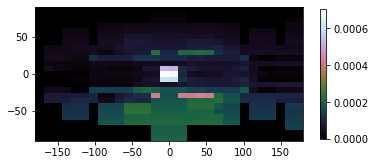

In [19]:
cm = plt.imshow(integratedI[:,:,0], extent=[-180, 180, -90, 90], cmap='cubehelix')
cb = plt.colorbar(cm, shrink=0.6)

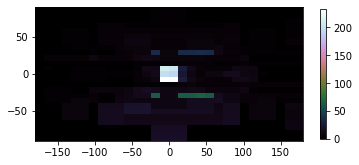

In [21]:
cm = plt.imshow(integratedI[:,:,25], extent=[-180, 180, -90, 90], cmap='cubehelix')
cb = plt.colorbar(cm, shrink=0.6)